In [ ]:
!pip3 install comet_ml

In [ ]:
# importing comet_ml
from comet_ml import Experiment
    
experiment = Experiment(
    api_key="HMrbLtwTWvfD9ZZURW09l1p8x",
    project_name="general",
    workspace="malibongwe-xulu",
)

In [1]:
#pip install demoji

Note: you may need to restart the kernel to use updated packages.


In [416]:
#pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [417]:
#pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!pip install scikit-plot

In [ ]:
# %%bash
# pip install --upgrade git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras
# pip install wordcloud
# wget -nc -qq https://www.wfonts.com/download/data/2016/04/23/symbola/symbola.zip
# unzip -qqo symbola.zip

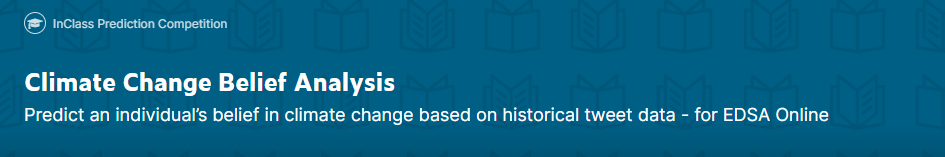

# **Introduction**

Climate change is a long-term change in the average weather patterns that have come to define Earth’s local, regional and global climates. These changes have a broad range of observed effects that are synonymous with the term.

Changes observed in Earth’s climate since the early 20th century are primarily driven by human activities, particularly fossil fuel burning, which increases heat-trapping greenhouse gas levels in Earth’s atmosphere, raising Earth’s average surface temperature. These human-produced temperature increases are commonly referred to as global warming. Natural processes can also contribute to climate change, including internal variability and external forces. https://climate.nasa.gov/resources/global-warming-vs-climate-change/

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

The aim of this project is to build a Machine Learning model that is able to determine whether or not a person believes in Climate Change, based on their novel tweet data.

# **Problem Statement**

The aim of this project is to help the companies determine how people perceive climate change and whether or not they believe this is a real threat by creating a classfication Machine Learning model.



*   [Trello Link](https://trello.com/b/msPfxSBY/team1classifiers)
*   Link to comet



# **Table of Contents**
- Import Libraries and load files
- Evaluating Raw data
- Tweets Data Preprocessing and Cleaning
    - Create a copy
    - Hashtag extraction
    - Twitter handles extraction
    - Tweet cleaning
    - Speech tagging
    - Word frequency
- Exploratory Data Analysis
    - Target variable distribution
    - Tweet length distribution
    - Climate change buzzwords
    - Hashtags
    - People, places and organizations to watch
- Model Building: Sentimental Analysis
    - Train-validation split
    - Pipelines
    - Train models
    - Evaluate the Base Model Performance
- Model Evaluation : Classifiers
    - Logistic regression
    - Naive Bayes
    - Gradient Boosting Classifier
    - K nearest neighbors
    - Random forest 
    - Linear SVC
    - SGDClassifier
    - Support Vector Machines
    - Decision Tree Classifiers/Random Forests
    - Linear Discriminant Analysis
- Evaluating the Classifier for Selection
    - Classification Accuracy
    - Logarithmic Loss
    - Area Under ROC Curve (AUC)
    - Confusion Matrix
    - Classification Report
- Hyperparameter tuning
- Submission
- Conclusion
- Collaborators








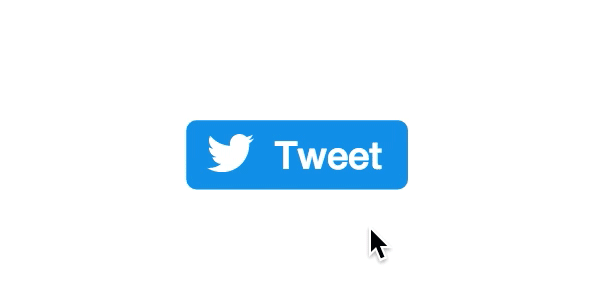

# Import Libraries and load files
**Importing all the necessary data processing, vizualization, and machine learning model libraries that we are going to use through out the notebook.**

In [420]:
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
#emoji cloud
#from deepmoji import DeepMoji
import string
import emoji
import time
import collections
from collections import Counter


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from wordcloud import WordCloud
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


warnings.filterwarnings("ignore", category=DeprecationWarning)
import nltk
nltk.download('all')

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
%matplotlib inline

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /usr/share/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /usr/share/nltk_data

# Evaluating Raw Data
**In total, 43943 tweets were collected.Each tweet is labelled and are divided into 4 classes:**

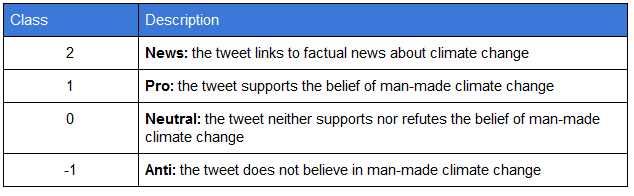

## Variable definitions


###  **Read in the Test and Train csv file as a DataFrame called test and train.**

**We are working with the train and test  csv file which can be accessed directly from the competition containing unique tweet Ids, sentiment and each tweet labeled message. :**

- tweetid – Unique number identifying each tweet message

- sentiment-Sentiment of tweet consisting of Class labels as per the data set description are labeled according to their description.

- message-Tweet body

In [421]:
## Load train data
train = pd.read_csv('../input/climate-change-edsa2020-21/train.csv')

# Load test data
test = pd.read_csv('../input/climate-change-edsa2020-21/test.csv')

# **Tweets Data Preprocessing and Cleaning** 
The preprocessing of the text data is an essential step as it makes the raw text ready for mining,it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data.

## **Preprocessing structure:**
 **As we are about to dive deep we will look into some preprocessing to get and understanding to get better insights.**
* Make a copy of the dataframe and rename the class labels for better visualisations

* create a columns of all the hashtags extracted from the trained data

* perform some mining on the data by extracting all the emojies.

* Demogize all emojis by translating them into text.

* Remove 'noisy entities' such as URL's, punctuations, handles, digits and extra white space.

* Tokenization

* Perform part of speech tagging (POS) and lemmatization

* make an analysis on the most common words on the data

* Specific named entity extraction

### **Create a copy of the Train dataset**

**We are going to create a copy of the train dataset and preseve the original Dataframe.**

In [422]:
# Make a copy of the dataframe

df = train.copy()
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### **Create a copy of the Test dataset**

**We are going to create a copy of the test dataset and preseve the original Dataframe.**

In [423]:
# Make a copy of the dataframe

df_test = test.copy()
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## Group the sentiments into a new dataframe 
Group the sentiments into a new dataframe consisting of the number of sentiment count for each class label

In [424]:
# Create class distribution dataframe

sentiment_counts = df.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts

,sentiment,counts
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


# Defining class Labels for each sentiment class
We create a function that will rename all the classes converting the numbers into words which will make our visuals more readable, each of the sentiment class is described below.

* ( 2 ) News : Tweets linked to factual news about climate change.

* ( 1 ) Pro : Tweets that support the belief of man-made climate change.

* ( 0 ) Neutral : Tweets that neither support nor refuse beliefs of climate change.

* (-1 ) Anti : Tweets that do not support the belief of man-made climate change..

In [425]:
 #convert  text into numbers
def sentiment(df):
  
  """
  This function converts the classes from 
  numbers into words

  Input:
  dataframe: original tweets
  datatype: Dataframe

  output:Dataframe
  datatype: dataframe

  """
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 1 :
          sentiment_class.append('Pro')
      elif i == 0 :
          sentiment_class.append('Neutral')
      elif i == -1 :
          sentiment_class.append('Anti')
      else :
          sentiment_class.append('News')

  df['sentiment'] = sentiment_class
    
  return df
df = sentiment(df)
df.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


## Group the sentiments into a new dataframe 
Group the sentiments into a new dataframe consisting of the number of sentiment count for the new class labels, this dataframe counts the number of observations for distinct values which helps us see the frequency of each sentiment.

In [426]:
# Create class distribution dataframe
sentiment_counts = df.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts

,sentiment,counts
0,Anti,1296
1,Neutral,2353
2,News,3640
3,Pro,8530


## Hashtag Extractor of the train data for each message
create a columns of all the hashtags extracted from the trained data. This is usually implemented before we clean the tweets to ensure that no information is lost.

In [427]:
# Extract the hashtags from the tweets

def extract_hashtags(df):
  """
  This function extracts hashtags from tweets
  and stores the hashtags on a new column 

  Input: train Dataframe
  datatype: dataframe


  output: new column with hastag column

  """
  df['hashtags'] = df['message'].str.findall(r'#.*?(?=\s|$)')
  df['hashtags'] = df['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])
    
  return df

extract_hashtags(df)

,sentiment,message,tweetid,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN
1,Pro,It's not like we lack evidence of anthropogeni...,126103,NaN
2,News,RT @RawStory: Researchers say we have three ye...,698562,NaN
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight]
...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,NaN
15815,News,RT @washingtonpost: How climate change could b...,17856,NaN
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,NaN
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,[#agenda2030.]


## Hashtag Extractor of the test data for each message
create a columns of all the hashtags extracted from the test data

In [428]:
# Extract the hashtags from the tweets from the test data

def extract_hashtags(df_test):

  """
   This function extracts hashtags from tweets
   and stores the hashtags on a new column 

   Input: test Dataframe
   datatype: dataframe


   output: new column with hastag column

  """

  df['hashtags'] = df['message'].str.findall(r'#.*?(?=\s|$)')
  df['hashtags'] = df['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])
    
  return df_test

extract_hashtags(df_test)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


In [429]:
# We look at the at the dataframe for train data
df.head()

,sentiment,message,tweetid,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN
1,Pro,It's not like we lack evidence of anthropogeni...,126103,NaN
2,News,RT @RawStory: Researchers say we have three ye...,698562,NaN
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight]


In [430]:
# We look at the at the dataframe for train datatest
df_test

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


## emoji extraction of the train data for each message

Function checks if a single codepoint is an emoji codepoint by checking if it is contained in emoji.UNICODE_EMOJI.

In [431]:
# Create a function for emoji extraction

def extract_emojis(s):
  """
  Function checks if a single codepoint is an emoji codepoint
   by checking if it is contained in emoji.UNICODE_EMOJI.
  """

  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

In [432]:
#extracting emojis on train data

df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']!='']['emoji']

56       😂❄❄🤦♂
121          🤔
209       😂🔥🌎❄
230          ♂
488         🙄🙄
         ...  
15506        ⬆
15669        😠
15671        😄
15695        ⚡
15723        😨
Name: emoji, Length: 182, dtype: object

## emoji extraction of the test data for each message

In [433]:
#extracting emojies on df_test data

df_test['emoji'] = df_test['message'].apply(extract_emojis)
df_test[df_test['emoji']!='']['emoji']

98              😔
121             ™
133             ™
146           🤷🏻♀
177      🐼🐻🐝🐠🐚🌷🍀🌎
           ...   
10199           ⚡
10261           ™
10316         ❄❄❄
10378          ▶▶
10480          👍🏼
Name: emoji, Length: 120, dtype: object

In [434]:
# Create the function to extract the emojis from data

def extract_emojis(df):
  """
  Function extracts emojis from text and 
  creates a column returning True if the row cintains 
  an emoji

  Input:dataframe
  datatype:dataframe

  output: column in dataframe
  datatype: boolean
  """
  for char in df:
    if char in emoji.UNICODE_EMOJI:
      return True
    else:
      return False

In [435]:
#extracting emojis on train data
df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']==True]

,sentiment,message,tweetid,hashtags,emoji
3360,News,⚡️ “Meteorologist opens up about the struggle ...,223703,NaN,True
3773,Pro,❤The Taiwan government should apologize to the...,669951,NaN,True
5449,Pro,♥The Taiwan government should apologize to the...,373808,NaN,True
5916,Neutral,❤The Taiwan government should apologize to the...,364717,NaN,True
9515,News,📢 #ClimateChange \nPeople prepare to fight the...,687224,"[#climatechange, #krtpro, #news]",True
11454,Pro,♥The Taiwan government should apologize to the...,231605,NaN,True
15669,Pro,😠 SIGN to restore &amp; maintain accurate scie...,412158,NaN,True


In [436]:
#extracting emojies on df_test data
df_test['emoji'] = df_test['message'].apply(extract_emojis)
df_test[df_test['emoji']==True]

,message,tweetid,emoji
1127,♥The Taiwan government should apologize to the...,560795,True
2218,😅😆 DOE won't provide names of climate change s...,291525,True
2603,▶@GreenPartyUS: We need to start taking climat...,407975,True
5186,♥The Taiwan government should apologize to the...,778694,True
5322,📷 frankunderwood: tfw you’re having a good tim...,515505,True
5668,⚡️ “Leonardo DiCaprio met with Donald Trump to...,219191,True
8500,♥The Taiwan government should apologize to the...,498187,True
9360,♥The Taiwan government should apologize to the...,857555,True


In [437]:
#convert emojies on the dataframe to text 
def text_emoji(txt):
  """
  This function takes in some text data of the tweets converts emojis into text

  Input:tweets 
  datatype:'str'

  Output:datafram containing the text emojis 
  datatype:dataframe
  """
  emoji_converter = emoji.demojize(txt, delimiters=("", ""))
  return emoji_converter

# Converting emojies into Text

In [438]:
#convert emojies on the dataframe to text from the train data
df['message'] = df['message'].apply(text_emoji)
df[df['emoji']==True]

,sentiment,message,tweetid,hashtags,emoji
3360,News,high_voltage “Meteorologist opens up about the...,223703,NaN,True
3773,Pro,red_heartThe Taiwan government should apologiz...,669951,NaN,True
5449,Pro,heart_suitThe Taiwan government should apologi...,373808,NaN,True
5916,Neutral,red_heartThe Taiwan government should apologiz...,364717,NaN,True
9515,News,loudspeaker #ClimateChange \nPeople prepare to...,687224,"[#climatechange, #krtpro, #news]",True
11454,Pro,heart_suitThe Taiwan government should apologi...,231605,NaN,True
15669,Pro,angry_face SIGN to restore &amp; maintain accu...,412158,NaN,True


In [439]:
#convert emojies on the dataframe to text from the train data
df_test['message'] = df_test['message'].apply(text_emoji)
df_test[df_test['emoji']==True]

,message,tweetid,emoji
1127,heart_suitThe Taiwan government should apologi...,560795,True
2218,grinning_face_with_sweatgrinning_squinting_fac...,291525,True
2603,play_button@GreenPartyUS: We need to start tak...,407975,True
5186,heart_suitThe Taiwan government should apologi...,778694,True
5322,camera frankunderwood: tfw you’re having a goo...,515505,True
5668,high_voltage “Leonardo DiCaprio met with Donal...,219191,True
8500,heart_suitThe Taiwan government should apologi...,498187,True
9360,heart_suitThe Taiwan government should apologi...,857555,True


### Twitter Handles Extraction

In [440]:
#removinging @handles
def remove_pattern(input_txt, pattern):

  """
  Function Extracts Twitter Handles from the tweets

  input: Two arguments input_txt and pattern

  Output: twitter handles
  """
  r = re.findall(pattern, input_txt)
  for i in r:
      input_txt = re.sub(i, '', input_txt)
      
  return input_txt    

In [441]:
# remove twitter handles (@user) from train data
df['message'] = np.vectorize(remove_pattern)(df['message'], "@[\w]*")


In [442]:
# remove twitter handles (@user) from test data
df_test['message'] = np.vectorize(remove_pattern)(df_test['message'], "@[\w]*")

### Tweet Cleaning
The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

**Initial data cleaning requirements that we can think of after looking at the top 5 records:**

* We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
* Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
* A text cleaning function to clean funny symbols, hyperlinks and Retweets.
* The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
* Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.

In [443]:
# remove special characters, numbers, punctuations from train data
df['message'] = df['message'].str.replace("[^a-zA-Z#]", " ")

In [444]:
# remove special characters, numbers, punctuations from test data
df_test['message'] = df_test['message'].str.replace("[^a-zA-Z#]", " ")

In [445]:
#removing short words from train data
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [446]:

#removing short words from train data
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [447]:
#define a function to remove the @mentions and other useless text from the tweets
def text_cleaning(text):
 
  """
  Apply data cleaning steps to raw data.
  """
  #Removing Hyperlinks
  text = re.sub(r'https?:\/\/.*\/\w*', '', text)

  #Removing Retweets
  text = re.sub('#(RT|rt)*', '', text)

  #Remove Numbers and words with Num
  text = re.sub('\w*\d\w*','', text)

  #removing @mentions
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)
  text = re.sub(r'@[A-Za-z]+', '', text)
  text = re.sub(r'@[-)]+', '', text)

  #removing #sign
  text = re.sub(r'#', '', text)
  text = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', text)

  # remove the '&gt;'
  text = re.sub(r'&[a-z;]+','', text) 

  # Remove extra whitespace
  text = re.sub(r'\s\s+', ' ', text)

  # Remove space in front of tweet
  text = text.lstrip(' ') 


  text = re.sub(r"U+FFFD ", ' ', text)


  return text.lower()


In [448]:
# cleaning the text of train data
df['message'] = df['message'].apply(lambda x: text_cleaning(x))

# show the cleaned text 
df.head()



,sentiment,message,tweetid,hashtags,emoji
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False
2,News,researchers have three years climate change be...,698562,NaN,False
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False


In [449]:
# cleaning the text of test data
df_test['message'] = df_test['message'].apply(lambda x: text_cleaning(x))

# show the cleaned text 
df_test.head()


,message,tweetid,emoji
0,europe will now be looking to china to make su...,169760,False
1,combine this with the polling of staffers re c...,35326,False
2,the scary unimpeachable evidence that climate ...,224985,False
3,putin got to you too jill trump doesn t believ...,476263,False
4,rt female orgasms cause global warming sarcast...,872928,False


In [450]:
#Remplace the word https with nothing: train
df['message'] = df['message'].str.replace('https', '')

In [451]:
#Remplace the word https with nothing: test
df_test['message'] = df_test['message'].str.replace('https', '')

In [452]:
# Remove Line breaks: train
df['message']=df['message'].replace('\n', ' ')


In [453]:
# Remove Line breaks: test
test['message']=test['message'].replace('\n', ' ')


In [454]:
#view change on train data
df['message'].unique()

array(['polyscimajor chief doesn think carbon dioxide main cause global warming wait what  yelvcefxkc',
       'like lack evidence anthropogenic global warming',
       'researchers have three years climate change before late  kdur  anpt',
       ...,
       'notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides ',
       'liberals climate change crap hoax that ties agenda climate being changed',
       'climate change equation screenshots  uufcxdq'], dtype=object)

# Parts of Speach tagging

## Tokenization


Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [456]:
#tokenizinging tweet train data
df['Tokenized_tweet'] = df['message'].apply(lambda x: x.split())
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big..."


In [457]:
#tokenizinging tweet test data
df_test['Tokenized_tweet'] = df_test['message'].apply(lambda x: x.split())
df_test.head()

,message,tweetid,emoji,Tokenized_tweet
0,europe will now be looking to china to make su...,169760,False,"[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,False,"[combine, this, with, the, polling, of, staffe..."
2,the scary unimpeachable evidence that climate ...,224985,False,"[the, scary, unimpeachable, evidence, that, cl..."
3,putin got to you too jill trump doesn t believ...,476263,False,"[putin, got, to, you, too, jill, trump, doesn,..."
4,rt female orgasms cause global warming sarcast...,872928,False,"[rt, female, orgasms, cause, global, warming, ..."


## Remove Stop words

Stopwords are typically useless words and do not add much meaning to a sentence therefore we return the tokens which do not exist in our “stop_words” variable.

In [458]:
#stop words Removal from train data
df['stopwords_removed'] = df['Tokenized_tweet'].apply(lambda x: [word for word in x if word not in STOPWORDS])
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big..."


In [459]:
#stop words Removal from test data
df_test['stopwords_removed'] = df_test['Tokenized_tweet'].apply(lambda x: [word for word in x if word not in STOPWORDS])
df_test.head()

,message,tweetid,emoji,Tokenized_tweet,stopwords_removed
0,europe will now be looking to china to make su...,169760,False,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi..."
1,combine this with the polling of staffers re c...,35326,False,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ..."
2,the scary unimpeachable evidence that climate ...,224985,False,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan..."
3,putin got to you too jill trump doesn t believ...,476263,False,"[putin, got, to, you, too, jill, trump, doesn,...","[putin, got, jill, trump, believe, climate, ch..."
4,rt female orgasms cause global warming sarcast...,872928,False,"[rt, female, orgasms, cause, global, warming, ...","[rt, female, orgasms, cause, global, warming, ..."


### Speech Tagging

In [460]:
#Speech Tagging with the train dataAdaBoostClassifier
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c..."


In [461]:
#Speech Tagging with the test data
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c..."


The data above this line will be considered as clean data for this work hence we make the copies of it before we do data Preprocessing. 

In [462]:
# Copy of the train clean data
df_train1 =  df.copy()
# Copy of the clean test data
df_test1 =  df_test.copy()

## word net POS

We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion

In [463]:
#word net pos
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags,wordnet_pos
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),...","[(polyscimajor, a), (chief, a), (think, n), (c..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth...","[(like, n), (lack, n), (evidence, n), (anthrop..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)...","[(researchers, n), (three, n), (years, n), (cl..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J...","[(todayinmaker, n), (wired, v), (pivotal, a), ..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c...","[(racist, n), (sexist, n), (climate, n), (chan..."


# **Exploratory Data Analysis (EDA)**



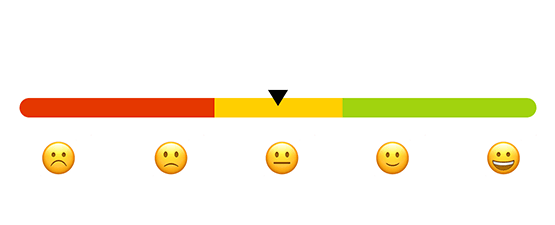

## Target variable distribution

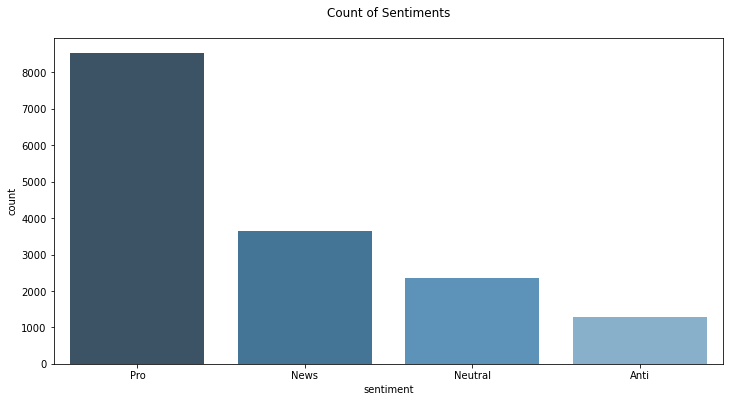

In [464]:


plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df, palette="Blues_d")
plt.title('Count of Sentiments\n')
plt.show()

Taking a closer look at the distribution of the tweets we notice that that Pro seems to be dominating the most from the dataset,with over 50% of the given data falling in this category which supports that individuals believe in man-made climate change

# Checking Relationship between text length and sentiment

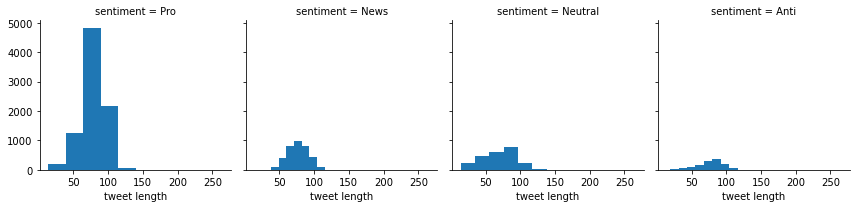

In [465]:
#Plot the distribution of the tweet length per class using a histogram.
df['tweet length'] = df['message'].apply(len)
g = sns.FacetGrid(df,col='sentiment')
g.map(plt.hist,'tweet length') 
plt.show()

Looking at the plot above we can notice that the tweet length across the classes is similar regardless of the number of tweets made per class. We also observe that the pro class has the most number of tweets made.

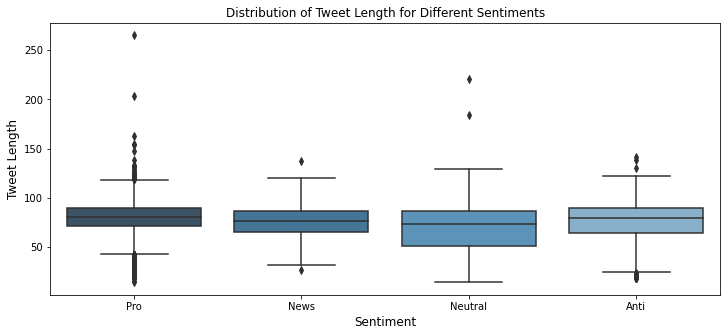

In [466]:
# Plot the distribution of the length tweets for each class using a box plot
fig,axis = plt.subplots(figsize=(12,5)) 
sns.boxplot(x='sentiment',y='tweet length',data=df,palette=("Blues_d")) 
plt.title('Distribution of Tweet Length for Different Sentiments', fontsize = 12) 
plt.xlabel('Sentiment', fontsize = 12) 
plt.ylabel('Tweet Length', fontsize = 12) 
plt.show()

In [467]:
#viewing average tweet length
rate = df.groupby('sentiment').mean()
rate

,tweetid,emoji,tweet length
sentiment,,,
Anti,499169.447531,0.000000,75.952932
Neutral,496550.249894,0.000425,69.114322
News,492613.500275,0.000549,76.040385
Pro,507418.550762,0.000469,79.014068


The box and whisker plots for the tweet length shows distinct properties for each class. For the training of our model, the outliers, medians and range sizes obtained from the plot will have an impact on our models.Looking at the box and whisker plot we can see that the tweet length for all the classes lie within the range of 65 and 80. Looking at the table above we can see that Pro tweets had the highest tweet length amongst the other classes, with the tweet length of 79.01. Therefore this implies that people who believe that climate change is man-made tend to tweet with more characters compared to others.


In [468]:
#view train data
train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [469]:
#Extracing rows per sentiment
News = train[train['sentiment'] == 2]['message']
Pro = train[train['sentiment'] == 1]['message']
Neutral = train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] ==-1]['message']

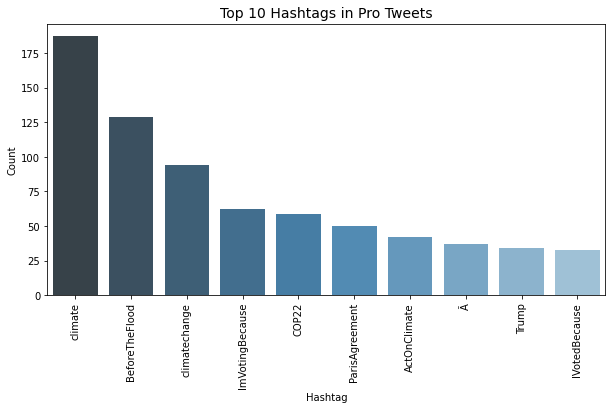

In [470]:
#Top 10 Hashtags from the Pro tweets
hashtags_pro = [] 
for message in Pro: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_pro.append(hashtag) 
    
hashtags_pro = sum(hashtags_pro,[]) 
a = nltk.FreqDist(hashtags_pro) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in Pro Tweets', fontsize=14) 
plt.show()

Text(0.5, 1.0, 'Top 10 Hashtags in News Tweets')

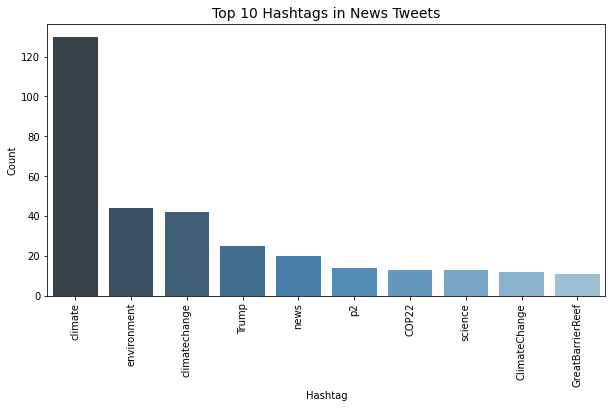

In [471]:
#Top 10 Hashtags from the News tweets
hashtags_news = [] 
for message in News: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_news.append(hashtag) 
    
hashtags_news = sum(hashtags_news,[]) 
a = nltk.FreqDist(hashtags_news) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in News Tweets', fontsize=14) 

Text(0.5, 1.0, 'Top 10 Hashtags in Neutral Tweets')

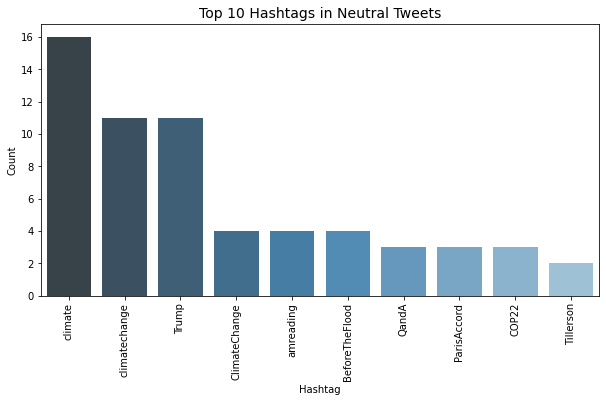

In [472]:
#Top 10 Hashtags from the Neutral tweets
hashtags_neutral = [] 
for message in Neutral: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_neutral.append(hashtag) 
    
hashtags_neutral = sum(hashtags_neutral,[]) 
a = nltk.FreqDist(hashtags_neutral) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in Neutral Tweets', fontsize=14) 

Text(0.5, 1.0, 'Top 10 Hashtags in Anti Tweets')

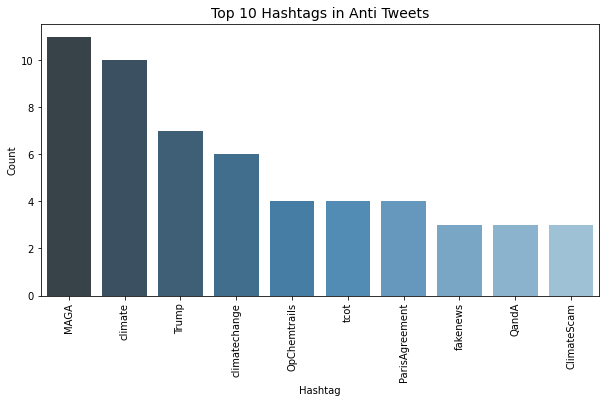

In [473]:
#Top 10 Hashtags from the anti tweets
hashtags_anti = [] 
for message in Anti: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_anti.append(hashtag) 
    
hashtags_anti = sum(hashtags_anti,[]) 
a = nltk.FreqDist(hashtags_anti) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in Anti Tweets', fontsize=14) 

Looking at the bar plot for the hashtag analysis we observed that the following hashtags were more frequent in all classes as they all appear in the top 10 hashatags of each class :

* climate
* climatechange
* Trump

This is expected for " #climate " and " #climatechange " to be mentioned in all classes, given the fact that people will mention these phrases regardless of whether or not they believe in climate change.

For " #Trump " to be included in all classes could be due to the fact that he was very vocal about his stance on climate change and so we expect his name to be mentioned in all classes since he is profilic figure, regardless of whether they share the same sentiments as him or not


# Emoji Frequency

In [ ]:
# Parts of Speach tagging

## Tokenization


Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

#tokenizinging tweet train data
df['Tokenized_tweet'] = df['message'].apply(lambda x: x.split())
df.head()

#tokenizinging tweet test data
df_test['Tokenized_tweet'] = df_test['message'].apply(lambda x: x.split())
df_test.head()

## Remove Stop words

Stopwords are typically useless words and do not add much meaning to a sentence therefore we return the tokens which do not exist in our “stop_words” variable.

#stop words Removal from train data
df['stopwords_removed'] = df['Tokenized_tweet'].apply(lambda x: [word for word in x if word not in STOPWORDS])
df.head()

#stop words Removal from test data
df_test['stopwords_removed'] = df_test['Tokenized_tweet'].apply(lambda x: [word for word in x if word not in STOPWORDS])
df_test.head()

### Speech Tagging

#Speech Tagging with the train dataAdaBoostClassifier
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

#Speech Tagging with the test data
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

The data above this line will be considered as clean data for this work hence we make the copies of it before we do data Preprocessing. 

# Copy of the train clean data
df_train1 =  df.copy()
# Copy of the clean test data
df_test1 =  df_test.copy()

## word net POS

We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion

#word net pos
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

# **Exploratory Data Analysis (EDA)**



![sentiment-graph-swing-happy-sad-faces.gif](data:image/gif;base64,R0lGODlhKwLhAPcAAOfn5/DPsf/ILP+5Jy4uLv60G6bVGv/5hAICAsnJyYpQB//6bP/3euMqALyZJ9ra2v/6pv/5lP/ZRf/WMapqB96OCtOMLbe3t8ijKP/ngP7/5dDph//5SfPHmv/pSv2mAaWlpW8wAv/nVuW8lv7+/v/RDf/8ufyrFPezWvTx8PuZAOmaEZiYmP/9yP/taP/RMOGHAoaGhv/7XOaUCmZmZv/aMVdXV//ML/bj1vDYxeZBDZvQAJHLAHd2dtl4AUVFRf/91/718veEAIxsWffr5f/GANeTT+yvbvSYKnNFD//CLel9AOEWAP/kM81kAP/gZPOjEf/PAP+9Mf63AfKbgP/bUpNkFP/pAf/reP3OQ/rfwv/rPNJsAP/bOt+lbOTMNf/zPP/uNu6fEuObTf/COP77+9KALv/SO9DRB8pcAPj4+JHUEf/DHv/JN/v9///98v/iQufQRrfwD6N+Vd/v/6rXJG+RCvaTGp1yHYBAAfakPeOlI+j0w9a5Mvr6++H1//6vFrx/Cfr98/bcNPf09rneTextS+LEQJ6enu/XNf//+vemFvv5//G2Kf/MAK+urs94H+/UM/CNcseiBfipEv/fMPH+/8nmdaGPiv/RGdwAANTc5eju+PnmN5laBDs6Ar3xJcTO3/LkUrYsAbGhlY7KAOO4APa1oa2ossHBweO6O/qrInBkdP//9lUTAPTNAKuqqshwBt3vp/GuHP/CEEphB62DIH9WPcP3KZGQnrm3xf/4+O9cMP758vLFABQUFNLV4OHh4dHNxiMiAevAAO/1/4yMmpGXoT9BTYy3EWZmdDg4OKm2utTU1FFUX0xMTCIiIuLytKvhD318fMXFxn2GjVFRUVhgaf/vGLy8vJKSkurEFrKysvnAdPTWN29vb+/dRT4+PqCnsN/EMujVT//bAJDTEIOBgF9fX//vjOCtfd2eXf/MBvv49v/LAOjog+7309WtNe7PNWhQUfjIOfDfNoTPAO3t7dStBs7OzvTJAIyMjPe9Q6HTDuU3AP///yH/C05FVFNDQVBFMi4wAwEAAAAh+QQEAwAAACwAAAAAKwLhAAAI/wD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz769+/fw48ufT7++/fv48+vfz7+///8ABijggAQWaOCBCCao4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4oswxijjjDTWaOONOOaoI3QPAODjj0AG+eMDO3JnAwJIJqnkkknaUOR2DzAp5ZJEPqmdNlNOqY2V3BGQ5ZIEcMldPl8qmY+Y3H1TJgLfoMkdI9B8CY0fKpYRxJ145qnnnnz26eefgAYq6KCEFmrooYP28saijDbq6KOQRirppG/8A8uXsPxD6aacdhqpIKCGKuqopJZq6qmopqrqqqy26uqrsK7/qghNAUjCiw645qrrrrz26uuvwAYr7LDEFmvsscgS24AQV5Tg7LPQRivttNRWa20J2Hwy5SfYXOvtt+BSi8YaBpRr7rnopqvuuuy26+678MYr77z01vtuHYVcwsdLOBjSABMNBCzwwAQXbPDBCCes8MIMN+zwwxBH7DATS1zhyMUYZ6zxxhx37PHH7lxhypSmXOHOxyinrDLIaNizw8swxyzzzDTXbPPNOOes88489+zzzzuXskMh8LAUgD8A+6P00kw37fTTUEct9dRUV2311VhnrTXWTDAbxddghy322GSXbfbZX19hBZNWXIH223DHbfa4/dRt991456333nz3/+3334AHLvjghBcu+A489LNvSjn8u/XjkEcu+eSUVx51127LrfnmZZdTzjBKDuM556SX/jXdhqeu+uqst+7663rzsEPRJ5WhAxOW56777rz3XjXmpgcv9xWTKDlJ5sInjzbqsDfv/PPQR983D3XMahIVuPuu/fbcd3818MqHT/YVSSCZBPLipw8289K37/778P9dygYn6dCA9/jnr7/v4KsvviNXeAWSXoE+/4mPffFLoAIX2Lwd1MEkjdufBCdIQa31z4DhuwIe8FBADCoPgQwMoQhH6LeXLW4kp8heBVfIwhZe0IPJGx0M0wdCEtrwhiLkgSxKgr0W+vCH+3vhDP+HSES41RCHSExi+3hAP5L0EIhQjGLvhFjEKlpxfWtQoha3GD0mluQU95OiGMcoOSpe8YxDPCIX18jGw+2QJETwRxjJSMc6Us2MaMyjAdXYxj768W476IcGTGIIFdrxkIhUGh71yMjw8fGPkGQjDwpxkhwkLZGYrOMiG8lJ0z0ykqBMIuJoZxJJGDKTqITiJjvJSs19MpSwJGEpLqGSQs4xlbhk4SpbycvlZTGWwBRlKSi5ElNeMpfIlOAue8nMsb0ymNCUHuJ2QMuWBMAQcmSCNrfJzW5685vgDKc4x0nOcprznOhMpzrNqYmKFeGd8IynPOdJz3ra8574zKc+98n/z3m2jAcADahAB0rQghr0oAhNqEIXytCGOvShEF1oIAtxQpcQ4RRUyKhGN8rRjnr0oyANqUhHStKSmvSkKE1pSSXRjXRk4KUwjalMZ0rTmtr0pjjNqU53ytOZvmMDQA2qUIdK1KIa9ahITapSl8rUpjr1qVBlajQG6aaqWvWqWM2qVrfK1a569atgDatYx0rWspr1rGhNq1rXyta2pogEZXhLGUjQlrmyBa5twetayrCLt+wirmz5K1v4Wte+uvWwiE2sYg9CArq6pbF5daxaIHtXyaZFr3W1bFrsuhbMThawVSEBIXCghdLigBCaHQsjiEBaLeCACIw4y2pb+9rY/5ZFtK11LWrNgtvS6ja1XCEBETrAjwJMAZ5TKAA/OkAE4G7FD1roxgCmcNwiUHcA3dCCbb8CXelS953Xze52uyJc4hoXucplbljKW9zqWje9zfUKDlDwgSmUwAMMiAAEIsAAEZRgCh9AAQ6+4oYArOIDRaiECw6g3wO4oBJF+MAqOuCGrhT4wAlecIMfHOEJV5gr863vffO73/7+N8AD7kqI7Ytf/fLXvwAW8Fbc0A0VTAEOEACC9QaiCA1AwANTUEE3PqwVHOhBBexgQAsqVZA3tOAAmfiAHlKcFSMjWclMJoiToSxlKl+FxjbGsY4L0uMfB3nIWgHzjXO8Y4GUGf/IQiZyVQhx5BdAQAMaAIKe97xnPJtgAirQQwq00gEbu2DJeeYzn98ABCwEuQPOhUqhp3DoNyRa0XpmtKNVAOmr0FkFdsYzpvusgT8HetCervOdL41pPwNa0FZJARJUIIIWAMEEuG6BrnfdAlybQNcu+AASUB3aDgiBFhEAQq9/zetd+xoIEGCDEDpNFRIYG9nKznWzdf3saE870kyRNa1t7ettL5vZwR52rGdd61tru9nlbkG6iR0VRrDbBBDINwR8zW986xsC8lYBEtphlQAce9//7revE+7tDlTF4LRAuL4VjmuGS9vhU7E3rf2db4pzPN8BHzhVNC6Cj3v83wD/d4HACR4VEqBABRLYbwRmvl+U63vmOIdAFVSAAnArBQdCmEI6ZJ5zmxOd5umghRC8/BSgC/3o+jU6zpGudKY3xeUwP3rNpT51nfPc50fBesy7HnWbT12/O+95VAzOhnSkgwEHiDuDzz5zucedAVhIRxuEEICpuGHWT0gHFuAed7rX3e54F7zA5dyUv6sg8IOXu+EjYPcDJB4Li1+7ENr+drtPvvKJ33vfNc95whfe8KDPu+ih4oY7PB4LLnABA2ZPe9PXngELYEDssfCED9yBTpoXQAZiL3vCzx7xxoe9C56Qgb1j/CkGFz7xj29501f/7rpffvOnzXrXP0H5t6d+//Vpn/vd9/733X/99OFOe7lTH/fZ573vgd8Utj+hCiIg/gL2z//+8z/2IiACT/AEzhcVjlcFA5h/CyAKthAH/sd/5GALorAALiCA9zd/T3GACRh7C0AOE/iAC0gOFFiBA1gFGOgU9od/+geC/geAFliA0Ld595d/LrB/MsCCC3CDLjiAMMgUbnBkWVAFQigCHiADfYAHhyADSriEMgAOeIABMhCAQlgFWZB5T5EDQlAAVSAB+CcCMmAFrhACosCESigKeeAKChCFIrCFVTAAfHeFWciGASgD4xCGY0iGZugK8aCGbOiGo+eDQDiFRCgDcaAADkCGSugAChAHfCiEVf+IBIyXFD+oAkE4hEXoACFgC4jIAVaQBH3QiFRohUtBBELwAVlwBhIgAXDAAV8QAmEIDjLAAbIoi2DoChjAAXCQilmQBSewdFBxBEKgBKeoihzQByFAASFwiLPIATKAAccYAvGAixJwBllABkJwBGAnFMAojKgIBx7gAZ6QB5kYi7MoA7YQAnmgAN+Yi9RojdjYFKRoiqioih7AAZ4Qhl9AjszYiq5gBRzgAbkoAbvYi1aHFPE4jMR4CCHgip9YjrYQhnngjQE5kL7IFAGwBIDQBm1wBl3QBRyAiYEQAre4BSTJAeOQBxSQB1YABh15BhpZAEvwfD44a1KwkRzJARj/gJJ5YAscQJIl6QA66QAc0AVn4JJSIIpK4Xg1WZRdsAXeoAAUoAB4wAFgQJJgwAF4AJUKIA9bQJRGiZRJcZEZuZEdCQZfEJQ9+ZM6yZUt+ZIxiYIYqZEc6ZFAGQg7mZZXaQVQmQfjwJJE6ZYymRRHsAQFoAQCcAMvMAFgkJPh2AdpuQVgUA8KEI62AAY18AI3IABKAJNH8BQpAAMqMABKgJgTEAZ9oJMj6ZM4qZPxEAYTgJlKMAAqsARE0BSfGZqjmZhN0ASe4AkKwJM+uQUcYAt50JuD0ASveQOxOZu1yRSDWZiHmZhbIA97mZrCmZNRGQnIiZmayZlO8ZyGSZpb//AFCpAHfPmYq6mSnbCdmbmZS9CZTLEOGCma0VkDnWALhggGu7mfYNAHUpkITcCdsQkISzAGV7gEKgCdiFkDTYAHIWAFnRAG+9kEYdAJVhACeNAJl9mesrkEOdAUOYCgCpqYYeCMfKmf/EmeyeiaAtqhHxqf8xmeL1ADYXCOnlAPErqbYVAPnpCJYbChmjkABGqgTSGfgECfpGmaT4ii+xkGDoAHX8CiHDqkTTEGS3AC9CkAL/AClbAFiSChlRCmYhoGxxmgLyAAQXoCBZqNQZEDPpCgSMqlg4ABkfCjYloJNJoIGDAIlXADHFoAKuADf6gUbgqnMjoBTYAB4xAGd/8apmEwDhjQBEAam4AqqFV6pVm6pZUwCA4QpY0aBl/gAHy6pWgam2o6Bmz6E1aKpYappSQKBmDQqJXQBLC6nWeapmvKFFZKCaIpozMqqTUwq7uJp8F6mdwZpJSQqyD6pkfaqpqqnxNQA8EapjWAqLF6rJQaqIOaFIXarGhKmmDwo9NKrTQKBslZqgNQqduKFLvaq9HJpVUZrWJarWFwrdg6AMmKqpdKCQUgBVpKmtEqreMqsNWanGcqBfiqrEqxDj4ABf0angBLoz9Kooz6mpjZnlJQAPl6hT4wA6w6moi5pQFLsNJqsQI6oDPgAy+6FG7qsb3qp1uamCQrsCbbnij/q7JF2rAPe5gAO7IEOwEW66eambEbm7MOKwWjSa5AO7MFWwNd0AR9qgREW6BNoQ5cAAVHirRtALO7iQHliY4KEAgTsAUXO7RCCgVc4AVPQQQ+AAP8KgVksLUhm5hAW7dAG7NCSwZEm7LNOYpt+7ZkcJgT0AVO25FdUAmGS7gdOQGZqbcay7dVe7VZqwRyK7J2a7dbKrRSe7Zp6xRWi7UCQJwUMAMDgKjBebqV8AKNUAHIaAE3AAhoq7ZM0QFcMAOAG7dtAAeNII5W4ADx8KRJIJJk2wZk4LgnMANcMAJPQQIWsARYOwBwq5Fzm5iGW7MaqbdnuwRmEIlh17zPG703/7C1MTu+eOunxIuwsKu93GsUtGu7/Vq8W3sGMXu58/sCxGu8yKu8TdG+J8AGVsAKPXALSTCZFBAIBnzAFEAB4ZgHtzAN8xAIAkAJ+QuPXAAD31u8cLAH/QgOPQkHkOkBDxkIcHC+QkoJMMAFBZkUXsAFYnACBQC9uEuWcAAHXTC4M+yS10sG6XoCYsAF6/AUK9zCL3wGFoCO5nnESIzEIbAHZ7DDPfzDFGzBWRu3SAsHRXnFWAwHZNAIJAwIJozCTkEEFQwFtBALiGAJm0ANqIAJ5zAEQ3ALcOzG54AJqEANm/AHc1ABbAAFJ5zCRmEBLMyv0HsGjZCJQ6mRiHwGxf8YAhbQBQhbADzsAxawdk4wA1j7vsWrio0QCOWZjhTAxF1wvxnrxTPgBOsalpV8yTeAAQOsAK78yrDsykmQBPHQBgVAyqb8FIAsBoIMt/RgBRRwBjNsuMNsAQqgCm3wyJE8ybrMwgUwA7cQCn9gCQ1hCXSAClZwy2IgyU/RAWlgyS48AG3wmx6AyOZMvB7Ayo2wmScABTOQBvq7vGbgA7wMCC9MBoSsACGQBFawQZ2IjhbgkunqxdsMCaDFFCQwz/VcmLvY0FngDbsI0Q6dBZtJ0D5g0N38zVAQzlKQBaqgzxRgAY0w0nuQkrR8BsrszvAsaRpNCxSQBHNACqnwAJz/YAmS5QbFEAz58AiYMARJEAh7/M7x7IOQwAUrsAj9WwF4IAHF29ROrbcSYAsUwAaAsAgrwAWQQH9PMQJpUAELrQQhaQXxoIozLAIScAi2wM+NIKQ8XAErDRVc7dWUYM8DAL/nbM7FO9Bt/dZO4QZFfdThPABZIAEOMMsLuZBJYAun+MhVfdVZzXp/DQizUJ6u3M9zcNmYjQd6mY7FyQYn4NhabZFpAANHDQh7IJow/NR6i7ADsAcnsAhiAANpcMpNYQapzK+zgAfxYMWq3QZdQA94UAEaCwVXbQapOhS2bclz/cKprdqsfcuUQNxcYNxrN9qATddSkIr8EA/czQ+p/8jYrx3bsy0VAWDdBbAHUKnAvembkzmZnpDAvdkIBbACsk3bC9vVK4C1gEDXAwC9rN3fBXDLBQDbbm0EVYEDTuAD+Y3UbMAGzO3f/Z2uBeDgi0DcPpAGfvxzCb7gJ2DPDy4F/x3ggPDaFo7hU7EO+I3UHv7ClKuRlCri4V3gVIHiFbAC503ACZzjOh6VnjAL8y3jUuEHtl3jUKDiKx7gIj7iFb4CFeAEkMByVOHNCi4GSN3hR57kJxDeK3DhQx0VUr4CVJ7l+43kSL7fSi4GW87XUSHkTkDkRk7mZa7kxN3kT04VbF7j583jOw7fYSvfTO7kUB4VKQAJ+E3lVS7mWf+e5YsA238OCX1bFVzdsRye6Pud6JSw5CmbBupwFZE+A5Mu5iOe5ZdO3Jm+6VUx6IW+6Ine4au+6GhO548uFaheAR5bABZAAVaw3pNpBYGAAQM+A7BuFYRgAWkg6WJQ5Iue7BWO5pluBvRmFSPgBFxQ42CO7MoOBWLw6lzgBF1OFdE+7StQ7cq+6Niu7dyOFcNe7J5+7ONO7sx+4c6O7sTuAzVuz3tgARYQCBawAntwyyvQ7M9OFergBE4AA54O5tme7eE+AzBA8OpAV8dNqGZQ7AYf7gmv8AwP7yuLFTkw8W178BfP7DCg8Vsx8AUP8he/8A3vBKYe8Uhh8jBA6xv/bebRDewr//D/4PJE4Vg4sA5ckAZc0LYwMPQj//NcYAQvqvNGIVkjYNsJTvRE7wMEbwYj4FhKPxRM7/RCD/VS7wRUb/VXwfM+D/RbP/Q+YPRILxBXj/UC0fPbHvRQX/TSnvY5D2IjYARFTfBcEAuQYATqkOFWYfUB4AVmEAvbLu2xYAbrEAAftvZFIfiEb/h6n/iL3/jydfeQEAt6j9V+D/hXgQOYf/h73/d//xWWlQI4kAMBkAM4QG+O33hEoPqrTwTrS2CxHwCzX/tZcfqpv/qtTxCvv/QEgfqqz/quPxWcdVcHfVnLjxbJrxbPjxaUVVmRVf3Uv1jYn/3av/3c5t/93v/94B/+4j/+5F/+5n/+6J/+6r/+7N/+7v/+8B//8j//9F//9n//+J//+r///A8Q/wQOJFjQ4EGECRUuZNjQ4UOIESVOpFjR4kWMGTVu5NjR40eQIUWOJFnS5EmUKVWuZNnS5UuYMWXOpFnT5k2cOXXu5NnT50+gQYUOJVrU6FGkSZUuZdrU6VOoUaVOpVrV6lWsWbVu5drV61ewYcWOJVvW7Fm0adWuZdvW7Vu4ceXOpVvX7l28efXu5dvX71/AgQUPJlzY8GHEiRUvZtzY8WPIkSVPplzZ8mXMmTVv5tzZc8eAACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsTAArABsAEwAACN0ACf0bSLDgQIEGE/578Cubwn/5fjV7mBDar4fQoFFMGAwBiITZEDzYmNAagoS/npFMmALBvoIgENwzeO/bMgLhtCmkcZIgAhoGLyCARqOHjaEADPpB0GPgPgR+Cj5A8K3gvV8XDcboiSCGQQIaDarpmhDBOW09CQLwqPBZ1oKwECB4FBRBMIUsECAsiDUhIgQpFD5CkNTgj3B+ASuMW7hguGUJU4lUiFZNwscJx+q8HNYg5pJpCXZEpPCmwpbLZg7MhwCyQrAPH0BDEM4GAdokHqZySBGEjWfoUhUMCAAh+QQEAwAAACxpADAACwAOAAAIWgBBwPpHsOA/Ftl+ETBYEIGNZc8YEoT2DaLEfxQtSswYcWPFjgw5Xsxo7eKvb+F+XEQwjcYvibAQ7GuGIIZBbghq/tOGAJq1Z9B+gViGjmCzb8+snQPwj1qCgAAh+QQEAwAAACx8ADAAEQAOAAAIqgBjpPpHkKCaGMEKEsy27xc0hf8uIJgGERo0FgjUKESH4JlCPwgQAUDArSChXzGgNSuYDcG9f7/QFUT06x+0HgVpPPxHoybBZT94+rRJg2AqBAkJIXj0LwHSf/cQZCuIYN8/jCQI/qIIAoGfguHC/QNaEN1DGwQUaoPm5xesgtQyEqBYEAC0adDKKLxJIB9EGwiKKvyGICjEcwgGKmyGQCZEALCyQoT1oGBAACH5BAQDAAAALI4AMAAMAA4AAAhvAP8JbGZjGQEbzQQqZIGAwLceBBCAUHgBAQuF/3ogCCYQgTWMAn99pLYRZEYE/2IgAMCyJYBzCNTA/EWzZk013341y5egZ89mHKehNKmQZEKiIcMhFUiShhqM+fJRpBnO2o+IFxWSYGHjmY1pRwMCACH5BAQDAAAALJwAMAAUAA4AAAitAEFk+/coHLRlwf4p/MciHIFl2hYSQAcCgTUaNhL+I0QAAbppNBAsI/GPxi8C+RZK/HVvIQCL/74huKBSISwEAGreDGYDQU2FBML9/IdA2zMCP0kg+AagqdN7S58Jranm1y9oVrP+QnDu2bKfKRBMa5agrNkHKbz+LFN0qEK1PwkgdQtXJ4Jmbn98HfoDQSqVhC6kWDZ3qDUE0J55vUqI2kC3/xJ8U4wOFqF/AQEAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALLcAMAAZAA4AAAjPAP8JZPGDAIEfMR4IXBiMxrKDLBYKTEEAgY0e355ZlAgCATQaPawhIJBiIQ0EACSmSCkwFYIYEoONXAjNmsSb/36FwykThMAeCILhFNgMQaqhBgX6WYbg3D2cLBCUxDkNgcR9vxD8yCbxnNWh2hCouQmL6Q8/AmN8xRl2LE6XywR2fIoT6NCWCBQCQPBoKLSdd2U2E7jsF05qCLjeY8FSYDBo0Bbuteb2n8tnAgllhfbjWUVojf8l+PXrh42KNlSCoGHNGjpud1nYeEYjgcSAACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALNgAKgAZABQAAAjhAEn4+UewoMGDCAmyIJCwYcNzCBxKNLjv18SLFS9OzKjRYQyLD2wsI/ADRENEPwgs21dwH4F9CMJ96/EMgY2DfgjYnEYDAQE1/xAhQJDKYDYEsAwuQwCg4D0EP4IiMHmQQLiC3BAEO3gBwQNtCFIgpAGt4MiECGLATEi2IAIaAOLKfYqO48G2/0j8+gVtr99fCKbZNYhXDYIezRIoXvwgxeCCeP8hOOfwMcHIy8o2tPwvctcEDT8mRKeZoDUE2QwSupACYkIbFg3aQADtmbVlfFM84JYw3wWE+b5Ze4YOhNiAACH5BAQDAAAALPMAKgADABQAAAghAP+pIQEAWioACLghvLCwIQKGDx1CnCixYsSL3NTAAhAQACH5BAQDAAAALPkAKgAWABoAAAjvAP8JHEiwoEASzR6kMMiQIKxfEAkQasgwH4JvAIJlU0PRoDVoHTtCQxeSIrRpBUGk+vfoBwECNvINVMOCBoKRNrgJJPBjGgJrPb4RQMBC4D10z25aWwZCoE0CwQjGQJCAIIEeBdEhiFoQGgGC0GgUfPaLIQsECwWGLfhjGUNqCGSqFUvwxw+GDxBcGLi2bji8evnSHeiSYSoEzQQXtIaA4TkEfhQTtFm14E+wgwWi+wWN2kA/PxDcA0uyLjpECJbZIPtL7sBfNgqGe/bvwbdn1rQxvOBa4I+/JRnaDS78LvGCy9wer2t8uUAAAJwPDAgAIfkEBAMAAAAsDgEqABEAFAAACJ4A/wkcSLCgHxKECioUmALaIzULFaZAgCiiRAQgLBYkhFEjwYmwmu2DWJCatoEcQbBAcE/hNwQDQYJAkELhuV8oMc5MWPBmTASwYNG0iVNgyp1EfwYd2rPov6MIeBL0yRAool81C05zmlKo1IE2nIJ8gCCfQgTQcmaE9ktqsHAIlv3MGOwXgh/WliFAt08sxYHabDyjkerphYF+HgULCAAh+QQEAwAAACwhATYACwACAAAIFQCnEQhHsGA4Ao8enYvBsGGMc/kCAgAh+QQEAwAAACwMAS0ALwA+AAAI/wD/CRxIsOC/FAhAGFzI8N8jAA0j/iOUUGJEQtAeWGSIENZGhgB+FeT2r9k+NQapaRtIUeFHgmrOEUBgA52NlQpZILhn8BuCgR1fEgSADhqCcD+WTRsIAkEKg+dECmwptGC2nwabEoIq9SACj1UHwnJqcOzTglFZVgwrsCnPglq5Av3Ktu3OsmTRdqX6bxqBcIADhyPwiKHbrAi26p0L9tG5GJAjxziXz/Ddgoh+nSU4be9atocLjlVM0EbXoHWbbh74AEHlggigqXXJ9lHegtB+kQ4WDsGyubTDAkBwbiCJgcF+IfhhbRkCdPtOI0BUV2CPozaevR2oLTuNVBMvDPj08yhYdYGPsvcoc769+/fw48ufT7++/fv48+vfz7+///8ABijggAQWaOCBCCao4IIMvnTPAwBEKOGEFEYYDETvNYPAhhx26GGH2cR33YckcmjNfEaV+KFu86Wi4ofBxYfOixyGY18KytGokX3i0FgNfW8E+YYivZUIjZBIJqnkkkqW4GQJ2OCj4iTYPGnllVhmeaUjXDoSxRVWkJjEFVF0aeaZaKZ5ZhRsslnOK8N8SMwVXrZp55145qknm1dM4iEeZO4p6KB6XvEJh5+UUw6hjDLqyBW+cIgPnY1WOugVeCCgQKCWdprnokkQs6inpNrpiKJlltpoQAAh+QQEAwAAACwMASoAOwBBAAAI/wAfpPhHsKDBg35IHFzIsGFBEn4c/iJAyKHBFNAeWdzY8BG0gQyDZVPD8V8KBIhKqiSICAHIlQxPgoC58BGAgyBc0mRICMHMnQQJQXtwEJZOoBcRwEL6D8CvhTlfHuT2r9k+kgepaSvY8ydNNecIILCBzsbWfzmb0lhGIBwLgjNZILi38BuCgieX7gSADhqCcD+WTYNLgMWvZTR6WEPwo2DUheeeBvXJNNvdqb8QUC3YDMHZnBUPRsarlKlRqf8uIIix8Bk0gqchS/7XlWlOugaNEhUtGbRs0nqB3sZ51GAMybF5c6X8b1rbcNCjE9DIcLjBx8rRIghtcDTBvAQfnf+LQb58jHP5Glp3vP33P0S/UDefXRvpetjFC3o3yr2gjdng2Zefdv0R5N0DCKR3EAKvTebVTo8MmFx3s0HzC3fBhIPAMqQ9SBMACJzzkHbyTTNbMJn9YM0yCKCzD4AoMfVPD3/Z8AxdLclH40Ha2EhDKrRdUJAfjwQj4z+P2NhDGf8E80hEBzWz2ZFUVmnllVhmqeWWXHbp5ZdghinmmGSWaeaZaKap5ppstunmm3DGKeecdNZp5514whRMMAD06eefgPb5AFZgxoDAoYgmqiiiBMjHZQqZLSopolOGSc2kk9pgJjqYKvoLbmRC2imiKZ2Z06jhqInMqJuQ+carr7aHgiCmPfwD66245qrrrrqW4Ouv2Fgx6TCZlPPrscgmq+yyyjrirLPulFPOMJJOcsWz2Gar7bbcchvFt+BGccUki35yRbjopqvuuuy2K24Sivpyrbv01kuvI1f4kige59rr77/pXoHHocNcUQ7ACANczhXU4jNvwhDfO64C/UZscbuOSHvxxQEBACH5BAQDAAAALA4BMABUADsAAAj/AJvtU/OvoEFq2gwSQgDCoMOHEP+pOUcAgQ10NhL+A4HgHwAaywiEYwGR0AUb4ZY9e/QwG6x/CWyE/NHwHwsE9yB+61gwBYKXEYMaBIAOGoJwP5ZNKwiCAItfy2j0sIbgx0N0R79Ne4bgm8Nv0M5l7fEDAY2NCFJAPPdLIUOhcAtm4+mQ2y8E3Bw2Q6CxYIJmDjnmM3gTQQKHFxBc4EhobdueP+PChZX2YeIYEJ9Bi/vLa8GbLB9Ce0ZZ7UO2bmtKjsgxp0PKDxzHDWfNYAwEBB/aIMBYNmSgqyG2fsjRtMMYjx8CaEaNGgEbBlFDLFra97+FNaeJDMe9O4HQwnES/698OrnHor9+Qavo+Z/0q7wRNC5v0CfQR+di6N8f49xg1uIFJp91exGwTzMA3EPIc9GZZxA6BCDyi3EGTZMcdsEB6JpB1dH3DwlQQcRgQe85BCFl8zlkQ3L2ZRgehWil2GBBDyCQCkQIoDPjdATU+J9DCGxWEIYuOvQIeRwiuWMwNj7EDQI97AjfP9D8kmIw4SCwTH1vFTkUAucYRAJaMP5joUHqjckUAdCcVdCZENmwWTB3/WDNMjnuwyICiHjpUA9H2fBMTogoWRCgBjWT3jOa/ZIADeEYhChE1iSnjaA03GiSQX48EoyfRgraQxn/BPOIHxA1k5dC51hjTQwEMf+X6KoPJXABqLjmquuuvPbq66/ABivssMQWa+yxyCar7LLMNuvss9BGK+201FZr7bXYZqvtttx26+234IYr7rjklmvuuehCq8YDALTr7rvwthvMp+GmUBEC+Oar7774Yibuk/wGnK+V5NogsMDUlHvPXQfrq6O5hTaML8HnZimxauZuIjEy5L7h8cf/AHrwA618bPLJKKes8sosvyHIyzDHLEgJNNdcTibDCGwFNjX37PPPQAct9NAloLGGAUgnrbQjTDftyBWTBDxMOeW44/TVWGet9dZcM+0OGvbsIPbYZEdh9tlmX/EJv5NcgfbbcMct99x0v210P3jnrXfcT/tWsm8Sbtct+OCEo3233ojPfQUe+hJzhSOFRy453Icjnvfc5VyRMwJ4BD7555JXbnk/cz+NDwLDXFEO6KwXLrrldV+hQNuQt2473a8nXjfVt/c+d+56BwQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwQASoAYABBAAAI/wD/CRxIcKAfEgUTKlw4kIQfhhAjMnQokWEKaI8qahT4CFqKjSAVXoB2L+TAFAgQmYyICMHHlSZhISi5EiUImBwBFAThEmfIRzNhEkJwUyi0BwVlvvSpEShNkyhh4QTwKyHPpUwlOl2oJiE1bQOHFg2p5hwBBDbQ2QD7j+c/ADSWEQjHIiGhCzbCLXuWkWA2qQlsyP0xlmNQgjFUPh34DcFJBFJNAkAHDUG4H8umCQRBgMWvZTR6WEPwoyA6y9+mPUPwjeA3aOdQ9/iBgAbBrYwRXPiHVeC5qgLF4szmuCC3Xwi4EWyGgK3ABM0I8sw3kAUCBAkIXtA9EPe/GNiDJ//8/TjySqUFt8dI+AxaxF+tBVrvSxDas+6Hre8W2Psf+eBE4cTTYv/IhFRB/zEUjjUDgddVQTYQgF9J2xVGyHjA8QaZgIcNdFVCMWRIEADNUEMNATYMlCBBlA0ES1XMFcYbhmEF+M80c4Wj444E0LdTh5v1hKCIk0Hzyy/QnBWffyIOhI6EAsFCAHMIHBgWjfxt+M8j58Tg5ZcxnEOdQgP+eOGQAzFHwD7NAHAPISiq2KRATw50AXIsTCMkfwlNk6FwMJVJEHpo/kPCZwnF6duc/9QpEHH7CIQkQWcSZEOGUXHYG0+VyinQAwikkhAC6HiakKMFFvcWAj0MNCZBCLj/B6CMIAHVG6EE/RdMqMaxaqppUG7ZoUz7/VJpMOEgsMxjtG4EAALnNNTWngP5ORCSCG1GADS2CWRtQjbImupiNASF3A/WLEPqPpim5FMPltnwTEkt9Qdvmkc+094vCdAQzkD3JmRNhoIOZOSF2shLg6h3GfRIMEw9Im8PZfwTzCMPFdSMcmGdY401MXRVYpocF5TAfm898uBA9+xDYFYwxyzzzDTXbPPNOOes88489+zzz0AHLfTQRBdt9NFIJ6300kw37fTTUEct9dRUV2311VhnrfXWXHft9ddghy12SMEEA8DZaKet9tkPdOq1ddfFLffccZMkthpn0a133M12/03l3nTfN7ZA8AI+t06D/1MGcoZfF2niAm3XeLCQ/+NM46GI/cbmnL/RyrOA29b56KSXbvrpqL8hyOqst+76662XIPvssmODx96/ZFIO7bz37vvvwAePxhoGFG/88cgnb7wjzDfPfDnlDKN3IFdE4fz12Gev/fbbu4OGPTuEL/745JcvfhTop4++I1dMQvcnV5Sj/vz012///fhHMXw//Pfv//8A7B/+rpCEuZmievlLoAIXuL8AOtCBA3wF4xBgBQQu8IIYnF8DH8hBAd6PfYG4zjCgl8ESZnCDHeRg/spxhU8gYBIWNKEM84fCFEIQf+ybhALkN8Me4q+GNgSgAg1J6AgfGpF+QAyi/wICACH5BAQDAAAALBQBMABtADsAAAj/AP8JpKZN4D9CCEAYXMiw4T815wggsIHORsF/IBD8A0BjGYFwLBoSumAj3LJnjxhmg/UvgQ2PPxQufITgHsMYiBpyu9hQW0qB3zQKTIGApcOjBgGgg4Yg3I9l0wSCIMDi1zIaPawh+MEQXdNv054h+LbwG7RzX3v8QEBjZs2yCC40hIUgWMNgCHIKPPfLIEKZSANnE7qQ2y8E3BY2Q8CzZbOFGfMZZIEAQYKFF+IapGlTYAzLR3+1Zfitr0G+BokaDYyUbgqGmWM0fAaN9S+yAin/XAjt2ea3/yjLPTqNsEEEPRaiFviXdeCMnQ3SfdBwOdJw1gx+VtPQBoHfNjMD/3Z4D0G2hYMBKDf9T7VzpNAZZnx9k/1CAM2oUSNg47R9g0tJ19di4x310UI/fLeeXwkJNM1H4UQoIQG7yQecQfNVZ59S0PzyCzQS4faPdQuho+A/sBCwGALUsUYTIcwVxZB17v3zyDkx5KhjDOdI5lB8kCEA44zsLUbAPs0AcA8h/PnnkIkGXXAYC8XRFxgC+wi0j3EOstfcez9eKJBrGgpEglUNNbnXfwJBKdBgWf7zoXMB/gMNOt2xVyOYFloplZBl/vMAAqk0hACeaz55Il1JIcfaoCkg1OJCCNQWY4F82oiAnyhuGihehRbmaKINualpdHQNhxQ0LLBgqUHBhP+DwDKpNZjpfQicYxAJGHnK0DTsfcirVARAM9o/wDpkw6t0RfcPDWL2BA2rCy1z6D565nUrQz00ZcMzNiHi60LdGtSMh8/Q9ksCNIRjULkNWcMekAZ1OORRlTFEQ6EjGeTHI3ZtO9O3PZTxTzCP+NFQM4n5dY411sTAXX7mNsxQAqoC8Ah3C92zj7MN9SbwyCSXbLKgoJ2s8sosA8hmyzDH/J4fjMls880OPfBAPh3i7LPPVVUa8M9Ew+yHzkUnrfTSTDft9NNQRy311FRXbfXVWGet9dZcd+3112CHLfbYZJdt9tlop6322my37fbbAgHwAAB012333XTPDXdg1FT/5vffgAPu495HeRX44X4fS7hDahyGeOC/GLw4UjQ9Driqkx8lluWVZZd5YABwXhnInzdkDOe5lG7QG6y3znorEiG+TCuu12777bjnfrsgvPfu++/ABy888CUUb3zx2EzyOD7YHO/889BHL/3zaKxhwPXYZ6/99tx3r70j4IcPfhRXJHF4EldEIf767Lfv/vvru4OGPTvUb//9+Oev//74R+H///5zxBX04Ti//eIV5QCgAhfIwAY6kIHV64cEJ0jBClrwghis4AOvEAjABSJ9DwyhCEcYwQya8IQmfGA5rvAJv33iCgkcoQxnCMASovCGOAzhFUzhN1NcwRE0DKIMOG2IwyJmUIRXsAICrABCITrxgUQ0ohQpKMJyECMJCHyiFhsYxSlOUYSOKEcCgbjFMv6vi140YkAAACH5BAQDAAAALBgBMAB2ADsAAAj/ALX9G0gIAYiBCBMqVKjmHAEENtDZEPgPBIJ/AGgsIxCOxUJCF2yEW/bskcJssP4lsLHxx8GEjxDcUxgD0UJuFBdqM4kwRjgCy6YRQnhxYAoEKRcqVQgAHTQE4X4EHQiCAItfy2j0sIbgh0J0UL9Ne4bgW8Jv0M6F7fEDAQ2YMs8iuLAQFoJgC4MhsPnvwa9f6KbR+IWA2sBfCAu+XMp4YLaiCbkR5pawGYKcKpsltJgPIQsECBIkvDAXYcyZA2OEXvrrrcJviP8VXEYiIVkA/2L/O5q0MWO7KRSSjrHwGTTfv8wO/MwzIbRnpuP++0x36TTIRHsMpIGdKHTdin03/7aIGqHdBwvP6V4azlpPBGoW2iAQfSbpxUrvIciW8DHuf2UptQ98uvEmHmPkKWRRcDSthxAAzVBDDQE2IKSeUk6Zh5hl+C3FUUI/0IcRAs0llAAC+YBn0EDTcBTOizASUOJm0iG0YHrrNQXNX9A8pNw/Fy6Ejoj/wEKAZQig51tMQ8mG1ED5FKaUXpIhZOA/j5wTw5ZcxnBOZ0olSGOTCQX5j2UE7NMMAPcQQqGFDg40JEIXEMbCdQw2hsA+Aw2IkGWpKPXAXCp2eKCNNQ4EHI4DkYDVQm8OZGZCczq252HH+ZbhP9CgY+WKC6WCQDMFPnnoQjeOyWhfCASqEAKeSv8a5z+VFgkZAAho19igKRSk5GEVLtQDAmVk6qShp8aUp6IILCvrQHq5ihA3ucKJIZGnmVdaY9CwwIKxA2nT7EJu/bPMp8geius5CNWWakLT6PYLNLVRRQA0rv0Tr1I2GGtXef9wB7BO0HQL6S+aQbtjfKXydapCw4ZjwzMzITIuxJCR+sszxv2SAA3hIDSsUtboJiZCO5KpFGhKEbIMAsuwhAA0eP1T3T9+PFLzwwo9MnEPZfwTzCN+LNQMZYmdY401McQX4Z9IK5TAzQA8El9C9+wzsELPMZYNOs/Y0BvPZJdt9tkIDSoa2my37bbZ6Mz69tx0z+3HZXXnrTfaDzz/kM+Oewcu+KFXzbzz4IgnPpAffSvu+OOQRy755JRXbvnlmGeu+eacd+7556CHLvropJdu+umop6766qy37vrrsMcu++y012775QAEA8DuvPfu++4PbH27b9SCZvzxyBv/y+HDHxhO8tAfT1zzD+MaPfREUn+quNcjD6b2Dz/UPWg/gn9qlOP/crX5D38zvi7sM/bG/PTP30oQhEUPXf389+///wCcnyAGSMACGvCACEygAhdYggY60IHYsMX1tnGFB1rwghjMoAZLgIY1GOCDIAyhCEdIwhKa0ISOSKEKVRiFK3wCela4QhRWSMMa2vCGOHQHGuyxgx768IdADKIQmYdIRCJG4YhIRKIjrmCK5A2jHOVIohSnSMUqWvGIHeyHFrfIxS568YtgDGMYr9hCKyBvEldwBBnXyEYpZlGMcIyjHL9IRigOw3hJkGEb98jGN87xj4CkIxmvMAnQ/OIVaeSjIq3ox0A6EpBsvEISEBAIPS7ykm5cwyM3+Uc2lgMftYAiJkeJxEZy8pSC9OQMSUlKU6LylVoMCAAh+QQEAwAAACwdATAAfgA7AAAI/wARgPhHsKDBgwbVnCOAwAY6G9oIgkDwDwCNZQTCsUBI6IKNcMuePTqYDda/BDYw/hho8BGCewdjIELILSLCf9pGFowRjsCyaYRIbkQIa6LJm0gLAkAHDUG4Hz8lEmDxaxmNHtYQ/DiIzum3ac8QfDP4Ddo5rz1+IKDR8iVZBBeIIgiGMBiCmf8e/PqFbhqNXwioGbRBESEBwCyTKs5W2CA3wNwMNkNgk2CCZgYn5ivIAgGCBAYvwC3oEibBGJ+R/mJ78NsvgoQQLCNhMCyAgmVvPluG4KjipLAQpDgoOgbCZ9B+/xpLsLNOg9CekXb7r3NcpNMaF0TQgyAN7dulE//MfZx34t83J5ouGPwBwnOvFYezthOBGoQ2CEyHKfo8wnsIZGMQY7f9I9ZN+9g3XnLl9YZeUuodNNFwMcV3EADNUEMNATYUBN9NTLH32mT+3ZSRQT/oVxECzxmUAAKb/UPeQbsJRNA0GYWj444EtJgZdQVN+J6FFTG1FzQMMffPhwiho+I/sBAwGQLu/eZSUP/EdlQ+gd1kV2QyMkgjb0c9ck4MaKYZwzkxIhThj1gaxOQ/kxGwTzMA3EMIhx4SWZCTBV0AGAvZUagYAvsQlGBBk6Vy0wOjhambeQ8i9SZ7wg1JEAlVGdYhQXMaBChBjCX6zy9iJhXiP9CgU1AKNiL/lAoCmEmK0A/hOFipm5nCqWleCDh6EAKuguonQaNC2RgA3P0GaQqxVUnQL58e1AMCZSx40y9qlbirS4YSFFy4xhJkl7AFcdNsuU0+WRqm1yUFDQsspIpTrwatVRAiCNBmkF2EeVsps+cURJuQB01jIar+/gMCAdCw9o/CN9kgZnDr/fNdxghpA828hv1S6z/BQPPLfbAhQF9BCTRFGF67WuuUDc/AxC+5/1zL6F7PIPdLAjSEU5DOCFlj4aUEmRznTZ7dRAhvy6SEADR0DYjAL89Yw5A2Tj5SdcwHPUJzD9kG84gfCDUDJmznWGNNDPdlyOjaLsYLwCMoF3TPPhwf/xRdUtmg84wNvl04jTXPfLPZAwKC7fjjkIMNKWiRV2755ZiDeGzmnHfu+U1+UPb56KRz/sAD+Zhc+uqsP07V1F+3LvvsoJ9O++2456777rz37vvvwAcv/PDEF2/88cgnr/zyzDfv/PPQRy/99NRXb/312Gev/fbcd+/99+CHf7kaDwBg/vnop39+7OI7ngJDnsUv//zxG9d+5KLRr3/8v+B8f8xd2Z/+0PW/x6UAMAKUX7EKGLmJJNAz/WOg5XL1QIFJcFebeCAyLlipN3jwgx+cWAKb0QoQmvCEKEyhCQXBwha68IUwjKEMZ0jDGrKwBDjMYQ7LkYlh7M8K2NChENuHSMQiChENazCAEpfIxCY68YlQjKIUp2gAR1jxili8wiT0N4xylMMdWAyjGMdIxiu6Aw322IEa18jGNrrxjXCMoxznuIMo2PGOeIzCFZJAv0lcwRF5DKQgB0lIJPbjkIhMpCIXychGOvKRkOwHIaPgiCsQY35JuMIkN8lJPBoykqAMpSgjyckr4EF+xPhjJ1dZyDWM8pWwHCUny3GFT3gGD5pkpS4D+clY+vKXiuzkFfCBgC6WY5fIvGMvgcnMWK7yCgrwIyCTicxlNvOaoWSlF6lJTWti85uODAgAIfkEBAMAAAAsIgEwAIwAOwAACP8A/wkcSLDgPzXnCCCwgc6GNoEgEPwDQGMZgXAsDBK6YCPcsmePCmaD9S+BDYs/QBR8hOBewRiIDHJ7aPCftpADY4QjsGwaIZEZDcJSWVOgnwQ0PP4IWrQoAHTQEIT70RMiARa/ltHoYQ3Bj4LopH6b9gzBN4LfoJ0T2+MHAhoEWboc+A3BBaEIghkMhiDmvwe/fqGbRuMXAmoEbUg0SOBX038xEBCgMS3s18dFsy0myM0wN4LNENAUmKAZwYj5BrJAgCABwQt2B8rN2broL7gFvzn+RwjBMhIEywKgC63ms2WPm6UeGNov5oKwEKQoCDuGwWfFH/86K3A1ToLQnsn/btk9dtFpmwci6CGQRnr14gWmNY78OUGP9gtGnDsw+gOD5+zWVDjW0KaGQTYQMJ5LsBFV1D0IZEOQZsP9Y1ZN+yBw4D/zXVdffv9Mkx2I/+ynn3QGxSAgQQA0Qw01BNgwUIA1QdWfY6E52NRFBP2g4EQIfEdQAggs12FBx9kHwAPUmGRROFBGuZOQp5FX5XQF0TjQU9AEBo1C3P2jJVg//gMLAaEh8B9mLP3EGwIk/ZPPYTXx9RmHIwb34XmN/QLNMl6dE8OghMZwznIGmVilmwSNGRoB+zQDwD2ExDjjigOhU+YFhrGAHpaPIbCPQBkyh0AqNT1g3pF6NnVPl9Mk/zApITaSWKKV/aGY5W4kZMWYjAKNSZCmA2k26j9+PlcrNOgMlAICOg6UCgKm4VnTD+E05ZZBrOYXEagQIcDopQKpimpBCDQbLKYCEStQdFuuh5mqKfS2pkC/AFtQDwiUIV+eA/1ymUEkIGBdQRbZ+g9L4Jqpa6O78XXuQNzIu26NZc72rnlNQcMCCwBr87B6uP2DCALAEcSXvgUVfE5BfA0MIgAIvCwQcN8aNI2AfqZcIgHQlLxzTTaMGB1//7iHtEHaQOMxY79U+08wXW74ZoEDJRAVywV1VeE/2QAtM4j8hmPDMy6d3PA//DIX2DPY/YJUtgK1bZA1Aio6UJfjGv/EWk2EALrMSQhAo9eECPzyjDUKaeNuTSko9APjvwxVpq2PnN2Dv8E84odBzdwpECHnWGNNDAe6yJzoQ94lEACPWC3QPfssXVB4TWWDzjM2xGkQANNY88w3qT0g4WMsCN+DXgBMrPDz0EdvkKquSW/99dhnTyI67Grv/ffg2+qHaOGXb/75BD3wQD5dou/++9pjVfjh8NdvP4l+qH///vz37///AAygAAdIwAIa8IAITKACF8jABjrwgRCMoAQnSMEKWvCCGMygBjfIwQ568IMgDKEIR0jCEprwhCBMwQMAwMIWuvCFLAwG/VD4vXsYhjU4zKEOcegcGn7vZDsMIg7/CfA5H4bPLUIM4r2M+D2+JFGH02Ci+SLzRNZAw2dSBJ9Cqni8LIaPSE90hhet94YymvGM/wiLEH8BgFac8Y1wjGMcBUHHOtrxjnjMox73yMc++nGPJQikIAd5hW3ccId4wMYgF8nIRjYSDWswgCQnSclKWvKSmMykJjfJSUw64pOgDKUjrhCIIH6iHOUQpSpXycpPugMN9tiBLGdJy1ra8pa4zKUud8lLXEbhl8AMZhTKcYVP7BAfV3CEMJfJzGYCE5L9iKY0p0nNalrzmtjMpja3eU1nAvMKptChAq7gzXJ6E5rcTKc618nObJozClewAg6H8YpyvPOewURnO/fJRc9+VvOdqBwGawJBTnwaVJ/+TKhC03nPK0wCAZ+4gj0Nik+ELvSiGJ0mPsuhgEkkk6IVXUNGRzpSg6ISpAcVKUlXqtCAAAAh+QQEAwAAACwoATAAoAA7AAAI/wD/CRxIUM05AghsoLOhTSAIBP8A0FhGIBwLggIJXbARbtmzRxizwfqXwAbFHyAwPkJwD2MMRBj/cWsY8582kANjhCOwbBqhkBdjwkpZU6CfBDQ6/giKEdazH+FsxPhmY59AEg+m/VgWrsfPogMBoIOGINzWaQ4JsPi1jEYPawh+YERX9tu0Zwi+EfwG7VzdHj8Q0CC4suXAbwguCEUQLGYwBDD/Pfj1C900Gr8QUCNoA2JMAr/A/ouBgACNaXTlEqRLA1EMhAQYCqSGAJrlb5QBiB6YzTNBbpm5EWyGgKbABM0IPsw3kAUCBAkIXkg8sHBO6EV/DcaIOyOCZSQI4v/VLZBvzWfLRDdjPpB45H+IECQf+JQggFQY4+4WCAtBCozTxRDTM9Ds9oteAjmHE0HQPFMdSwlSV9Q0vg2EQA8C0VChhQ6WV+CA6e1HUEcDNYjRA/KJpg0Cfuz3kGED9fdATOeEJlo41lynRkw2EPBgS9MRVdQ9CGRDUG/k5VXTPgjs+I95IIpI0DQf/vMLWgSlgMCCNREHI1gvYvTQfy7ZiBEAzVBDTWwD1VjTWDGGRpyQYFVE0A8+RrRlTQkgwB6UGKEnIgAPUFNSiP9Ao1p7CMyI0T0PJEBNDL/cE85OXCoHoaZkEuRmWGNRBg1CCP7z6Vx5/gMLAcQ1ut9KXxH/gsBI/+SjWU2PCfdkleIhOiFov0CzjH4OIYBfib7CtwxlvwBLSAwxnMNeTGFq+pWnZhJHwD7NAHAPIWwKdOpqqV6QGQsUdgoWAlb9wySjx54oIaC9gnUPNFcm4C0hcLaJwDPfoEMAAep2RsMFwXz7yC/kiVZtjP7RaCMJbH1mQ5tmkssbuwIFu1+/tg2kJZ0DpZLirjVBBVZgMdFLyC/hLPRehPNt/GVRY4qJwLUYC4RivBai03NMAkMc1oW7oZiCrI52fHFMPSBQhoc1/bIoRiQgICBGFA0E7tY1dY0Rk+oWtVLZ/ZVtqo2PAS0T0uJmPFDRAlnHn4RgQcMCC7za/xRxftvBh0B4BD32dExZn4PRY4s+1nBMYhOUmZOiAYCA4lf9kzNG05gZLOGaEwBN4J3XZEOV/X2p4c0YaQON3p/9UnMw+FIua44DJUDW4THB1XA2ol+NGzo0FD/NtA8pJlAwPwTLek1RR/VMS/GpHXV7lD1D4C9IhTPQ9b2b+bBA+PIc03M1ETLsMibV1tiRCPzyjDUIaUN3TSkg9AP9vwyV6gN0ed3rnlMqusRmWDS4xy/e9yobPKMHUwvGI1qEkWboKiPnsIY1YrCjNLXnggRJgPIi8gjKCeQe+3heiTpUk2yg4xk2oFVMADANawCMOQ8wkmhYYMMeNOY+AiEOBP8JQoKHCGkjz0DHsS5gPik58YlQlBKKohPFKkppYEVRlBW3yMUuvkluXvQi3GJiojCa8Ywi8kNx0BhG0dVkOiNkoxzP+IAH5ANfc+yirZaRDW/dhy4YyqMgvbgW9w1yi/kIh6iCFQ4QHvKRT/RDHSHJxXus5wFqo6QmN8nJTnryk6AMpShHScpSmvKUqEylKlfJyla68pWwjKUsZ0nLWtrylrjMpS53ycte+vKXwAymMIdJzGIa85jITKYyl8lMXz4AANCMpjSnGc2mNVOUcHmONrfJTW0K7ZqjbFU3x6lNa4ITlEwi5zhnds5QIkSd20xWO0HZJ3hqs2bzFKWG7Bn/yHyOkhGZUSc03OBPTb7hoAhNqObgyQ1FJPShEI3oGwRB0Ypa9KIYzahGN8rRjnr0oyDVaAlGStKSlgAbnyDnJ7Bh0pa61KRoWIMBZkrTmtr0pjjNqU53ytOe+vSnOHWEUIdKVHdcwRTkJMYV3EHUpjrVqe5Agz12QNWqWvWqWM2qVrfK1a569atgzWoUxkrWso71ClboJh6uYNa2urWtMe2HXOdK17ra9a54zate98rXvvr1rm8taznKMYxtDmOwgU2sWeP618Y69rGQjaxdFXvWSWwTH1dwBGUpy1jJevazoI3sZqNwhSQ8JwlsHa1iOxva1rr2tXPdrCOuoI/nJ7yiHKpd7Rpgy9veela1V8DDWnOrW98a97h9zS1iiZtY1iL3udANCAAh+QQEAwAAACwvASsAngBAAAAI/wD/CRxIcOAjaCkKKlzIsOHAC9DuOZxIsaLFixgZAihTERGChBlDCoSFQKLIkyhTXgSAYJ/CRwAKgvio8uKjkjVz6lQZDEGMgoSgPShIEuTOhjdNHl3K1OEDNQUB/FI402hTgkmvat1aUM05AghsoLOhTeDMfwBoLCMQjoVCQhdshFv27FHBbLD+JbCx9geIglkJxkCkkFvZhdrsDowRjsCyaYTuulUI629DPwlozP0xmeizH+FsxPhmw+U/Eg+m/VgWrkfkgWr2NRsIAB00BOFWTzNLgMWvZTR6WEPwoyA63N+mPUPwjeA3aOeQ9/iBgAZWnAO/IbhAGUEwhT0J//978OsXumk0fiGgRtAGgoUEpjaMgYAAjWnHixM8TgNRDLAEkCUQNQhAc9435cUk0D0IdCZQNu8VxI163BDUDAKHCZTAbAPNlM9ALCCAQAIEXbCdQdj9Qx+JC/1iXUEICkQIAsuQQNByCv7z3ELPLONQMx8OdKF4/3jEoUCfEQRAKgURN1AKCFg2UFEFmfhTQc9AM9EvzQkUomIEQfMMiiaFyB1D00RIEAI9CESDmmuOKdCOCvWY0VwDiVnQAwgciRgCfggEZV4EzaTUSAgMVdA58jUUjjWLIQBVQTYQQOY/Jkq5EIPZEAShgswttI+kc2pZp48YTWPqP7/sRhCUYC7/dKFJM2r6j6Ey0VRQDI0q2Qw11AQ4EKML2TblVBfaCl84BP1gKVoIxDpQAggESSeWqE4EwAPU7JUtNPoJmahC9zyQADW8mjRorofeqitBxNJmW3nQgNXlP/Ea9+w/sBBw4bgT3fTajITms95CPVWo46o3ZotmfL9As4yTZiHAZJ4OF7lMeb9APHCU7Ob6GryNXkiAbADcQ4iwAuW7374XqMdCmlYx1JJAo4p78Z4nLsxjxgTdA02rCaRMiLHDIvDMN+gQQIBV7tFwQTAqP/KLgusWmiKiNeMrHwm/KcSy18XuC6FpEVOEtIFPgqxQKn2WuhBoDVGn0LX/EPJLOGMR/+ll3J5iV2uuNc808rDy8bnzQAigg3jZU6rJUptOfTSjogL9YsNCPSDAkc8K/RJuQST4pNBaA6185UKoFzQqSFmjWDOVi8rX0+L/cMPm4wo1fSmiZzYEDQssMPyPNu8y/mKRCNhIUE+bL1T6OQX1FG5POZ6+70DqTTq4kghQL5CNVSk0TaMRO38rAdAsf/5CNqxK0qFvtluQNtAML/YvRwYz9KR5QwCkpnWb6C1kODnKBvtGhyB00OCB0wiSu4IXjB9ETF1uI0jnQvMMiXika50TUnmekaVfZIZZAgmhQqzRKFyF6ReHU4iIFkKIiS2DLwX6TuB+8QxrgEUbvmNICv/A8gMf/qIy+3rAcfKXPxHd6zgBmhgN7vELHULJbwaxwTN6wJFgPCJQBWmGwmR0DmtYIwZQ+ZWQxkiQBAQPAI8A4IL2Yb8wyWkh2UDHM2xAKIUAYBrWWNqHHtAph7AgkD34zpIEciEuEoQEM5FSXJ6Bjotd4DV+eIQOucLJ8YyokxdxGkPABcpSWgQdvTJlQ3a3ED2p8pUK8QOGYOkQ9i3ERMGjpSkf8IB8DE2XDTHYMrKRsiUdh3LANKVvcphMhuQjHPSKWDjY2MxO+oGX1XTIPYD0gK5l85vgDKc4x0nOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXqqRgAOChEI2oRB/6gOwxtJMEEpFGN8rRjUrwoqA8TkdHqtHlgRSUalAPSTv6i8+dtJQ3WSlHc/lSUC5HpiIaYE1NyRKcbm2noDQGTo8B1Ku84ahITWorwELSZbQiqVCN6lEFQdWqWvWqWM2qVrfK1a569atg/WoJxkrWsmJjEivFBzbKyta2lgANazCAXOdK17ra9a54zate98rXvvqVr44IrGAHG4UrJGGkSbhCFAbL2Ma6Aw322IFkJ0vZylr2spjNrGY3y9nOepazUQitaEfriCvoQ6Ua/cUryjHa1ro2tHDth2xnS9vah9r2trjNrW53y9ve+pa3r23tFQLB0UAoNrjIje1vl8vc5jr3ubtFrmjLcYVPaPQTV2CtdF+rXOh697vgDe92Q3sFU2jUFFdwxHhd293wuve98MXtegtrBQRY4bjzHW1748vf/n53vuUgRhJWm9/W7te/CE5wb+friHKwVr0FFu2BFUzhCs82IAAh+QQEAwAAACw1ATAArAA7AAAI/wAR2EBnQ9u/fyAQ/ANAYxmBcCwOSvxH6IKNcMuePZr4LxusfwlsOPwBguMjBPc4xkDE8R83gy3/adsoMUY4AsumEeKYLWJLWCVjHvSTgAbGHz45wnr2I5yNGN9s7DtI4sG0H8vC9dgpUc2+ZhJhXfh3wRoBAs/GxkQQDuu0gyAIsPi1jEYPawh+cETH9tu0Zwi+TfwG7VzfHj8Q0Jh4MqXEbwjUToSFIFjLYAhY/nvw6xe6aTR+IaA20YbClgR+CT0YAwEBGtP46p3IlwaiGARcFzxIDQG0z986A5B4D0HSHwR65P3WYxmCc2tbchPNbWIzBDAPJgArMWE+iSwQIP9IMPFCZImNa44X+msxx+AHCSFYRmIi4OEHCcd8tmz1v2bfSXSdZv8gggB3BzE1EQCpcJSXRCkgENQ/hkHzwEThISgRAilwZF4MLT0DjX///CLYQeHRNBE0z6CHEornCTXNaRMh0MNBNNBYY4v5jRhifyRyhJFELHL0wIH+aYOAHwdF+NFByml4kIktvTgZAhdydI5q/oVjjXpqtGQDAS6mZN6EMRWXzUTZIIBfYDHtg0CY/+j3Y5AcTeNjiW9NFKGKMV3nmHwT5hhTRlU61h2HLcXAJUcANEMNNQTYINGWMaGzJyyqXYemUA9NhNxBACAAqEQJIBCgnRzxhycAD1D/ExKQ/0Azm4BYtnTPAwlQ46hjTkqkaUzh8FijonAxquWjC2naGTS5nUghs8KSeRAsBFyXK4kncSXfk/mMFhNm1dW5p320ypjaL9A4d2tCDRKZboHLdPbLut5KWO2hxm6ILEIIcDURpgddR8BXANxDSKWXUnsQOtaSJRoLM3ZIIgJT/SMnrvEaGSOr6K52DzS/TJNAwoQMeykCz3wDMQEWH2QaDRcEo/Ajv+AX7MMRT4Sog/9SFnPDVNGFmqUHEbxXxG1mzG6QKv8Gob4tpYKkuTE1tVpiLYFMyC/hEEQgjFK2OSjV/0DMb5VDAyww0Zsh0PGG6MC9dFg0lnqjf0em/yBfllMizZFyZfQY0y+3ckQCAiBy5JBECzd+aM8HyWnxzmlTftDPNbYtdEsEYza3SzbaTVvE6V0b42rQsMDCuTIpW6N7BSJQ30SYCa74cxxhditm+E3ekmh0ErpvS5xvCB1VALf9zzSPsns7QgRAQzv0MdmwqZU4ch+TNtC0jtovCAZDMp0UIfAlqtAItBpewWdTfeLBoUPD/dMECLBkwfzALrBo096hbrWUZijHKc9IiYGcpxwBdeYZIvpFUcIhkQa2xBqPSsi/SPa2KukIcs5Zhkh8Yxk2IeAXzzALdtQmlBTk5gdm+QVQIvYAvoQvfOKRFl8q5Rwa3OMXJYwQgf8wGJNQJcg4/3iEDZ7Rg8IF4xFM4kgzyhWfc1jDGjEIk6QERMWJJEAyAHgE+g5yj338iyNFEko20PEMGzypJQCYhjVa9p0HrMk/LJhjDyzDoILZqHASIUFCJmSRZ6AjXhfgih8eUUKQSIZNpNHONIKHp0pa8pIxORJ5MMnJS55FKLbqpChHScpSosNhpUxl6WKSxlS68pWw9AN2YPnK6sXEPI+kpS53ybcH5INkvCxluJaRjYQxiC97C6Yyl/mPuZCQmaLMRziexa5wdBGa2HylHx4AuGxy8h4AeoDzvEnOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9KIYzWgqgwGAjnr0oyD16AOiqNF5zkg8KE2pSlG6jA6W9J0/XKlMU3rHl86zTTOVKe1sOk+85DSlv3ApT2H605SeaqjxDE9RE4fUeTrnp5Rs6jnfQNWqWlURwvgpiKzK1TcI4qtgDatYx0rWspr1rGhNq1rXyta2frUEcI2rXEuADQXMdBiVKMdc5YqGNRjgr4ANrGAHS9jCGvawiE2sYhfL2MYawBGQjaxk3VGOV4hmpZO4gmQ36w402GMHoA2taEdL2tKa9rSoTa1qV8va1rp2B1GIrWxnG9srmQRipUm4Am1329d++Pa3wA2ucIdL3OIa97jITa5yl8vcfux2t+W4wieAqg/NPle2vW2udrfL3e56d7vXna0jrkCMlAZCt+GNbXa/y972uve9xk3vbK9gBfF84grlkG8U1gvf/vr3v8zVb2zLUY5hIMAU1pUvfwHM4AY3WMBRGG8grIBe/S7YwRjOMHshPOD8QvjCGg6xiJUbEAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALDwBWQAbABIAAAi3AP8JHOjnAYCDCBMqRBhs4EBCyxBInEix4sRpDgdms8iR4q97GQfS6NjxQsiHv0hWtHbS4SOVFEG2HPgMJgIWMx0CgLnM4ZufQIP+i6FSmCKgJZIqXVqu0rCOCrApReOoqtWrjq5M4vjrVTl3jtyhiUK2rFmyV5JYDHTF7NizZ7O+Sjnx05VybuHqvRKIIrErjvLqPVvuyieJVtqefTu4bFZTCIaVw7u4MdwrVtjqZWy57OTBaAICACH5BAQDAAAALEIBWQAcABIAAAjIAP8JHPgPwAMACBMqXIgwGACCA/MhmEixosWK1CAOpHGxY0V0Ggf6geax4y81IQdeKHnxUUqC1lhS/PGS4D2ZEx/WHHhMpjGCb4IKHfqm1bKSBFoJWiqohNOnUEtgw1cyGSgDWA042sq1q6MoV5J0rCVnh1mzUdKqXZv2yqtfF/tJ60eXLtu7bQNZtCOnbl28d8td+UTx05U1fu0CXuvoCjGKU66YS9xv8d0rVhBYuYIGcWLLbMu9SkKsXGfKoBmXKxfF0enEAQEAIfkEBAMAAAAsSQFZABsAEgAACL0A/wkc+O8BgIMIEypE+IDgQHQIIkqcSFGiNYcCg1XcSLEZRoGIOHLc93HgMpEUCZQc2AzlxAQrB/ZwiYBGzIFuoKH8xWjgm59AgyrihhLEP0FISyhdyrQEtk8cP4EyQNWAo6tYs7q7QoxjMjk7wu6IQrasWbJXrFSsJaefW7dn40Ypd2XYxGHSpL2FK9esI1x2Jtppu7df37No5NSK+EmO3sKHzaLRG7HfY8iRyaIxJ8cO28JvM2s2Z/ky6IAAIfkEBAMAAAAsUAFZABsAEgAACMkA/wkcGCwYgIMIEyo8+CDFwIGIEEicSLHixF/3Hgr0Q8CiR4qINA588PHjD5EPp5W0GAzlQBLQVk6M4fJhNpkICNTU6Exmgodvggp9I0hQq3u/SqL7V7RoiadQ0awxYACUnZJ1pFGl6qhrV3do7O3Y0U/aMI925IxdG6WtW6n94spJZvGTNGlx87p9uyZvPzm1KiaT4zfu3rZw8+JNKrEW4cL9DkdJnFfOVQTD7kKOfJhy5U8I0m7mvNezXDu18I6WbDqu5tH9AgIAIfkEBAMAAAAsVgFZABsAEgAACLEA/wkcGAyAwYMIEx58oGbgwBgIIkqcSFEigRQOBab4VbHjxAsZB6by6BFdSIfoSFL8hfGkRo4qI4Jw6RBETAThaGZEFnOTwzeCggoNqqiZymn/hqJZY6Cp06a4ankcVkfaUzT2dmjdqlWatGEd7cjhumNpv7No0cqxU/GTnLRnzcJNK+cTRR5v4cqde1YOj4li+e7l229txGFeBa8hjNYr2GR55w4mvLaWNMaTCSdmHBAAIfkEBAMAAAAsXAFZABoAEgAACKAA/wkUeO8BgIMIEyo8GAzAQIHBfiGYSLGiRYrcHgqMcbFjxXAaBxLw6NFhyH/5SF7UdnLgN5UUCbQcqEYizHwzB+qC+e2hoJ9Agf57RvIXoVZADShduhRUMpJ2cDHdQbWqVTm1On6SY3VHv69gw0qTNuxiMjlh06rtJ+dpxVpo18r9ipXisLFz50rrZ/Ns3rxy7CDY+jfv3lrJ9hY2nDcgACH5BAQDAAAALGEBWQAaABIAAAihAP8JFAjgAYCDCBMqPGhwoMB8CCJKnEhxIjWHAmlU3DgRHUaBJH5x3PhLzUeBF0ZWfHRyoDWVEp+1HAgAZkQAMwfmgmnMoaCfQIEqWjaSQKugBpIqVQoq2chkoJbumEq1qpxaG2vJqbqjn9evYKX1E0mxn1iwaNPKsUPRjpy0cMPK+STxk5yzcePKcRox2du8gK8i0Aq4sNhaPPAWzqs4bUAAIfkEBAMAAAAsZgFZABkAEgAACKQA/wn8R+gBgIMIEyo8GCzYwH/3oCGYSLGiRYosHv4DcbFjRWhqNP575tFjM5H/AJS82AOlwH0rKf4q41IggZgILtQUmC+ms4eCggoN+o9GyV8AWgk1wLQpU2kGfnmshcvpjqtYscqx03GYNGlZ+4kdS1bOp4vJ5JBdy1ZOMou11LKdO1ZOLZn9pNHd+3XYRDty99LdiuBTYMF0pdUCjBjx170BAQAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALGoBWQAZABIAAAigAP8J/BcsGICDCBMqPPhAzcB/MRBInEix4kQCKR6m+GWxI0VuDwVS8+jRRsiB6EhW/HXvpMCNKicicjkQREwE4Wg+RBZz00NBQIMKUvRAZY9/Qg0oXaoUVy2Pv+pIY7qjqtWq0qQN62hHztUd/cKKFSvHjsVPcsaqXdtPzqeKPNKynZuWYte5eNuaRTAsa965Wbcmk/uXbdla0grn9Ys3IAAh+QQEAwAAACxuAVkAFwASAAAIngD//VPzAIDBgwgTGgwWTGAKAggiSpxIUeI+gf+4Vdw48RchjP9scORIDeS/e79GUqRhUiAilRI9thQYDiYCEDMFboKJDKSgn0D/9VD5oBVQA0iTSquTcmMtXEkN7JhKdYccOxuHSZNWtZ/Xr17lfKpoRw7Ys2Dl8KD4SY40tHD7XZ3Y721ctFuHRSx7N66cZAi02u2LtxZfwnG33g0IACH5BAQDAAAALHABWQAXABIAAAidAP/9AxAMgMGDCBMafHBPYDYEECNKnCjxgcB/1ihqlNjj4r8UvzZqhOZRIAiRFFOVFBgOZUR0KwU+cIngV4qYAs+5FOdRkM+fgqCJDPcPqIGjSHHZEZkMFFIDO6JK3SHnk8Zacqbu6Me1az85PCgO6yfNq1mvcpZKtCPnrFuy0oZF/NT2rVs5ySJStftWTi0EbPm+lZaslmDBZe0GBAAh+QQEAwAAACxyAVkAFQASAAAIlAD/PQBAsKDBgwUf/LOBoKHDhxAd2hAYsSJEhf+0WbSo7Z/HfwQ2QiTw0WM+kQ/zlfT4DSWCbys9MoImElqZj4JyCvoHSySsfzoNCBUK6pPFT6CGGtjBlKmcZBaTyWm6o5/Vq3JqRawl56pXr9KkDXs4LOzXs/3k2Hlopyvas1kbcn2LVlq/hv3s0oVrZ+7eunrRBgQAIfkEBAMAAAAssAErADEAGQAACDoA/wkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwYwYEACH5BAQDAAAALIEBMAAtAA4AAAgqAP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHBkQACH5BAQDAAAALEkBKgA4ABoAAAg/AP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzZsaAACH5BAQDAAAALCEBKgAmABQAAAgvAP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmJAQEAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACzzACoALAAaAAAIOQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlxADAgAh+QQEAwAAACy3ACoAOgAUAAAIOQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlyADAgAh+QQEAwAAACyOADAAIgAOAAAIJgD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHhQEBACH5BAQDAAAALEwAKwBBABMAAAg7AP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGMqDAgAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwTAFkABgJYAAAI/wD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzavyXoqPHjyBBbhxJsqTJkyhTqlzJsqXLlyNJ2EBAs6bNmzVtkIDJs6fPn0CDCh1KlOeDXziT1vz1oKjTp1CjSp1KtSpBbUqVarPKtavXr2DDVlWzLOvNZWrEql3Ltq3btwupmbVJDa7du3jz6vX5bS6Cb3sDCx5MuHBCANDMQgNguLHjx5DBwjILKzLYHJJ46fDHubPnz6BDix5NurTp06hTq17NGrWQKLBjy55Nu7bt27hz697Nu3dtNP2CCx9OvLhx4p+UfjrOvLnz59CjS59OfbqBQpf4KMRhqLX37+DDi/8fT370a9/o06tfz7438OrRkyG9+SsZ/Pv48+vfP70QvIMBbFbegAQWaOCBpp3X3oIMNujgbO/xZ1wtONUi4YUYZqihcQZoR1AOAiIo4ogklujagyimqOJuEW7YzzA2DePijDTWKJ0B/wlURogm9ujjjwYquOKQRKLY4oZ22GSHjUw26WQdgghEBZBUVmlla0IWqeWW6R25IYUIWOjkmGRuuIFAPF6p5pprZsnlm3Da5qWGPPzyCw9l5qmnfnX8kwObgAZapZtxFhrnnBraseSejDYqHTynCCrppCMSauilWiLq6KacNinLlJSGKup4lmJqqoqadqrqqhhuEOmosMb/qlqpp9baYKqs5qprdbK8KuuvwIJGq63Erofrrsgme1w0QQTrrLPDFiute8pWa21zUXb37LawRjvtt7gde+24qxYi0J/cpkupt+C2CyG58Fab4z+SqGtvoOy6q6+48fab5yUElaHtvQQPqu/BuvHr78JMFqJIQWXUW/DEPuaL8LcKM6zxhpc8fFAOA1Ms8oEWXyxtxhunvJ9/DAXRwSlUxCzzzDTXbPPNOOes88489+zzz0AH3XM3GRRt9NFIJ6300kw37fTTUEcttdLvbGD11VhnrfXWXHft9ddghy322GSXbXbYskQTpWVst+3223DHLffcdNdt991456333nz3/+3334AHLvjghBdu+OGIJ6744ow37vjjkEcu+eSUV2755ZhnrvnmnHfu+eeghy766KSXbvrpqKeu+uqst+7667CTtIvfs/Nd+96365177Lz37vvvwAcv/PDEF2+84GX4nTzfy+/dvN7PB1UGEThUH0T0dAdBPQ5EBLGT3dpX3/33dE9fPQ7X322+9dhPRUQA/EjBBhuZ0MKGFPx0QITcimjRDT/zy0T9BkCGbmihfZDp3/8COMACHhBuQYCf/OhnP/zpL27vi18AK5i//bmvGwVgRw1EkI4IQAACBxBBDdhRgG54kG1lCIAUaJEJOLjAhBCIABbgUD8pBOANMJQhDf9tiEMd8pAWPgSiZYgAQhGSEIcprEEmWvjCyDAxhCMs4QmjyEIXQqUMHQAELeAAASBo4Ixo1AAQICACWgCiGwgkDA74MYVMYKEFaUxjC9IxgSnoAQeRmWMd75hHNO6xj3+EzBvCOMYyFlKNbHQjHCEDRjGS0YyFXGMb3xhHngQBBVOYAARaQEogmPKUQCBlCyAggSmgIAiQCcAJaPEEVaLylKpsARZocYIOPEaWtLTlLVOpyl320jGfDOUoSzlMVbLSlbBsTDJFKcxbOrOVrxxKEFYxhSpAwATgNEEuVRlOcD5hCquoImE68AE2pKOc4yRnOCFwgw/40jDsdCc849n/gnLS056GIYIeuvnNcPKznCY4ZzoNs02C7nOcCFWoOnnSi4E+4YQYReg8MXrCJwBCD9EkTADamQ6OFlSjHI1AOup5z8GM1J0m1Sg4U7pSgA6molO4KEdlagKTQsCjICUMTnWaUZn6FKgh7QkKPiCBdJQwAibEoU+hStV0VOEDKCBfYHAABVpk4KlU9ekJqQrVdGSADVAApGC46lWwQlWsOSSrWdGq1sAstalgzSFcyarSq2Z1MHd1alilalK+WhWrWn1JAFQggAxggQEHiOwB+ErVyUqWAVjIQBtUEIDBlEEPJ3iCYyEbWcpC1bKRxWwGgNqLwJBAD4Cowmgla9oI/6D2AKplbWAWq4TZ0ta0t1XtZju72w/09rGSnSxwbZvazA63J4pAwgmq8AQXuIAB2M1ucnGb3QUwwLpP8CgSdoeXDqhACdXFwnWzi93kshe76nXBEzbb0rzwNr3rZa973xvf+aqgvneJ7nSrm1/t7he73gWveMkLlzJIl7rWfS9pL9vd78p3wTzhLXVFYF0XyGABIA6xiEHcYRE8oQpk+K9rpZuFDVtXFA4gx4hDTA4HiMK6Jq5CFU6AhE6uhQQsDi+HXyyCGYNYBDfG8Yl33GO9aPgJQ/awkUdc4hOnGMB2eXKUZeCCKYe4yihWMUz08IEsSEDHIkjzIWxxCBm4+f/NMgCHLeKRZhHoWAJZoIQeApMDFQygxVVIsweskIckiALObhZFEpKgAA+kWcdZGIAKcqCXPv/5zHXuw6LBgWgZiEIBIaDzo6sQ6UnrhcxmRnOa42AFDHRaBhiwQhzqfOc87/nUZT5zoNPsAAXYotMiwIMC+kDrKuBZzzAhghAA0QYzSwAOHpBHEgoNDg5Y2wMcGHQe8hAPD8BBAnhuAyCEMFG4HEEFUsjCGZ7tgUMowBMKwIC1r82BeCiAAgpQBRy+fYYsSEEFR9DLudO97n0PGt62mHe2OdBrT1jB2/z2N8DzomxmOxvag1ZAHuIwb2zHIQ8KePi+wZ0FcZOb4sv/bja4oS0PkOehDx1nOMgVsO9vh3vc5UZJAO4ACCW04Qxd6AIcMHDvYW/BA0ffQj3u7Qk8wCHoZ2gDGQrAWb0AGQpS+DnQuxAPT1DAEw5Auti34ACveyIeUI+6FKCAhMS65epZPwPQ931vCuABDEn3ABjw4HUFBL0Lcm/D2tuOl533/OdBh4M3ih6PvG/B3vgexNMBL3WqE/cuhvf51uEAebDnfe9998bkoz71qrvkCDPouQBuMIEJdKEPff/CFmY/+06Y3RZNmMALbiAAJRRgBgHPSxBgAIUBKOEGL5hADcbB9MbTfvawx/c4aqD7GyhhAFCAQVLfMvziHz/5NWiC/xW+bovnz94WFPh6F6i/++tnf/tuQb3qWe/6QTC9D+aPvgIGwX7e+x74eSF/SrB6rVcDkcB042B+GOB1VtAE/dd7vxd8LbEOM3ACxrd6yVcJtgB2TdCBHtgEXYcHkaB7L9B7AwAIMzAGeoEDSwAFBTCAyDcBlcB3VjAIH9iBnWAFXlcJ1QeB2VdXcMGCLgiD4Fd2njAON9gEX+AJYPeAvveDeEGBFkiEMriBnmCDHzgITGgLPPgCJXh9KKiCUViBFxiDldAHeIABSdgJDmALX8B+X3iCKfgSY0CGVCiDNlgJeriHetgJudeD13cCc5gXOEB8BVCGyTcI8ZAIfMiHif8QD4MAiANQANlHaXdRiC6IiDLYB+PQiHv4BX3Qhf43iZWIF3U4hRjYeoOAAfLgiZXwBRgQiZIoiGJ4F6eoicrXBK5YCR1IfbM4iC1Rh5TwggKQispXAzXQiMjoi7vXe9dHCcB4F1qwBGIACIiYfMfoicjYel44ioAgBjBgiXYxjdV4jQWYjMrIjM0IhuAojnAhjMRojMuYjszof88Yje84A8M4gPKIjPTIjfY4ANBYiyyxDoZojudIfcvYetXnf1JAiRVAkHaBAz6wAlN4fMiHjcu4keoYkCewAksAhG9BkRZpfBjphQnJkdy4joEIkiLpFgaZiUSIjceokgDpkBD/KZFvEZOHOJMMyZHbeJO995BQEJEvoQ4wUI5S4HM3kJETsAfCBnIUgAEZ2ZRtoARScILgqA56EQQ+oI8FsJSr55QMWZYraZVYWQDQ6AMpgBdeCZZi2ZQoaZZl2Y03cJUPuZZteRdIqZRMSZZ0SYJomZXfCANciRd9aY2B4AkWMAsCQJOB6YVKsAeBoAAWoJWGqVgVOYxSQAZk0AbI1wiekARz1gfxYAuMtge7J3VkkJcrAANYBhcWUAFQYI2d2QageQZeCJkvoJurKXWEWZQW4HZuMZu1OQC3iZsZuZvMuXt3CZwnKJzEyRYBsJlh6Zmg6YW6aZbMeZee6ZqwaV/W/0kBmDAEt8BoFBAIFoABGLAHGGABDhAI+JYEtzAHQ2ABavmasYkSRPCVx9mZn7kHpOkNclegXeAASWABrBmcM+ADOecWXgADKzCMyPmZuKmbBZqhUYebrTmJJwCOXqAXETqhhygFezBzCpCiKrqiKroHWVkAHwoDIYoX/TkD/4mduamhGcqaHQoIUNCgD7oWNVqbFoAJzfAAzUANpIAJ9jkETjoEc4AJpJAK+dAM+TAEs+CjQAoTRiChFNqZjZAEGLChP4ebP6cKSbAHHaqW4GgBfOafgFCiFtoGjWABXxdygdAIZtqaD6mlPnB5d5EDcHqIe/Buhgpv8GaoitoIff/6o3+qF11KohXaBniwB2Zapma6B1bAD2tKCW26F5FKCbNgBaFwpABwD4SgBn4gCO0gCGqgBilwD8GApKlgBWwKA24KEx3gnydQohTgAJcarFKnCgowAB7qqCMQGGVgAV5qjRXaCBRQaHhgC7aAB1YQAgqgplLQp5TwmmbgY2qxrM2KnPSQBeZ6rmaGruZKD9zqreAqFrtqo71aofxgBQoQCHvAqI2wBxYAb6qwpieArHsRr7VprXNACsIQDKj6qgwbq82QDeWpABUQsA2arDBRBmYgoVDQq3tgC575sSALsg6An4CwCN7aDoIxAj5QAWJACXE6ABZAmqpgrri5rr3/RgGTCAieWgE+YLF6obIs67Jy+rGsyaNrqrNiwLM+ixcYq7Hzuq1ZEA9WkAQhULWM5gBZcLQmCwNmgLJ60bQrAAWzYHbwZgVQOgdoiwe3gKheRwGzsLVd2xPVWQErsAgnMAvGuq0ACrLbOol7ULIrwLP7aRduYAFf2bKAAAi2oLch+51k4AArULJi0KAW8K5qUbiHK7R5u7cf27c5uwiT6wOVu1srW7cn8LLI2Qb0oAqsW65kYKwFAAgnYLKCKxhzG7Z70Lbpt7u8y7ue8LaB6wODuxLrULobG6eHaKzIqbyTGLsBG7zrUBgUCQMzIAaLgLzMu7zKWwCxC7ozAAOQ/6AFgzG91Wu3qKu8Wbm9suu94Cu+glG8dHu83Iu+2tu8sgsF0EsY8Fu3/dq7/pt+VrAHtOsD0fsTQWC48Wu+yMu9DJy4s4u/PGsG3lMYHRAL1Gu9LrvADMy9Dsy+PUvBFly+GbzBG9zBkwsDHzwYB2y8CkzCHLy+EOwDEjyddrHCdLsIe/B1/5t+nhAIsxDDM/wTJEAEZlC6YgAFdnsCSiy7Sjy7oBu8ZkAENJwXKgsDCUwJTezASrwIi4C/3+sDXDnFdlHFV5zFTOzEXozCYTwYQ1zEdHvESbzETezEYgDFUkwYbWzEs2CnTKjDfSzAdRzBdxwURGAEPmDFKwDHXP+8yF1cx19sAYNsGCTQAZCwsjOQyEjMyI08uRUAviMgxncxyZVcAZesyIwMBWLAyZ4MynZRyIf8xpmsyai8Ao8cyYThyogsBquwBytgAb68B2/ryCgMyay8EiRQBurgAytLyiuQyKnczDMwAzwLxmVAAsUMFzuBA4ZrxZfszM9My50sw5R2zW/3D9r8yt2cyt8szShsBuPcGMeczMuczusszcqsDtVMzm0Rz8pcAczszdBsz9RszU6BA+sQC4dsxf680CgcC+uAAwQdGcc8AkX8ygvtzygswyNQzRJdBhStzAp90RltBhutz2+RzQed0BeN0T7g0BBt0kGY0jAQ0gy13dIPHdFOsRNEMAJGAAkIrcyxAAlGMAL7A9OhfMw54AVmEAs/zdRm4AUBkM9sY81lkNRL3dSx8NRRjdOQYc073dM/3dJCTdRc3dX/8NU+rcxiPdRFTRXf0wtEkANyTQS9YM1GvRc7QQIpgANyjQMpkNdyk9d73dd//Q93jRcEDddynQN0rQiKcNihLBCKPdd1XdY9YbmGbdeQvRaYrdmbHRadrdmPEdp2TUkP4dnHk9qqjREBAQAh+QQEAwAAACwTAFkABgJYAAAI/wD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzavz3AIDHjyBDfnywsaTJkyhTqlzJsqXLlzBjmrSBoKbNmzht2pDJs6fPn0CDCh1KtOeDnEhxkizKtKnTp1CjSp06UFvSpNqoat3KtavXr1QJXMVJAKzZs2jTql3LMN/Ym/nYyp1Lt65dn9/eIvh2t6/fv4ADJ2QEbSy0MoLVlgnCuLHjx5AjS55MubLly5gza97MGXOvN6BDix5NurTp06hTq17NurVpQbBjy55Nu3bsf7DGwvpnu7fv38CDCx9OvLhwRQ8DSOKlo7nz59CjS59Ovbr169iza9/OvXv2BkKulP8YT768+fPo06tfz769+/fwz6NZY6C+/fv48+u3D+pT0k+g7CfggAQWaOCBCCaoIIJ1FHIJHwrhYEgDTDRg4YUYZqjhhhx26OGHIIYo4ogklmjiiEwscYUjLLbo4oswxijjjDTWaOONOOb4ojto2LPDj0AGKeSQRAIpRzJJJSNHkUw26eSTUEYp5ZRUUlnKDoXAc1AA/lToz5dghinmmGSWaeaZaKap5ppstunmm20yEV4UdNZp55145qnnnnz26eefgAaK53z9FGrooYgmquihctSSUy1yLCrppJRWaumlmGaq6ab97MBDPxASlAOFcJZq6qmopqrqqmbKeYWgsMb/KuustAZKKKeVSiPNMDcNoyuuwAYr7LDEUsrDDloKVIYOTLDq7LPQRiutmq7Wau212GY76BrFKiqHHTfZEWm35JZr7rmF8lAHcv9Q0ey08MYr77xsVqvtvfjm2+et6DZaE6ToBizwwJmWsoFAOjRA78IMNzytvfpGLPG9/J4rTT819XMxwRx33PEOdfwzqsMkl2zymxBPrPLKsVZ87rcAeyzzzOb+yMcp756s8848p8zyz0Dr6bLFG9Ns9NHB8iCLuzw37bTDPgctddBDI2311VfzsAHTT3fttbRRTy22ylVjbfbZHGt9isJft+02qmGPLXe+ZaNt993d7iALEf6w//3234CnGffchGNbN96IJ57pDv1o8I8hOQcu+eRfDl745bMervjmnCfKQyEC5eAl5aQDbjnmqNvKbeest46op8n+I0nkpdfe9emp586n5q73jnYplxQEud+2F78z7ronfyfvvjd/9A6lgG7Q7KMbbz3JyCuvPfPOd8+xpzsEj1AAhvTNxPnop6/++uy37/778Mcv//z012///fNromIR/Pfv//8ADKAAB0jAAhrwgAhMIAB7xIMGOvCBEIygBCdIwQpa8IIYzKAGN8jBDmKQcYUIlUKIcAoqmPCEKEyhClfIwha68IUwjKEMZ0jDGtpQhpLoRjoywMMe+vCHQAyiEP+HSMQiGvGISEwiEN+xgSY68YlQjKIUp0jFKlrxiljMoha3yMUuZjEajkuMGMdIxjKa8YxoTKMa18jGNrrxjXCMoxznSMc62vGOeMyjHvfIxz768Y+ADKQgB0nIQhrykIhMpCIXychGOvKRkIykJCdJyUpa8pKYzKQmN8nJTnryk6AMpShHScpSQoQEiMFjGUhwx1XaEZV3hCVayrCLPO4ilXW8pR1p2cpamvKXwAymMIdJzGIa85gEIQEr8ajMWC6Tjs185TPNIstWTnOOrqxjNaGJy6CQgBA40II4cUCIa7aREUQIpxZwQARGxBGd6mSnO9/4TXWus5xwrKc472n/zqeQgAgd4EcBptC/KRSAHx0gQj/L6ActdGMAUyBoESI6gG5oYZ5pbOhDI8o/iloUo2f8Z0AHWtCDJnSNIhWoRCdqUoVGBQco+MAUSuABBkQAAhFggAhKMIUPoAAHaXRDAFbxgSJUwgUHuOkBXFCJInxgFR1wwxmFSlSjIlWpTHUqVKVqRpjKlKY2xalOeepToJ7RqzOt6U1zutOe/tQpbuiGCqYABwgAgV0DUYQGIOCBKaigG1wlIw70oAJ2MKAFbzDIG1pwgEx8QA9mHeNgC3vYxBZksY19bGQTE9e51vWuBdErX/0KWDJ2lq52xatARNvXvwZWKIQg7AsgoAEN/wDhtrjFbW1NMAEV6CEFZOzAXF2AWNvmNrdvAAIW/NqBhd5FuFMg7huMe9zbJne5KmhuYmKrgtnWtrq61QBvfQvc7cqWttSt7m57+9uhpAAJKhBBC4Bggvq24L74bUF9TXBfF3wACeUNDAk6IARaRAAI+uVvfvG7XyBAgA1C0C5gBlzgAyd4wQyur4MhLOG/vDe+890vhhOsYP8CWDAfli997YthEbfAxAH2CSPgKwITQODGENivjm2MYwi8WAVIaIdgAlDgHPd4x/s98oMjHBgi08LIOEZyfZXMYcDMOL48vrGUs3zjHwfZyjTm8pZ77GMXAFnIPiEBClQgAZxG4P/NOCUzjt9MZwhUQQUocK5ccCCEKaTDzXWWM6DhnA5aCGGzduGznwd9U0HTmdCGRjRd1MzmQcfZ0Y+2M571rBZKtznTjZbzo2965zz7hMhsSEc6GHCAVid11G92dasZgIV0tEEIAfiLG+D7hHRggdWthnWsZU1rXwP5tXTZtQp6/WtXCzsCsj5AsbFw7L6gWtXADrawo13sW+fa2kJI9apl/Wxu19rbPXHDHZaNBRe4gAHwjne25c2ABTDA3Vh4wgfu4Ae/EFkAGXD3u4ENb2ITvN0ueEIGbt0BcANc4AWXdrYlPut7J3zhTLaLutntbnpHXOLxtje+9c3vu2z8CQj/HzjIXR3xels83/vut0xQ/YQqiEDgC8i5zneuc3eLQARPeALD+6LsKgT95gsQhS3iwHOdk8MWoliAC4Be85hrHL5Gf8LNXbAAckS96Uknh9SnHvQqWL0uNLc5zsHOc59Tfeh2SfvWcy4Dti+g7m4POtxh4gbCZqEKgBeBB2TQBzwcQgaIT7wMwIEHDMjg54CvQhaqbZccCKEAVZCAzUUgAyu4IgSiUDziRZEHVyjg8SLIfBUGgOvKX171P5fBOD4fetGT3hXxQL3qWf/tufRdBX8P/ODjoAAHiB7xDlBAHHQP+MkjAdlr+X3wbT54B4TAFsfngBWS0AfmS57yLyGC/xA+kIUzSEACcODAF0LweXDIgAPwh7/nXYEBDsDh/FnIwgkOfZcjCEEJ5Yd+HNAHIUABIWB88ccBMoABBRgC8WB/EnAGWUAGQnAEnAYW/geA5gcHHuABnpAH1/d+8ScDthACeaAAHXh/EkiBFkgX4kd+5od+HsABnvB5XyCCCrh+rmAFHOAB9ycB+bd/kqYWLxiAAngIIcB+3TeCtvB5ecCBPxiE/AcTAbAEgNAGbXAGXdAFHGB9gRAC9bcFYsgB45AHFJAHVgAGW3gGWFgAS9BwdaFsUpCFWsgBGGCGeWALHCCGY+gAeOgAHNAFZ8CGUgB+bCGHdNgFW+ANCkABCv+ABxwABmIIBhyAB42oAPKwBYJIiIa4FlV4hVm4hWDwBX+4h32Ih5m4hm34hmhnhViohVzoh4GQh6ZIiVbQiHkwDmooiKsIhy9xBEtQAEogADfwAhMABnf4gX1gilsABvWgAB9oC2BQAy9wAwKgBG54BHaRAjCgAgOgBMU4AWHQB3gYhnxoh3gYD2EwAdWoBAOgAktABHTBjd4IjsbYBE3gCZ6gAHrIh1vAAbaQB/o4CE3AjjfgjvAoj3MBjMJIjMa4BfKAi+b4j3foiJFQkNV4jdlYFww5jOG4BV+gAHmQi8yIjmjYCRhpjdi4BNoIE+tghd/okDXQCbZQfGCAjzj/CQZ98IiJ0AQZ6Y6AsARjUHlLoAINWYw10AR4EAJW0AlhgJNNEAadYAUhgAedQI0q+Y5LkAN0kQNFeZTGGAYMmIs3mZMheYDr+JNayZVz8ZKAEJNIGQYl6An18JT4GAb14AnXFwZYeY0DEJRDSRduCZdhWXgYUJY4GQYOgAdfkJZZCZgxMQZLcAIxKQAv8AKVsAWJ8JSV0JmeGQYE6ZMvIAB+eQJCeYFfkQM+YJSEWQmDgAGRwJeeWQk1EAaJgAGDUAk3kJUFoAI+0HtsoZqs6ZH3iAHjEAaz2ZlhMA4Y0AR96Y69+Zt0IZmUOYyWiZmD4ACNmZxh8AUOkJuXSZru/2iaY4CaXUGdlXmZ4ggGYJCcldAE7ImRo1mapwkTkkkJ30icL5CUNVAD74mPtOmf1JiRfkkJ9dmVq/mW1nmZlXCTE9CfnlkDEwCflUCg0OmbwLkWwqmgpBmOYMCX/hmhtQkGBimeAxCdGaoW95mfDomZkvigEbqeFWqhA2Cg5TmdS0AJBSAFlhmOD9qfIRqg/TkBBjmaUlCjB+oS6+ADULCjHumjtcmXYYmc7FiNKikFBWCjlecDM1Cd4FiM6gmkYiqhl/mTQDkDPsCWcqGaXZqfu1mmPzqmZHqZKnmmaSqYTOqkxOijcSqmREqnV5qlQlkXS9qkUgCOnTmkfQqkRP9aA13QBLqpBFiqpTChDlwABW95qG3wpviIASJpggoQCBOwBVZ6jUcKCFDABV5gF0TgAzCgo1JABpsKpsZIpLb6p4AqAGQwqWiqkHLRqq+6o2RAjBPQBY66hV1QCchqrFs4Ada4q1naq3RhqZg6AJr6prV6q7aaq5L6l6m6qtN6qYAgAAFJATMwABPqj+paoY1QAQZoATeAqqoaEx3ABTMAq2Qgq20AB40AglbgAPGwmEkAhqTaBvmKpScwA1wwAnZBAhawBNUaq1hIq8aIrFVajVi4q966BGYAfWnhsBCbqbJ6A5tapiZbprtJshqLqhzrsWhRr/cqrCN7BnB6q3D/+gIGC60Ju7B1AbMnwAZWwAo9cAtJAI0UEAhIm7QUQAEfmAe3MA3zEAgCQAkKy7AwQQRcAAMRm69wsAc7CA57CAfN6AFNGAhwYLCnSgkwwAVDuBZewAVicAIFYK36GopwAAddUKx3y4YZSwYnegJiwAXrYBdvG7dzewYWYIIjubiMy7ghsAdn8LeBO7gumLVb2waHCgeDuLmcCwdk0Aho+5dqy7Z1gbVaSwuxgAiWsAnUgAqYcA5DMAS3MLuxew6YgArUsAl/MAcVwAZQsLZtqxIWALc6aq1n0AjXF4hYuLxnMIAhYAFdcKQFALg+YAHW5gQzgKkySwbo1wiBIJIn/0gBkNsFOYulgEC1TpCinoi92nsDGFC0ChC/8ju/8ZsESRAPbVAA5zsD6WsXwysGxRur9GAFFHAGd4usB2wBCqAKmCu51XsX/1sAM3ALofAHltAQlkAHqGAF+isGDywTHZAG2Su3A9AG/OgBy5vCBusB79sI2HgCUDADaWC1DWsGPgDAgDC3ZHC8ChACSWAFeIAH22eCFsCGJ3q+HgwJ3SQXJGDDOCyM+RfFWeAN+UfFUpwF2IjEPqDEdhHCIzy3UpAFqtDDFGABjXDGe3CG93sG0gvDMkzDdOHFUEALFJAEc0AKqfAAnGAJz+QGxRAM+fAImDAESRAIvvvGPOEGkP/ABSuwCD9bAXggAfk6yZS8qxJgCxTABoCwCCvABZAgc3cxAmlQAU+sBF9oBfGAfncrAhJwCLbww43wl4BbATPcF6JMypSQwwOQryqswvl6xLNcyxq3yI1MwgOQBRLgAPabhEmYBLZQftK7yZ38ySZHzIAwCyIZv0A8B9zczUKczQLJBicwzaAcEwGQBjDQyICwB99It5W8q0c6AHtwAosgBjCQBupLF2bAvjo6C3gQD5r7zm3QBfSABxWQpVDQyWZgnmaxz9mby3Przu8cz/pLCQnNBQttbehczLosBefHD/EQ0vxwftFMz/aMz/620QWwB43ItPq4j9AIjZ6wtPr/2AgFsAL3nM9KOsorgKmAoMsDYK3xHNQFoL8FUM+0bASBgQNO4AM97chswAYRLdRBfaIFINWLkNA+kAbByxZM7dRQ4Mg5PNVSMNRFDQj0rNVc/RfrwNNiXdRzqwTLC51nbdJJDRhtXQErsNJGu7R+/deO6AmzcNN3/RN+sM96HdYn8NNw3dg/ndYrUAFOAAloBhgh7NRi4MiLPdaOjdYmvQJbDcd9cdkrkNknsNmNfdaPXc+gLcx+cdhOkNhizdmdDdmSTdmAAdt6vdKBDdg0Hao2HdmTXdk+kQKQwNOZrdmn7dmnvQisfdu+GhiizKVPfdrLzdyUkNUrgKZpoA6J/zHdM1Dd1v3Yp53dCc3d3h0Yxo3czm3di+3ezi0Gwg0J0e0X610BXVoAFkABVvDS0GgFgYABRz0D0D0UhGABaUDdYhDWzt3gWS3f3G0GMSYYI+AEXKDXpc3gDg4FYiDfFcAFTiDagFHhF74CGe7gzs3hHg7iIu4XB57g4b3gKJ7iEL7VEi5GL+4Dep3De2ABFhAIFrACe6C/223jEx4U6uAETgAD4V3aHd7hJj4DMKDk6sBKDL2mZpDgTG7iTw7lUm7jaipGOZDlrtrkXQ7hMADmZZTkS27mXR7lU+4E6X3la8HmMIDfULDZ5xvDFRDnVf4PdJ4Sy4QD68AFacAFruYKA4qe5obOBUbAloH+sQMxAvvc1Iu+6D6g5GYwAssU6dQ06ZWe6Jee6U6w6Z2eGINe6Icu6oruA43+6ALh6Z/+D4QO4oh+6Yxu4bAO6E+BAyNgBIus5FwQC5BgBOrQ1YLR6QHgBWYQCyBu4bFgBusQAFwl62ih7Mzu7MIe7dNe7Wjk68AeC8LuycaO7IkB7sEO7cV+7FIxTSmAAzkQADmAAzFm7XFIBPEu70TgskGF7wGg7/w+Ru4O7/JO78mERgMf7/Ne70CRTa+0xHK0Tdhk74Lh8NRE8cmO8ROm8X8RTdrE8RcREAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsLwAqABoAFAAACL0A/wkcSLAgIUIFCZJIkeIgIT9+HDIk8e/Zs4QDE/zauBEaNI4b8/1btgyjwHsgEIEAAWsjrJUp7/378cMkRpo3a9osGC7cTZ87CfbEGM7aP0ThCED7wc3k0ITPrNH4hS5GjB8IYhAFWpAGgnApCO5DECzh04LoEIQtiGCfWa4En0HDCI3G25907fKEOxBnwrp3E/otCHhvzryBCw4mWFgoX4GLBzYeSHIrXXQJCRDAWDkh1YQJEmAMjTFVs4AAIfkEBAMAAAAsSwArABEAEwAACLMA/wkcSJAgoQcFExKMgSCYQoX7EAB4mNDPPYoYBd6jQQDaMkQF801TIzABAmg9tKFDYI1gxBT/7iFARzAfghgDESGAaQNBQhoISAjUmaIMgn0JHyDIN3SnUkTBHkh9ECwVAlhNU1BD8Kur164ILmTNFjbqVKn3/GRVmiAjURIIvrnd+a8HApIUif4jAe0X04EPHpURyILuvxTLToYLRwCBDaH/CsMcmKCHDXTn2g4EkK1MQAAh+QQEAwAAACxeADAACAAOAAAIQgDL7Lv3rwcBaDb8/ALxDFqPHjFIhEPw7J9Fi9AQkLhoEYENjhZ/nQP579c+kiZRngSZkuVKjr9ikEQwEmSqYCADAgAh+QQEAwAAACxtADAACwAOAAAIXgD/CfzHIhwBAst6EBKYggACGzFiWCMAQCC0X/cGatSGQI1GjdCefRyoBoG2kQIBIICF8p9Klij9IIjR8t/Bmo8QJKj5DMEFjQ9SDESHAFq4cBeDaWw2zQa6GM3+BQQAIfkEBAMAAAAseQAwABgADgAACMUAU0x78K+gwWDT7hn8p20ZgYc0Uv0DgADWwoLZEDQrqGYZAnQxYtD4FW4iggsX/1FDQPDfNAQALqYwifLiypbhoKUsSLHmwpsFESHItrNnSqAF0SGwsXGh0YsJWC6EBQ0BAUQGny6M2nKrDQTQgpkkejGV1J3Bfv1Sc+9kSqFid/5re4EEgh4pCcCU+6+M2x4IqBm89/UXQTXa8i0MBm1twWdWfyz7tYzar41l9FJ2CLbrv2zfbHyrmW3mPxKppqFDN9pgQAAh+QQEAwAAACyRAC0A9gA+AAAI/wD//bsHQqDBgwgTKlzIsKHDhxAjSpxIsaLFixgjXliWsaPHjyBDihxJsuE+jiVTqlzJsqVLgw/Q/fplw9ozWAeD0SAAjUAPNS+DCh1KNGQ+G9AQ1LxpkBsCaD20ffuFoFnRq1izajXYg0DCBwi+IVyGgNDWs2jTjqQBLeGytgnDqp1Lty5EtghTIECkkAYCu4AD28V7MFVVhbAQ3BPMuHFWwgYTA1CY7bDjy5hbQhb4CEEwyggeZB5NWuTmf80QUFOIqGzp17AtniaBoIfCH79i697tkEZuhN8QkEAYDAEL3siTC3SaDSGJX9BEC6SGAKXy67qfIQgXTqzAewQQEP/4Ef4H9vO6QdhAh/NgNho2viVAT7++/fv48+vfz7+///8ABijggAQWaOCBCCao4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4oswxvhSCg8AYOONOOZoYzCTyXgeAFQhIOSQRBYpZHs+YrePkUwSaV2S2JHVJJM9QoldalMWuY+V9PWQ5ZBecYmeH0l9uZqY6OnypTIIBeHmm3DGKeecdNZp551v9vLGnnz26eefgAYq6KCEFmrooYgGKsiijDbq6KOQLvqPNVP+kkIrjeqg6aacdurpp6CGKuqomjYgxBUlpKrqqqy26uqrsMb/KuustNZqa6torGHArrz26uuvwBogjQFT2oGLrw0kq+yyzDbr7LPQRittskwscYUj2Gar7bbcduvtt+CGK+645Ja7rTto2LPDuuy26+678K4rhx1MfiJNP+76o+++/Pbr778AByzwwPoycWoUCCes8MIMN+zwwxBHLPHEFFfMcK79ZKzxxhx37HHG0kgzjJHJyNExwSinrHLKBl9h8cswxyzzzBVj/PHNOGssRzJF1mLyySsHLfTKLdNs9NFIJ33xGjk3fbMctQw5TMgeD2311QAXrfTWXHcdsc1Oh63xvUHa8TPQWKd9tdZet+321mCLLfa8CHxyNtpq5030wW/3H+23zHHLHbY0tSRz78d6J64y23837vjDgQvu9OE3BwQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACypADAA3QA7AAAI/wBhwfrHYhk0Auf+KYxhcNk+hRAhMiSAMKLFixgzatzIsaPHjyBDihxJMqMNaOig0dD2DUG4YASgfWOJ4IdFANB+zWxJQE3Jn0CDCh1KtKjCfQgI+IEIAMGvcBGbIQARERo0EhBTIHhmtKvXr2DDYoyBoJlFdAhSWCRgUyELBD4jPkIQTKzdu3jzauyB4GLLizYIQITG9SICbXoTK15c9NuvizSgXUQn+F8ZBN+CPdj8IFgwzIxDix7N8Ztki5EnVyb0q7Vr1wgekp5NO7RpyKcjUlaodZ9mzpsBxK1NvLjY26hzQ9xtObbx59DvIo+Y+mzlfxSja9/eWLnC6rqvc/9DkIC7+fMiaTw+6/1f4IjWEFyICACWWvT48aufvB6+d7TQhBMOAb/0lN+B5j2QykXNLGhRM9Rc9MA5NqDTQzZLIajhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4oswxijjjDTWaOONOOao44489ujjj0AGKeSQRBZp5JFIJqnkkkw26eSTUEYp5ZRUVmnllVgeScgDAHTp5ZdgdulZlh3eAw0CaKap5pppIkYmh7CwKaea0Az3pobxzSlnPnd22JSea37Tp4faAJrmLxkOyuEyhiLwiKIeAmNoYRcFYemlmGaq6aacdtrLG6CGKuqopJZq6qmopqrqqqy2aqogsMb/KuustM76T0t6BqNIrTr06uuvwAYr7LDDNiDEFSUkq+yyzDbr7LPQRivttNRWa22zaKxhwLbcduvtt91KY8Avc9aCC7gGNKDuuuy26+678MLLxBJXOGLvvfjmq+++/Pbr778AByzwwPm6g4Y9OySs8MIMN8ywHHbIOYw00ji8gz8YZ6zxxhx37LHHTBwbxcgkl2zyySinrPLKLLfs8sswn5xtPzTXbPPNON8sjRyfsGmHHDnT/PHQRBeNcchXxKz00kw37TTMMwcttdRyJLNmLUBLbfTWXB8t8tNghy322CZHPfXZN8tRi5r9SDN113ATjTTZdNdtd8tmo603xcOgOfnz2XEH3vHcdxdueN156402xAhM7PbbgkfuddKHV25504krfrbafwMueeSEXy766CtnrvnUFOsdEAAh+QQEAwAAACzLADAAtwA7AAAI/wABxPiXwgaBX+f+KVzIsKHDhxAjSpxIsaLFixgzamSYAEGCXwSmfUO0saTJkyhTqjT5ABqCHitjypxJsyZEAAgI2NzJs6dPicEQkPxJtKhRlQ8QpDrKtKlTiUkTPJ1KlWlSalWzat15davXrym7gh1L1qLYsmjTMjyrti3ZZgiwup0LllC2FHTz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17B3AngAoLbt27hr0459NB+C38CDCw8ul3dRGsOTB0dn/CiJX8qT/1LT/OiF6MMfVWdqDTvwZ9uZ4v/0jgBAeKa5vBuTGKS9+/dBer2ZT7++/fv48+vfz7+///8A5ifIgAQWaKCBiiwTHQGtHFigDhBGKGEDQlxRwoUYZqjhhhx26OGHIIYo4ogkbojGGgakqOKKLK4ISjLRJQNKiys2YOONODKxxBWO9Ojjj0AGKeSQRBZp5JFIJqkkkO6gYc8OUEYp5ZRTylFLcrXIQeWU/nTp5ZdMVBjFmGSWaeaZaKap5ppstunmm3CeeWI/dNZp5513StMPdML1oyeedn4pqD9hXhHnoYgmquiicM4J6KN3ymGHcHbIAWmdg4IpJqOcdurpp2Y6eimk0sjxCXCfSPPnpZl6WSiosMZCKmuboo76qBww/paMpba22uWrswYrbKy12gqolQhkaWw/vhK66bDQRptoscvaqWctPKw6arPASuvtt2tSW6214wYEACH5BAQDAAAALNkAMACjADsAAAj/AP8JfPSDgEEbsNQIXDjNIIF9CyNKnEixosWLGDNq3MixI0Z0CJ6d2/cN2i8AC4P9+vVN2zcEyzzKnEmzps2bArMhyCYxBQmBJH7FXAgAATqcSJMqXYoxBoKL555K1IbgHtOrWLPKzIcAYsVfRyWSQABLq9mzaBdSXcZTIiEE54I9mPtALoIYafPqXZpqGYJfeIn+XUl4JQJEexMrrvmgx8q2wQ7LpTsXgMLFmDNr9PMMwYN/b0FoHk26I4JvAn/9KM26NcVfPQQiQhDMtW3FJBBd+CkwBcjPAv22FRgs4e3jWEH+IrCMwMoLEq0hgBYuHAEE4fwg3740XwwaNmiA/9A+sdk0G+impeLNvb379/Djy59Pv779+/jz69/Pv7///wAGKOCABBZo4IEIJqjgggw26OCDEEYo4YQUVmjhhRhmqOGGHHbo4YcghgjiAwCUaOKJKJr4AHkiLtUDAjDGKOOMMYZzWYtKAfALjTzKmAqOV3HTY4+oAXlVZ0PKCA0hRl5VVJIxQtfkVVRB+cyUWV035C+cZPTGl2CGKeaYZJZp5plopqnmmmyOKcibcMYpiCLUJAmRnHgKUsKefPbp55+ABirooIQWauihiPqJxhoGNOroowbgUkuPw4AiDaSYGuDIppx26umnoIYq6qiklmrqqah26g4a9uzg6quw7pkgTT870piMNLHm6moUvPbq66/ABivssMQWa+yxyCb766L9NOvss83KYQeNtcgB7bXOKqvtttx26y2yzGL7rDRyfCLjL/3MKi6037br7rvwLrvGus/KkYyMdlhL77Px9uvvv8WGu28/ckyKwCdyqDtwPwA37LC/Au8rjTQ7JqPvwgw/rPHG3Ea8r7TVYpwtxySXTKzHEissckAAIfkEBAMAAAAs8wAwAIEAOwAACP8AH8T4B+AZtF/a/ilcyLChw4cQI0qcSLGixYv/Hv2i9mvZORqwMIocSbKkSYkcEQw8ybKly5cMmyEIB7OmzZsUqSHghrOnz5upEDz4SbSoyaBDjSpdOhEp06dQFzqNSlXp1KpYfV7NyrVmNqFdw8L8mlSsWZP3LhA6y7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2v+SegBgM+gQ4v+HCzY5ocpCCBYzbq1a9b7Tj989Lp2a2hrZTu0Yds2Nd0P7/3q7ZoGcIiIiLP+lfu4w2XKEYR0/hCYcmQX32jfzr279+/gw4vSH0++fHhB/3oQf6BIkPv38OGXmE+/vv37+PPr38+/v//8aKwhTR3D1VYLLgYkqOCCDDri4IMQRijhhBRWaOGFGGY4oTto2LODHHbUNow00uxg4okophjFiiy26OKLMMYo44w01mhjjAH2048cn7xmhxw6BinkkDreaOSRSCapZI47luLaJ3JIQ+SUQSpp5ZVYIsnkjiGy1o+UVFKZ5ZhklhnFliQOs9qPYYZp5ptwGrnljskgMCKYbRIZ5558vjjnl7WwmeeUfRbK559f4jnokAEBACH5BAQDAAAALPkAKwBwAEAAAAj/AP8JHEiwYLB7BRMqXMiwocOHECNGLIPAhsSLGDNq3EiQIg2OIEOK3JhCzciTKFOqXMnSITQW2qgpDPaN0L8YF1rqXPntwjJoCm0g8PMPAbqdSFOmQhAsIQJtAqH1SEp15K9vBUEgMPlPatWvHKchKEjgx0CvYNNevIcg20AACFKdnaq2LsRl4Qb2+EUQrd2/Cx8hsPnvF92ohwErJohg37+lAPomXrwYHdBnBAr6pbz4AYJmv2BpnswZ8I9fyxIaLs1Z8DnVWFkvJnEBYcFUD2Tr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOL/x9/McUDAOjTq1+PPlhT7wCgIZhPv759+ojAI7rPvz4BouD90F9/zYgXzID3keZdDAjS9wsJ5P1DQIMI5BRhKA06c9EbHHbo4YcghijiiCSWaOKH/9Aw4C8AtCLIizDGKGMJNNZo44045qjjjjz26OON5ZTwS3+14GLAkUgmqaQBjjTp5JNQRinllFRWaeWVUV4RCH/DyCHNDmCGKeaYO0Rh5plopqnmmmy26eabcKpZzhWf3JeMHP3kqeeefOYZ55+ABiqom1eYYp8CV6zR56J7Duroo5CyeYUVDr5SjjmMZhrpppwKWk45w8wXyBVoYJrpop2mqmqbV0yCwCdXlCCDhqKn9rnqrbhGUY4Ck1zhyKy12prrsJ1+aiawwe4ZEAAh+QQEAwAAACwMATAAUQA7AAAI/wD/Cfy3bxkBAuHOkRj4D1a4gzYAMJxIsaLFixgzCgwG7Re6feeeLSM00BoCGyChIcinsaXLlxT9/CLgZ+LCf98QNGP4A4EamECDWuyB4GIwBCAmlkGgTahTpwhoXJxWlCLCp1hfAkDw6OIPaACCPRj7IFg4aFnTZsyHgNrFZwh+yZ0r15rauxWbIUh1kcAPsWTHAiCJt7DAe0gvPjTM+OKvZxdjVG1MeaA2BMEspkDQo7LnfwT2MmxGmAWCczUFEuK283NaEj2hhQv3C1qKgYjiLgu3TG4C13fz9bDx8cHEFCzQ2fgG4h7w59CjS59Ovbr169iza9/Ovbv37+DDi/8fT768+fPo06tfz769+/fw48ufT79+5QcA8uvfz1//g9TjEYXAgAQWaOCA4fxEHgC/HOhggXyZd8GDD36THlwUFviLgudtlSGB3Kx32YeQsRdahpwA9caKLLbo4oswxiiji4okkOE+/8z4hiA89ljCj0AGKeSQRBZp5JDYJPHgMJWUcyQaaxggpZSOVGnllVhmqeWWXGLpTjlRNHjgJFd06Q4a9uygpppRtOnmm3DGKeecdMp5RSAHJnFFnW1C2c+ff/Ip6KCEtlnOFZ9o+EqZfPoJaD+FRirpm45cYUqBgewpqKOATuqppFdYMeAnV4C56RqPQvrpqoKWU06DpjAaemqqrNZKZ6WBWKHpoJwGauuvcboaaa/9BAQAIfkEBAMAAAAsLAErACQAQAAACP8AAQD4R7CgwYMIEyIk8Euhw4cJw0GDSBEioRQVM2rcSBERC44cGYLc+GzZSI0lT2ZMqZIiy5YPX8JUKHMmwpo2DeLMSXAnzx8meSIMR0AownwJjCpdyrSp06dQo0qdSrWq1atYs2rdyrWr169gnQYLJrCs2bNlH6jRGAOB27dw474lgDFjil9y88LlxpGaXr02RqL7G/fXvZF3Cb9FpBKEYgThYCJTvGnkm8utHhDu8e+y58+gQZcYXQKbFb3DMpUjzbq16xKOYrsrV25Y3klXYuvezbt3lN+/r0yS++kK8OPIkysPniSur9zLoy93dMUXXDzGpWtXfgWP22FXym0WH3+ctm180MmTpz5JQXb16h3Rhh89IAAh+QQEAwAAACwcATAAJQA7AAAI/wDDESBgA8C/gwgT/kPEIuEDdAMJ/NhnUOE/G/vOQUOQz2JCAr8QXkBA4Ju2Hj8QIPKYMKUalv+eLTtYBoENhYQIwaSJQBtMmQdTIMi2EyaBcD9nHoQGrSjCB1AfBAvXlCXQgw9+/dKmc6fWr7+sJU2o5tsvmx1ZRoUKoKvHq2RZEEDQw6lTuBZBIIhhdydeizQQ9B0L06xHPwgJcWsG84dSaixSJHy01+OvZeGWaU0AU+DBkQigLdOM4BtLFuhsfANxb2c+zgcBIPqGDl2MB4Nz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr168mDAdjOvbt37g8QD7CehqC8+fPozS9za/fe2fTwzRPVnS1+fBq9bdhH/4t97nv7nffIbywEiMAPwS0TYEW7veGgIsLsx5eDFFZo4YUlZFgCNgrEN0wl5Wgo4ogkZujIie6U88p76E1yxYkwxijjjI5EYaONVwSSXhJX3Ojjj0AGaWM5V3xy3i/6vCjkkks6cgUx5wXSI5NUCnmFFeV9ckU5VXb5YznlDIOAKUp6aaaTgVgxpZlsRgFmm0sGBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAsBMABCADsAAAj/AP8JFLhvGQEC4c6RGPgPVriDNgAwnCgQEQuGD9AdJPBjn0SKAtUkoPGQAI0UE4NB+4Vu37lnywgNtIbAhktoCPKBHEjg18ALCAh809bjBwJEO/9xCzq0x69fH//5+UXAz8SF/74haMbQqJqkMAWWqTmRkMydALgyRGBtYA8ESYMhADFxrDawywSmQJAtqV+G53wKREAj6TS4FBHiHQgN2t/H2X7JBIDgUdIf0AAEe8D5QbBwjneGFfjgqbazjwUGS3CB27dfX/MhoAYWwdPbt9uKzjtQzeuaOv/GWPkL2rLiZf41Q5AqKcfNnTkDQE1xNEM1LAgg6JG0zDIE05pN//+HSPK/e3OTPkw90TpFEAhi7Hx7byL8s7+eJY2BmL1A9xTR0N9E0Og30VvJ/aMNAsHstBd3/v0D4ESv7aQYQ34gMKB2zQ3UzFksIHCOVQIRwo1aIP3AGzUsoDTQI/HtFOIFAyVAADQEfCUQCUZBE044xblInm3LhHPcLwmoR4BAQCFg3HEIfOMXOkH9oF0MAEBTH0P59GBDSw9MlAIL6NjwDQhb7pRPkgIBgMg36KATQ5h/pUKDDdPQSY2OEfbp55+ABirooIQWauihiCaq6KKMNuroo5BGKumklFZq6aWYZqrpppx26umnoIYq6qiklmrqqaimGhcArLbq6qutPsrAp6X8aWjrrbjaSoCQlqbwS67A3kqjpqkEGyw6nVJp7K2/8JrpPb8uqyFdniIiLQI/hIqMtJt0+sa3iixn7DT/fGvuueimq+667KJbwrslYGNFsMNkUg68+Oar77789ruvIwC7U045wwA7yRUAJ6zwwgw37PDDDEchscRXTJJrEldMrPHGHHfs8ccgb3zFJ7j6gnDIKKes8saOXOHLrYFkvPLMNIN8BR4afjJwzTz3LPHABeMjs89Er9zyJAoMXfTSKDuyM9NQTxwQACH5BAQDAAAALPkALQBjAD4AAAj/AP8JHEiQYBkENAoqXMiQYThoDSNKjJiA28SFKdRc3LiQUAqOIBt+exaypMmTKAWGSzgQGgtt1BYG+0boX4wLCvctI0Ag3DkSBGGF42kDgERELAg+QMeTwI99RhmqSUBjKAEaHxlms4YAmo1nz/J9u7AMokIbCPz8Q4COYDBov9DtO/dsWU2BXG3MhYYgX0QCvwZeQEDgm7YePxAgasiNsOEev35FVQgLrVewfv+lQhBMIQJtAqH1GOjnFwG1BIH++4agGcHEGhnWFXjQRkFCdxcCcE0QgbWI0L4t/CWcIAgEsUUP7IGgYTAEIAoeBC17mcAUCLKl/HcucENobRVO/2tO0GnL0QIRNhy/sGfD2aHNosz2K7dC8AvvZR8IAEGq8wL190hDP0ADQDAPJPhAMA+9Z51AD0SmjX0TBZPABdx880tsC+G30DLhLOddaOjlg0BMsiEQ2Yor/lYdQWpoiIANmUUUA1y/QLNMjmV8F55CjyBw1y/okShQM/415BSCCiYIAIUEwQcjCwQgUKRCZSyDwDTNPPkPIvX52BAC+2iGwGT/KPePftE5REBJUip0XAwMMXdPQcdB2dKPCqED0TNvEqTmP7+QxFAM5IEUp0I0JFoQNIYSxFyPDEHD0kIPtPYLLI8WqQ1nDGF35UWLFqQhQ+4R5AcCjt4X6UI//P/yIEFElpfkQM3cxQIC56D2DyHc8Abrg9SwkJVAQdK50K44CZQAAdAQwKFCrN3JUJDnKERcaolBE044OR6LiIog7vhLAg0NJdBgXS2zIwLFMYQOYT9UGQMA0FibH18/LENdahfoO1AqDyiUTw82yFUwQSmwgI4N34AgsMHoBojIN+igE8PCEaVCgw3TLEzNtAqRsI8NNKC43cost+zyyzDHLPPMNNds880456zzzjz37PPPQAct9NBEF2300UgnrfTSTDft9NNQRy311FRXbfXVWGet9dZcd+111wA8AMDYZJdt9thif+0sq2y37bbbFas979t0s32p2qXVTfcvvqr6/U9jerttkd9RBs72q4T/05/hZyZekDGG5+L4P29U/kYrVda9TCuWd+7556CHLvropJdeuSCoo17C6iVgM4ne+GDD+uy012777bjnrvvuJaCxhgHAG+DI8I5EcUUSdCdxRRTEN+/889BHL/301FfvDhr27KD9DlF03/0Vr/zi9i+vlOP9+einr/767Lfv/vvd+97P/P2kf0UgbgeyPPz89+////FbA/3qh75yXOETbPvEFcwHwAY60IHyo1/6HHEFU7DNFFco3gM3yEH3RXB+67uCFRBghf118IQo9N4HCZi+cvgiCeVLoQxPuML1OaIc5tPgDHfYwBUGBAAh+QQEAwAAACznAC0AiwA+AAAI/wD/CRxIsKDBgwTLIKCBsKHDg+GgPZxIkWACbhUNPoCVsaPBFGo8eiSUQqTJgd+endz346TLlzBjFgzH0CQ6lQWnEdi5r+CDGP8APIMGjYU2ageDfSP0L8YFg/uW7Qx3jgRBWOF22gDwEBELgg/Q7STwYx9XhGoS0MhKgEZJhNmsIYBm49mzfARTWSMAbZk2gtRsIPhlw9qzVMF+/fqm7RuCZQQf/aL2a9m5bxeWSTQo2M8/BOgIBoP2C92+c8+WMRUo18ZpaAjwNiTwa+AFBAQY9/iBAFFDbrh1Kz5rEJZgunZl/zv3+Nw+dLhD/rtgQ3Hhw5UJAgA9kDICoANTIf8IZhDB33/Qegz084uAZ4JW/zluRpC39IOpBSq0UZDQ6oMA0EcQAtY4BM03BiGCAEcDBfNYfQUOhIBB2iBwj0DNIBCOQYsVBAIC0qU3UA8TIuQgCAUpdB5+kP2TAgLZwHRObQ1BE1pC3BWU4VMChdPSQDfCt6BA1CCAUU4lDkTWQCIKtFBD0yRJEAEbIpSfQETBlM0v/xlkY0G3keflj//4SNA5wTyg5gNpfieQeA8YdA+MA22XCpPqBYXAIw39AA0Aaa4ZTEQNXfnPA4pp0+VEwSRwATff/HKfl0EKFCVC6NBYJpn/KOapp729iUCcBi1T5T89aIpenvkggJSVg33/6mmELBKkRqQI2KBcQzGQ9ktfv5ZRY6X/0KAqQZf2yCkiga75AADSwXnQIwis9kueWOaZ4Z0IkdXsmgAsSpChA6nBAgEIYGtQGcsgME0z4f6DCJfDFhQpQiQOZOZAKDok7UEI9CQecasKNGe/EBEgErkeunkQiRcS9KG4TBK7DwLxFWTNZv8swymnB/1rEDoSPaMwQU12itNBMUhZEcMF0eAykyuPiICwCEFT00APuApwkMvUPJ6/oyLUczO/MIjnQBWK+VG6HsFM0L0HUVmQHwjMjHLNWHI8kIIC/vPDyQK1G2ODsEiXTdEI/ZBdQddOiQC3GK7GAgLnvPcPIdyE/23QDy1Sw8JbAlELnkF38/hPAnwRMKm9FvpEIOGwQD3QxaSyNlc4WWn43tqZG0TtORwiOBAJvEHD+a+EK1hZOMsolkBDWQl021zLxI6A6ZjiNvZ3AEAT8UH3wAb4igko5jFs0xSkRruAk/5PM9PYgM40qWR8zwUUC0TCBcOHF7pA+fRg/T7jp8ACOjZ8A0L4BuUzu0AAIPINOujEMH7INNgwDanUeFxBSLAPG9DgVfxiH5oQwgLrnU0mEIygBCdIwQpa8IIYzKAGN8jBDnrwgyAMoQhHSMISmvCEKEyhClfIwha68IUwjKEMZ0jDGtrwhjjMoQ53yMMe+vCHQAyiEP+HSMQiGvGISEyiEpfIxCY68YkkDEYwAEDFKlrxilR8AOGgKBMFZe2LYAzjF39BMC7CpAzoEqMav/gVM0awZ2tUI8jcGBPmxDGMTqMjBGFzx6xJT48RXFsfCZAxQELwGn1EoCFf8oZGtuIev4hjaBpJyUpa8pKYzKQmN8nJTnrSkoIIpShHScpSlrIEqCwBNvAQx21cIZWwjKUsZ0nLWtrylrjMpSzRsAYD+PKXwAymMIPpiGI6ohzl+IQaA3GFKBjzmdCMpjSnSc1qWvOa2ISmO9Bgjx1485vgDKc4wxmFcjrzCvgQ4yeuUA5zuvOd8IynPOdJz3ra857x5GU/9sl2z37685/+hOcVFBBGfDQTnwhNqEIXilB9AvShEO2HQF8xjC9a4aAMzahGN3pPh0b0o/yM5xUmkbVhRKGdHE2pSlPqUZB+VJ5XUOYkMLrSmtoUny11KUTj6YiRKgClNw2qUPO5Bp2CVJ7HbKcjhspUpubUqP8MCAAh+QQEAwAAACzUACoArwBBAAAI/wD/CRxIsKDBgwgTKlzIsKHDhxAjShSYws/Eiw2D3cPYEAAAjiBDNiT0C4TIk2UQ2DiJkMAvljBZEkLAIibHlDRsEgwHTWfCBNwuPoAlkWRNnxNTqEH6j1AKpga/Pbu470fRX4igat3KMVzOieimRjSK8NEPAmhtwFpKcBpaAvsKPojxD8AzaNBYaKN2MNg3Qv9iXDC4bxnacOdIEIQVLu1HhYiOCnyA7u2PfY8PqklAozEBGk8RZrOGAJqNZ8/yEUxljQC0ZdoIUrOB4JcNa89SCVST75tndJmbYj2IDsGzc/u+QfuVOdivX9+0fUOwjOCjX9R+LTv37cKyngZpW/9EgI5gsOXo9p17tgywQNI21ENDoDqhy4EXEBCI3uMHgqwIcaMff88FtxhtpqFW3z/nUIdccQSwdYENz92Wm0DUlEaDNtPMF8xAZBWUDQLZFJSCYv+QoB1BAJA3UHYI0DVQKgh8WBACsf0DTQ8D+fELARYRhOJ0zRDkH1sHsSdQSisRRIh7BwFQJEEIWKMQNN8YhAgCRA0UDHVGWlnQPQsKtKJAJAFIUAwIKNSgQdogsNE/zSAQjkHQFQQCAmztOFAPbSL0pUkEpZRjktX9kwKJIJ3zUkLQlFeoiwXVOZhA4VjF0JZshUhQPgjEhdAvkgrJJYYIBFXQNIEORICmOvL/KBACXx3E6kEE3ImQkgLhBVI2v0BpUKQF5WdjQdDAmmlDDyDwWJoHxblMiQXNdE4wD2T7ALYxCkTjAwbdw6hALerWq6wtPpLQD9AAgK22wfCUEK//PPCcNsIyFEwCF3DzzS9IDluqQLcS9+g/yyIEQD79NjinpwWlskxtMpJb23MYP/eftwiAa9Ayuv7Tw8GxCgQqX7tenPFzYiJKkBr/qlQmQjEs98trN5cB6cD/0EByW60mXJA2Lt38HQKhQZvQAyP/Qu2XiLyr7QMAsPXtQY8g4N4vsp4rUJ3m4vqD1NoCkC9B9A6kBgsEINC1QWVMPE0zZv+DSLA7F/QvQoAO/yT0QP71kI/ZJOT37C+SJeTHMx03hQChCV19UKj/0Bicn/+IC7lBjUmUtp7dHgTonAPtefZAxBK0DwIoFmQNeP8sA6tAcXo80IiHq7kQAln+88vsB0luEDo9PUMAsl3/ItZBbHqeKEI0tIrs8n8ioDNC0NQ6GQIo31jqMtTHfvzQcqKJuENcC7TlscE3flCzzfzSJepdx8k+QYu+3dDnev/sasgC8QMCpDes8OkIdgPZ0pT+cZaCsMsgA3SP0gZCAkRcoHUpKI7tJkYtgQRjLQIZke0M8oMzESR9rkJA2OjkHhYg4BxBago3FkjCRFGDBaERSNYqVhAXXuofCXBNhP8SMh3Sbc8aOYSF21TnPh0+biDN+A5z0EST4dWGAIZ5zg/fU5pwNMZOQRJhQrJ2Djz1TiAk8A80vHizHG5JO+FYxnMSkJDO/SM/pVmGHHmnEAidJUYAgIYRxzSfH8BmIAl4juzmM42CqGFihizjP6aTrLZ9w0c2mkniBpKPGNDABjQAQQwJ0oxp2AAd00hF6+5xgdOh8QKDrNwITdaDU+5jlilgATps8A0QxPJTdCQXIr6BDnTEYJbB++Q0PEaNgBmEBPsAZfcEAoJdXgshLDhlBxPwDRsIDkPuKUM2DMSVcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574zKc+98n/z376858ADahAB0rQghr0oAhNqEIXytCGOvShEI2oRCdK0Ypa9KIYzahGN8rRjnr0oyANqUhHStKSBlQNVPOISlfKUo8E434mXWcK2jbAmtr0pjXlYUzZKSCc+rSmeNvpO2nzU59OU6jsvMcvinpTniGVnVti6gCD+tR3hkOqT6wqPDchVWRotZ1BCEIv3iAypj6gFW9Iq1rXyta2uvWtcI2rXOdK17q+VRB4zate98rXvvrVrzpogBCwUY5MDOOnVsBGCRbL2MY69rGQjaxkJ0vZylr2spFFwxoMwNnOevazoA2taEPbACYs4QqOuMIkfDqMcpTDHY6IrWxnS9va0Nr2trjNrW53y9ve1tYdaLDHDoZL3OIa97jITS5y/cEEIVwhClG4widwOonnQve62M2udrfL3e5697vgDa94u6vZfpj3vOhNr3rXy971Mte5UUitL26aBOuO9774za9+98vd8rb3vwAO8HvtewU82JQYqOWvghfMYAb7N8AQjrB5B3zdclzhsAjAg30bzOEOe3i7D5awiNtLYeimFh8IGMYVyvHhFruYwyEesYzRW+LrXkEB1XXEi3fMY/zGeMYzrnGFWdzjIhuZvGsAspLNGxAAIfkEBAMAAAAswgAwANUAOwAACP8AlxEgcO6fQYMAYvxLYYPAr4IHI/579GMgARuw1EicZnGfxAcKATyDBo2FNmoSDQb7RuhfjAsp9wkkEO4ciYiwwg20ASClREQsIj5AZ/HHvp4+/6lJQEMnARopkv7LZg0BNBvPnuWLmMoaAWjLtEWkZgPBLxvWnqUyqCbfN6fokBok9AuR1ARi83mFRkDhv2/aviEgoNFgAgQJfhGY9s2uT3QInp3b9w3aL7nBfv0CLHhZxEe/qP1adu7bhWXQfJb18w8BuojBLKPbd+7ZspYGq9qgDQ3BVqkOD14YDLjHDwSOfXIjrq2HZrkSYZW9mvX3v3MISO+DTNjgBRua0ar/NUjNKg1t03oHO0g3aFIWCLD/mLaPRvaIKSIffNC7h1SD2SCQjUQp3PQPCaNFBIBrB4mGgF8GpYLAehIhINY/0PhnkB+KsRaRgYI1E9Fxhflkm0FlIGCDRITg5hMAIkaEgDX/QfNNSoggAAts9x30A40S3WOdQQnOVZdUASKw1kHBPPjZhAgN9p9BMSDwH3YpaYPAPQY1g0A4KW0mEQgIFJbhQT1YmVSTIEiU4oUmeraQgFPWec4vNb4WUYp6RuQlTAaF80Od/+RYWHtSDeeRRNakJuOFTSYnVT4ILOrTL30eRIKO5CHATUrTqHkQAYMadKZBCNAgVag+0STViaY6/0poUtn84mJK0GT6z3AUSgRNqf8ISugDCCBFl6TRIfBASnc+4GwwTd74D7FLTqnlMgOyGF8wzj5LrF8SLhsknVFWe+qCj0j1AzQAcNttMOHImhKs02qmza11BpPABdx880uJuOrK6mN4BgpsSgDkwy92XP6DaFJkRiVRDJpV/EulBhGbwKypLGMWhP8saLHFyEWorE/LgGmQcxGdSilKST1j1siaARlnRGr4q+KQScVg2S9gAV2GVLlKREPBoIoqbJYOAY0aAhIfK1XEzP7SrbMAFEYszLM+4Nwv2Ubq7tVZmyyuRI8ggNsvGpqqoZfVpkTq2N0CgG9E9B6kBgsEIP/QdkpleDxNM3YXaivRuvqbVJoHLT2i3/nYTcJwxv7ink9k3n2nVFvPGpEfMi9LCAJt/hduUhhLCN2p95AulU6eH5T3mE76lGbDB2WOuET7IGAgo7Iuc/A/Wp4NYLFGIosT1FVzjgDXsbcm7S/Dp3T6Y6k9Q4Cvbf/yjFRVRv/P7EaL6uv3EqU5dFLQqCrU8z4xaNAy6B8kUJZbGnl5SrpLtHlSnRPfP9hmkBz1yifXSwmxmvGLHbWsbVo6IH78Fj3yRURxrVLZQfyAAPPhqn4HIQmOEBCjf1REIutKSQdxI7WkwIJ5/kNayGAhsQBKhQSIuMDvUgCZs3ksWyrJyPH/jIfCIkWEgKNSkp9wA59zeMhh3ChhSn4gJ2qwQGIGSRvIIgIfQP0jAV/pTlIEg7uMzQiLL/xb74yXttL9oxmoucxcELA/2mHxINMAWjh0opjCeAl6SYGMYgSiGS/mxip77Fs4PBQgIj4JIkeUlkFIcBxo7BFoWMzRaMKxDM1sLCmw21UHwdJJBEjyMYOpyIMAAI0yBqk3VIRTYkazLgRMQyJq8BgVISKYX/XtGxyi0OjqGJEc3dEgoTqHDdDRg2w8kRDZOGZS8hEDGtiABiB4op+mscxppOJ397jA3TR1AVf+IxWOzEcPlrkPIqaABeiwwTdAYM6I5OOTIUPEN9CB/44YONJ61pyGuKgBsJSQYB/XBCQI4nkOCR6EBcsEYgK+YYMe/IYauClDNqAjEQA4U4FxE6BIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWMdK1rKa9axoTata18rWtrr1rXCNq1znSte62vWueM2rXl0KLQD49a+ADaxfH1DQvXK1dx1MrGIXm1gCSNOwWqULYyer2E9BFqzloexkV3TZsNpHs4r9RT07G9mLgbaDyiMtV8l0Wg2qFqwyA+0mXuvVIP/Ydhde0qx/bBuEXrzht8ANrnCHS9ziGve4yE2ucpfL3OIK4rnQja50p0vd6lr3utbVgXZ1wIsQUPYX29VBA4RwhRKY97zoTa9618ve9rr3vfCNr3znq140rMEA+M2vfvfL3/76978A9m8DBjxgf5h2saPwB4GZsIQrOOLBEI6whCdM4Qpb+MIYzrCGN8xhCbsDDfbYgYhHTOISm/jEKE6xilHsjxa7eBSMdYUOXOwPJpA3CjjOsY53zOMe+/jHQA6ykIdM5CLz2L79SLKSl8zkJjv5yVCO8pNp3GIduGKxVK7xjY3M5S57+ctgJjKSpUzmMpuZzFlusWJDMGMa2/hfCmGOs5znTOcjr+HMeM7zmdOsA++aJc1vrrOgB01oIY9Zz4hO9JLT3OKLjaLNbt5yoSdNaUEfWtGYzjOj/TEKVzA60JUOtai/fOlMmxrNm940qEfN6lYDudSnjrWTAwIAIfkEBAMAAAAsrwArAPwAPwAACP8A/wkcSLCgwYMIEypcyHBhsHsNIx4EAECixYsYLRL6BSIjQRIPSHgcSbKkxTIIbJhUSODXypcwCRJCwKLkBQTcYurcKRElDZ4Dw0EDijBBzowPYGHcWJNkNgQXiEqd+i+FGqmEUlAl+O2Zx30/lv5CZLLi1rNo08IM9zMjOq8XmaYlcG5gjGXQlu1DeJcA3YIAYlS10bIuwkc//BKwAesqwWmK9xJ8IBjAM2jQWGijdjDYN0L/YkQtuG+Z33DnRA6EFc6vDbMJETUV+ACd4h/7YBtUk4BGawI0tCLMZg0BNBvPnuUjmMoagbzaCFKzgeCXDWvPUglUk+/bb3S6N5L/LRo9n3NoBAQTBDBNdzAb4ZYto9HDho0E3xCEC/b8m7b8Ya0HzS/+5UeAY/8kgEACvxAwzTfjGYQOAs+cs883A8IWzC8E/ofAMgQ98gs1vyxzzjcX4HUQdX78gwA6BAUzIDr7nPPMMqAJVJwNNUKDwHIJtTTQTQT418MPCERoEDcIFKlNDxzqRhAs1B2XHJD/nPOhhRMeKNAFNnB4XXYCUWMcDdpM42MwA8mFEAsIaPnDNPvQ8KF0CHAmUD4fssBNDwgg8M03zfwDQHXhENQMAh0NhJlqVVE40AM+9rDQU9kUlIJqJJS43osDkYiAegKlggCbBSEQ3T/QWCqQHw22//iRQPkVOhCSCBp0o0AoqSRTjhPZOhAC1igEzTcGIYKAUgMFc+etxRZ0D5YCeSqQeAk9hYB2zY46EJ9YSjrQoQkQNKFwAxEQ4D9w5vrPI6cKdCgBDMWAgEJaGqQNAhD9s2iiBRFYEAgIONbqQIAm5GyjA6G06kG7RpopSee4lBA0MBKEUsaKQhXUugop65ibB90kGUHWDLXnj2UiIGViXN1bEGGOwpXqqs4qiRCfJxv0C8cDkbBsy0c9JnO66x4sEAJtHTTN0QQRADDEIAqEWUnZ/AKsQRgXdBOqBUGzbjggJ/SAy9eOlRAsCDxgUMXfsvyPspDSarFANKhsLr3/oP/0TTAPBP5AMM4i+8/Z3C607zITyxQn4IID7u0/protLQKNH5q40oc+ktAP0AAAeeDBCJVQxIdzqM3WDAWTwAXcfPOLuwR1bTRC6NxNdkIA5AO7lv2SbBDB6Np1N7grW57u1P/kLSHfG3EovfQISHZ2uQ2lskx1pBpa3fTUj1f5QctMDWXtrvKpJ8Tfg/9LtFQTpIbsKVHL14C/5JV/GRcD3fzdBXnaxw6ijZbkDy8IEA62EEK8tx1PbqzS2z8Itr7mSVAgthFICqo3OsEBwDFnqyBDHgClX0wsZx0M3AdL1baDwCtHv3CV1Vy1qMQZRF0pfAAAWEcQ1A1EDSwgAAL/ZGiQMmxvGs3Y4dy01r+CyA4hCRPI7gqCpB7kY4ckuIlZhDcwBPAQbivD0j3CYR10IElnzitIBvtWvYWEECN+eEYLZ8IwhIzvIG00lW6Udg9GJaQ1GPFhF7tHEED1ayAE46Gj/LcPBNRtICkbyDLKti/lCeQpW1QbQthWPIGA8R/Is8txbNAeg6Rxb+nim9ny5BFBVatsBrmjhIbyDFXOcCC/sJlB7BXIqiHETgiBhi4FAij+BbNptGGlQUAlkGUM0zT64lfaZjM8LzowblhiAQAPcsqBrPEfTMIeQt6YkRgKRFlgO4gsC3K2ZvyCWY6S4b7SSZANErEhgnTiNpdX/xA/BMpYw4xgshAgLJgRBHTLtOY/FngQTl4zjLey5UHQccF/0AySHhsXLIRDzoSQABEXgFQKJqS87TXuH8FozCVbiJAfWIsg5kzXthSVIzidQ1YL5YawDPKDqlGDBcWDFyEHAqfRJOg5XkJIfg6ZTGugi21EbKQl4cWwZuDlF1ukSUIaGMAHYmkjy7CPDWhUvNwZJJLmMk44WtMgxyxKhBOtDgFMwyGj6kitrdGPrJ5iyYLAyzAwNZxASIAkaKw1f+hSVoniwyFxGgSQ/7iJceTzC1cmpEuJGRUAoMFUafmopw9jUIlAh4BpFEQN2+upYfIjNiF+A1aomgk1C6KsTv/+Q4AQFUgQ56qYQK2vGTYUSDPg+oBzjLUH2cApIbJh24PkIwY0sAENQIBTRU1jrNNIBaTucQFFDvYCnaVcX0FZHxr1NQUsQIcNvgGC8BIkH+IEACK+gQ50xGC8sYzuNCxHDdp9ZB/SFSEI1HsOehJ1rI3Djw2sWKYclSEbUlpPcg3ygMSlgLkCCVNfUYuA6qrlwyAOsYg9oqCdToqgI06xile8YjghxEwGZrGMZ0xjmPCpjo6SaI13zOMeR8ROPUgA4RJwDsxE2MdITjKSgyi9vJhWyVCOMpJF9xApW/nKWM6ylrfM5S57+ctgDrOYx0zmMpv5zGhOs5rXzOY2u/n/zXCOs5znTOc62/nOeM6znvfM5z77+c+ADrSgB03oQhv60IhOtKIXzehG0zgFOqSIpCdNaYoQztGDBkBlA8XpTnua0zrDtJ/h9OlSc5oAxhR1oJFk6lLjV9V8dlarPf1kWAtaS7MOVEVt7WcSCDHXJ+U1oEOR62sIG9BBSHYQ/jEhU2N1F8qOtrSnrexevOHa2M62trfN7W57+9vgDre4x03ubgvi3OhOt7rXze52u/vd8I73unVA73q3OgS8qLe+983vejdACFcogcAHTvCCG/zgCE+4whfO8IY7/OEGR8MaDEDxilv84hjPuMY3zvGOe/ziDQh5yP0xilK7wh8i80+5yleeciYs4QqOiLnMZ07zmtv85jjPuc53zvOe+5zm7kCDPXZA9KIb/ehIT7rSl870pjv96P6IutT94YpPj0IHU8+61rfOBIBH4etgD7vYx072spv97GhPu9rXzvaxS7wfcI+73OdO97rb/e54z7ve5651HZS8067A+tYHz3Wvt/3wiE+84he/9rfv/fGQj7zk6751HVQ9UL8gvOa13vUrMP7zoA+96N2+hsmb/vSo5/vgNz2Kzbs+6p0fvexnT/u0Oz71uM+93glf8sC/3vWxr73whz/72+v++MiHu+Zd0frfbz74xI++9BNv/ORbP/UBAQAh+QQEAwAAACydACoAJAFAAAAI/wD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIUWIKPxUplklBIqPHjyBDFgx2T+RBAABMqgRJ6BcIjyQedHSY4NeDlThz4iyDwIbOfwR+/RzakBACFh4vIOD2MBWCZkSjSm3Ik8bPcNCm/kvAdOIDWBJbIs2YDcGFh9QQ3FyY7azWtypTqPlJKIXWb88o7vsR9heijynRqmVo7Rvcw4gTPwxndSK6vBHFvk0LdSGBlwOD0SAAjUCPuQRhgWWxrPO5gTFKL9uHMDUBAqcJAojxL4WNoLEPPvrxmoANWKAHTuvNmuAD2gCeQYPGQhu1g8G+EfoXwy3Bfctehzs3UyCscK9tBP9OiGiswAfoev/YN96gmgQ0wBOgYRdhNmsIoNl49iwfwVTWcLaMNgRRYwMCv9hgzTOpCKRGPt/Ih057Lf2FUAIE5hNgZ7TJNk17wdgQzjLL0NCDDTYk8E9aftyT3mvfYCQQCz8g4NszNqSQXw/afPPLUwTZAA060NDQIwLhBMPZN0fyJRs0vzD5jY3BJYBATQRM842FBqGDwDPn7PMNlOMF80uURy5D0CO/UPPLMud8c0FpBx2IEQLoEBQMlOjsc84zy0wnEH42+AkNAv4lFNRAShHAZA81cmkQNzY+emZ7oR2oH3+J/nMOAnDu4yUBoF1gw5kKMihQWkVqM82hwQz/JBlCLCDw6Q/T7EMDqAUi8JxA+YDKAjc9IIDAN99ARQ002rzJ45TQ1LfPMzbul6NhBC2DgKD/7GOjjP8AgGA4BDWDAGYCLdedjpD988ChPbCFQDYFcSQQCW/KhudAbiLQoUBOxVoQAgT+A028AvnxCwHg3ivQlJUJVGNwBgEqEE8+EUQItwYBELFACFijEDTYEoQIAmBlxutAP4hc0D2dCpSvQBUmVBYCDar8b7CdfqmvigI182PKDvZE0C9EI3QsakAS5GV9AxHg5D+1UvzPIwgILC4BDMWAgEKfGqQNAiX9Yy65BUVZEAgIgHbwQMUmFMy5BfFU8EEW1zavR+cI/5XQkHXvW5C51oUztUIngzbrQUoVR5A1WQGL6KoIYMrbQA8g0BhB03xdtHkI7Qq35wRNadBtA0HTLkEECzS3pAgF67hBv+RZEAkoU94V56QLJHXqCP+jeUKdH0QA2nirmW7kFWXzC8cFAU6QUgJHP7XhDWUeWM0IwTJYQX0PxLNAJ3f3sN//BGvdQN4L6sdRC3lfto8G0cD8QOldfGwwD/T/QDBzw1bmcraQsS2DXgUxyjn45z/++Qtg3yPIPfYmEHER8G3hQsAjEvIDaACAgf0LBlYSkjd3nUkb0FtIMBJwAW74yGoEkZ5weuc09GEPIQDIRws/VbbFGYRtUEMN+v/Gl74I+g55VvqYQNhUNjXATyFlqcyY6nc/geTvHy05kxa1iIDiZA5oDEmFtn7xrwxucYsIsJBT1lKQZSCvB+gzGMKC9Su8IeiMZ3JZ8giiBh/1JGatgdIvoLGMQZbhb7YbCA3iyLuB3LAg2gjKIEuDgPpw7yBANEj4JNep5RCEbXVMCxvZ94v6vA90BynLWqZYEPt1iWt62wcI/QcA0GSujtmD4y8Q+LpZ9q+WEBzlQLAmqF8ET45Bw5mifuDLBwAghQMp4UDUwAICIOCYddPWNJrxzH8g4nmILAj9DhI3gTySZdfMxzNJoJTt/QKVn9yWJoc4OYHcIxwJQkekeiX/zH/A4hdNfCJ55PkPVhLElQW5Ik9md5BbSsQP1LqJUdCFkDUqjTVOaQ8GJ0jRgoBHItJc2wPJSTaRQjNdiRSIt8w3EMgNZBmH+8fYhFkWd8IuNJWcp/jqKZAY6McGHyqIKA3yT1MKFCE/QJ9BFVnFf1wRKLBMiEMnsrR//CKmBrHoQYj0j2dENV3B+8XqCuI1kCovdDRM3Vj/UaxDIqRIBZnqwBK5jLFmR2wlxeI7E8K2FG6yiJ1iASOFakTvAJRmaSQIS+dmnqUKBKFOiyqlwNhQX1HEmOTLmkK0apDMCS1pyBTI2KpXr2tGJKTiHOwRC/K+tMZwrZ4syMkidjmC/3TQIMYS1CWJmlPw0bNTtUXIUAtSVP3NDhpsTMtZ/7HILjUVdS01i2xgUR+5IoQEiLjAurzERm0h0HXAEYgqOTizox3TmgQ0m6BqdQ5wEYIbSrSt8qjBgiBirYwEqZV1EsAZUiVkSmXDXMig5r1jemuUWENXM0rzi+0dVaRBFMg0fiurN6HIBn2C2nBxGuBFRc1GvEFATJub0MG61Gn5CQd4FgYac+ESIV5aWHbOtL5/4AcaKrZmOGQ0XoRgLTcDUdtASFAjHOMzWgM52ZtGdCbKehSWSskPiX5Usq2C2JoxAAA0AmyQexzqBwMaSE3e1EEETKMgatAWmGMDrRDH6P8XAjMKPJPc20ZyciDVJEB2XmOsX1Hmh3k1G4IAdZZs0MAG33Cyu9IbNEab7cXuOgeGe5AN92YjwrGLwaFpAIKGDaQZ08DwNFLRnXtc4KT/YCeXAdbPfJyoT8JMAQvQgWgQrLog+QAjABDxDXSgIwb9zOqhp7EWasBQsfuwAQ1eDAJaL5BWGP5uAr5hgx4kihqCKkM2MCWbSneWgCm4tEBOJcw0IwAj4U4hALw9EACc6BukVYy8503vejckiZWNr733ze9++5tWrl2RZv9N8IIbfN7B6mi6vnrwhjv84TjZVQ8SAMAEnGM53Ia4xjfOcYdUU4uEPHPHR07ykp8EgLf/NrnKV87ylrv85TCPucxnTvOa2/zmOM+5znfO8577/OdAD7rQh070ohv96EhPutKXzvSmO/3pUI+61KdO9apb/epYz7rWt871rnv962APu9jHTvaHA8CZKEm72teOEmeW/e0GsZKx5k73utNd0XAv+67szve5pzTvcFdY3/n+C08D/u2UGnzdd3d4wFNL8cZaa+PfLi7IV27ykz8G5I+B+bwH4fNB2IW2+r6MXoD+9KhPvepXr/pevOH1sI+97GdP+9rb/va4z73ud8/72gvi98APvvCHT/ziG//4yE++8pcvCB04Xwe8GMXgR/H86lv/+tjPPvYbIIQrlOD74A+///jHT/7ym//86E+/+tfP/vGjYQ0GiL/850//+tv//vjPv/73z//+N+D//+cPrsB3rqADAHiACJiACriACsgES3AFjhCBEjiBFFiBFniBGJiBGriBHNiBHkiB7oAG9rADJFiCJniCKJiCKriCLNiCLviCMOgPMjiD/sB3NHiDOJiDOriDM8gE3RcFQBiEQjiERFiERniESJiESriETNiERPh+/RCFUjiFVFiFVniFWJiFWriFXNiFOKgD0kd31MeDZFiGOuiDV+CEariGbNiGbtiEUNiFcjiHdFiHdkiFOjiAxuIKZtiHfugPaPiGgjiIhFiIT7gGd5iIiriIdriDc0w3hn8YiWf4g4ZYiZZ4iUkYh4y4iZzYif2wgyGAACGgA5JYijgYiJiYiqpoiZroia74inLIg3xoirTYg5S4iriYi2zYirDYi75IhQEBACH5BAQDAAAALIsAMABKAToAAAj/AAkIpJHq3wN0v37ZsPYM1r+H/4LRIACNQA81EB/CcshiWcVzEGN4XLYvY0aRAkFmBBDjXwobBH6pNPnw0Q+BBGzAwphxGs6SGR+0BPAMGjQW2qjRjPiN0L8YF2juWyYw3DkSGWGFE2gDwNKMiFgERYfzxz6vX9UkoLGVAI0UX/9ls4YAmo1nz/JlTGWN4jJtGanZQKCQYcF/avJ9a4sO7UNCvxDFTQA4X9+KLVdOcxzRRrhly2j0sGEjwT9qCPzcIyvwmx+ILH4gyPnMBlxCLe/BhPbjcIJnAp+ZfhqDxq9w//LZgIZgYUOI3Or20PbtF4JmGZejg0aDOoJwwSh+//P+wyQAaL/Gf5vN818CBAl+EZj2TfJSdAiendv3Db3jYAmph8AyGT3yCzW/LHPONxd4tNRgryGATkbBoIfOPuc8s4xTD9FlA4bM6RVXTBBdMNt4Pchm31LREYBiQpxlNZhdeIn4zzkD7ocfATxdYENCzh2GGnfaTMNcMBBBJtZXLCCA4w/T7EPDgIEhoNRD+QzIAjc9IIDAN99gRw002iQ43XrQwPXPPs/MdpdtLiHQAzRWiYRAKib+EMM5yyCQjUlq/tMDATQ98KVJfXK45myvPQQAYchB1AwCIGRkFFYPpZAfRA8w10NcD2XjJ6CYkpDgShJChCACmT2UCgJImv+EAGD/QPPpQ37I1yhEmK6HHUSytUeThg+V0ZxJhChKEwC/QoSANaBC8w1NiCDgEETBUAkstCbdY+NDpz4WWVyi3kkhqxBlaeOmED063D/NWHftQ2ocC9Ev8xbLXKUQrYdAVMD+EhcN0NDkIE2HPhTDdSbhF+hDBJT3UJPC/vMIrI7OBqrCCICKI03aIHDPQ5NGmlF6JoGAAE+2QtRlXNnyC5GxtC5FbJx/brzxOQLHBc2EGRkLdEaTAvxPOBJvXC1PSsZlIlAZWVMwlgiIiFqMN3GKAA00TdMxvQgsyau2EGnKbboIPPAVwYAisGJGU7r8dUbr0QQTRNA8s9SsD2X/+/ZXWUJN0y9Dj30tatx0PTfESbf80NZxeb0UASYPS+BDRum8cTa/KGvSzyaZGOvnSSOtuaFoQfZ3VmnTxDPaIlaLab89J/cvTbAgwKEfYZvEe6uP9Y5qNs3CPTVErxYPUe4j/1MdTWw3TOg/xn4TzAPYPxBMttMaZK7OIS+Tc0aEOHl99tej+8+ranc7asaH1Xrro4/E9QM0AJyPfTDhHG85pwnRhuc2FowEXIAb1amYpQr3D8ndp3am+woA8nFAHDWvaV9R2cMUVjt1Ua19EKEcRN6jPIv9onn1Epu4VPiPe1jLPP+azd+itzwExChUDHOe/x5CQ4iQRVwJCWIQ/xEAFEO9a2Op6NMvgPcoIQrRba5qncFM1oPayY9qV7IZYZyYkLP9DyJqqE5zvvWVGKDnF9BYBhrL4DMGGucrDjxa0jKijZig0SMIUJPq4qJB13Wwanjzn8qyiBoQLu8XauIdC/eYERfm6x+PukACZjS6HloMYzQRVfv6A70d/uOHcdqH/rIHAJ4YKounq+Ivcua3UWKvlFE0JEQuxqFf3Apzt5pU/GgSMVc+AAADhMjNMqIGFhBATnEpQ5+m0Qxg/gMRnWujSZ63lJc9JIIZkU0P8gFMEpgodb9gYUZUNsDXUc1G9wiHQtChoirJ8h+wOCHYFhlO98ksYwAD0C94Yv/JSaESItXiECdNYslPTs9YglvKKTXnuzaprXz3XAr7vkLE9dnQUrdyYUQzshWGZmSYNFEZ8DLSpeZBhJzSzMg+EDC7qB1vGXP8R8hkKSpwrq6GG7zRH79lRtJsxiSFxB0icSW8JI2rkZSCodFcCDBLkgCZNPlB7QZqPJqA8h8C2dhCPZqRhP0ipjSZ6H0KBpzP3fIXeivj4hgKUuitFW9pJSkC2PgV7phkq7Ia2jLi+hCqgExkK+Sj7vwIO9hYkSZBNUk8LwhF8tUTqRGN5Mxu9483TpOlJsmW2KgKkYJeNTpHLJSVuHqyW1VrdBKVomjj9UjHyRSTNNHULdl6ua//UJOXlfsH795qKb5izpPValbWsulJL3GIkUvJXU7NaTsbDfcric3KUKlXUcf+TaNK7Rt6eBKd8T3EVNAAIWpqW9nDftKTd4MIXYwGSVioCa9fIQEiLjC7FOAHhH3ybjB2gsN3Boy84JrtMXfZDA416Ry7IgQ3Sgisy1GDBQ+72EhhQ1n3UIRHcVmPSR9iKGsEKnezXakhLyazZnjkF6krakjz2LWdGnUZpLHBhQIV3RqalETkU3ELk4qqBh0zvB/9Tji618JjRuyYMbVsRhBCE6k1rC7h2Ip8eOJPneFHPlRJCHv/QRc6beU7jdJkXC42k3sR+R8kkI2X0RioaiXo/zMJCS1Hp2eiuoDGOme26mxuwqrzbLhbzPnBX0aYEJgyZxomUUOfBK0SNPHZNb+IVfnECVAWmySOHpyYQKgiEC9dCTUlVJlJJ4XWZURl0vaEITfQwaClgEDGj8wGDWzwDTk/YJckwzW8/mmQc8i4B9lIcDZyupR8FMcGNADBrog2DRlPIxWzu8cFgvndC/x5fe/Mx2guJMsUsAAdtAbBtTOSj3cBABHfQAc6YuBfk6Ri1tNoHzUUmBES7APZ/wQBuM+B2oywQMbjS8A3bLDNh1CDQ2XIxg3bFexCxS8Fw37Ij2Sp6NS4JBsDBEDD2zUa61FP4b4DOTGzMW7SmvzkKP9PucpXzvKWu/zlLiehQnMI85rb/OY4z7nOd87zlzcJurDtudCHTvSiG/3oOs/SRms1PaQ7/elQj7rUhT6lHiRgewk4h1EWPvWue/3rYP+6MYOYRkSH/exoT7vahZ6/YJR87XCPu9znTve62/3ueM+73vfO9777/e+AD7zgB0/4whv+8IhPvOIXz/jGO/7xkI+85CdP+cpb/vKYz7zmN8/5znv+86APvehHT/rSm/70qE+96lfP+ta7/vWwj73sZ0/72tse8mr4JQB2z/ve+373/b698IeegmN66fjIT/7xJzz85u+8zsqPvpem6/zq8xw/0o++rq3P/ZqnwDrZRz7/A7tPfpirLPzTJ3b5179y2aD/puyPP8ofFX5kyP/+KA+C/oPQwPA3owz7F4ACOIAEWIAGeIAC2AtvsIAM2IAO+IAQGIESOIEUWIEWeIEYGIGCsIEc2IEe+IEgGIIiOIIkWIImeIIo+IE6sIIsCH7KFwK8wIIyOIM0WIM2eIM4OIMNIARXUAI++INAGIRCOIREWIRGeIRImIRKuIRCiAZrYABQGIVSOIVUWIVWeIVYmIVauIVc2IVT2ABgCIb+MArS5w9heIZomIZquIZs2IZpyARLcAWOMId0WId2eId4mId6uId82Id++IeAaIfugAb2sAOGeIiImIiKuIiM2IiO7/iIkBiJkjiJiegPlniJOuAKyjcKOnCJnviJoBiKojiKpAiKTMCDUZCKqriKrNiKrviKsBiLsjiLtFiLttiKTtgPuriLvNiLvviLwBiMwjiMxFiMxniMvSiKyecKnViKzviM0CiKp3gFt1iN1niN2JiNtpiLyNiN3viN4BiOxSiKIYB80XiO6PiM06iN7NiO7viOuLgG4jiP9FiP9piMoqiJCBAC6diP/uiJ6wiPAjmQBCmL3HiPCJmQChmMoqgDZPgL/xiR/RiQBVmRFimQB7mQGrmR9kiKITAKEhmS0UiRF1mSJmmNGcmRKrmSyBgQACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsegAwAHIBOgAACP8Apz34R7BgsGn3Cv7TtoyAQxqp/j1A9+uXDWvPYCkMRoMANAI91Cj8B0sji2UfzxWMgXLZvpErGxJQqRBAjH8pbBD4RRPmv0c/HBKwAUukwmlCXyp8cBPAM2jQWGij5jPYN0L/YlyAuU9muHMkFMIK59AGAJ8KEbFYik7oj31n0apJQIMsARop0P7LZg0BNBvPnuVTmMqax2XaFFKzgcAixoj/1OT7ZhddXIKEfiHSmyBxPsMfb9acdvlfMBvhli2j0cOGjQT/qCHwc6+tw29+CrL4gWDoMxt5Cd28pxPaD8gJnjl8BluhGmp1CSy7qvCeyjJtf/VAoHFkNgTNCKr/WYYAXYwYNH6F+5fPBjQEFzMW5Oa3h7Zvv8ArdI8OGo37CIQTjEffAPjDSABA80uB3/Rm1D8JIJDALwRM881mPqGDwDPn7PONgpcFUxGDCCyj0CO/UPPLMud8cwFKPjGWW3kbKYjOPuc8swxWBPVlA47vDabXTgVd0FuBPfCGoU/0EYBkRaWJxdhfgQn5zzkldqghAUZdYENF8UEmm3/aTPNeMAVlthZaLCCA5Q/T7ENDiYohQBVB+ZTIAjfbIfDNN+FRA402K9rXIDR5/bPPM70BBhxOCPQAzVcsIZCKkT/EcA552Yh1pDY9VJQQQc3Y+ZGFbW41kmwD/TMNAlEm//pPDwTA9ICfI5HHo6K95UYQAI2tV1CpICgEVVgEpbBhQQ+814NeBH3XqUIpIEvCijXRSJCKCIhGUCoIoDkSAon9A82zBPlBoa8FIdtgeAXx9iBMOhJUBnwjEbIrTADAWxAC1kALzTcwIcLdRnTGG/BI91hJELaYaabXd5Yi7G2eVi5bELDN/dNMft2Jh29Bv4Rs73vFFtQgAqoS9MMvNflL0Mj/JIjrvy0XxCpB4UADLQ0+5xr0uAQTFIN+CmkoK0EEHEhQm/P+FO6vvUFrNALQYgmTNgiMWqqwCi04EggIGHVuQdvpFQwCKRd0b7k+1QvptFZnDbNe0KAz0r16j/9UasvhOG21wUapqZeRSilkzdAYbwvrSEExiwANML1akBoIrNluwgUpu3BBebaK1jR3/3OPX+Pm7HirBtMNE9AjKbukQnOijfVIDcKkU0HQPOMTuQStPTtaeSYO0y99K0TCwbEhwE3ltxfUNO/o/jO5XpbDRADY9JpIEFR1W53NL/uOlPdIRoprvuCBh39rXJkN76noBZ1TeuP/GIysyvezDBMsCOCRHzI3kgF6CzMEzJbrYHKBXxgFWHCbmeqaJzoN2UBmBYEdYZA2EgCOCj+vG1pB2mIvPwXjASh8QDDWVrRbQcZqXFvGAv9BCDedMIUn7Na3EEA/gpyObsB64dn/aoaAR+jlB9AAwA1RGIye6UVuEqmINspntWAk4ALcwE/UjJU8gmQPJhQpSPvQAoB8YBFLozIcWsi2NKP1T0ihG8n2ChIhDP7kF6PCnOYitkfTMW9j/huJFbEINF+tTXWBVEiE6AeL9xBgeBosCACjFC2kfSiEYKwVDSvCyU4iQCm36pjVUkGeXxwQWJ30JIbA1UOCLANsoTIWuvJ0p7g1JpUV+Vz3nIMf+DgMLTFQ0C+gsYxhlgFvXfxHekYXvTGORBs7GSZKEJCo+OmFjTCxH+gQYCXwFYRstdxZB3+RqAH20ZrV+SPVcnYOYRJzmMha2wITSUcewiQBU1JfJAny/4ipweQ7rbrkSPZJEBJCah9LTCEAjHKrWrovVL+YlvASisKF7rCVUuORdmRJqoqhpWkUfQAAqFgQKF6OBQSIlF7KQJ5pNGOk+SMfMnFXupGkjWeCi1ek8jFSEhgJfr/oo0LIRkVt4ombBblHOCyCDiXVqZWwwKPIzhlUhrENQYH0A3nO8VKsIMKBwaOn9WbISrSICKzKFKHH7OQTg/FIoLRT6z8Mei/j+aSh4SsgowZSw7ahpay/ewm4SjPE0/l1JGTJq0JMOjYd+mQ7o/pmAGeqkH0gYH+KG9oycroQeyrkO0CVnySpmc03KiSYriHNqjwrFnKmK4Fpklg6DwssVf9tp41fNaRYxZo/f/rkdKoi6PKqp5CXqUyuBJ2rJv/hEKvhVbEKudkvOAsTwILRZ8oxX/V+4TtgRk+xjB3od43VXYVs55ho8c9Injuu5C2jvK5cbkG4lsaqrnGyIzEqe5D6tJrCRJytTSMChqfGpF41W6r6hS4JkruwIpK4THscWu4VXP/+o0GYNQ1s4ZpBuRr0H/QRpa3YCl2Soctg6vOJddcLnpJpd76+jZ1KoRtehYDQJ3NUyADHaz74fk+uBvNX5IorVwTgF50+AWAbr2Ral8n3v6yVpGv/Udd8ydbAtA2kcUaCudId0qYkNh1jfjEQNWjDYcFQkFHos8BrQUP/dLLxHkGWOZL+6E6+fckZAGCRKPaihQSIuMD+UqAh0XFqI0WpJEZdBrGwETelL/QYj9p0DnYRght2jJf3qMGCpfXzgApJFR09wiW9NCiyBLmVNWQFQOJaln79bFszUPIL+MEWJtgcCem2aaXMLMM1NriRrAA82sgSSSE17KNhsaoqrtGNGkLR7QQZ1bRiLkNF4SlDSlfUEL/Qj1HhCEfRTJfSpqWUs3ROmoUXV2e/hHsnpV6rQ9GiIQo1pCKq68ukyBIgXwFUL/3sCcnG/Q8S8Gbfw5SVwVaUmoqIWCGJ/YeR/KKa/BAcjL0JSrcShGqGvecHiKFjRTb7nmlwmTwg/6fJoTSOm1+IK9l6MdiSv4i/f6BUOkIx8p1kY0eyRbZU3F3GVmA+W6w+jyCMMfcvtJHmRK3t6N75hg1cFK1EkSAV00AHOqiO62CbbC80mPrDHxBpUpXdY/OWyDmC3YNsWDobS/ZJPtBjAxqAgF0KacY0gj2NVOzvHhcgKUF82vF/pKKV+WjNjXqYAhagY+ogKLxC8tExACDiG1qPwaIJE3aBbGuLyttH3ecNgsefI8WhDjbdEiD1HgiJGjwqQzYouTG32+qFKYA70sl88tngJBtUBIDtN9aab6BJ9lHyw+y5nA1UZ6PzAyEBNXylhgtIvsTYz772t8/97nv/++APv//4tV/Hu3Jw/OhPv/rXz/72u//98M9+m9AiG9TH//74z7/+98///tctT4f1PU/mfwRYgAZ4gAiYgLQTKQmwQgnQTkmkgBI4gRRYgRa4fSjFScRkchfYgR74gSCYgEoUDNcXgiZ4giiYgiq4gizYgi74gjAYgzI4gzRYgzZ4gziYgzq4gzzYgz74g0AYhEI4hERYhEZ4hEiYhEq4hEzYhE74hFAYhVI4hVRYhVZ4hViYhVq4hVzYhV74hWAYhmI4hmRYhmZ4hmiYhmq4hmzYhm74hnCYf2ogUgBQh3Z4h3hYh/YXh3x4gYRAHkYWiII4iIHIgX14iB1IMYS4iEYmVYj/+IgWOCeMuIgzBImWeICZMYmDaAOX2IkS2E+aGIgl6ImkqH+8EYpCVYqqqH90kB+TyD2rGIvwFwS0GARXookJUAa1uIu82Iu++IvAGIzCKIy98AbGeIzImIzKuIzM2IzO+IzQGI3SOI3MKAjWeI3YmI3auI3c2I3e+I3gGI7iOI7kGI46cI7o6IqE6Aq8gI7u+I7wGI/yOI/0WI/12ABCcAUlsI/82I/++I8AGZACOZAEWZAGeZAI+Y9osAYG0JAO+ZAQGZESOZEUWZEWeZEYmZEauZEX2QAe6ZH+MAqM6A/+8JEmeZIomZIquZIs2ZItyQRLcAWOMJM0WZM2eZM4/5mTOrmTPNmTPvmTQGmT7oAG9rADRnmUSJmUSrmUTNmUTvmUUBmVUjmVVAmVJHmV/qADrkCIo6ADWPmVYBmWYjmWZFmWZnmVTJCPUbCWbNmWbvmWcBmXcjmXdFmXdnmXePmWC9kPfNmXfvmXgBmYgjmYhFmYhnmYiJmYimmYYjmIrnCWkBmZkjmZJJmWV5CXmJmZmrmZnImXe7mYoBmaojmapFmagRmWOiCSgUiZrNmarmmZnRmbsjmbtKmXa2CauJmburmboDmWW4kAIeCawjmcZgmbtXmcyJmcdPmZvNmczvmcpimWqdkYxFmd1omVxqmc2rmdx8mc0Pmd4Bmepxo5liEwCtd5nsSZndy5nuyZmd4pnvAZn80ZEAAh+QQEAwAAACxqADAAlAE6AAAI/wD/CRz4j0U4AgSW9SD0L8W0BwQFBpt2j6C2ZQgJ0Ej17wG6X79sWHsGi2AwGgSgEeihJiKskiyWqTw3MIbMZfsi1sRIgCZBADEa2iDwy6fOf49+ZLQBqyXBaRlzEnwQFMAzaNBYaKN2NNg3hjEu6NzHM9w5EgRhHSRgA8BRgohYTEWX8cc+t2/VJKCxlkaKt/+yWUMAzcazZ/kIprKWcpk2gtRsIAg5kuM/Nfm+rUWHVyChX4gAJ3icj7HKoD+ndf4XzEa4Zcto9LBhI8E/agj83KOL8JufgSx+IGD7zMZfQkHvDYX2w3KCZwif2SaohhrfhF8J3qNZhu6vHgRLI//8kQ0wwRQEENiIEYOxWwAISkbMhqCZQDXLEKBjT+NXuH/52ACNeiPJ9w83hPWgzTe/1EeQgOhAQ8OCCIQTTErfUPhDRABA80uG3wzn1D8JIJDALwRM801oR6GDwDPn7PONh50FAxKICCxD0CO/UPPLMud8c4FMR0n2m34meYjOPuc8swxDAg1mA5MDJgYYUQNdMFyGPQjH4lEIEsAlSKulJVlhh1n5zzk5xugiAU5dYANIIj1jGW4SajPNgMEM9Jlcb7GAAJs/TLMPDTlChgBXAuWTIwvc9IAAAt98Yx810Gjzo4IhQvPXP/s8M5xhxjWEQA/QmGUTAqlo+UMM5+T/V95AsGypTQ8gVSRQM4uqpCKg/2jT5j7CSWWeh7pyiIBYEeEG0T/TIFDmp//0QIBOD1AaUX5QgjrcbwLB5x9BvIJAEFZoCZTCiwM9MCB45tE360AppEvCjz8hKZCPCKAmUCoI9BkRAo/9Aw28//iBIrgDpRuifQMJN6JOTgpUhnoREdKtTgBAPBAC1hz7jU6IxGdSohGHHNE9agqEr2egAUYfqyf766ia7A4E33T/NNOggZdhPNAvQP9TxoDmDhTisgT98MtPHgsk9D8dajsfAl8WZKJ5wk6cL7OKPhsONObRQPa2Zw88skAxOEiQi9QKRMCGAgnq9SMBhzuceWwj/2AemzoJqyuv/0X0YUQgIODUwQNJClgwCCQ90MUFH1WxqfPyDdg5TwMGDToRXQx6RLyCHQ7dfJfs1J+AaWnsQNakffO+0kakVLsI0KBTtAOpgQCwApGAMr0gR+Tos29N0/k/9xB21C+oDwSNjp4/Axh8YA/krEAlZx6R2RGtm/VAiDbud0Qh6jSU9NbrRLBEWGvu6OuGj06Q8PLhxs3u5w80t/QIyx1geKcTAhTOctQzWNo095Zs/GJjEflcRLQksAii7nQMzBZePjO+tCAAeQPh3EBm94+SpUtpy3NU9gRSKyj54XcReaG/PAPDfHlvgr9wCnwqN8IPBi43eXnfW/+wp5PtCcRFNoga+Rb4D4ApkYUI0BWDdAK+iNDFYpQKxgO2+IBgQG5t2bIM34S1jBsSYlBa5KIW+/UvH64MAfOCjxgZRzUEPAIwP4AGANK4xWCMDTCX6whItAFBvgUjARfgBoO8di77CYSAOvnIQDA4xHwkkk26Yt1bEhc3tqUQAVY6XkQMOJASPZFHuvId8P6hyYE0r2hEjMghE2k2cEFuhcGqDx+72LZkKatoX9NJiUAIiwERYHxVpFXtdEIfiM2Iikz8xxVZCZJqWhMBUskWz/iWivz8YobismY149dEN27rgLg6F7wcxSjLTUacIFEZAqnDIPW07C0x8NAvprf/zzJ4zpH/6E/y+kfJiGiDKPuUCQI+xUHAcFInImwUKKW3wMS104hp+cWnXrjKhmrHZMEMoT75CY10Qe6G+3gnPDU6RJAeJZYEGaYwz1TBZAoEbxUkCH2e9czvRXOa69rHLrcIAKdkq50ZxNUvZgU5RAz1AUVtIwgHgjcofUedu6LZW+b2VAAUciCB7B0L0oMwnZQhP9NohldL+MB/om95EXGcQAoasVPlw6sk0NIGf7FKgiSukBEF0EQFco9whAQdXgqbTmDxi1TW0E98faPk9MYsP+TnHGplCCJyCD9cRsuLXOzjPU4YQza29IYAm+pAbMTZgDKRV0gdSMmg1FOC/9j0iNcyGjb5dlQGxlBUEDnjZI+S2rfsFmCroWPzhkuQg/iWIGFFnGl1Iilf/uOvbiVISkkLu7QtI3q5nCp99tpBZXZyTZ9sWT5po5pmmZNWLE3YY2E2vuUqi1mS6uRmbck0g/bvuf9ACGCah8uS5fSNzLqt8MoaseXVdomRzG2AJfyW3gL4Y2uDHjff+zayQSeCCPtF+47Stgv/I7rf+++5Rmw+f75FQhGx8MDstwwW/wMjP8xkZDeJAMCmFzhwLSKH/8HYTJITsqu0b0h/IU+l9e+W2IKjifG2zfudqoDLPMrFEhzkf4SIu5AD1oMFcltpShhBVY7xokzsMngZ2P88xT1KtnxWNDrm8sDEY7DmUEyQKR6FlAR5oYojaGMFksxt/7hd06I5KSh59Ci1Om9gSZhoCgtZtYz91MXo92jCRu6+AmFORHy3PCjrBCtsFlX2HvApSbVTOZOBiBq00bJgeMgpCPLevaCBPNwkMKBdjpD6KDyY7AEAFp+S8VtIgIgLnDAFLkKerEzSFIHsFI8vI8hV/afVXUFJUOdgGCG48cSIUY8aLIgb3mZIEEGBLQEpgRNgQmTdbFmDWrUqa0pBiDfJNUMmv9jgfKV7XuX1UE2fWQZtbLAkamFUmcnCEkHOmORPh1RY86JGRviLS9ZUaDWpEOM5wlEmaRImHGP/+0UFRTW3ZfzIR/YpQ3p+hBHCgFBUKF8b89Izt/SAV6BW7HLsrHjyg6DIKbDVnItQhBGQrHAwqTpIhcB17bfgzShD0/k/SCCcqO+TWiX70WtAkuZJ5lZLhIFNg7QeyeEopV8dsq52BvQDx5QSJN8d0DRGnZ+6+6RTb/eNymnYV9kulH8HBw5CeJKeNd8G0QNJXLJ4JeJliIXiklXW/gQimZ7/Qhu2/hTkNq+TfDTIgGPbbagHS7ppMDwGSszGN2wgJGt/igSpmAY60FF7nYCA4UXLBg1on+YHiHEgzTj+rmLbkXMwvAfZEHc2znuUfMRg+DQAAcPI5Xp0TCMVJ7zH/wW+GrwLyD0Vqs3HbJY01RSwAB20B4Hcw8MzACDiG7uPgWp1korhP2RfjHQ/+2ADNBBbIAB/54BndcNw85IAs9cDVkINUFIG2VByOhN92CJGKTB9nPcLU4UfQLSBhQQAGKgzs/ENfUKBZeIHFThq2eBLwmcD/0cC1AAuamB+5sEN2KcNIJQN+8BdbBaEQjiERFiERniESJiESriEogF5uFNuTBiFUjiFVFiFVniFWJiFSigob4EbCqiFYBiGYjiGZFiGZpiEjsJcBmNpZ9iGbviGcBiHcliEiNIDCeBFCXAOWGGBc9iHfviHgBiIVThW1TQ9eyeIiJiIiriIjGgee/8UDPPXiJI4iZRYiZZ4iZiYiZq4iZzYiZ74iaAYiqI4iqRYiqZ4iqiYiqq4iqzYiq74irAYi7I4i7RYi7Z4i7iYi7q4i7zYi774i8AYjMI4jMRYjMZ4jMiYjMq4jMzYjM74jNAYjdI4jdRYjdZ4jdiYjdq4jdzYjd74jb2oBlAFAORYjuZ4jo8IjupYiugxKe74jvD4juy2jvTYiQgSj/jojvFVj/zYiZKRj/jIfP04kJZ4Dw0CkO8IUAS5kJVYMgg5KW3FkBJpieHwkBY3kRgpiZCDkOCVkR75h0EQkkFQLQjZDLsgkiiZkiq5kizZki75kjAZkyHZC29QkzZ5kzj/mZM6uZM82ZM++ZNAGZRCuZOCUJRGeZRImZRKuZRM2ZRO+ZRQGZVSOZVUGZU6cJVYeZDxGAK8gJVe+ZVgGZZiOZZkWZZmeZZX2QBCcAUl0JZu+ZZwGZdyOZd0WZd2eZd4mZd6GZdosAYG8JeAGZiCOZiEWZiGeZiImZiKuZiM2ZiOqZgNEJmR6Q+jgI+/4A+SmZmauZmc2Zme+ZmgGZqiKZlMsARX4AiomZqquZqs2Zqu+ZqwGZuyOZu0WZur6Q5oYA87sJu82Zu++ZvAGZzCOZzEWZzGeZzImZzKaZz+0JzOqQOuEI+joAPOWZ3WeZ3YmZ3auZ3c2Z3e6ZxMsJZR1jCe5Fme5nme6Jme6rme7Nme7vme8HmefdkP9Fmf9nmf+Jmf+rmf/Nmf/vmfABqgAjqg/5md8OgK1PmdCrqgDNqg3BmeVxCfEjqhFFqhFgqf80mgGrqhHNqhHvqhBJqdIfCODlqiJnqi3QmhF7qiLNqiLiqfawCiMjqjNFqjNtoP2hmdCBACKNqjPnqiKvqiQjqkRMqeGXqjSJqkSqqk2akDlekKPxqlUvqdQVqkVnqlQnqkS7qlXNqlA7qdrjAKUzqmZGqdVYqlaJqmE6qlXtqmbvqmAQEAIfkEBAMAAAAsWwBZACQAEQAACKQA/TwAQLCgwYMFH/xbyLChQzXhEEicSLHixB4OMzpMZbEjxV8ANIpc+M2jxwsjR6r5ZbLis5QpubWkGBLmyGczEWizmZITS5PLeGYMQjTIv30tqZUpyrSpUx1Qo/606IpX1KtYs+powJWrv1Ee/fnrSras2QZi0/rT4criKB1q48qdK7eiK7p484rVAXai3r902UoMAbiwWr4SDStOG2LU4rkBAQAh+QQEAwAAACxOAFkAIgARAAAIpACDBQNAsKDBgwQfpPjHsKHDhogQSJxIseJEaPceamToh4DFjxQRbRzZDCTIHyNT9jBpMVjKkSR+sZwY42XKCzMRELD58trMUDwfBhm6C4BMkDT+DV3KtOlSHVB18AphMqrVq1h1NNi61Z+rj6P8cR1Ltqy/s2d1jLLoCq3bt3Dj+tPxleIoHXLz6qUYAq/ev2/VSvwFuDDcr3cNK/Y3qu1iuAEBACH5BAQDAAAALEIAWQAhABEAAAiiAIMFA0CwoMGDBB8Q+sewoUOG+xBInEix4kQCKR5q/EcImsWPFB9t3JgAJEgbI0fSMFnx172UGwn9YjkREcyRsGgiWHYz5TOam3o6DEJ0VzOWPf4RXcq0KVEdUHXwCgHyV9SrWLM22LrV30yLo/xxHUuWrL+zaEdZdKUDrdu3cOHqcFUxrt27bimGaIu3r1sdahH88kv47cxRfAsTHuVKcdyAACH5BAQDAAAALDcAWQAgABEAAAifAP08AECwoMGDBR/8W8iw4T814RBInEix4sQeDjP+S2WxI8VfADRm/ObRIzeRGdVAK1nxGUqNF1hSDPky4zOZCLTV1MjpF8tlOxkGGRrk3z6WqcoQXcp0qI6nUH12dMULqtWrUBto1epvlEd//raKHbsVrFl/OlxZHKXjrNu3cMFWdBW3blwdXifa3fs2rcQQfAODxStRsGF/IUYdPhsQACH5BAQDAAAALC8AWQAdABEAAAiXAAE8AECwoMGDBAf+W8hwITUEECNKnCgxX8OL6ChqlEjj4kU1vzZq/FXG48VHIileMOnxWcqI1lh6BPAS4j2ZHo+9PIZzYZCfQXoRELlsF9CjSHUo1cFrlMhRS6NK1dGgalV/rjS6omq1q1d/YMP60yi2rFmzOpxKhHq27dmsEF25nVu2QcQGOujq9RcCQYi8e/XKDRw2IAAh+QQEAwAAACwpAFkAGwARAAAImACDBQNAsKDBgwQfEPrHsCELBBAjSpwYEdq9hg3VQKPIUSIsjBjzdexoDSTIbyMpAjCJ0c+vlBG1sQT5CCaCZTNNOoMJLOe/IEB3BXvZ8dtPoEiT6liqg1eIkUyjSm1Alao/ohNH+avKlau/r191jKLoSgfYs2jT6nCVNa3btxJDmH1LN+xYBL/q6gU7DMGouXvpjnIVGGxAACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsJQBZABkAEQAACJUAAQQDQLCgwYMEH6T4x/AfLAQQI0qcGPEXgIYMl1HcKHEfRoYAOHJc9rHhPpEUm5VsSABlxB4rG1JziQCan5gNv7lMFTOIzyBEfom09u+n0SA6kurglUek0qdKG0iV6s/VxhD+pmql6q9r11EUXXkdS5asjhATR5VdW1YoRFc62Mr1pwMsxLl4dVgdFRev3FFi/foLCAAh+QQEAwAAACwkAFkAFgARAAAIiwAfABhIsKBBgg/+/bOBoKHDhxAd2lD4IKJFiAkVart4UZvCjwQ4QiTw8WM+kQ/zlfz4DSWCbys/uoEmEpqblUFy/oMlEhaJnEB1CNXBy9VFV7yGDm3AtIG/BhdHPW3K1J/VqyEihtBxtatXq78e/vpK9uqoh6O4lv2qwygCV2rXkm0od62OECHqBgQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALMIBMAA8AA4AAAgxAP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKCkGBAAh+QQEAwAAACyMASoANQAaAAAIPQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJMyAAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACxUASoALwAUAAAIMwD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqiwZEAAh+QQEAwAAACwsASsAIQATAAAIKgD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDigQZEAAh+QQEAwAAACzzACsAMAATAAAIMwD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqkwYEAAh+QQEAwAAACypADAASAAOAAAINQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJUmJAACH5BAQDAAAALG0ALQA6ABEAAAg0AP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXIkyIAAh+QQEAwAAACwvACoANwAUAAAIOAD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLiQEBACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsQAAsAAIAEgAACBkAaaAjQOBHOIMIDypMyHBhuHDLlhFIlS0gACH5BAQDAAAALEoAMAASAA4AAAioAKnF+Eew4AUWBQmSiNEsGwJqCf8hQBAxFYJ8Er8lfDCRW8Jvvwhag5aQxjN0PxJCQ0cQFoIUBX8hSoCABMEUCDz+I4QABMF8CO5J1PkIAaGCBJ4RpEHyX1KCNggknBby369pBLVRtNojYbOXwRAEI3jvosQEEX9d0NaUIIFpCaomtGbjWdeCMX6gjPiPG4JfYwve+4UAEd8yCNoWXBaUb1+MEZvBShgQACH5BAQDAAAALFwAMAAaAA4AAAjVAP8J/KctHIFl3wAMFJhA28KB2VgIBAANgY0eNH4heLTwHAISD//ZQCAQ2q97C78haDZQ2y+QD79BI4iAUEhoMwW6hJlyJrQfIf89QqCQ4MuQMv0g2BcUAAJYOn8FlXkPAYigahA4NMpzIFWrQQkhkGh0KrQyCGIEDYaAW9SgGf8RIBAUEQKUZUOGm8ltZchf4QZSQxDsYdZlAn8gSDAwRTiiC38R4NlsGYLAAp8hIGAj3K9f+R4+QPDrhzUCCHpMyymQGo1nNhAF/acmhrVnNBjfuxAQACH5BAQDAAAALCQAKgBmAEAAAAj/AP8JHEiwoMGDCBMqXMjwIAk1JBj6KdOwosWLGBUGg0aN4bJpGRXSQBey5MVgCLIx/EXD5EECBFzK1IggFUNo32YS/BFOp0+CKG0uxPnzH8+iP4PezPnz6EFqMQxeYFGQRIxmBLWFI7DsG4CCCbQdzEZVoFKCCWzAfGaTAFOfTg1mQ9CRIAIEBVMhyCcQADQENnrQ+IXgEcFzCCIWtIHXbE2CMRC47fEMwb5wb3XGNYgg84O73Ah++zUQ2q97ohFgFajtl2LR0Aae/ccNQVmB+QhHbdoTobXYA2k8Q/eDIDSS/7QhIGQQGvDkrg1+ez77V2+CjywX3VwQFoIUA38h/0qQWGAKBKH/QStuMPtX6K8HTpf9+N9nlQX9IADJOyEhBCDghgBq6AmUHXP67XMQAAjAwhpp0lFXHwgDHvRLZjNxVxABzwhEA3AcCqSWQPcAeJAaCIgFX4T0CaWcGgcR1V9C00D4C3/KCfRLDySaaNB/ZbV20HyOuYiAHzFiKJOGBDXzHUrB9MgXAgkIVAYCuxWEUnpCGjRYiwJRiJpBO253HUK/XKDNc/8QME0CEAoE00GIVAjdQeFIKNRnQhGkH39wnXmQNTY8w+NAMfxAHEG1rUaQdQNRg0CUBKG4DJg6skdQnQr+FM6lCtX2C6UkEoZIQT9QOVAK4SDwno4EvP/WzDIIXIcSfv9cgCWjv9xY1DIxKXQlmwLROiZBlRFgQzi98kXQZ7/8YA0BCPQwzXOfXbApAtAQSkCa39hQVCq4JsSNs006+JRwNpx6YgzWPENDlfdoKxAhsLza1znx9vBVM+giJfDABBds8MEIJ6zwwgw37PDDEEcs8cQUV2zxxRhnrPHGHHfs8ccghyzyyCSXbPLJKKes8sost+zyyzDHLHPMwQQDwM0456zzzQ8wN3NydwUt9NBCQ3OszIT8RfTSQav78z/kMb20uE8HJzXRRz+tBmFX33Vb1QJ51zWoYBNkTdeblB3E2kHs8gDXS+fE9tx012333XjnrffeeOt44LffvITA9C9/F2744YgnrvjijDfOeAOQR+4P3EKP4k/kmGeu+eacd+7556B77s/opOswCtGu6ED66qy37vrrsMcu++y0s66DK0PXrvvuvPfOu9AhqO778MQXP7vpd/1i/PLMN+/PMAiMIrzz1Fc/+yiuWK999QEBACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsJQAwAHkAOgAACP8A/wkcSLCgQYM/wh38Ry2GwQssCpKI0YygtnAEln0DUDCBtoPZIgoMhiBVRxsECDwzSeDbwoHZniW0ca6HjWkvcy5MuDAbAmoFESAomApBPoEAoCGw0YPGLwSPCJ5DQMKgjaEjSxKMgaBlj2cI9oVz+XLaUhb7liH4ZcOhzrcDeS5EQFbgA6HcCH77NRDar3t6EVQUqO1X1YLfoA0kaVIgNwQiBeZ76hYkggt6CcDdLFDuQWuKB9J4hu4HQWjoCCMgZBBa6H+FD+t9zXjgL4UFH4V9+UMzwRQI8nJ+69kgLAQpbCNKQFUgcOHQTBvUzRG2YYOJF2v9dzebQT8IcC7/hGbD4K99w4njPkgIAQjJCAAHF6ibNXj0BgEggEWYL3ba24EQ30G/1IWQbwPdg4B36eVUnEEqCURDaBH+g5JACr5nkBoIfGSdbANll1Vj2iCgxkHQGEjUfgSF81qDO6130DT+/SJeiQL90gOG7rEHWX8HifhPbbAh4AeKKhbEAgI/fEMDAdAEA6ODMhrUDHIkSfmPgkchkIBAZSBQGUEkCVfYQU5p15iAgJm3Y07QLIOODR5OyVuV5l2gzYsETJOAfwKldBAiA1p3kItq2rUdQeCJdxAJ4dBg52YPGmSNDc+8KVAMP5RG0GODEXTbQNQgoOVAHC6TaI7SEUQofj42/zapTuGomtNjv5y65VOIFPSDlwOlEA4C1eVIgGzNqLUeSQz+c4GYn/5iY04x/IIODdj2ANSsBS2D4EJhviiQWm0SBBYBNoQj7VEE3fXLD9YQgEAP07x2F2YDEQrNpQT8csE35S0EADq/uObaUwFzK1Aqzb7EDbsENcPfQdSMZkOvB6kRgzXP0PDlPfj+QwgsxSJ1Dsc9cNQMxAUBYO2JBPk0psI011yzDYD6Kq7NPPecHls7fevz0ES/ZA1WBV2JcdFMN50VAdwAcA8A1HyzlNNYNx3MM9L6FaeGWYdNdAoP5PNAuWKnrfbabLft9ttwxy333HTXbffdeOet99589//t99+ABy744IQXbvjhiCeu+OKMN+7445CvTcgDAFRu+eWYVx6MrpFvloJSQoUu+uih19k5Z8eRrnro0LB2enpXra76l6+nd89Tsosuae0NLpm7UL/AzHt6av0+8fDpbfL7M8i/FcTz0Afxj9Wr//LALtFnr/323Hfv/ffghy9+EDqUb775sofAy/nst+/++/DHL//89NdffgP454+/P6Oo/os/+gugAAdIwAIa8IAITKAC8+ePBjrQgTpwBelGoYMHWvCCGMygBjfIwQ568IMfHJ0rKgjCEprwhChMYQZDIDoVuvCFMIxhAyWIgBCQUIY4zKEOH9g/V+zwh0CUoSsJRhHEIhrxgQEBACH5BAQDAAAALCgAMACEADoAAAj/AP8JHEiwoMGBP8Id/EcthsELLAqSiNGMoLZwBJZ9A1AwgbaD2SIKDIYgVUcbBAg8M0ng28KB2Z4ltHGuh41pBO/1WEYg3L6XQF8mXJgNAbWCCBAUTIUgn0AA0BDY6EHjF4JHBM8hIGHQhtKRJQnGQNCyxzME+8K5fDlNKot9yxD8suFQ4AUE0GjYxBssqF+EChciWCvwQVJuBL/9Ggjt173ECCoK1PaLa8Fv0AaSNCmQGwKRAvNZrQsSwYXEBAgappGzseW/QIcutJZ5II1n6H4QhIZuMgJCBqHV/kf59UDMmsMK/BWY4CO0QlMTTIEAsUACwweqQUAa9kLZB2Eh/0gx8BeiBFsFUrcOTbfB5xyJVzaIHCxnw9kM+kGAcyE0Gwb98tM/9yAAwkHWLOadUM0ZRIiBoSHwWHUCPQfcfgMWBAACsEym4GXDbSYQCBIe9AthBv0g3UAF5vfPXQ8cxMJvC37XoEEqCURDbTn+g5JABR5o0HYfyWecQPX9IyJxCKhxEDQoLsUhQeEMh8h4B3nWV40p3ljQNAr+0p82X/3SA5AQOviZhwcluSSZfjwZZUEz/vANDdht+Q+Jj72HQHxcEgTeQc2MR9KWBTqFQAIClcHdQSRZR9lBVSXHGZ8mngkUNMugY0ORAzElWUFkOhmooF4W9MsF2mRHwDQJfP/4T0oHXdnnpAZVaWlhyhG0X38HkRAOawttlyGV2Z36z6AI2vCMpgLF8ENuBHk2annNUYOAngJtt8yuy7lH0JXHFvQgZwt5ZRBJiChL5bdAefYLt/dY1a6giw6UQjh/EvQLAa81E1dzJLn44qMDcfOLmEDF8As6NETcw1H6ktXnP/mQ5S5BPAXlaLL/xHXxQGcRYEM4Czulmlw/WEMAAj1MM5xhpw10JTTWoLTqNwAuBAA6vwgnnFU9FxZVOCghEE6cGwuUisEvcaMyQc10eBA1t9lw75AxWPMMDYzeU/M/hMAC6FPneN0DR81MreHDpsKE8EAgOIsOuk3nrffeBdn/IKugIPMt+OB7z/XdioQnrriy1nxVUKFbLy755H6RRAA3ANwDADXfSEX556AvFMwzCzfGqZChp656Cg/k88DIqscu++y012777bjnrvvuvPfu++/ABy/88MQXb/zxyCev/PLMN+/889BHL/301Fdv/fXYZ6999gAEA8D34Icv/vevb683U0mlr/766l9rvrtesS9/+nO+fyohVs3PPjRH2q8sifpbH9T8t7EfBDB9RSNg00hyQMcocG/VOKA4HlijIFjwghgMwsvmF44yZPCDIAyhCEdIwhKa8IQn1IEKV8hCXoxCfyyMoQxnSMMa2vCGOMyhDnHYgB768IcN8IcrZuTnCn8A8YhITKISl8jEJjrxiVD0hxSnSMUpsu8XVcyiFrfIxS568YtgDKMYw6iDF6pvFGNMoxrXyMY2inGISXGFDtxIxzra8Y5VLGP68MjHPvqRjEMMwRz/SMhCErKIhkykIrkYEAAh+QQEAwAAACwuADAAkAA6AAAI/wD/CRxIsODAH+EMCqQWw+AFFgVJxGhGUFs4Asu+ASiYQJvCbBAFBkOQiqMNAgSelSTwTSHBbM8Q2jjXw8Y0gvd6LCMQbp/LgilgWQu3zFrJn0gRusyGgFpBBAgKpkKQTyAAaAhs9KDxC8EjgucQkDBoI6pIkgRjIGDZ4xmCfeFa/pyWlcW+ZQh+2Wgo8AICaDRq/g2G9F84BD++6UTgsbBCpS4RyBX4ACo3gt9+DYT26x5mBBQFavs1tuA3aANHHv3HDUFIgfm68v2I4AJmAgQr08DJubTLVIQH0vXsuCBkhdZQD6TxDN0PgtDQiUZAyCA05f9G+x54OjVagb8SFv989PbnD9wEUyC4LJAA9oFqEMwu/g8BIvoEjxuEhSDFwF+IJCCWQOqxB81zBpG3UXakGdTdWUdVlo1BfiBwk0vQ2GDQLz79cw8CICCnGX7/ENADiQLpVxAhIMKGgGfrCURedRV2WBAACMAi2oimYaeaQCC8qNAvkxl0XkEfTviPXw8oxAJ1hZEQTDPUZPPLfPSpWFBKAtGgHJf/nCTQhyEaFF9j2jno43faIKCGQtAUKVWOBIWDHSL9KdRacAo1k9wvv0BDgGso/qMlQdOM+MuFbYJ3ooctGsRiSKMp9OA/P2aHgB9wylnQk4nR4B6fQRI3HgILJojAMiw8AEAKakD/c06hhw7UTH8jBfdhVQgkIFAZ8ik0EnuVGsSVd0eVOuSjP0GzDDo2NDbQVKEV1OabBqknXUG/zIpirf9doM17BEyTAI8lolcQnsQVW5CdyFL2HUEVXqgQCeHs5lJ8Ntb5HkGtmSpQhVgWB65A1tjwDLP/xPCDcwCDtqF4/1CDAJ8CxbdMvOAhSBCe/a44r0JlGTTSfQr5lapAYaFMIlGFtfYLxvd05XKKvQ6UwmEr/0KAb83gRfFISi4Z7EDcAGqvQjH8gg4NUPfglM5rmZrPWj+x+MxAEl0XcnE7FQbsv//gJbBAbhFgQziAVpVbXj9YM2gP02BXmW0D4QlNwgT8/3LBNxq6BAA6gV7HWVa5YRXOSQiEw+lPfv1izQ/XPWCNviSmUvRP3LhNUDM6KkQNczbcTJAaMVjzDA2+3oP3P4TAsvI/AJyjeg8bNeP5jU5jOxBTWIKgMDqrIQVAW9aElMDuhTbv/POF2oBufmRDb/312Ge/YeBGqqv99+CHj581ZhV0q+nip6+++CMRwA0A9wBAzTeIr2///d8H8wygnDlbJv4ADODzUvCAfDzgbAJMoAIXyMAGOvCBEIygBCdIwQpa8IIYzKAGN8jBDnrwgyAMoQhHSMISmvCEKEyhClfIwha68IUwjKEMZ0jDGtrwhvhxFQB2yMMe+nCHD9gODvPFRwOoGPGISDziM4Q4RPCNJIlQPCLzmhg+/kQRit6i4voOc8UjQoOJWgRfZbpoxOKFMX1hIeO2zmi/QV3xF5Zg4/WCQMc62jEIivDLFSFyxz768Y+ADKQgB0nIQhoSkDpIpCIXmUheuCKKruAFIydJyUpa8pKYzKQmN8nJSzbgk6AM5Sf94Y8ojsIfokylKlfJyla68pWwjKUsW0nKWtryliFIoit0cMte+vKXwAymMIdJzGIa85jBfKQRf4HMZjrzmdCM5jN1MIojjoKX0symNrfJTWHqQJm77KY4x0nOaEKlnOhMpzp9Sc0QrPOd8CxmQAAAIfkEBAMAAAAsNgAwAKEAOgAACP8A/wkcSPBHOIIEqcVA+O8CC4QkYjQjqC0cgWXfACBMoI3hv2wPBQZDkGqjDQIEnpUk8M0jwWzPDNo418PGNIL3eiwjEG6fS4QpYFkLt8xaSYbnnoX78S0GOhvZBKpJRYPoD0Q/Bxp0mQ0BNYQIECBMhSCfQADQENjoQeMXgkcEzyEgwdCGWJEkCcZAwLLHMwT7wrX8OU0ti33LEPyysVDgBQTQaNSEHCzrv3AImOpE0HHgPWjQpiH6FtaGjaM9ECyjMc2uDctbXSIYLPBBWG4Ev/0aCO3XvdwIJgrU9osuwm/QBo48+o8bgpAC87lt7LHrhdwECNqmgbO3cZepKg//LPxb4LLdA1P8gkUwn9mB1N5mje3RWvKBNJ6h+0EQGrrhCBDCEGgDEffdQMgpl5dAvxyE0COA/fRDdgSlgABuAhFwH0FqIECdZQMhgNU/ACBwXW7o/ZTSfA56BAsCKQz0CyIJzCWQhRhCwx9DEGr0j4EMJYjXUbZFhZAfCNzkEjSvIfSLT//cgwAI9aUIYoY9RIfAAwixcNdPNFDoEn0METKllr9dKBCEAiIJJUIlsvejlQhuuJxAICBQnpO0MTQhQlIa+RiXDHkpYFYkBNMMNdn80liJGOJH51kPUJMAmX626NGK/9BwH6cnCSQllQx12BmQx9m5oDYIqOERNH2O/4WAnAKFsyEiMHrknHgeNWPfL79AQ8BzWrU6UD7EDuQHcsBCk1iTY2rK0DTo/aIkqwxmGeWZZSZLnEdC/nPnjwj48WqsXWb2TZjQ8JrnngT16BKEy7DwAAApqAHNOQMR8ox/31gzG0EABHtOPgDcQ4g1YnqEKULNwDiSeFKahUACApXhoUcjYfgtQ20peNS7Hv2i7U/OPtXZQGQJhxCrrjJk4X9O8jsQhKah8xVBBEwaqoTSMvTLBdps+A8B0yRgJUoe4VrexwjZKnJtCxKEpJIekRAOdy51+CZBUuuq55EbC5TKL7wiZOaI/S3DomXW2PDMyf/E8MN+BDnnsowtxv+X9j8duj2kjDsShOvXalftkV0MjcQ2Qo/5OJBcbPcw6UAdQidQxNB6RJRlzqGNk1uP//PDxelhJvk/vxDwXTOJtTiSkQ2VLRA3wGLtUQy/oEPD7z3sfCNfeyLbcOLPDBQRaG/6wZPvv2uzJ2Z7cqNh8j/tZJnGRps3NkJ/EWBDOMC+N5Btv/zAMAI9TLOhbScKhCs0cfd8wTedw4lOsKD1ppZ2aQnHSRAQDnP95DG/sMYPQPMAa3CtIeTrX1rURKK0PINhQ9PG8cZCu59ww3wDaQatEEKN/NigdJiLgTWeQQOM3SN+hIDF6kh0jhX2QCPNACHBehezgXTlQ/8Agdz/0MGcrADAL9YISQLes5f4CWRh3/vRCqehkWAU8UpYzKIWt3glG1zOdN3jYlakpLmBaGyEYkyjGte4xcWMaYNsTMiWPGIhJ8bxjniMo8B6JaI8MqRENkOIXQ7lx0IaEosjIQA3EgYAapAmf4YszDeaAQAABAMEibniITfJSYIE4xnNCtYySNXJIPYMNMGywd9KycpNpuAB+XgAvFqpqGYE40CtzKUud8nLXvryl8AMpjCHScxiGvOYyEymMpfJzGY685nQjKY0p0nNalrzmtjMpja3yc1uevOb4AynOMdJznKa85zoTKc618nOaFqykvCMpzzhKct2FrMrYcmnPvep/09C2XOYAuOnQPNJt38G00wDFSgcDfpLXCV0n8Jj6DAT89Cw0EyixLRNRX8RI4wWsxoVZYZHcxmEkpr0pCedoEB/oAiUuvSlMI2pTGdK05ra9KY4hWkvdMDTnvq0p7wYRUJ/StSiGvWoSE2qUpfK1KY69agNEEIDpkrVqlbVH64QaAj8YdWuevWrYA2rWMdK1rKa9axfZcIS/MHWtrr1rf7g5y/gSte62vWueM2rXvfK177ylQlC4KsOQrDPUfj1sIhNrGIXi1jA+nUY+XSFDhhL2cpa9rJ4daxghRoWzHr2s6BNrGYFm9VRTDa0qE2tatk6Wr42wBWrja1sMQvYgAEAACH5BAQDAAAALD8AKwCeAD8AAAj/AP8JHEiwoMGDCBMqHBgMGrWF/5ZNg0ixosWLCv0AEEgDHcaPIP8FQ5AN4i8aIVOqxKgNQbB/BAisnIlwZCqI0L7R3MlT4D6X/36E68nTJk6dRJOGJPRAoFClM40uzAm1KsinB6nFMHiBRUESMZoR1BaOwLJvGwkm0HYwm1eBUgcmsBHz2U0CSBNmeybUxrkeNiYOvNdjGYFw+yimgGUt3DJrNw2eexbux7cY6GyU/KcmFQ3HPxAVbLZPTdChbRE8JIgAQcFUCPIJBAANgY0eNH4heETwHAISBm24hosgssAYCPD2eIZgX7i8B6fZZrFvGYJfNrYKvIAAGg3A3V8q/wyHwHJhBGwHQ4M2DdG31jZsRO6BYBmNacJtEGSB4N7phAhA90Br3BD0zS8DQfOLfwO9J5ZA2vwCXEHfQMNQcQNxg8BbAuWjm3apXWCgTAMNiJJ6EiqUingCScdgRAgOlMIvsBCUj2wDUbPbQCAgkMJ/CFlj4UA0PIPODwRB49E/LRFi0HoDRTihgUOKhKFAv6BG0CPNJfQDiTIiUKBABFQ5kBoIgFgRAqL9AwACIhoYY0IEPMMjAk5idRAsPg70CyIJ/CZQCmIKBA2SBnGZlpQGVXhhZANuRpAfCAh2EDT6FfRLYv/cgwAIB1kzZ0UE9NAhAk3tN1xCNIDJ5496Gv9EyKen+lfoP1w6SSmnBb1ZI5OjNlilVD2+SNAv0BX0ZUGebsZdqgXx56RCJATTDDXZ/KLdm2MSGexsD1CTgJ495qnlQXVyNGS6/9AlkKegGoRmeoxSOOyVLZn2ZLIEwfarQOFUiUifBmnIokHNCPnLL9AQsOFAPyCg7z/5PDyQHxUuDI11mf7zKpAITRPjL4K1hKWpndIqq8URHuQocZG15Mel/KpqWavQsFjsQYoixOUyLDwAQApqQHPOQIQ8o+Q31gRIEAAMn5MPAPcQYg2Y5YJ8UDM+jiSep7IhkIBAZaR50EhjtmxQbo8KtLNBv6Cc0MaZpTcQbA8WlO9BhC7/eezRA3EZHzqrDUTAt+4K9HGsB/1ygTZmEjBNAqPGdNDADKpdUMBt/zOgcRdXmhAJ4Zx4EJq8EsT5QRoa+w+lIKbyy8EEzdpmksvcae5C1tjwjNz/xPDDkQRpmLefWupIO5q5w+wnogQNnHpBs4Ie3KoX3l4Qd2kN5NvtPXx7psUDcd3xx44tpOHsBN2jm/ZBiS0jed3/8wsBUzZjnZYjScqdmtxYmKUOEoNfoIMGCOxB4f5BKAK8qGJgWpmdBAKW9fDKD4c5IAK18SLyvIgbZZrgP3r0I8MspGxmEoh1XPcP5hDABuFYGI5KdJ0fXA0BPZhGlQYUJ4EMDBq9O9wF/77RMYMAAB0MW4+CbEOQB9QmHHRBQDhmlhDu/MIaP1jPA6xhugvEUIm1uRVtEPCMqzlOG2Aa2I9SIamEcGOG5ftXQahRJBvA70wxsMYzaDC2e/SQELCon5vOoccebKQZcHyaAScmkGyYjSAg8B06rIcQACzHGm9JAI6Q00OBWK0/UdLjNDYSDOME4xFUtIoqIWID8QUlhT3xFIcIUjY5rvKWK8EOQpYFFR1BiyCE6iQuhwmSpm2NTVV5E+AKIpxpEfOZGBkJAbhBNQBQ4z1FVIp0vtEMAAAgGCCwDiWhSc6FBOMZGmPYMuKlShAcbj0MswHtyknPhaTgAfl4AAtVaf+tZgRjSvUMqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQoTalKV8rSlrr0peYMhjdnStOazvQBP4IpNHvUmp769Kc9/YUgdXpLElgHqEjtqd2ISsyRJBWp52IqMZHz1J/+UqrEDGNVRYdVcsJmq9AoQ1fLqYytLnCsNAmCWtfKVrbuggi6Sap+2krXutr1rnjNq173yte+7rUXbwisYHVA2MIa9rC8CMFTD8vYxjr2sZCNrGQnS9nKUrYBQrhCCTa72QZ49rOgDW0D/OEKpIbAH6JNrWpXy9rWuva1sI2tbD3LhCV+XMERuMWtP3bL29761h86GAVQXfHb4hr3uMhNrnKXy9zmOre3TMhsFKY73efqQLE+HYUOnsvd7nr3u+AtbnSvQN3qcjeuCHDFdsPL3va6173jLW8UuBvcnr73vvjN73LjW97u6qC02tWvgAecX/5S17ujIC6BF8xg8Bp4ugEBACH5BAQDAAAALEoAMAChADoAAAj/AKnF+Eew4AUWBQmSiNEsobZwBJZ9A5DwXwJtFQlmQ0gwGIJUFRPYIEDgGUgC3zJWzPbsRzgb53rYmJbwXo9lBMLtU5kxBSxr4ZZZA5nx3LNwP77FQGcjG0E1qWgE/YGoYrN9ahSySPFP2w+S6IJpRECtIgIEFVMhyEcQADQENnrQ+IXgUcJzCEhktIG248eEMRCg7PEMwb5wKXn+mwaXxb5lCH7ZGEjwAgJoNGReFqv4XzgESW8iwFjwHjRo0xB9O2vDBtEeCJbRmMbXRkIWCO4pRNAj3C90ct+y/YcgMcEHZ7kl/ParILRfuguubkhQ2y+9Fb9BK+iR6D9uCDgS/8xHl7LKbAguLCeQEDmNms+x80zFmSDj6P+WNS+Y4heshPkMRxA1dRUEAgJcEUQAAuhUpB9B1mxXEA3PoPNDQtA02BUChGR0WkHWySedhP90V9Av4WT0iGGKfVVRCggopyCJBamBgHmdJYRAVf8AkF52+ylWkoEcnhhkQc0g0BAsCJ6ISAJ5EQSjjNBcqCICFHV1XUbacffXP8g5VZEfCNDEEzS2VfTLTv/cgwAIKllzZI4K9jAeAg9UhFuONLBHEJMJEvfeiwUS8uadusVI0IodkslmRT7+p6VKXfpF1IH4JfSLcRm5WBMCYlqWZ0a4ddgZCcE0Q002v1Dmo4wTzv/Z1gPUJOASkab+88s5Pfmn4DME0SDhkP+MRJCbcGZkI2khckmiiRtm5SGnaSEgKUHhkIhIkxmBV19GzUT4yy/QLCjeDwhI+08+4SXkh3bjQgNZmv8AeiKOx/q62H6/mKlNX7/Y2eahGRnKkXWUPvvlv36oBA21eoL2TZ/Q1IepSitmeeUyLDwAQApqQMMrQYQ8k+E31hSXEADknpMPAPcQYo2f/xyY6669SppkCh5x5iZbCCRAUBk3quSRjAhnNJeXl+amUsA5yssUaQWpRV1F/6qbEIwaajryonDZgE5ZCREgq7F/cqvr16Xpq+sF2tBIwDQJHEmSSttGl3RF2TL/fdyX7papGAnhDKqSjY8m1LdK4GX6D5nmpfLLtwkZyiOGy+B6IttSum2NDc8ITFAMP1iYEHhXn5jigAhQbmPmlp5oZULbJl6Rod6pxFdGHl1ekWUaE4TX5T3IWmO7CSVJr70E4VzRPW6DN3lNdPn+D7pCS/lZ8L8QIF8zkK1eIqgGFV0QN+OayVMMv9Hgfg9kSykYfuzSXDACwCoUw2mP+pETOu6jgTbw8xn8cIMA0MhfzdTWr55YqyBEoxFBIOO4fxSGADbwzS8E9Ldf/GBmvJkGiZCjnoJsCxqfM9sFvkGvjAAAHeQ6zXPg0p63vGRB4WiYYizzC2v84DQPsIbh/y7gGxm+RVE9esszZvYLuNFsW4HiTUaQdToOEqQZ16oINShkA+vVKAbWeAYNhHaPEv6DELAIXo/OEcYeUKQZViwIy9ChtX+gB18gAB06cqcYABDGGhxJwHACY0aSpQw/2gjjNCgSDO8E4xE6/E7qCOKHR1COTpjMpCYxaQPjXU+Cm6STm8STEKJlMZSoTKUqV6mpFibEU6xUDIFGRahCxvKWuMzlP1KmkiR5UZc+4hxB+JIrXRrzmJv0CAG4ATMAUGM1rkQmY77RDAAAIBgggAwfkcnNbhrtGfEi1zKS5U2CgMBspyGXDS5ZznZ6MwUPyMcDKtjOVDUjGCJypz73yf/PfvrznwANqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQoTalKV8rSlrrUoPfwmDVnStOaWjMYanypQJFzlp769Kc+taVOBQoboBq1pwocakEXdFSjBkqpBCVQU3/6S6gGlAZT7SnsrGrQ/mQVT1xFKDOyWo2wtjMIaE2rWtcahOs1FRpsjatc50rXutr1rnjNa1x78Ya++vWvgAWsDgZL2MIalrBNHQUvDsvYxjr2sZCNrGQnS1nDNkAIVyiBZjfL2c5ytgGgDa1oRwtaf4TAqK7wB2lXy9rWuva1sI2tbGdLWiaKLOEKjsitbnfL293647fADa5wg0uXnw73uMhNrnKXy9zmOve5yGUCZqNA3epa97rWhe5vdTCKn4ZAu+ANr3jHC17pXgG76MVueHXgip6mlrzwja98w2ve9NqXuuPt6Sh0MN/++ve/wK3vfdM73tO6gr8ATrCCxSvgAat3vK5owIInTOHmNtjB1g0IACH5BAQDAAAALFYAKgCrAEAAAAj/AP8JHEiwoMGDB0moIYGQoJ8yDSNKnEixosWLFh80A8AQI8Zg0KhNXDbNo8mTKAX6AZBSIKF7BR8Q+EUzW8uJwRDYlPiLxs2fQAtqQxCsJToEHf/5+QVtYyqWQQ/mTDUR2reoWFvuI9rSBtKBjxCoydpwatWrZNNeJPTg5j2oAnv8UisVAVWJVunq3XtwGgGEJGI0I6gtHIFl3+AKTKDtYDYWA80STGCDAIFnVAmgbZjt2Y9wNs71sFFy4L0eywiE20cxBSxr4ZZZu1vw3LNwP77FQGdjp5pUNGL/QFSw2b6x/0iwSPFP2w/L6IpGfCzwwjdov3izJpgKQT6BAKAh/7DRg8YvBI8Invta0GtkuwRjINDc4xmCfeE29x3PYt8yBL/YEMNAFyAADQ2jGShdQ+EgkBtqCDRmGjTQTIPINwiMZ8NdPSCwDA3TeGUDQSwgAFNyCPQQTnblifddQ+79E4MN533WQ0HfzCUQdicKhOFgAmnzS1IDXfcebdwgANlA+Zw3IELZIHABQd/8NdADCPg04ZARpbLgP9OYONAyOgqUwi+wEJTPiwJRg95AICDAnEAEIIBOQWRGZORA50CDEDR3NocAIQZROJCQRProp0CS/fNLOAaFtd1BzxWUAgLcDETAogSpgcCTFiFA3D8ASIljmQhdBuegA9FkUDMIAP950J6KHnRppv9A88NBYUGFqEG0SoblTg4hUNpB0IxY0C/b3YMACAdZgypFBNz4Tz4ItEUiAhLRYOU/sMg5UJYGXZoeQrT+ky5YrPpx30GlptnctLUyCt8/cfZI0C/6FVQpQc7uVKC2BZVIaEQkBNMMNdn88mSpuA5kHrwPUJPAZ6se7Og55aLZULrrClSZQM5Ca5CnEv6KI6eSDYVcQXkh1J28AoXDKSLiGpTkl8VZgx1TdS75zw9iMamkQ9fRBM1/yoKbs6OgmuYxupyqW3Wr1pZ8ECFHzzsry/cO5Qey/Rbs4DfeQrNgvrwioBhBYS3DwgMApKAGNBy79Ayg31j/g4B+ADB1Tj4A3EOINd/GqfEveRN0Js3AVr3udwgkIFAZn9aFq5AHTWzvXWwb9Iu1DS3Nm4QDdScrYUWXa6fojf8Tlg02oCMSQTMZNLJA4c65sUH3TP01lVdPkwCqlh2E84mcG2TzkQJhSdtA7h5rEAnhaHmQp5MS9PxBSeqrVOYCpfILzwNxPSpBS2fcauxmCh858f6is+tASa4u0KMDucmzp8uA3v7uRxCcda8gXJue7rhVkJysryAFett61ieXhnhKaAKBVdN69z7gyW9l9NuXqPxVuYGkoEGK+QUBktKM/0DKXsQqUNS4QRPrGSQG2aGBDntwOzPNp0fY+pZB/7j2jIEEhkKT8oNq0KFDGmijRw3qETc2VUSBxMl3v7DhPy4FORAW6Wr/Ed8/7EMAG6zoF2yKHoB+gLgUTYNTWJrSQHAGDWtU5hfWaZpBAIAOplAIO+MhyAPEA5o6hWNsDSnQL6zxAwo9wBrau8CK/igeTIFHPM9AHB618S2c+S5FwHtWQ/pIEFISpBld7B8NnmGDB3YqBtZ4Bg0sdw85/oMQsHgbAM4Ryx6wpBlpJEjg0PEygUQpaviywTPQoUCEAKA+1lhSAl4kH1u6xG890kYsp8GSYNAmGI9A5D+4oT+lPAJ9TLJmPqzJl5vQCCGNVIuzMDgQzKWynfjMSoDgKf9ErLiJYI4zVT4HSha/HQRWroxKqeAnMlYR9KFByQkBuFE4AFADQ3okS5i+sREABAME/2kmREd6kmA8Q2lMWYbJ9AKCmVCIKTZAJ0ln6pEUPCAfDxCjXhTWjGAkiqZADapQh0rUohr1qEhNqlKXytSmOvWpUI2qVKdK1apa9apYzapWt8rVrnr1q2ANq1jHStaymvWsaE2rWtfK1ra69a1wTQvdAEDXutr1rnQFaFyB6pUM+fWvgPVrRvc6UywF9rB/1SthZ1oixB4WdYsN6n8c+9d+Rpam2KKsX4N5WZpiSLNl6+xM3VBJxELDDaLVSxBWy9rWuna1TnMstF5L29r72va2uM2tbndL21684bfADa5wh0vc4g5XB8hNrnKXm1xeuAKxruAFc6dL3epa97rYza52p9sAIVyhBOANr3jHS97ymne8DUivetfLXvX6owGIHcV720vf+tr3vvjNr373214mLOEKjgiwgAdM4AIb+MAE9oeCF8zgBjc4BIENgQ4cTOEKW/jCGM6whjdcYSZ4NwogDrGIR0ziEpt4xBx28Hn8+osUu/jFMI7xhT18hRPb+MY3jrEORvHXUUxYxkAOspA7/GEcG/nIUZCxDp6LAFf8eMhQjnKMaYzkKts4yBmSspa3zGEqW/nLKFZyCELA5TKb2cFeBrOaAwIAIfkEBAMAAAAsZAAwALUAOgAACP8AvwH4R5BgAm0FE2ZjUTAYglQJ/yWwQYDAM4gEvkXcmO3Zj3A2zvWwMS3hvR7LCITbt7FlCljWwi2zBnHjuWfhfnyLgc5GNoJqUtGQ+QNRxGb71BAkwSLFP20/KqIL1lIhw38XvkH71ZNlSxAJnoYj8ANWwXMpfzwi+AvB2rMISGy0gaDhw4QxEGTs8QzBvnAaq/6bhsAGi33LEPyyEaPgBQTQaIyETFXwv3AIdKJEgLDgPWjQpiH6hqCwjZo9ECyjMY2ujYQsENxbiqBHOK49aEBDkM8yXYIxbLT92KOqSt3o+NYGAFryj9oESTcrqO2X3Iha7db8xw3BVYL52jb/rpoNwYWE3wgkfICAhsmt16umqkyQ8GyCy34lTPHLbMF8vRVEjVsFgYCAUwQRgAA6EeVnWXZnQWPZPzQg8ExC3f1iTUKIIDDdP6BRZ91GEP7j0Ha/hLPRI34JFlVEKSDATUEESBiRGgiMN2FCCBj1DwDmYaefZRYViAAhBf0yZELNeChYif9A2RI6R0ak4Ea/lPQPiwM9NSJ2Npp41z/s/RSRHwho2RI0r0X0i1f3IABCS9YsuWOCxf2TDwIPRBTbhDSoRxAsBxbU3kYxvtUSlFJu9IydBI21EQEM/oiAf9UtGuaJBBl4n5uBtfSiSQiY+VifG8WGpGUkBNMMNdn8/zIekDMmRAOkBAHwADUJfGTkqv/8cg6i/T0ZZpTHirrMRuFcaGWbOHZWXXwFlcjpUwgotRE0oW6UyqUJhRNmhwhG1B19GzVjzVa/QKPgd89pq6d3CfmhlZLQJNbmP4SWK+tG9xRbFaPJbvTDDxst42xClBJECL1eaqodQdog4Mea3aaa2TeBQkOfpy1xWRWLy7DwAAApqAHNsA4/Aw0631iDQLcAtHtOPgDcQ4g1gv5jILDCEuufxNUWHNHBCS9MY6UO1ZrpRrdO7LNsLf2Sp2D59tRZQd9+GFHF8u63IJYsE8SiDTagQ42VuFJUUL9Jlu2ZwERHZ3RCSDeodIKVdv9439MRiSs1e9sVhKaaG5EQjntV4ehV4Hd39ylBaOqYyi/oJvSwjwnl+2vcQhuL3t0F5Z2QwpNWmqKACGSO47IEXRsswhF1+PhGDxc+V10ROcR5RI91CRfnPeBaEI7fEdTkvnCzJTdBAQ9N4rGNHk376Xv/Q2kKmAkfLAHxNZOYirGX6liOGCqJ+EYxcEXD+z2sXVCMBHy6Z8+4W1gQCTGA9rgfKkHH+2igjU9h5lPcqNHCDOSv9f0jRtID0+gmFA7yne56NBLOLwJUEPb84gc8q800wsSe8xSkQ9CwBkV+kZV9bQQA6GgXaLZSmPXsBiQKCsfFBPMYDf0ANA+wBuP/sHKbGe5GRrnazTN4xkJt9IxchrqaZ+QkmBgmxIpEwl+CLFgQaDzjdwlRQwys8QwahOUeJvwHIWDhvR+dg4w9GEgzOBiRmqEjbP8oj446ZYNnoEN3VQEAX6xxlQQEKC9pdJjMPqUNMk5jIMHYTjAesUPueM1wj8hcQvKRSE5OKBWAzIb8FBKWO5nylAURTlV+iMpWxil5BSkDuFpJy1ra8pa4dJML8abFXEZkQKiCUZB8ScxiGtOWMmtJk8B4TCA9jyB0AdYxp0nNapaPANzIGQCoQZpdUpMw32gGAAAQDBAkBpDWTKc6bRmMR7WrXcuY0zp9RgAZtssGmpynPvc5/6EUPCAfD5icPl3VjGBQi58ITahCF8rQhjr0oRCNqEQnStGKWvSiGM2oRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0pykl5ziHStSiDjWgQAXpY0rD1KY6tan5TGpGn/PUqjL1mVLVaJysWtVeZnWjseGqU+n41Y4mRqylGWJZPdoktP5CmmvtKGHEyoy4PjQIeM2rXvea1xQcsaoX4qtgB0vYwhr2sIgVbC/ewNjGOvaxkI2sZCdL2crq4LKYzaxmMcuLUXB1s6ANrWhHS9rSmja0DRDCFUrA2ta69rWwja1sZ0tb2rk24La4za1uc+sPV1Q1BP7YrXCHS9ziGve4yBUuE5ZwBUc497nQja50p0vd6lrXuv7Irna3y93uPvUX3Q2veMdL3vKa97zjZYJqo8De9rr3vfCNr3znS1/6ore7OgiBU0dx3/76978AVu8V6kvgAhv4wADWbltK4wodJPjBEIawgA9M4QpX+ME68GxpIszhDt93whYOsYjjC2Ed+HYUDvawile8XRCP+MUijnADXMHiGrPYxTDO8YEDAgAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALHIAMAC0ADoAAAj/AP/9y8ZC4L9gCFIZFJjABgECzxQS+LawosBsz36Es3Guh41pC+/1WEYg3D6LKFPAshZumTWFFs89C/fjWwx0NrIJVJOKRssfiCo226dGIAkWKf5p+/EQXTCUCwkKvPAN2i+cJ1GCSKA0HIEfsAyeI/njkUFu2qBq4ybQBgKDCGEKjIFgYo9nCPaFowj13zQENljsW4bgl40YBi8ggEbD4+Knff+FQ1BzJIK0Bu9BgzYN0TcEgG3A7IFgGY1pbm0sZIHgnlEEPcJd7UEDGoJ8kd3OtfGLcrgeUEvWRncXNoDNjX/AFogIAeSFCEEIrAo34VkEBQ3m640YajYEFxZ+/yOw8AECGiGtkoic6rnf1gaX/VqY4ldY7bgNUkNgViAIBEkJRAAC6FQkX2TUiQVNZP/QgMAzC3FTmDULNdeMQL/wtRAN8023oEBxGfRLOBY9kldfTFWUAgJsCfjhQmog0B2DCyEQ1D8AgFfRNx32BZFB/xEiYo8GNYPAhVAl6CGD6CAg5EIDWvQLSP+QZhECVP6jZIj/mKdTRX5g2Rc0qlX0S1b3ICCdRdYQSeM/BAD3Tz4IPFARawzSQJ5AsABo0HkWrdgfSkpq+SJUz7gp2Z5QFoijdYnBtySIkP7nmpQaWpRiSAh8qZidFrH2ZF8kBNMMNdn80l2OLRrEIUoAPP9ATQIaAemkiOcEal9fhRaK0g/LWBQOhBURUCacPyzUkngvcqkNAkVZBE2mFaWCwH0ChfNicwFWJKF7Qllj1S/QDJjdP8pFOyd2C/lR1S/kEnZsn92qatE9uyZ5qK+aJmsgsY3aGu2KrRpaHUzP+oHStJGxVpOe0DxnKUomAgCVicuw8AAAKagBTa4CEfIMNOh8Yw0CmQJA7jn5AHAPIdYwGiSuumJrUa+H/urvQssAbBABjgp02VxvbdgjlxNLKeeYy+CEmUHWIlnRs+rSR6CUIAtkog02oENNsYo6ZBC9NFeEr8077ptzvxb1bBHQC9nwIWMVaXuwQObJZVCYWVr/REI46EEVY1Z1ry2QhJfuLSPUv4BrECE2Shusf7dimLVB9aHN7OaR/bBzfD4LGPQ/RhKSJqg7lXY3hp8zdyJUkOttkW4VIXSjRYpZvNA5kQvUg6IGxXiuQEbO66fl9+ZLqNoMet526HCO/g80iLBwaDOEkUjpl/8oNuM/3MDbt0UxXEXD+T18jXldidPJqEWQA0xCDJsR7kdJ6JxPgzaJT5Y4NwSABsD+U6/x/WNFmjMIzhgUDu3xrHVwOpZA9rGZ4cFmGi8yT3gM0hxoWMMhv6CKBCsCAHSQazNWAUx5bLORAYVDYX1RzC+s8YPNPMAageuebFBoGxYJ5DgPilkI/7XBKG79aWmZUVNfTLgQJkbmIW9zoEEEWBESgKYiXLnHBv9BCFjoziAAOIc1ntEDizUjPxZRGTqqNpDFLQQENngGOmQHFQDcxRrZSUB+6LLFkJ0scdoY4zQsFgy5BOMRMASf1Pb2CMdpp4/56CNKUkHHbKgvKlwx0wjfxMmK8AYqNeykKAWSpuEZpAzXGqUqV8lKqJgHja18k2FA+b5YomQ/qLOaJG3Jy156Eni+rMjJUGKk2wUTjAi4nEHcMqpjOrOVwnsmVBBCAG64DADU+MwmnfmXbzQDAAAIBggIQ0dpmjMyD3jAdoBpzmAkilzxWtM5/UOAE5LLBo6cpz4Xov+N3hAgn/NMgTofkLh9gqgZzQjGegzKUIuoIZ0NjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQoTalKV8rSlrr0pTCNqUxnStOa2vSmOM2pTnfK05769KdADapQh0rUohr1qDm9x8bAydSmOhWcwfgiUk1qJNBY9apYvWo5pyrSz2T1q1bdJldH2kOwYvUXzRxrSa1lVqzKU60ndUtbQSNFuJoUX3Otk11VKo65VmOvFw2CYAdL2MISVhGTASsBDMvYxjr2sZCNrGF78YbKWvaymM2sZjfL2c569rNv0IFoR0va0pKWF6Mw6yh4YdrWuva1sI2tbEnbACHLXKEEuM2tbnfL29769rfADa5wG0Dc4hr3uMf1Rwi+6gp/IPe50I2udKdL3eMyYQlXcIR2t8vd7nr3u+ANr3jHS15/mPe86E2vev3RG6yu973wja9850tfJtg2CvjNr373y9/++ve/AA6wgOn7Xh2k9qohILCCF8zg99r3CgKOsIQnTGH/Nhi9OnCFVZt74Q57OL4PrrCIR0xi/X7YvFYdhQ5OzOITh7jEMI5xgFm8XFesuMU4vvCLZczjHkehxRzOsZAXvGMfG5nEAQEAIfkEBAMAAAAsgQAqALQAQAAACP8A/wkc+M9PGYIIEypcyLChw4cQI0r896AZABITM0qseA9jwmXTNIocSVKgHwAlBRK6h/ABgV8ws6VMmQoazF8PFP6iMbOnT4TaEARLiQ6Bx4K/oFlMhfJnxnsIfgQDcCGFQmjfnGpNuU9oShtGBz5CoGaryBgIHmI1yzYjoZwp7zUV2ONX24zWCKjNerev34TT9P59aOMHwgQ2CBB4luofAb4Msz37Ec7GuR42Qg6812MZgXD7IKaAZS3cMmuNE557Fu7HtxjobMj8pyYVDdM/ECFstq/sPxIsrGr7oRjd0IbZWAi88M1m7NAKQST4py0cgR+wBp7z/OPRQG7aFmr/44aQBCwaMGPr/ofgcY9nCPaFg6xwGgIbLPYtQ/DLRoyBFyAADQ2YCXgcQ+FE9U1nCIS3GTTQTIPINwjcZ0NqPSCwDA3TgGUDQSwgwNJvCPQQzi/o9EADNAjk0xBYAsVgwy9RhdPDQp+tmCJ8PQAAIYE/lCgQIl4hFAwCICBUxjfWwMQadMoNlA+N/y2UDQIXEPSNYAI9gABPD/5ylEKpHPiPfSP+s4xdA6XwS3ZSujgQNQh4JxAICFglEAEIoIPQmg01R9A50DhEAwLPEMQNf9YQRGQzAv1Cn0DoMWRDOA6NBZ1CxCGUAgLk7VkoQmogUKVECKwHAJYIfcMmQ4sN/4QnIQPBlFAzCEC6kKAD8cpQUbQSxGdCv2iWYUIIaKbQM8s45EeyDEHzIUK/QAdVkgk1mREBN/6TDwJwDRSioVzCkudAXyb0qZ0K+fqPu8u+OpB1CRHg5z+rpraciAwx+5CkDHVKEFSzBRguiAgEyxAJwTRDTTa/VLlqqANVmhAAD1CTAGWyJlzrOeq+yZC78Cb0Q7MIhZMoQgRM65hh86K8kL8OrbVQKgjAKVA4o/5DpJ4ILWrmbtbYlBSfUf4TpG/eIpB0Qc3BBM1+LpsLdMQJ3SPyrj2/2zWnMBO0zMrC3vsPnr59SvGyMkc7KUIhukYDAdAciGeaBI01F0JjLf/DwgMApKAGNCCr9Aw06DCJAH0AJHVOPgDcQ0heHSv8S+EEualzQiR/bXLYA41dr9nsOYiWQzQ39Eu30S4Tm4MD4awrUGQp9CnpkWL+z1g22IAONSzLK1BiA1n9cdZbt9t1yQj9ALpAorNMug2jDoh62wo9q2xCJIQDpkKlbkoQzwstindBpsb+y9ADEZJqQlNXfrynyXO+vOfNP68m2QPZSxCuKwHX9RxCJPEhxH36UgiMjPQ+hQRob/84RwP/UReGlOpp/8BV1c6VO+RtrlX3c4jzPsK/PeEOGohgAf4QkroYKQom20tIDFBEgxr2AHhtak+avsWlhLiPbCSIAYT/NuWHz6CjhjTQRpoSlCZu0I1seLpaDP/xqQ9qKYQNCQem/qS/liFkHxDCIKewJyBrJOYXzHHZxdCRFAjZ5D4EeQCLKsOncPihIQH6hTV+AKEHWON7FziRG1kEKoH4CFF5QaM2uPQzdLFuM0j6lbzY6BDF1GuLBIFGCUlQIYh4BiEAOIc1ntGjDMrpYihimkCudKo72eAZ6EggQwDwHmtEKQFyQkuWCDI5fglEG6OcBkqCoa9gPOKOAuHG7Abih0ewT0q7FEg+onkzWf4jGzgkSDamQy01MuRhJZnRQvjYFqiI8R9lyNlg1tmSFv2lP+PsoVbodLAcUpOdgxHnX6yR/5ZbTXArq9LdQMCiMHz+5YKDORIBuBE5AFCDQt7cin2+YREABAME+7GmQc3ygAdMSXh9CcYzpJaUZWCrLyB4CYSSYoNnbnQr2qARAVx6lxR49AHn80vDmhGMMb30Lmro6E+HStSiGvWoSE2qUpfK1KY69alQjapUp0rVqlr1qljNqla3ytWuevWrYA2rWMdK1rKa9axoTata18rWtrr1rXCNq1znSte62tWpwZgKAPbK1776FWNAu+tTiVShwhr2sIX9BQQFy9Qy8AmxkC3sORm7VC9FFrL6o2xT7XPZw9JUs0olZGcRIFDQOvVKoyWAT03r1GuMNhSsNWgQZkvb2v/atra7aNxl/XTb3vr2t8ANbhB68YbiGve4yE2ucpfL3OY697nQNa4Opkvd6lrXurwIwWWvy93ueve74J1uA4RwhRKY97zoTa9618ve9rr3vfCNr3kbQN/62ve++PWHKyAbAn/g978ADrCAB9wAJizhCo5IsIIXzOAGO/jBEI6whCdM4QT748IYzrCGN6yDUSDWFRsOsYhHTOISY5gJ5I2CilfM4ha7+MUwjrGMZ0zjGqvYxCTWwX4NOwod4PjHQC4xiq9g4yIb+chIrnGQRUyjCoXAx0uOcpSHnOQqW/nKM5ZyhjtcoV9o+ctApjKWx0zmKoMZw/vt8ZnXLGIxl/kTzXCWMZtHAWI221nDbo6znvccEAAh+QQEAwAAACyRACsArwA/AAAI/wD/CRxIsKDBgwgTKlx40A8AhgwJ3Sv4gMCvi9kgatxIMBW0i78eJEyRgqPJkygHakMQLOVAdAhIDPTzC1ozAKkeutz57x6CH8EAXCiJkAABnkiT/tvHkqeNmAMfIVCjlGcMBBqhHa3K1SQhkTzv6RTY41dXl9a2MgQw9qzbtwmnqYWr0caPlNme/Qhn41wPG9MI3uuxjEC4fRBTwLIWbpm1VAfPPQv341sMdDYy/lOTikbjH4gKNttH9R8JFiW1/TCKrqXCbCwEXvj2ETPigyAS/NMWjsAPWAPPFf7xaCA3bQi1cStIAhaNi5hDq0H+Ty60HgJBgBg4DYENFvuWIf/4ZSPGwAsIoNH4m951wnA/vxFGQF3gPWjQpiH6hsC7Dcj/9IDAMjRM85QNBLGAwESmIdBDOL+g0wMN0CCQj0JPCRSDDb/8FA52BxlGoYTPOAgAfuv94KBAiDRVUDAIbEdQGd9Yc9FkiPlEzTLqoWPeP/gJlA0CFxD0zVwPIECDYB/JlFAq7lW34EDLmDVQCr8AN1A+Fw5EDQLFZYcAUf8QgAA6BVWpEG0EnQPNQjQg8AxB3IxnDUEtNiPQL98Y9FxCNoRDUApmzpnmXf+sVlAKCCwnEAFvFqQGAj9uhEBo/wBAZEHfWJkQAYb+AwIChAx0kUHNIKAnQmwO1GpCMJX/SpCZBv0SWIBYFYTArQc9swxBfvR3EGUCQYNgQb/c5pOMBdloEgEg5oMAWAMpCKdasIw5kJIGMRrmQa/+E26vng7Um0EEoJkpAgDKNiVCvhI0KYgFEZvoXD0hoBl61CZI6kIkBNMMNdn88qOmjg70p0EAPEBNAnsNNKqs//xyTrdZJhTuuAb98Gu9oQ5EwLFlIipQYwrFe2WMwyKaCgJanhzpPy2SSaeLBzVjzUc1mRmbQCqW9o+0PwvkB20XQSMeydmSabBB92TM6sziUn3QDyZTGfKj6oo6lUCMJtzrx/ZJXa/JClZGA6TujcpgQVK1RZBUy7DwAAApqAHNxQIR//IMNOjUiECfAwFQ0zn5AHAPIWlJ/O+efA9qtkEbW91x1gIts3WZXf9Dn4a5JqQy2CwbZG+xy2BWn0Avr1rQSkIPematkf8jlQ02oENNQRYZZAO22kIO9eScUs1xQVgbpDm6ndsQqXoLjf4PIaWfLRAJ4SyJ0KS31Wu5QHW+bTSlA6XyS5QEUY8pQUo7TrHFGMdMufHfE5R8mpunS1CqEk0bPdn/YJT8zIUo6rXrIBl60aUQgh65nWOBZCmXpBBQNIGkimnBq1jtyjZAI9FvIfcjyPJ41zkgIYIF9SOI9KjHLIKcLgYRooEMe7C7lRHgbdLCV/rkNBASxAA/3fODYf/QIUMaaONt8HkbNyAVqlE5jVcr66CrPqiQcAjqUOgimUD2gZ8KIsRjsmshla4IAHTUBD8f8Q5BHlAhvpgpHH5QCHp+YY0f4OcB1tDePy4AITRWqFECOZGc0vKLC2hDLTXbFr0GsixYlcuMCzEKuq7Ivq2RQFgMKYzs1jerXxkOHbH7x5AqlR0bPAMdB0wIAHrwDGv8LAFdukqR0meNd+3GGs+YxkOC0a5gPCKO4HPdTB6BPoLkY5YCOeZCUpFKUdaQINnQDbK0mBCCAYuYB8kGZDj0xRQixSdeFEgZYEaXckIkSV06C3m+qMOqfKlfK0OmOefpOwlypZY5g6BbNLX/QYE8hWL0DOhmKAgXGBGAG4oDADX4Q82zdOcbNwFAMEAgnmYKFC4PeEA+TkWXYDwjaTVZhhjfAgKL4KcmNijmReGijQ4RQKVnSYFGHyC+eQqsGcFw0krpqYaM7vSnQA2qUIdK1KIa9ahITapSl8rUpjr1qVCNqlSnStWqWvWqWM2qVrfK1a569atgDatYx0rWspr1rGhNq1rXyta2uvWtcI2rXLEqUbbY9a54tStN59rUIfXnr4ANLGDhyVek1lKwiP3rIgubVCwlFrHeZCxRW/TYwFpUskeFT2X7U0LMJjVJm/2FzTyr1GpsVhykDWgQVsva1rr2tWZK7A8U8dra/Nr2tq/txRt2y9ve+va3wA2ucIdL3OIa97g6SK5yl8tc5vJiFI9trnSnS13pNkAIVyiBdrfL3e5697vgDa94x0ve8pa3AehNr3rXy15/uAKxrvAHe+dL3/qylwlLuIIj9svf/vr3vwAOsIAHTOACG9jA/kiwghfM4AYnWLC/cLCEJ0zhBTMBu1HIsIY3zOEOe/jDIA6xiEdMYhJXuMI6CEFgR3HiFrf4wlcosYxnTOMa25jDLqbwMP7qCh3k+McOhvGNh0zkItcYyA3WQQP+iuQmK1jIRo6ylKccBScvWAfvDYGPrQxkKFP5y2CWMZcXHN8xdxnDYU6zmj0cEAAh+QQEAwAAACyhADAArQA6AAAI/wD/3euxjEC4ff8SKlyoMAUsa+GWWUvFMOG5Z+F+fIuBzka2hGpS0Yj4AxHDZvvUJCTBIsU/bT8IEEAXrCLDbCwSXvgG7VdHhDZBJHgZjsAPWArPFfzxSCE3bTZfcmNIAhaNXz5tmFQD9d80AtB6JAQBoiKimMuA/ruAABqNHjba1oyaMBwCjQQRdE14Dxq0aYi+IUBgwwbFfz0QLKMxLa6NhSwQ3FuJoEc4nz1oQEOQj+6/uAlj2Ph1N5xYmwY1o+vxrDIAv29/VE6ICMHchcEQlF1Y5ps1rBgR3kNAbZlbdDES+l3ohwDhaTQQEFCJgMbCvr9IeE5126tkhct+Lf9M8QupwnydFVJD0HQsApcJnaNjGN4zz4XnoHn+F/3ZQm4I/GLNQrU1k9Av31R0FV02hDOec/7R98NCyyAAgELDTagfQ2ogkNx+DCFg0j8AIHABQ9+I5xkBEf4DAgKEKIRVRc0gYGBU9ymUI13owMiQcxX9Mk1CiVWEwJBRPbMMc4PZlJFTtjHE1gO7MfQbiD+elg8CDzAU2X40EKAQLO8pVF1FKbBH147/sGnTMyouVFRFMyVU4mE6fZfkkgp1eBpDTyZUkE0edllRZDF6RkIwzVCTzS8fljjVQgtWBMAD1CTwg4PuJfrPL+egWd6aGybkZkU/8ClniwoR8Fh8Eyr/FJFnSo6nm5Ox/lMdALz2Ohw68DEEYHcnWdPTL9A4l1NCsqmU0JbLJuQHT1hBU+Gr/5AZLKQV3TMqjqW2Ga5NP+QKHqvxzeees2lOuud13wIaKwnVYmUvadNMVtEjFkbF7zIsPABACmpAE2pChDwDDTq+IZCgQgAge04+ANxDiDVidirjwePFWxGbpzJUbkXLoPtPnWZ2FQMC+9Xa0K0VBepnMwnUbPMDKdzIkDYIOMtQmuouBOpC/BaGDjU/xqmQDRlnW+aBHGPoMYrhhrzQyPSZjHJCNmzoVsuq/kMIzPKaGTVDask5LpT6KuSHhwql8guxCo094kLWKvSip0P//zz1QiCvLbK5gmod9D81EjKcoXS5nFCa5pUtqOAJscxQbndL2S9+IirUg9IcIhBtQjViq+3G3f6tY9WUK4Q1hYYzBA0iLLSukONiky1nrmwNRSgBbW/ZdEVjt0hCDH6p1Vw46NDgvDZt29U2N2C1+OK2SNoa+ces7xcOpxQSfjK2Ce3j1+hRpWprlRSC/481CHxU9wUpPLBZOEwjEI4fnrEl4A9+eYA1rKOTy/jFL4OZ1GsQ8AyM/eIC2mhabYI1G4YMh30MQYfSNLgfmdDJfcpBFwmaBKJBvSxzrQrbZ9rSwPBAAz4gsMEz0IEnzwCANdZYVgLSs7ITLeRienqJNf+eMY0LBQNPwXgE/xLCDZ257RF0O48PnzXFqKSihgnJBtJu4juhkY8ujmIOFG2SDSz+Ix++mSEIgoWlNgpEdDYpAwK258Y62vGOIHoAZ/DIxz66cT2Ms1UV/UjIQjIIdIZMJB9LdDau+UiRkDRkh9AXyUpiaRoOawavggGCCpnRkqD0zAMekI8ZhfKU+wEBAZDVE2jYIIqojGVCtEEaAsBSlrFkVDOCoR1c+nIhahjlL4dJzGIa85jITKYyl8nMZjrzmdCMpjSnSc1qWvOa2MymNrfJzW5685vgDKc4x0nOcprznOhMpzrXyc52uvOd8IynPOdJz3ra8574xBIhBNb/q376s5/BuGU+ldmXwRj0oAg9KCUH2swXJfShBoWGzxgKzdZA9KHpoWg0S3RRhD5Mo9LkWUcH84slglSaFRqpu04aTWCM1BksxWUQZkrTmtrUpvy56Nx6cdOe3rQXbwiqUIdK1KIa9ahITapSl8rUpjZVB1CNqlSnSlUdXDQEvKiqVqXaACFcoQRgDatYx0rWspr1rGhNq1rXyta1NuCtcI2rXOfqj1E89Bf+mKte9cqEJVzBEYANrGAHS9jCGvawiE2sYhfL2MX647GQjaxkJ/tYVyR0FDqgrGYlywSvRuGzoA2taEdL2tKa9rSoTa1qV6vazbpWsgh1RWZfu9nOT16BtbjNrW53y9vW0va1ITjob11r294a97jITS5oh/ta0iAAs8ylbHGVS93qWpe00d2sXV2RXel69rrgDS9yu6tZV4yCvJz9rnjXy97VBgQAIfkEBAMAAAAssQAqALkAQAAACP8A/wkcSLCgwYMIEypcqPBBMwAkGEqcmNDhvYgUM2oUqAbjxo8C/QAASZDQvYIPCPxamY2ky4GpoK389SBhihQvMwKAliqnRm0Igr1Eh8Cjn1/QHqYa6fPjPQQ/ggG4gBMhAQJNJQJAwC3rxH1BX9ooOvARAjVeScZAMBEa1rQJt16Au5BQzZf3mArs8YvuR2tvGQLQ65eg3MKIDU4LnJihjR+NPx4emAKWtXDLrPU0eO5ZuB/fYqCz0fKfmlQ0MP9AVLDZPrT/SLDAqe3HVXRCFWZjIfDCN5mj9yEEkeCftnAEfsAaeG5Z8kcDuWlDqK0rQRKwaKwczVrN9H+LofX/EAgChEFEtpcJJ5ji+zTky3r4OfgoPbqRCOYODAf1W49lCHwn0D3QQDMNIt8ggIANNmzWAwLL0DDNWDYQxAICJ8WGQA/h/IJODzRAg0A+Co0lUAw2/AJVOOMdREA4IX74zIY7QUNDDz9sKBAiYRUUDALmEVTGN9as5JlwT1GzjI3oxCBQgQT5QcCC09CAAAGw/fOjNgV+aOUvGQ404w89fLPMLyAQYJ1AqeQm0DQYDnQme78sN1A+JA5EDQLQkYdAVf9MiU5Bcyb0G0HnQLOQlc8QxA0Cv1hDEI/NCPTLNwZpl5AN4bA3ZaOEQiYnAno9Jeo/Kajo5EBlQEWQlcUN/wQCpJslhABr/0w20Dd9KUQAqP/MSshAKxnUDAKVInTorooqRNSwBE1p0C/T7MVWQQhUi9Azy0Sp4EGfRdfjQBcgcBchCHRa0IWwbSXgQETFmhABLeZj7rrXJkRDYLD8ORACNBiUAp+GNivQsgk90ytByBlEwKC5IlDrP+WGaRC3BKmho0HhCuTcQQis+hRvBe2ZG1DzFZQNAqVdF0wz1GTzy6pbrSmQpgYB8AA1CfygbrAIQPvPL+cIXGfBBCGM0A/dFhQOsAMRUKFAyTHc9LZXowokuKcCPNjXADwFsa4DJYCsQOgsTNAD+RHUjDUyITUlyf/kmKW9dP/jx28rQf8D4NT/9AvozAbdc7SyBv+j9EE/nCon1FRDDDRsA9t8cdaG2+m0qCT0PdNM2QpEtkB73vUMYwPpatYyLDwAQApqQFO0QIQ8Aw06RCKAaepInZNP2IQAJmvQxM5Op+YGKb24QY0btAzkgUr+T4An5os1e1tzLKrGPTSTwPfgP1DV6P+ULhDTB002sPSWGv+PWQyiQ01BKhlkA7/+tl/44QcpnzjjjvMY9B5GEBs0y0YLwdhA0BWkzf3LfelrW8nu9Y8UHYRt+nmUxfQWMpj8wk0FQReuCOK34QmNaEZDXkH8t5DmEWqA0juWSSiYsKwNTIUC6dg/lrQQ8pnvH2A5SLn/NlMuwvzjHLcaCF8SorG8/eNYgBNc8faHQ2Yl7X/MC+AOYVgQaCCCBVi8XEmy58DeIEBeEdQPQX7oroudkXYIABYJYlCg9ejtReiggR61ESb+hIkbBIAGsGY1OG1hr4oHS9zynPYzOWlRagXZR4GcyDgbkpEgy2ikNVhWEqqIToJrpOGD1HhESLWsXJH6QYEeYI2A9aZDBSqQgqyzkzgC5hcX0EZgeASojRHkKQ00SNoIMkxfoS5QjXwS5EjwLYZ8jDJJdFjWKogAQVrjTNAYH1cMkoqzDcRKUoMbNPLxjBHmqgfPsAbJEpCntZDyH8GLk0C0YY1nTGMkwahVMB6R/7J/cCNZUXoECAuSD1IWdCGpmJhAsjE/laHRUoBTSMwCOtCFKvQf+SDSM9ABAkCpARZG/Mc9YAEogeSDBun8TgIqipCRHaRViIxMZNiWJ5naFCE/LMjA3nnTyFiwp0A1DAIgKJCxCC2oiWkiUpcKp288BADBAAGALrpUrzzgAfkoVlWRmiakyAQaNmDpVpuiDRURQKxjjczLmhEMj6QVLmq46lvnSte62vWueM2rXvfK17769a+ADaxgB0vYwhr2sIhNrGIXy9jGOvaxkI2sZCdL2cpa9rKYzaxmN8vZznr2s6ANrWhHS9rS1tV1YEutagfzALeaVq9WUpBsZ0tb2f/+oAyv7etWasvb2T40t3ntV295S1Tg5pU/w50tNHBr3L6yLbmypWpz8boW6EZ0unyd0nB/YQnsAjUI4A2veMc7XkWUa7i8CW8v3sDe9rr3vfCNr3znS9/62ve++M2vfAXB3/7697/+1YGAB0zgAhuYF67orSt4MeAGCOEKJYiwhCdM4Qpb+MIYzrCGN8zhDnu4wmhYgwFGTOISm5jEDUixilfM4hb7wx+9HYU/VMyEJVzBETjOsY53zOMe+/jHQA6ykIdM5CLv2B1osMcOlszkJjuZyS+OspSnTOUoh6C2rtCBlJnw4Ch4+ctgDrOYx0zmMpv5zGhOs5rXLOYQ9+N1zXCOs5zhXOU62znBs6Uyl6/A5j77+c+ADvSa3TznQsfZzoiWsg5GMdtRaHnLXRa0pCdN6UqHmdCGNnSiN+0PHeA5y3qOtKVHTepSmxnTmZ4zpzmtoDrv2dSwjnWpUZ3qQ68a0YsOgatFLete+9rPtK71mwMCACH5BAQDAAAALMIAMAC0ADsAAAj/AP+dexbux7cY6Gxk+/dPTSoa4Zb9QMSwYrN9ahiSYJHin7YfBAigC1axZMlsLBhe+AbtV8J9JiuCSOAxHIEfsCqeW3bzUUVu2mIy1MbNJAlYNH65tEFRTdB/0whA68EQBIiYiEAug1kyxdNpNpf18CP0kVZ0AP4huFDygrWQ4b5R8wMN2jRE3xAgsGEjFcMeCJbRmGZjb0kWCO5pRNAjnMseNKAhyCe0YmGGMWz8QvAjHFWhBMJFRtfjGWMAdWn0+MGYISIEJE0GQ3C1ZJlv1pQShHkPAbVl0Gigi8Gwbkk/BPZOo4GAQEaGs7XVJc38l+KSpn/0+LbsFwgCRRmi/0MQt4dmaIR+df2Vs2I+yhWpIfBZFUFHhsnRmexemSHLkudA0x9DzD1TEjcI/GJNSa81w9Av38SUVH82hNNVcgbu90NJyyCQFkO9bchQCpsRV1EZnJXEHE0yJejXP48g8GJFabFV0jfqDUhAhv+AgAAhFSkVUzMIOFjZfxUh2d94QJaUXEy/TPMXAjEhIGVlzyxznF5CFfQTbCZdgMADDBFCXkyIPQcAAk+VNB6LEwpF5mFUDkgDARXBYl9FCNAQUwrz9afkP4MK9UyOJdkUk0gMrTnjP2JeZ6iWFanRWkxeMsSTUAiY2FtKJskXmzYIkGVSNggsBGmgMYVXUZwmAf/wADUJdNZik//8cs6f7AkqYJK/9vcDpYnyWBEBNhwrIkMRDZhlV7R1uWyfAFRrbW/6/bOmjSUlUKR4iJb0wFpJ7mUkn8/9kw8CoDLkB0tKQdNhsgzpeV+uJpZ0T69HBkuov0L9sGxFyxiLX7Y9IvAcoK5Oqi+/JmVKQrxKVbzZldvGJN+cz+AZU8Z5SkYARQw9Aw06uCEQIY2/QHNOPgDcQ8hbtwa5q0kktifUoIXGJHBMBS+KsFpPxVBnf89WBGhtEYtoaQ/NJCD11A/cB3JJGzM0rFBXx2cNAtA4GCNf6FBjEgHhMmSDx//Ya3NM++ocE88A+zywpgb/w6hlvwb/N+A/SZcZLabT3txf1wxl/Y9mcpIrVDCS7RtbTGaSXJK8NT9ouNIQz+1vzyb9vF/eezNEJCG9zYk0sf8AKndFmf4D3N+I/6P4Pke3JeOAbKZdkqXtmm5YvXtqDnfnJtH9t+gckj70P9AgwkLdMQX+j5lMJ7qsmCxWVrvia7ZZkWndcxpDaOjQoL42koaT2E9S8ejjvVH+icDrN35OfaIWargovRXZR12CV5mtKW1w++kfQ76mqjJdwGqOw9qYKgIYbgkkQQshAQjgwxA1jAcAjqlLXfQSHtQg4Blv+cUFtMG219zrUvpCYEzQES4a/i0ki1JgRaBhMBJw6W+yY1vr/xBgOSexbnFgQ2F3oAHBhjEkFd96VXNsYI265OMZJDPNL8KRpc0sxILX+5qktGGNZ0wjLcGYUTAeYap/cONcFfHDIyYXk3xY0I5/S8WjGJINs52qfA8C4ICo0cB/yJGOFcnGHtWFm2egAwT3UgMsPqQvWNyLIfmgAQqfkoDY+GElNniGDViQrpigCH9ATKUqV8nKmIyLg62MpSxnuUpAgZGWuMzl3xiny176spWFwdUvh5lL4BHzmL/8RjOqFQwQdGiRyIzmgB7wgHwISZrYlCXa6tIyGyAym+AsiTY2Q4BvhvOcj2tGM4JBAnS6s1LUfKc850nPetrznvjMpz73yf/PfvrznwANqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ohjNqEY3ytGOevSjIA2pSEdK0pKa9KQozWcwgmGtlrrUpQ8oZUoFiju92PSmOLUpAS4504CmJ6dAvakTexpQ+QQVqIIk6kCZc9SbWkepBv1pU/VSRKgO1EdT1aFVCYqMqQJjq/MMgljHStayknUX4zoqVd7A1ra69a1wjatc50rXutr1rnitqyD2yte++vWvgOWrDgZL2MIatrANAAQegjqMTJSjBJCNrGQnS9nKWvaymM2sZjfLWcyiYQ0GCK1oR0va0po2tA1IrWpXy9rVMkEIVxgGUCdxBUfh2Pa2uM2tbnfL29769rfADa5wfesONNhjB8hNrnKXy9zmItcf0I2udKcr3ddiYxI5/cQVosDd7nr3u+ANr3jHS97ymve86DXvZ/vB3va6973wjS97qUtf6r72CldIAk59Udv0+ve/AA6wgMu7Xvka+MDzra+C/XHfK/jipnjY7oAnTOEKW5i7BUawht+7YAXfNwpXCIRehnGFclz4xChOsXgzvOEWd7i+Hy5HOWSLj/6q+MY4rjCLW6zhF9P3w464wiQUIOEcG/nI/t0xjw/sY/vCtrsyRrKUp0xeJS9ZvgEBACH5BAQDAAAALNIAMAC8ADsAAAj/AJf9QPSvYMFm+9QUJMEixT9tPwgQQBfMoEWL2VgUvPAN2i90NvZdNAgiwcNwBH7AMnhuWcpHBrlpG1lQG7eLJGDR+PXRBkE1M/9NIwCtR0EQIEYiirhMpMUUQaehXNbDD81HTNEB+IfggsUL1iSG+0bN6shzJp/G2GpR5jQbCGxYZIHg3kIEPcJ97EEDGoJ8NA3CLRjDxi8EP8IZpUkgXF90PZ7hBQANGo0eP/AWRISg4sVgCJJaLPPNGs9n4UTeQ0BtmWV0MQpWtuiHQNxpNBAQUFgQtLbKkHP/smtR8o8e35b9AkHgZkF0CMb2MAyNEE3dF0EgCGrw17KC1BDA/zyKwGFB2+guKg9csKPFc9DYF8z9rC2CX9Yscm5W8Ne3kTuxZ0M4T9lWn3o/WLQMAmz9s1qCBaVwWGwGlYGYRbmlRd4vqRT0CAIdWtTgRTEgcBFc+Rm0mnP/EHDgP9pZ198vIzWDAH+BuWeQjuxBJ6NBto30yzQF9WDiRQgQGdgz3xnkBwJHXhQOhP9w09lFFyDwQEGERDcSXbwBsN1I0KUVoHwWPcCair/E8EuD2vH2Dw0EGARLeQYhQMNIKYjHHo//AErTMzRKWedFExUkZogb1cUekxapodlIUxrk0nUUrqbRReF5pg0CZmGEQDaNjodmf/8RRmObBoX1zwPUJP+QGEkI/PjLOXz+slKO8e3YK3s/NGlROC8CKdd5VP4TjrCDMtunaFJSqScA1Fa7Wnr/iOnVRQnc+FyhF6m5baBx4YimDb9CI9czh/4zpLvQLHjsP3ea5y6FFt2j65+/BtovTT8kW9AyxZ6HLYwI8NYni83muy+lEJLAk0c8VZykol2NFN6W/7BLk7YWweIXAQTJ96Fdi/6TpV2gAQbAPYS4Sp6tuF4k4a40ASroSAGPRPBIieYZVIloQmrQszRV+o+kPTSTwNNQP2AeyJxqWVCwH2fMqTUIQGPuSF0mRXRBY+4DbkE2tFtvdzU7jPNIOv/Ls8D//Izowf+gK9ue8hn/zWVoSUvbdmBUW7Qx2mcbJG5gwfhFHGNyqWsQpLNaFC+tNOf69kVxo9mzegW3iLeNhKzG8aPOIrB5QUrXLfdFhRt0+D/7RPkViPKNGdhQkjL6yC9+QMPdPzbOu3Z/gxek7+q+WrTzRZ8rGHrQBkGDCAuvX+T3P2EHblCWGmY9ruxWZ6t7cQiEPxIC+NZIwDT9ugHNUJ5VSdSL2tn7rs2q8+t89gYJB4EQBLR5FWQfldmUfLB2NMD5bIAF4RqpDEKIC0xNa4Yr3z+MNL5z3IdUJAABYAyiBuiMaCSSWYxBcpOiFv3iAtpoF2fsNal8OZAm6DhbDtEkEaBBsHoFIwGU/05Vt3b9o08lQxSz8ta1Z1hDOdC4IMMKkgpvrVA3NrBGZfLxjJJJ5hfEUs6o0JSbr/0jGzWcxlaCwahgPCJU3DDjP/zwiPqNJB/jwyOaUsEog2SDGiPJhvrcZUD2UGOCBaGjHf3Yx4LkozTPQAcI7KUGWJzQQbCwlyNp4MSgJMAzfuCIDZ5hAxbIiT3BWF0IF0nEVrryla9U0whhScta2vKWuMylLmtpmF368pfADKYwbSkpBQ7zmMhMpjJb+YAH5IMny4ymNKeJTG0chgCspKY2t8lNNKmhmd0MpzjHSc5ymvOc6EynOtfJzna6853wjKc850nPetrznvjMpz73yf/PfvrznwANqEAHStCCGvSgCE2oQhfK0IY69KEQjahEJ0rRilr0ovwkwQOqxdGOevR0GKUnCSQDpZKa9KQl5VtI65kPlLr0pNlcKTxL9FKXQkumIrVNTU36Q5zSs4o7LSlIfUpP6AQ1eUSdZzEOU1MAJpWaQYhqEHrxhqpa9apX/QdnanoBRWD1q2ANq1jHStaymvWsWBWEWtfK1ra69a1wjatcdUDXBgjhCiXIq173uldsfOKlScAGXwdL2MIa9rCITaxiF8tXNKzBAJCNrGQnS9nKWvayl22AZpmwhCs44rOgDW1or4CPl/riCu4QrWpXy9rWuva1sI2tbEHrDjTI2GMHuM2tbnfL29769re/9YdwmXDXKBj3uMhN7hWsgFI8XCG50I2udKdL3epa97rYha5j+8Hd7nr3u+ANr3jHO17h+oO4z8VuOcoxDJN+Yr3Zja9850vf+G6XvPjNr37Da170xvcKkzApPjxb3wIb+MDZve9+F8xg/g63uP9NApQUkF4EW/jCF1ZwgzfM4P5CGLuOuAIxoARfDJv4xPPVMIdXjF8PVzi7y7UFgVFM4xpPV8UszjF4XUzfEtv4x0COAo51TOR+BAQAIfkEBAMAAAAs4QAwAMcAOwAACP8AU/zT9oMAAXTB/ilcyPBfNhYKL3yD9gudjX0NF4JIMDAcgR+wFp5b9vHRQm7aMirUxq0hCVg0flW0geifmpT/phGA1kMhCBAZERVchpFhCpzTPC7r4Uflo6HoAPxDcIHhBWsGw32j1jTjOY5GY0hliFKhn3zffiwLF6MhgJRqepBcdm5hj3AVe9CAhiCfyoU2ECiMYeMXgh/heqokEG4vuh7PEPQAAA0ajR4/JCtEhCBhw2AIgDIs882azGfhMN5DQG2ZZXRt/1Vm6IcAAhvTaCAgoGYhaG2VH+v+da9h5B89vi37BYJAS4XoEGjtURgaIZW7G4JAgHPhr2Wbd6P/y41gWdd/1BAggkbgcnTrU9E1XP5X4USG56DVV6j7GVkEv1jDEGfNKPTLNxnFVJ8N4Rhlm3/z/cDQMgiM9c9qEiqUgmGxKVTGYQzpBpZPAKai0CMImMiQhQ3FIBhDgQm40GrPPTDiPwAgMM1CDyCAAEQzIiDfLxk1g0CBf923kJL1RXcdQ7Zl9MuO//TwIkM61vcMeAv54aNK4WT4DzedNXQBAg8oRIh0GbGAQG84cpdRdGApuB9DPVIz4y8x/GLhdnCqhI5+CoFmg1cIkEBDRikgYFKShNoX6V/PENmQRxkdpFCOKkaEQHGUcqmQGpplFOZCJGEX22pAMpSeZ9og/3DeQtkgkI2nj95pIIKDEcnnQljth4il/xiZ60kIpFBXQxuGBClDTP6llqkQQnmoQh8xFI6oKm1pVGhgiokADQCUa+5q8sVZVUMJHAkdsXhSteRtSN5pQ6TQHPoMAd5RuaKN1Oy1kJE3KkTmPR3u6axK0Uar0g9iolrtQpqSCGejz4XK0D2/LKxthiTIRJFMJGepbkbppfnPvirluK5CsPBFQE37oVgcp/+cWRxofi0UAwEiA82vQvn0lZHNyxrVcX0NT/pwxAotMzG26Sok5z8u3untQo2KdmmGpPbQTAJkl/2AQCc3lLJC02bkMsrWIABNvRmtCVTWVqe0D7FqUP/YAzXB3EPINMQW3TNDSGfEsccNNX0nxBlJnWnV/9yrkGVac2t3uAshkPRfb6uNpkKFqdTjy5/xBepih+a7kLeILaTb6grtvZDhR3/6uYZLP7uk0xlBPt/U/1SskJGErKayltw2yrhCp0YNvFvyiq7yPldaleJ+V6ukE6mdPvKLH9B0N25GpRNtdEOJN7Q405M6HDzU/0jekPGXI8LC9MZpDq6pYjpTwaiHOoWsLU7deR0CBoilhDWkGQSYxqTcAA2deOYfFWnImiKFO/Z9yl9cQ8Dzfgct/i0kHA2KUKautZB9VKZV9Wmbhv43nxQqJG63WgghLoC20LlqdAqxEur/zgGgW5EABIezSXRYlJHIKEZ2CJCRfdylkATsRFQdZAgsPvXEIHltTvBCB7wWMzQo2XAh0JgaCb6kq1SFkGb341bl5PYMaywHGj1EQMYWkgoq8mc3NrBGZfLxDJpF5hfh2JJhclgf3dDNIaUyC4XCYQPbaIMa0CBBFReYke3c45H/8MMjLpiRfKDOlHdKRadopaeGZGOAv2DhfqjByFCOUiXZWCXRSvMMdIAAbTaBBRMvBAtgEo0GdcRJAjzjB4nY4Bk2YEGg6hOM5x2RlD555jcKRIhsaJKYtNvUI6apq3Ka85w8Wh8618nOdrrznfCMpzzNmb552vOe+MynPvNJ/yoY7vOfAA2oQOX5gAfkQyYDTahCF8pQhmjDMATAZkMnStGKtlMNBbWoRjfK0Y569KMgDalIR0rSkpr0pChNqUpXytKWuvSlMI2pTGdK05ra9KY4zalOd8rTnvr0p0ANqlCHStSiGvWoSE2qUpfK1KY69alQjapUZ/oAc1n1qlh9wKymOtNv+OirYA0rWMNBTq7GNEdiTStYW2nWmpJJrWntYltpGhm4ghUaZZ1rTEFj168WUK8zxV5fpQhYm9oGrr/gRGFJ+obGOvaxkH2sItID15RE9rKYzaxmN8vZzmZWEKANrWhHS9rSmva0qE2takNbgta69rWwhS02kqDWYf9goxyxza1ud8vb3vr2t7pFwxoMQNziGve4yE2ucpfL3OY6l7iOiK50p0vd6bqjHK8wjFjxcQV3VPe74A2veMdL3vJ+1x1osMcO1sve9rr3vfCNr3znS9/6rjcK+M2vfvfL3ysEQqxJuAJ/B0zgAhv4wAhOsIGF248GO/jBEI6whCdM4Qpb+MINVvCAy3GFT4D1F1G4giM0TOISm/jEDMawilfM4hY/+MT4dcQVTAHWQAgYxjjOsY5T7OIe+/jHOr6CFXz0iSuUQ8dITrKGefzjJjvZwjouRzkMYwoRK/nKWOYvk5/M5S73Q8cyDoQVbpzlMmN5y15Os4+TLGUzu/kIymhWs5xXHBAAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACzxAC0AzAA+AAAI/wD/CbSBgITAf48QqDnIsKHDhxAjPoyBQCJDaAQsatx4EACCCxxDihx5MFUqkv/uAWDY4xfKlxatZdwIYCXMkR5B3tyJ0gYNnv+mzQS608YPokgF5kzKFCIBFiizQf134Ru0X+hs7IMIIsE/beEI/IB18NwysY8OctMGURu3hiRg0fiF1Qaif2rYBiUArYdAECAcIvpBYNlWhin0Tgu7rIefh48IL0O38iPDCzIJhPtG7bHDc14Rx7CpVq+ffN9+LAsXoyEAtmp6nF12juEjgpN93mOYSuYyGrsZEhQYw8YvBD/C+X2omQY0dD2eIegBABo0Gj1+TBeICEEwh8EQBP9mWOabNbrPwm29h4DasuvoWv+zztAPAQQ2ptFAQGChwPDaWAfdfr8Ed5B0P/TwzTK/gEDAWwKhg8BmPRgHDSEP8dcQCAjoddAvy3DHHzr6IbCMZ/9QgwAiGGEn4YXEhYMANNaE84OBPUyoIDQIhCaQVQydA41F+z3DEDcI/GINQ901I9Av3zg0V0Q2hIPYfUY2tMxRBy2DAGnscflPCsfJJ1AZyDG0n4//cPjLSQghAGdHEFHUEEFLHsQehA+w6dE0Bz2AAAJTCcQeOgz9cldD+yCQDUPaYfjjkAcBKZGEkh50n0O/APpPjg4h4OlDz4R4kB+DPmSjWt41dAECDwj/RMiEDrGgkFIdOiRhaFNyJCg1ev4Swy+kcejfQ+hQ+k94NnxWkEAk/HLYQSkgUFtDCJhp6aQWPeNSQ2E5RACi/3g0J1UIGOhQqQypsZ1Dqwp0VobysVfoQSp+9xUCKB6UjaMCvZoWR1AeNOw/wh4kk0SIfPtPMwgMfCQCKQjkh7QN2foQYZUq+8+2EKkGb5YMEdCsQGIxFI6pELFLrXiqiokADTXVDMChuOrEUAIIOPkPOg4zJKjO3+Dns0U2KAtNs88M1alDAPRJjXMHQcymQEgGd/G0AxVoc03DcduxRT+I2SXJmpLb5q1jIgBhyyyn9AtZ8HIZ7S9X0aW3qDk7/6RirP80/dBSB8HCIwGLRpTQbuaiu1t4+TAUAwF0YfTLUPkgEHlDi1uMMUMS6i26iWOXHlHZDi2DNspq/5PrP3ZK5LJA1Y4HLpfu9tBMArz3/kDF5VrW0N8CiQy18AxRY82MRzs0a2Cxu87WPg6r4WUP1ARzDyHTOJz55ral6znX/4TVTD69894MaSCDvLHZ8q7+z7jCUXpdt3E/H/NB1lpEePKw6tpDhgaRYPBIXQ0x2XxOFrgQJecg+0Eg9Q7yPYd07h9ba4g1PAaR9nHQIajTkvzoVzUEEII9gIvI7NpGt9t16YOuQR6+AviPRj3kVecKlYccIhR3zekRv/ADNP88NDOHGIeCmrOg+DD4ix3+w1b9eogHyQa/f6hOXK2bDyJYAMOGrFB/dTvIq64WQ53NEHAecWLgeiSRbEWkGQSYhsfcAA2h6AthWZyVsirIuSWSwI0MmVWUJDJFiYTDSlqqogIZsg/r3CtkcavdQ1bDkOU96iCEuADw/nfGg+TIjOdI0qNIAALw4UVCpCHVuyCIgDz9qGcHSQBfWMZHhsBiifMLmkBsZSaBJCCFQAOdLsU1FE0h8iKr+2NFNDKvlyWuZHH7B0Gg8QxrMAgam3SbQ1IBS1aabIPQyMczFiWdX4SjVMe5ZET207x//Gs5FvNSOGxwH21QAxoG+QfPyMj/IQNlbmnheFt3fvGDGvFIZ/kwY0ItYhKHZANYDckGGX/BQIlQQ50YfMQdGZKNHP4DNdZ4BjpAADy8wCKVhoJFSQWSDxpUUy8J0JcfqmKDZ9iABceKSDBaeBBSbvQvNf2GkwiRjXzeAxYILNcjcvoAl9qgefeIQUi1ksKmbERQprSqVrfK1a5q9YheDatYx0pWibjrkWVNq1rXupMHPCAfdGGrXOdK141o4zgE+Gld98rXtarBrX0NrGAHS9jCGvawiE2sYhfL2MY69rGQjaxkJ0vZylr2spjNrGY3y9nOevazoA2taEdL2tKa9rSoTa1qV8va1rr2tbCNrWxnS9va/9r2tlB7wNd2u1vd4vayPBuUcIdL3OGS8beRlVBxlyvcnyDXshdj7nKD+NzLIkm6xH1bdSsrHewOSn7blaxHvPul8GLWGN7NhXkN+4b2uve98HVvK+7D3GW0Ir74za9+98vf/uZXEAAOsIAHTOACG/jACE6wghec4BI4+MEQjvCDsTEJ6eIDGxLOsIY3zOEOezjDaFiDAUZM4hKb+MQoTrGKV8ziFrt4xY6IsYxnTGMZR+EKSVhuEq4QhRr7+MdADrKQh1xjd6DBHjtIspKXzOQmO/nJUI6ylKdM5ShH4cpYzrKWs3yFVxxnuL94RTm2TOYym/nMaE5zmUPcjza7+ZPNcI6znOdM5zrb+c54rrOayXyFQBA3EDzes6AHTWgzsznPiE60ohfN6H4U+srluMInhPuJK4z50ZjONJoP3ehOe/rTeMa0I65gCuGa4gqO0LSqV41lToP61bD+tKavYAUEWCHQrM51pl0d6177OtSZLocvkiBmXRv70bz+tbKX7WZNO6IcY071sae952Qz+9q9DggAIfkEBAMAAAAs/wAqAMwAQQAACP8AAZD4R7CgwYMIEypcWPBBs3sDGUqcSNGgmogVM2rcyJGiHxK/snUcmTAVtF8oHyxMkYIkRwDQUrmcSbOmHwKIUgGoOfIegh/BAFxoqZAAAZ4UASDghrSpU4Z+EOx7ujEGgorQjlJNqPTC1q+pZPL080vb14rWtE4EsPOswa5un9qggZSs2bgMbfzA+xKBV748CbBACvIuQhAJ/mkLR+AHrILnljV+VJCb4YPamBokAYsGSnQ2EP1Tc3caAWg9CIIAgRDRDwLLphpMUZrxsh5+Ej56vQzdTr8GL6QlEO4btdwIzyWeHaNt5bt+8n37sSxcjIMAzKrpIXnZOYOPbCD/6D33nsFUaZfRMI8w23Brzf5Bu2yQOA1o6Ho8Q9ADJjQaPfzAH0GIIBAMQsEgwJpBZXxjDUrPhDOVT9Qs8x8618kHjUE3IWDDNDQgQIAaBSWoDTT49RDiL+wVtN8PPXyzzC8gEKDZP+ggUFwPNvwCDSEJiXgQCAjQ98syBIqIDojjIfcPNQggkhWAOf5IUAzhIACNNeH80GIPOsYIDQLLFfTNeN98kyULy9BXUIjPGMQNAr9YY1CB8f3zyzcIebaQDeHMRgACcR60zF4FLYOAcz4h+k8KvyCQIUFl/GRQiGX+Q+QvYj2CgFgFOXeQVQeJZ2dBPmn2QKZKTdMQAggM/4YqAugY9ItoB+2DgEgFCQgkQdosZVA2dC6IUI6/FjQoQr+4+g+YCCHgbELPIFlQVFch1GVlBh50AQIq/UOIjgixgACJ/yjlZo7L+VnRAwhQg+ovMfziHJHoJoTOhgQlaENyCEQEkmwFpYDAdwdJSimtCFn1GLW/aKuWsrWm+2lwCLSIULUWDaito5IFmaFPshoE5YGKIeBkQcTy+i1lFe1ZUL16TpoWQ4hETFAzCMAsJwJEkUUwQeYm9BpBxIZrUIK4IkSdtoXW9y9BjRkUjrUKcVywggltSxACNLAlNgA+VQzXQQkgkCc6Oh8E71//nGlDnhLZwK98/z6jVrMIAf+wKjX3FcRzpgTNyZ7QpbI4NlviXZntQWrEqtAPjiYaNcUF4UuQwTdSi/U/9/zy8EFeg+QjSqhH6uzZJoNLkN5cAVcQLGPiJJGn5ikl07fmJZiPQTEQgFJWv6iVDwK/H4Q7QYgblGPqqI9H0DdtM1jW5JUTtMzlVFf89V2kMqT15lx/TFDkPTSTwPrsP0AU6wVBGe7TfctusjVa0o3QuKyF/0+R/9hH29SgqB5QIxj3IMQ02na85IEnY8z7xdD+wZhm5IN962tGW6iXkDJcz2jZ+8f2EEIA7/3DbgT5j0TGJ67ykc5RB5MI/AgiP4L0KCFvU0gwxqSxgxDgX9CY2j//OPaDQBEkRD0UYEEaiJDl/aN5BbHG3RRyjsd1rGQHoRxCRuhDE/KMED5RWtY+Z7DRWQ1kU4wd3OLnugBasSDfAlWQ3FQQ00QOVI/4hR/mUxCwIeSGBGGi8iD4xA8WxFwrQ8i3UGYQeDUtiyHkYn1MKB9EsCCNnjMI/7rmqG8RDjv2Y2O41LUxMjFEYQppBgGmMUU3QMM0jPwFJcd1N0E+kD0kQGVBxsWnhUSFLgcBkxmtZkSDHIqEQiTIPlCExcmR0YXGLOY/8McrghBiKASZ4ZPa+KxQVjEk/yABCBw4mhyJqpSpuRQCTjU9tRUkAafBmi1nR8h/CK9cuiRIApRm/y5j/SNntyrKxKgmzRRyL5dvVEjItvZIZX3uhFp6hjVmBI33CesgqXDnm0RkAylCIx/PwNV+fhGOakWqmgoJkf7+Qax0Mk9R4bDBoLRBDWhEJG2fJFKLjhfEcNyoQL/4AZfGtEarbCktnMqPQsLSHnkdJBuf/EUyF0INlPrhEYwclhwD6aBnoAMERBkNLM4JOliENZA0kOhdEoAyP1zgGzZ4hg1YkK+FBGOY4QRBVlUT12/EhxDZiMg9YNHDdD2irg9I69wMco8YWEOu+xAjQR6gn2fEAEj5WClP4EVOwHj2s6B1CyBDS9rSmpYkkWvmaVfLWtY+4AH5QElrZ0tb0/9qI1IE2Gttd8vbrajhtb0NrnCHS9ziGve4yE2ucpfL3OY697nQja50p0vd6lr3utjNrna3y93ueve74A2veMdL3vKa97zoTa9618ve9rr3vfCNr3znS9/6aqQMD1icfvcrWfsy1w8CgpWAB0xgAffSv89NW4EXPGCyIni502Awg/H64OXuUcIEDmGFmUssDAtYtxtmrng8PKkQP5cTkZLwQE1M2ze4+MUwjrGL/2EuCWdDETLOsY53zOMey1gQQA6ykIdM5CIb+chITrKSl8zkJJfgyVCOspShjI1PMDgJ2JiylrfM5S57ecpoWIMBxkzmMpv5zGhOs5rXzOY2u/ngzWt2hJznTOc6z/kK+GDwK8ph5z77+c+ADnSd3YEGe+zg0IhOtKIXzehGO/rRkI60pCf96ChY+tKYzjSmr6CAAgfiCpoOtahHTepShzrM/Ui1qlfN6la7+tWwjrWsZ03rWsfa1KEuRzlSDKtPXKEcuA62sIeNalsb+9jITrayYT3sTQdiwPi4giOaTe1qY7rYy862tretbWuX4wpWRoAVQG3tclMb29xOt7rX3WprO+IKxICVrs1Nb2Gjm934zveyzX0FK3y63gA39b31TfCCy5re8w64wkU9cIM7/OH9CAgAIfkEBAMAAAAsDAEtAM8APgAACP8A/wkcSLCgwYMGYyBAaBAaAYYQIzIEgOCCxIsYM0ZMlUpjRD+/tEHk9sCjyYHWHl4EAOCkS4oWXcqc+c8GDZoEQYpkSCAbTow2fvwcShAm0aMQCbAgSiIkxF9qCBL4AWvguWVTHw3kttOgNm4FScCi8esXOhuI/qnZOY0AtB4CQYAwiOgHgWX7CqZgG+5uDz8HH9ldhq5lRYIXUhII940aYIPnEuiN0ZIgV4F+8n37sSxcjIIARKrpgXXZOYKPbCAgbPMewVQpl9FwbTCbYmvN/kHrmnPfMgTWzp7u8QxBDwDQoNHo8cO4QEQIghkMhmAuwTLfrJV9Fi7vPQTUlin/R/dZN7ScBBDYmEYDAYGoAqlrS46uR/tftAcW/9Hj27JfIBAAlkDoIMBYDzb8Ag0hB7lXEAgI8PbPL8s85x467K322D/UIICIQ8sVuKBAMYSDADTWhPNDfj0Y2B80CEhG0DerffONiSwsI6FAhNCQ3jLc3SQQNwj8Yg1B0OU24TcGkcWQDeEQlEJ6zxi0jFAD/VbZP99h+U8KvyBQnkBlIODlP+3JGFeRHf3zCAJtDrRlQQoVpNqRA3034ANq/kPRNAM9gAACS+WJADoE/ZJWQfsg4NNAzTEokDYIDChQNkVad5CgkhaUnkG/APpPiwYhIOpBz1Q4kB+DHqTiVtEV/3QBAiX9Q4iBBrGAAHwU7VigjE5iJCg1ef4Swy9bQgjfQeicF596kCFAgkBN5SUlAqcVJCaZhyaEQFUIpUKrqypJhaifcCKGQH4GpUqQGs4Z9KpAWDVY3neFEtShdP9QuuFAmD46q1YY/cIkib9MOGZKECGSsEDNIECwZQikgNkv1g6k60F2XTpuQdQtepC4tRYUTpWe2jDQVASFoypC7g6UQnWueokADSzlDMB35xpVUAIIKInOwwUJGtM/NNqgZEQ2OKubys+UG6pBAPBJDQ1OR9znkOtenLFACd6jM0uqkbiQQfDmaxDJBwFpEAHn/qOsQDNbiurLXP4CrslYNv+lYFmAhymqz/p+HPVBhP8DC4wEiIzQm65R1NGsrlGXD0ExEFCWQ7+Umw8ClxcEudcFFRg44KsJ9A3R1zkV7scFue1p3P9EaHZEMdNNs7xYwttDMwkEL/wDFqN79EAd1soZ4ocVRI01Jy5t0K1z1SmQ7fsQrcZvPVATzD2ETEP056Gj1vU/IH39T1/N5CN88M1UtvpBZbg+MuwEyW4uQU0LpBzueKNezQaCrYgkTiDJAxvrAtW86cCIXSl7mn4q9IMoCaQ9EMzeQMhnkNGhD2MFsYbTEHKOsxUkbQxhm5VQtr+BRIwQ3ykZzPA2s721zEviMWADkfexRh1kVnFq0I7/BtIWeMXpEb/ww24IKCT+jQ90HTyfTgqiq38ZZFb8IoigHFcQTGUxfyxcGe10gwgWjHCGBBEg7wYyq62BZocI/Fiv2hUjiGwLIc0gwDRG6AZotCWLZinIrZzGQdGdjwR3HMitDoYQVjVxIC2y4c/wl6UzCYQAKiPIPpKjNoQsT2a7i50FBQK9R/HoAsU7IIdg16LjlfAXPiEBCMqnlgLNiY5wIUh78KS6oA0kAW55WSEJAovz/UNzuUqkQBJQMl1p6h8OUxRDbvXIlY1yINAI4z8QaUKI1AuUXLwk3mpyomdY4z/QSGWl1ubLgbQHkyKERj6esaji/OJk/3FURNoj/71/YCqXmPlNOGyQHm1QAxrT+gfQ3Aih/HwOGlCyFHR+8YMUweh4CkFRSn6RivpApFHLCEoWs0GsLrrxF5mMCDVMib5HfBFgQRSIZqzxDHSAoHhqgcUtuQQLnMqUBubcSQL45YcLfMMGz7ABC5bFkGBIcpsgeKnckPqN3BAiGwm9Bywg6KdHMPUBQFUaQe4RA5raYB8yFMgDiPOMGDAoH/2sDVV9KiwoIuWueM2rXvcKlAXy9a+ADaxgMYLCwRr2sIjd6wMekI+yJPaxkI2sS7QRJgJIVbKYzSxm1bBYzXr2s6ANrWhHS9rSmva0qE2talfL2ta69rWwja1sZ0vb2v/a9ra4za1ud8vb3vr2t8ANrnCHS9ziGve4yE2ucpfL3OY697nQja50p0vd6kY2GGPLrnYfwFTr0raEgwqveMcbXgJ0yru0BRN51yve46GXtuJi73rH+F7aqka+4v0FXes725nhN7zP5G9tofNfSwq4tsj47yYOjNo3OPjBEI7wGxQRMfmeRsIYzrCGNxxhQXj4wyAOsYhHTOISm/jEKE6xileM4hK4+MUwjrGLsaEA9g4jE+WQsY53zOMewxgNazCAkIdM5CIb+chITrKSl8zkJjv5yUt2hJSnTOUqO8Id5SjHMNY7iStY+ctgDrOYqewONNhjB2hOs5rXzOY2u/m3zXCOs5znTOc6xzkKeM6znvec5ytMgrxJuAKfB03oQhuaz0Duh6IXzehGO/rRkI60pCdN6Upb+tKTPjShr/CJ8frCy5oOtagRvQZMm/rUqE61qlM96jw74gq+EG8gBN3qWoc60avOta53zWtJ2xrPV8DDoD5xhXL8+tiExnWvl83sZl/62FneMj5ojexq51nZzs62trN97FdPQgHUtra1sb3tcpt71ch2RJbFze4okPvc8I43pQMCACH5BAQDAAAALBkBMADUADsAAAj/AP9x0/avoMGC2rgd/EcCFo1fv9DZQPRPDcF/0whA61EQBIiF/xD9ILBs38IUF6eFI9nDD8h/j0YuQwfgH4ILBy9YI0Ag3DdqLkGeS3AyRs2DAwv6yfftx7JwMRYCIKimxzKS5w4+soFgpg0a9w6m2rkM7MtsOwlYa/YP2sWFfvYtQ2BNYtaDIknSePCyICIEwUAGQ/DxYJlv1iA+C2fyHgJqy6DRQBe1LbSDfgggsDGNBgICagwO1gYNGroenn+FPfgMwY8e35b9AkFAYUF0CHz2sPELGqGXnxeCQPC24K9lfj+j69w16D9qCBBBI0CjB27fBWOEQwDNWrgfq//1/8gNGxoCoge/df32bTuLZcUNEqKhedliGgbVaLaG2jzFvr98A9JDff1jQzgHpaDZMyAt88NBcx31j2MPFpTCLwhUVlAZrh3kGXodIfBLKgU9ggCJB0m4UAwILMSVNQc5ZtsDIP4DAALTGPQAAgiwECMC6Bz0y38H7YNANgf9gMBvCCFgW0HZiFjYSzsyeZBmgRnEIpIvjQcSjgU+g5xBfvD40ncGcQPYQhcgwNc/hOQGEgsIhGYjcSDhhh6BBS60IzUG3fNLDL9IOJydL6FzWUGD2SAUAiQURMIvJiWIwF0HZbghkCCxCEuBqbi5ECxrLhTOL33diGJBbYYHkpgHqf+BAEcgoVnQVcBV5piPC0GXpTYIOGdQlFy2+UifCwWoJaqDGrRTn4igWlAzCBy7kJopKEXpQnS+NBKUoi40GJEghfqmQbiCBB1bLxFQYUHhjNkXrAalQNiZ7yJAAwD89utYkHfitFACCLCLjrR+3mSQejawi6wNi7bl6DMEGPRLjlLRSA0NEVNbY0FqrubHtgfxdk+//XKVXYsgycrrS+YuNOtLssZn0KEWOtknvQUJ+mmtFU7aG0REY4jxjQIfBN2bFL+E9EGwmEcAuS+ZGJaq/7T6z2D5HBQDARBN90vFBeWDQNcLWa1tpQbhVjTRXRX0DcKG/WKzQTGTiQDbyWL/DNxFLCLL8z/2TnmQrbL20EwCjDf+QLYBqxuuU04r3Ks13DkMUpwfBV4QnvsgrMZcPVATzD2ETIOw2WhrhYDIJBu0UjP5NM54M0fN/VIZdoMarlJ79wVmXxAXJJng8sJ5L9AGXYrs072GyxuVlgtmnqsLEeAoNI4WBOsPCBbkGfahG8Q6SGr/MzLf/1gTcV/nsLyQy76faxx+INn7MkjUEuKY/S8ZnL1+Zqp3ReZ51TPI0gpipJe0aVV/K1BGZLWqR/zCD25pHv5Ktrqzoe912ooPnYQFkjZl6SA7otpBonRC773PIG0C4EKggQgWvDCAyeMcvmB4nj5BT2nhupHN/1rzMZlpiH8EmMb73ACNjJwwIguJU8TOlzYQMkRTB4mTgApUpg0aZDwEBAnBAEgwLh2kNMjaR2n21xfK1Wt5C3nKQTBnRjhdAHI/VODvxpO0f8TvF0giAQhaVxHcqOhVM/MQXdJTMIMkQCPyoiLUrPgPsM0Ji448F50MF60hFShOXrzNkfLDlXM94BmGu6L8+pSunKmwkskzEHeeYQ3ZQAOPOltIqDTnGe25Dxr5eMZ/WvOLcIgJQ3V8iWc0948o0UopcwmHDTSjDWpAI1L/IFgRhxMes3EvHE/6yy9+4B3z9JFF3dnJiE7TJyMtwwY/OCFutPcDiEDwLwxKVveQRf+NOvrhES0cFgTLhphnoAMEkKsILA45IVgktGw0oOVFEpAlP1zgGzZ4hg1YgKgCBSOMkgJBQP8Bgox+gy2EyAY27wEL7NnoER19QEQbFqMYWEOj+5DhA3rwjGfE4Df5YCZIsmHShzKFlmy00TQ+tiNCIuupUI2qVKdK1apa9apYzepLpqfVrnr1q2ANq1i/Sr+xmvWsaE2rWvv0gAfkAyJrjatc50pXqmoDQwQYaV33yte+mlUNbfWrYAdL2MIa9rCITaxiF8vYxjr2sZCNrGQnS9nKWvaymM2sZjfL2c569rOgDa1oR0va0pr2tKhNrWpXy9rWuva1sI2tbGdL29r/2va2uM2tbnfL297S9gEoC65w+/UAbPr2tJ7hkXKXy1zl/oCExx3tjZpL3eUWMbqjJVV1qes37J5WSdtdLjSg693RDia8yk1meUvLIvTuc72o1cx2f1EM+G72DfjNr371q4gobddH+w2wgAc8YEEY+MAITrCCF8zgBjv4wRCOsIQnTGEJl+DCGM6whrGRhOoOAxvl0LCIR0ziEaNhDQZIsYpXzOIWu/jFMI6xjGdM4xrb+MY0doSOd8xjHrujHPqoLj6u0OMiG/nIRnYHGuyxgyY7+clQjrKUp0zlKlv5yljOspa3jOUoePnLYA5zFK4QiOYq4ApiTrOa1xzmE/fjks1wjrOc50znOtv5znjOs573zOc+65nNYi7HFT6x3F+UoxyATnSi3eznRjv60ZCOtKTrrOgvO+IK+FhuINBc6U6LmdGTDrWoR01qP3vay1ewAo8+cQVEn/rVoC61rGdN60m/+tA8IgaRXw3rNdT618AONp5ffelAWIHTvD51rIXN7GbPOtmHTjavl+3salsb0gEBACH5BAQDAAAALCQBWQAeABIAAAiwAP8JHDgQQDAACBMqXIjwwT2CELMhmEixosWKDyBCtHaxY8UeGiGm+OWxI7SQGkGUvJgKpcZwKymic6nxQUwEv1LQ1FgtpjiCb4IKHToUWslwioaWWMq0KVNsk0riw9bUkdWrWK9GuZKko5UrUbBGGUu2LFlHV3xdHPaqnNm3cMdewWNxEti4eMmWK/eJ4qe7efOixUfR1xVHgRNfUYAAD+DEecuZqhXFLWTIbhHDDQgAIfkEBAMAAAAsLQFZAB0AEgAACKgA/wkcKPABgIMIEypE+IAEQYLoEEicSLHixGcOHwoMZrFjxXwaCYLw6DFGyIfhSFYkkPFkQZUUqbl8OA0mAnQzNUJT+asYwTdAgwp9o+iCSkT/hJZYyrTpUmyfPH7C5tSR1atYHbm74ssjvitZo4gdS3bsFTwWrVwpy7ZtlHJXok4cVq6c27tiHV3BR3HSWryAryiQmOQvYLxrJfoCeziwLbWNG9fFGxAAIfkEBAMAAAAsNQFZABoAEgAACKkA/wkUmOIBgIMIEyo8GCzYQIH3oCGYSLGiRYosHgpEdLFjRQJ+NAr84dFjM5ECg5W82APlwBgrKf4i4XIggZgILtQcGCqms4dvggoV+o9GyV8AWgktwbRp03IlfnnEg82po6tYs14J1HFYuXJZo4gdS7bclU8X8V1xRLat2yumLCa54rZu2ytWZH61yzfK12ETA9Hty/fKJASfrpQj3LecgklrGTdebDcgACH5BAQDAAAALDoBWQAZABIAAAiqAP8J/BcsGICDCBMqPPggxcB/LBBInEix4kRo9x76IWCxI0VEDwU28+jxWciBPUhaDHZSIIlfKifGaDnwQkwEBGg+dBYz1MM3QIO+aQVAJY1/QksoXaoUGx6PvzKVY+qoqtWq5coN6xjoSpSrUcKKDevoCj6Ln66UG8u27ZUkFU15bUs37JVXMCVamVu37pVAEodl7du33JVPCCbxJdy27CQFaxkTHuyobkAAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACw+AVkAFgASAAAIqAD/AXgAoKDBgwgLEvyXAIHDhxAjQkzw7x8NiRgh0qj4z8+vjBh/+eH4jxtIidxIVnx28uEzlRUBtHQIAGbFXC1zkXzDk2crAiAJKOr5poRRo9gmgZyE7WgJR1ChRrmSBGOSK1GiOorCteuVVx8h/npVrqvZs1cCRQyE9azbKOWufHr46UrZt2cdXTH10NSVrXjdXrGCwErbwG7L6UtCFvFbR+XKAnYbEAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACy/ASoALgAUAAAIMwD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqowYEAAh+QQEAwAAACx9AS0AQAARAAAIOAD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLgwEBACH5BAQDAAAALEIBKgA0ABQAAAg2AP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmyZcGAACH5BAQDAAAALBoBKgAmABoAAAg0AP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXKkyIAAh+QQEAwAAACzfACoAOgAUAAAIOQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlyADAgAh+QQEAwAAACyzACsAKgAZAAAINgD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsuXDgAAh+QQEAwAAACx5ACoAMwAaAAAIPAD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypwZEAAh+QQEAwAAACxAACwANgASAAAINAD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlypMSAAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsZQArAA4AEwAACFkA/5UhQZDEv38FB/7L9qthQwIEoDn8FSzYPm0YWSCAxgIjxhQHQ/4jQEOkyZDQbJw8mXKlyZYuUaqMeRAmTZsxcbrUuZIny5k3geYUupPoyl/PaB68QO1kQAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALHIAKgAbABQAAAjvAP/98+NHoMGDCBMiDPdNoUOHAP79svaw4kFC/wigs8hRoMaOHAnYAGkRWkMQPwiIzKcwRY9lBJ5lQ7iMBo2JPb4RQAALYSoEJqeFQzDtoA0EP1IcRIcAo0AACGgchIXgkcEfCMogVMPTYLhfCX+A9UhA4a9zAlMgAJEwG4KIGUcmPCvwZzYAePNeQEDN48a5aP9xQ/CrsOHCCFhm/IuQ7j8QCFI1S0CZcr4HavyaDez2nsWPgNMi0PaZ8UHH/54hKCm3cVGB9xAQgCvwQSqDExUi6HHwATQEy6w92ylV4IUECrk1S/gI3TNr36hpDQgAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALJMAKgAKABQAAAhdAP8JHPig2T0SA/9Rg/ar4YOB9xD8eAAg272B+xAkTGiDwMaBNn58hEWjITobiASS6GGt4bNw+zbaCPdR4LNlNf/dzLmzZs+PPzcGTTh0YFGBP3DWXOaxJrVsGwMCACH5BAQDAAAALJsAKgAJABQAAAhhAO/9G0jQj59fDwiVIfgtXKpmCPYRtPbrHwAEMQiiIzDwgRqNHAmC/OdnX7ORKRCwQIkABEtYIwm1fBlz5sCN/1LCvMlRpkueORHs/IfTJ8uf/2xAC4poYkU/j4IRTHAhIAAh+QQEAwAAACynADAACwAOAAAIcgD/CYT1g8CycwIT/kDwbBqNX9AACLSBoFlCNb8I/MuHIFVCgQ8QZLPx62PCXzSg/QDAsuU9lQQg/ppJE8FDdA8S6Nz54N4vdCY/oisZVGAzBLCKCvyG4NFHP9kk/uuBANoza+FmBkv4oIe1Z+hY3PsXEAAh+QQEAwAAACyzAC0ACAARAAAIVAD//aOWSqDBfzZoHBS4jMVBbjYQLENnAx2AfeEQQLMW7gcAgb8QLSTxa99CPyVPpjyI0iTLlQZbLiwD0yCCcwv/LfuVsxmCXzbCPTIYjMYzG/kCAgAh+QQEAwAAACzDADAAkgA7AAAI/wBBNPu3bxmBH4/+KZxm8Bk3hRAjSpxIsaLFixgzatzIESOBZ+ig0ejxA0EMANBEkkRwrqPLlzBjynyJDoGNiLAQ/EIXURuCYDODCh1KtKI1BBN/IZWIYF/Rp1CjbgxHYOLBiSKlat2qddkzqzclZuVKtuxMr2Cx0jDLtu1GtBIJhI041q3duxDhRpSrFq9fu3oh8hW79q/hsoEVDqZb+LBjqct+YLWGlefjy08JhEsqWeKvuZhDz8xGbeKF0hIv5BPNurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iza9/Ovbv37xUBBP8DQL68+fPkH6QADzMngvfw48t//wsAe5jL5uuP7/T+y2D77beMfzHFEOB8DxAYEwEHwteDgjFR0yAC0PgBYUzKNKhLREF06OGHIH7YyxsklmjiiSimqOKKLLbo4oswlthKCkrtR5mJOuSo44486tiAEFeUIOSQRBZp5JFIJqnkkkw26eSQ2NgS4DZBDtnAlVhmqSWWTCxxhSNghinmmGSWaeaZaKap5ppshhnFFZ/oh8cVUYjpz5145qknnkwAGcWfgAYq6KCEFmrooYgmquiigDpyhSnzDVNOOYLuaamefdLJ6Kacdurpp4FeYYV8+Gga6KWo+pMpqKy26uqnkw5DA58Cpp6aqqWrvqrrrryGOgl9r3w56K24+tnrsciCCicCgdRqK7F55prstNQe6ig+CkxaKLSYGlvtt+D+6Yi2jhQaEAAh+QQEAwAAACzYACsAfwBAAAAI/wAJ3ftHsKDBgwgTKlzIsKHDhxAjHrSBgITEixgzatz40FpFjiBDihxp8B4AkihTqlzJsqVLhdlYvJxJ8yLFmjhzKvwGTadPnzx/Cq0ZdKjRlkWPKkWZdKlTkE2fSsUYdarVh1Wvat3Zc6vXhVm/fkX3S6xZg/kunF3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55M+TChBwAya97MOXOwYJX/3YOGoLTp06hNawv9D1bq16ehqWH9zyPs1/loi76d+ptugix4m/41+/e/ZcIRPDJOEJjwZwbfSJ9Ovbr169iza9/Ovbv36v++8a8O1mp6ifPo06tfz769+/fw48ufr75ciV+wrWBDj8aR//8ABijggAQWaOCBCCaooIBXBPLaMOWU4587aERh4YUYZqjhhhx26OGHIIYoooblXPFJapNcgWGFI7bo4oswxpihI1cQg1oSKq4o44489sjjFXgMp88Vjujo45FIJkliOcOUFkiORiop5ZQ7XjEJAsNcUY6GLFLp5ZcilqNAikVm2CWYaKZ5oSMRbrkhGgEBACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAs3AAwAH8AOwAACP8A/wlMZe1HOGvnetjoQUKgw4cQI0qcSLGixYsYM16MgcAaC23hEPxCN62hxpMoU6pcSTEBAhAPp0FjSbOmzZsObcyEiAARzp9Ag0pc9iPir2lCkyq1aeMXxDIIYC2dSlVjPgQsHlr7paaq168SQfwKR4PGMmjNwKpdS2AZOhsx1sr1SuKZjbl46UbNy3cqCwRly/ZI1bdwzRQ0fkFbDO0XgmdlDEs+ee+XNUIQUyHoMbnzRRoIJqJz6rm0RALhJjY1zfohutARgyHY17o2AMWwANwDkKDH49rAAWxVrHhZVuDICT3I9+Ae8ufQo0ufTr269evYs2vfzr279+/gw4v/H0++vPnz6NOrX8++vfv38OPLj5jiAYD7+PPrvx8MwHyKtyEg4IAEFjigVP9NtI+BDBK4TIIVLdNgg/5BOFEzExpIm4UU+ZahgARwWJEf0HyIADUiVqTLh8o89MaLMMYo44w01mjjjTjmqOOOMv5jzYS/pNCKIESWYOSRSCap5JJMNunkk1BGKWWSV2wzYSDYrGHAlo506eWXYIYp5phklmnmmWimCWYUV+DB4CdXoGHPDnRGYeedeOap55589unnn4AGKqie5ZQzjIGmxLlGP4wO6uijkEYqqZ6OXIFPgVZcEQUaizY66aeghvrpFQoMOEyhjnDKaD+iturqq5ReM/GKYwhMoummnbIK6668gnpFIAjAeaeqnvZq7LGBFqoAPlc4YiexuiIr7bR4OlJontAGBAAh+QQEAwAAACzqADAAdgA7AAAI/wAfcfuXzRoBAs8G/lvI8N++cASW9bjXsKLFixgzatzIsaNGa9B6IPjxrUc4BD0qBvv1C900Gr8QZPNIs6bNmx5jIPjVrCEiBPkY+vkFTU1DdAiC4VzKtOnGc0At/qLBcBqCi7+WOd3Klem3qxbD/WD4y8ZFFghSdF3LdiPMiz/CLUyBANHFZghStd3LdyENaHDH/nuA4MLFewhA9F289m/ghcEKXwSAABbjy04dW/whmBACFhfzIaCGuTROzRU5M4QmuKJOo6Zje0TdUPXCnwAsIjAru/dGdIDDymW4LOpCAATS+l6O0caviwcbkjhJwMZJaA+Ya6+Yz7DFVHorpv9C98yG4u3o06tfz769+/fw48ufT7++/fv48+vfz7+///8ABijggAQWaOCBCCao4IIMNujggxBGKOGEFFZooW9qPADAhhx26CGHSl24ECHFIWDiiSimaOI0IjKUjYowovgLRS36FWOMM9U4Ykw3osibjgs90iOKNAK50A9DfmZkQ5T1qBVDb0Qp5ZRUVmnllVhmqeWWXGb5j0435qOIIGSWYOaZaKap5ppstunmm3DG6WY5mQwTYy24GKCnAY706eefgAYq6KCEFmrooYgaesUkMP7SjzQ7RLpDFJRWaumlmGaq6aacdurpp52Wc0USKtohRz+oogrqqqy26uqrlTpMcoU+KX5yaqqqwqrrrry2ekUgKJZyK669FmvssZSK+omJtQxLLLLQRsuqrKYgMIw00uCaqrTcdsvpFZ6Yqu223pZrbhTloGHOuKgGBAAh+QQEAwAAACwGATAAYQA7AAAI/wDzIfoXjMYyAuFY/FvIsKHDhxAjSpxIseJEbb+0IVhGo4c1BD8sihxJsmTFCwgQXGjYDIE2kzBjyoyIMsbDZ9Bm6txZEhaCBw/P/eJJtGhEEAhSPIwx1KhTo0iVOhT6tCpPpISCNrXKFaZPqQ2pdh1LEqtWsmgtfj2btu3RpA+nbXVLdyEiuA57IKjLl+AjPw+bcetLuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17N+nOwYABiy55NO/aDrKL3pdzNuzdvAmBBE4LmuzjvR6UTGDdu4zSN5b1/ATit5hf03QpR+7y+bPWz68AavsMZT768+fPo06tfz779m1YPoH/7J6i+oBL48+vfz7+///8ABiggftjUYtwvdUhjwIIGOOLggxBGKOGEFFZo4YUYOuIOGtIMU5wdcuwgoohRlGjiiSimqOKKLLbo4osloiGHHb59Ikc/OOYI44489ugjimisIYeBvJVyY444/qjkkkzGaI40/fBWy5FI9tPklVi6GGQ/M6Y0jBxQVmlllmSWGcWW0nSIQDJUVmnmm1duyaUdtYQp5phw5umjnP2keWeOAQEAIfkEBAMAAAAsUgFZABwAEgAACMEA/wkc+O/eAwAIEypciDAYAIIDg/1CQLGixYsVuUEcGAOjR4vhNhIk8PHjQ5EC85XEqA0lwW8rKxJwSVDNxJj5aBLUFfMbwTdAgQoaSvTfs5K/CLUiWqJpCTRrDEiVCipZSTu4phpwxNUdGns7woqVU8vjJzliw0ZZGwVqv7dwpUkbhjGZHLhv2bZdgxeuHKsWa93tq9dt37dkKw6Te7gw38P9pPW7aReyY8iI7SA4i/kyZsm1kkm2zNYw5sin+wUEACH5BAQDAAAALBkBMABdADsAAAj/AEGw+EewoLZUBQkGO6fmHwkA+54tW0YDQMKLGDNq3MixI0YaCEgkTIGAwMVvCPz8C/brl40e36AhaOaxps2bHR8gQGgQwa97CaHZIJgim8iCBKDhXMr05i8aCQl8W6atIMlHG7MhsNi0q9eENpQqRJCChkmCj8huVIMgwde3XbkhAPpv2q9/F9T+C4sxRbB81EC0hUsYJ1tEBKFBLYMA8b9f3xJyC9fyV9KZhTPXJPBjJYJ8BMMt+wcAAbWCPRDYeBQMAKFmpjXL3njubu2Cgv+B+HVUK9aEwWLPHp5QZ4pl6AqyfTC1IDoEGPOCJk79H4EeBNwW/GHjWYyCIDES/0DwoDp1lM8uwvIZrCA1BAMJ3rPRcrr52akQTLtIwufFaSXZQNkPKUBzwX3DlQELVwldcNpF1KDzjA3cEJQNgwhmqOGGHHbo4YcghijiiCSWaOKJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JA5kvAAAEgmqeSSSZanIwk/ICDllFRWOSVUO+Zj5ZZVtsfjOVxyCYuPJMgUJpXhAJnfmVM6+eNzbJ4jZDG/nCkWQW/kqeeefPbp55+ABuqnIIQWaqih/7BwZjaKFFrCo5BGKumklFZq6aWTorGGAZx26mmn0oAyDJef4OKpI6imquqqrLbq6quwrojqDhr27GDrrbjiKkcyXPYjDa5RBCvssMQWa+yxyCZbrKb9NOvss9DKUYuVdsgBrbLYZqutssxC662z0khT55TDWHvttuimi223334rhx1UJmPus+rWa++w7LbrrRyfSFnLvPTeK3C6+er7rBw8SOnrtwM3rG3BBjsrbbXtOmxxshBH3Gy4+gYEACH5BAQDAAAALDcBMABIADsAAAj/AP8JZPGDAIEf5x4IXMiwocOHECNKjEhoGQJrPb49Q/BsosePID9+QwCAYYqSIVOqBAntx8qXMD9OQxAsps2bC0mEQzANJc6fK7X9QvAjG9CjKR9ZDKcGqVOP1BAse0o1YgIEzapqZXgPQb6tR1Mg8vkPALRfYI8SGtryGQEE0GqmBUoIBA1r1tA9msu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPPx8AGE26tGnSChPbQMC6tevXrW0ofgC79uvUiVnYtq2t8dvdrgk4zgfc9VfHI4t/g8wIGnBojBa+mU69uvXr2KsL2s69u/fv2//BqgIO6x/3EujTq1/Pvn16NGsMyJ9Pv759+aA+2f4Eir6j/wAGKOCABP7nDhr27KDgggw26KCCciRjWzJyMBjFhRhmqOGGHGIIXz8ghijiiCSGKEctsNUix4gdtuhihh+WKKOM0kgzjGvD1MjiizxyGOOMQIoohx2u2bHijj0meeGPQTZ5ImsqlqjklEw2CaQ0/bDWD5YkTqlklVbOOGSUUnrZI5hh0shliQEBACH5BAQDAAAALGsBWQAeABIAAAirAP8JHDgwxQMACBMqXIgwWDCCEAH8QkCxosWLFUFAhMgCo0eLBEhshBju48cHIyE+MInxXMqN01hWhPZyIwloMhGkqrmRmsxrBAUJHUp06D8bJn/dazXUgNOnUJ9KM2DSDi6oO7Jq3bpVjh2Pw6T129qvrNmzZ6VJG4YxmRy0cOOWlZPsYq23cvOelVOr4q9+YvUKFjsRgR28ggV7RfAJceLBtZIFfpx4ctyAACH5BAQDAAAALEoBMABJADsAAAj/ALOB+JfvGQECqf4p/PfoB4FlPUgsnEixosWLGDMupLEsG4If32xQW2gNwbNp3379AqCxpcuXE7VB+/WoIg0E+Sb+ggazp8+KiBBMq/gAATeKAIz+XNpzH4J7Nn9Z/GWDqdWWMaRWfAigq1cAD6+KvXhOK8VwCGaqXIug6ti3C8tOtfEggd27zaDChSu3IjRrewNb7EvxpuDDcc1OLMoC8eFpiif2QABrIolUwRxbnYxxWtpn1sKpbKaZabOjGB9Ms/bMBguWpWPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNLn069unWMfh583c7da+bgapYh8RhPvrx58kOFpzrPvvwvvcK/tW9/oTihX/PNAzbOLX952MY94x8CjSGXVH7LTPTGggw2yKAgEEYo4YQUVmhhhf/EkF8CikRYwocghvghGmsYYOKJKKao4oosqihNHcO0VwsuKDpi4404OuIOGvbs4OOPQAYp5JBEDilHMuz90o80QEbh5JNQOkliP1RWaeWVWGappZZy1HKeHXJcGeWYUUy55ZloprlkP+Z9EqaYZEJpppp01tmPHHaUl8ybVsYp5xp2BpqmNHJ8Ml4tfPbpp5SACuool0gOI400WS7K6KOYYtklmFpaWmajmYa6JKVaBgQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACxgATAAPgA7AAAI/wD9sPDz79syAtYS/PsXDB0BAjaaLZxIsaLFixgz/lODYNrBbz0IIEiVD8Gyb99EZtPIsmVLkfsofkOAgAXFZwhIuNzJcyECaBX9mKz4AIHEnkg1IuhRkQSCGBVTIHiUtKrFMr9iUuSIKOovWFbDLvTzS1tFQr+6Urz3VWxYsmYporVJMUVbt1Xhnk1bkS1YvEn1yv1Fd6Ldv4B7Cp6IVu1Ev4mRktXKuGZUBIgjuxQKVS6CuI8RgNDMkwS3BxXLPAoWdDXp17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS68KIBiA69iza7/+4J5ubjTDi7IfL/4Xa90/yKsXf443gPXrCfjWBp98vt8i69P8Bryk/l+EBDdTfbpQJMiBCCao4IIMNthgK2pAA98z/yRowIUYZqjhhhx26CEudsCXDCgZ7mDiiSimqOKKLLa4gxyfqFeLHCn2Y+ONOOao44489tiPHMmQN4w00vho5JFI6ihHLeMlI0eSUEbJI5HDhDejlFhm+WOQCPyyQ5FahpkkjAjY8aSYaBopTTK19ANmmnBO6WNAACH5BAQDAAAALHUBMAA0ADsAAAj/AP+VeTDtx7JwPfz8W8iwocOHECNGzIYAGrppNH5Buyexo8eP/wCkaugHgTWQKFNGjIGAhMqXKqn9SgGzZsR7DxJQOzfTps+FLAj80ij0l5qfNp8h+JYt2D1CiH5xRPpyH4IHDh8hoElVJYFwD1ke7ZqSwLKHCBAoJIuSBYJsDB+E08iVLUgbCJbZWLYUwC8AdlNys/GMBrWFF8YGXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFN/fgCgtevXsF0/WBv4W9rbuHPjDqfYLgDdwHMfbqw1OPAekJUaxw2tN+Ngy3FfkGw1+snJBJb/4tRQkPfv4MOLeR8vXlGq5dr+gTfAvr379/DjxwdVK/gwUNLc79jPv7///wACKE0/wSUjjX/9JKjgggw26OCDctihWy1yPGjhhRguKI00n+D2Sz8DZijiiArKkQxudlRI4ooiylEfAp/IESKLND644S8IJKNijTw2GCGFPQbZ4IYXBgQAIfkEBAMAAAAsggEqADEAQQAACP8A/wkcSNCPH4IIEypcyHChNXQNI0qc+I9AOIoYMwpc9kyjR4kcP4pcGHIkRkLaBPYgAK3Hxo4EAdB4YFJhMAQJlkGjgS7GS4KEEEC7VzPhPQIIrCUsKfAXgaIK1SBAoJApgV9QFQadVhXmMwRqshpFAKKqjX80fhESO/ZR1R6PEDxli/AeArcJbfxadiEpXYJ28SK09ivYP2oIWPwVGNjswHMIDP9tvBTmRqyTEcCq+oOgVKV07ZZNaBFhAgQ+2ap5BEBhNmoJs41eTLu27du4c+vezbu379/AgwsfTry48ePIkytfzry58+fQJ/p5AKC69evYrdMUqybc1O/gw4On/0YXsfjz4FvT7YEePbfFaqC1D2/5b9/53yXTtoYfwb7bnPwy31wCCWLggQgmqOCCCP6jzXypKHKgARRWaOGFGGZooTSgDINeLbhYuMOIJJZo4okomihHMuj1I02J/cQo44w01mhjjXLUIp4dctzo449AutiPgN99Io00QSapZD9y2AFeMj0uKaWP0sjxyVS1RDnlljiy+MuRXIZJY448immmjGDeGBAAIfkEBAMAAAAslgEwACgAOwAACP8A//1TkwpduGU/QAhcyLChw4cOvyFYRmOaNQToIGrc2DBfM4YXEFzgSLKkQGg2TKrUaGPZypf/ADSjliDcD5glCX2D9usXtGUYcXIM5jNGPgD3CP1wKVQjNGgOnzFt6jAFAlgOod2kWhWBQoYJgnJ1SOBXioWPCECzNtYhUQTPrJVNFYNAW4ck9ll7du7evwfU7goeTLiw4cOIEytezLix48eQI0ueTLmy5cuYM2vezJnqvQcAQoseTTp0MAA43yJYzbq169XchJ57Tbv1VqEEatf22zSf7tfaxkr8vdruWEK/iCPId5cb8W8MBUmfTr26den/numGRqjVdAPgw4tdH08ePKhkuu3gEr+jvfv38OO7l1OL9ic58Pvp38+/v//90kgzzGvJyPHfgQj6Jwd6rdViYIIQJkgfa8MEGOGF/0nTD2sFYuhhf3LYgcB9H5aon4a1JKOhiSaueGBAACH5BAQDAAAALKQBKgAlAEEAAAj/AEn4+UewoMGDCBMmBAFNjcKHEBNqQ0AoosWIiH5VvMgRIQuNHUMWzLhRZMeP/x7YIEDg2SOTEFksY4Eg3Ldv4RDYgKkQ1i8E2QymQtCDJ0JuCM4hPIcghVGDIBA8QHgPAYinI5smJIqV4EeHCH/R6PqPZEKxZBFpRYhgGtmozRA+AEoW6TeENhCQePuThcGJsMj+m0Yj1S8C1mxAQ+BXcLO4hGJYe9YjmODLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXpoMBmE27tm3aDwZ2nIagt+/fwH0vA8vx3s/gyH2nMnkhefKxMK05Bw4SZtXpvl8apYn9Wddl2AEYbxREvrz58+YVJZge4595A/Djy58/H1et5MPqSJO/o7///wACKE0/xwFnhxwA9qPgggw26KAcdgRXixwOVmhhhXJ88tsvOwx44YcWypHMbweCaCKG9yHwCYUntrigNNL8lAyLLroI4YQ15tgPjB8GBAAh+QQEAwAAACyyASoAIQBBAAAI/wD/qSHxr6DBgwgTKiwIAFqqhRAjGgSAgJvEiwopXsDIcSKCjR05agwp8iNCAN+WEXj2kOS/kQYvIID2rUc4BDFcwvz3AEGPg4gQZCO5kwC0hMuOhoRJ0SJCWAhSLDX5jxuCBACyaoXabCpIEAh+iR0rFsEDrwVZIKCWL4Fbt/ke+EH7D+pclwmZIgCBNy/Vf8t+9T35l2K4ewebUSNa8WC+XwiWWXtGwCdJNbAAJIRl45m1HgkIDh5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697N+1+wYFqDCxf+QKpEsAiSK1/OPPkvzRJJVG5OXTkLjj2rUw8X8pz25mdDQnv7rvycy1TkZ4omeY38YoOC4sufT7/VPcjVbfybb6C///8AGoCLHdoZIM1/OySo4IIM7tCPNMNQZ4ccDPZj4YUYZmihHMk0N4w00mgo4ogb1sJcMnKQqGKGIeKHQC0prijjhgSG9eCMOMrxCQIT4oijNMnUEqKPPg45YkAAIfkEBAMAAAAsvgE7AB4AMAAACOMA//1rRk3gP0TPghlcyLChwGcEEPQwuAzBI4cYGVrrkYCEwVTTUmQcSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwpF+QCA0aNIkx59MNIGgqdQo0qFamPkg6lYpTIdqS1rVm0mI3qNSuBkvrFR86H8hhbBt5SMoI2FxsigoLt48+L9B2ssrH94DQgeTJgwqE9ZP4EivKOx48eP5STLmkzO436YM2veLKfW1FpyNosejVmatGFRh5kmzVqzHDtR7YRuTbtf56ega9eW1u9pP966ab/OHXw38NEBAQAh+QQEAwAAACzIAVkAHgASAAAIpgD/CRw48AGAgwgTKkT4gATBhzQQSJxIseLEHw4fDgxmsWPFfBofwvLo8VxIjeFIVoSW8WRBlRRTudR4DiYCdDNDQlP5qxhBQUCDCgWqKJtKFv+EGljKtClTXJ88DgMlremOq1izYpW2w2MyOVr7iR1LlqwcOxZrySnLtq1YadKGUfwF161ds8ko2ll7t28/ObUkfuLr9y5ciTwIF7Z7Vu3iwnXtBgQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACzRAVkAHQASAAAIqAD/CRwoEEAwAAgTKlyI8ME9ggS5IZhIsaJFir+CQSQY7qLHijE2EgTw8SMBkRC1lbyYDyVEAispfnMJMV9MBL/U0IT4LaYugoKCCh0qqFUKaCWf/RtqoKnTp01x2SmZDNTTHVizas0q55PHWnK29htLtixZOckuDpMmzazbt/3k1LKYTA7cu2TZDqMIFq/fuGlx7mj7F29XBHbsFsYrLVmtfoQXM8YbEAAh+QQEAwAAACzZAVkAHAASAAAIqwD/CRz4j9ADAAgTKlyIMFgwggPvEUBAsaLFixX3QRz4CKNHi9AIbRxo4+PHBCMj/jJ5kUZKgixYVvyl5iXBZTIRwLJJEJjMZwQFCR1KVNC/bywftBpqoKnTpwak1VnpsRaupzuyat2aVY4dj8OkSdvar6zZs2blfMJoRw7at3DllLr4SY40uHjPyqk1s9/dvIClyRlGsS3gw/3kJEMQ9i/ivNJqGX58WGzegAAh+QQEAwAAACzgAVkAHAASAAAIpQD/CRz4LxiAgwgTKkT4QA3BgdMQSJxIseLEZYQeCrz3y6JHitk0Dsz28SMNkQRtlKz4KyPKjSspPnpJkEVMBD9oPlwWEwBBQUCDClUkbGWMf0INKF3K1ACuWh+H1ZHGdIfVq1h3SOvX0aIdOVn7iR1LVqwcOxZrySnLtm0/OZ8q9tvqtu7bUhS/2t0rByqCT9Lo7nUbeBiCZGsH2z2rVvHgwHYDAgAh+QQEAwAAACznAVkAGgASAAAIpQD/CRQIIBiAgwgTKjz4IMVAgbAQSJxIseLEXwAeClxmsSPFfRoJevS4LOTAfSMtNjM5kEDKiT1YDqT2EgE0PzIHKnup66Ggn0B/tkrxa6S1f0ENKF26FJedkclAMd1BtWrVftI+dbQjx+qOfmDDipWTzOIwadLEql3bT06tisnksJ0LFu2wibXk0qUr5ymCX1j30pUmRytXwXulJauVFrHgxnMDAgAh+QQEAwAAACzsAVkAGQASAAAIoAD/CfwXLBiAgwgTKjz4gNDAf9oQSJxIseJEaPceEoJmsSNFWA8FJvDo0VrIgTRIWsx48p+aXyonsmg58FFMBMtoPnwWE9hDQUCDCmr1QOW3f0INKF2qFFctj7/qSGO6o6rVqtKkDetoR87VHf3CihUrx47FT3KkjV3LVs5TisnksJ0rVi3FWnLp6i0rcVhWvXqzbo0LGHDZWmoLA/6rNyAAIfkEBAMAAAAs8AFZABcAEgAACKAA//1L8QCAwYMIExoMBkAggF8IIkqcSFEiLIH/9lXcOHEZRoHLOHIM9vHfA5EVY5QU2AOlRAIrBfqB5hIBtZgCdblU9lGQz5//rIn8laLVTwNIk0ozINIOrqQGdkidukOOnY2fpPWj2q+r137SpA2rmEzO17Nf5SSjWMss2rf95NSSOCws3LdaISKw4/YuWqsIPvX1i1ZarWRaCcNNDDcgACH5BAQDAAAALPIBWQAWABIAAAieAP8BeACgoMGDCAsS/JcAgcOHECNCTPDvHw2JGCHSqPjPz6+MGH/54fiPG0iJ3EhWfHby4TOVFQG0dAgAZsVcLXORFMSTZ6tlIJe16inIgFGjoJKBTAbqqIEdUKPKqYWxlpyoUPtp3Sptx0eIv/pJ20q2rBw7Ee3IKctWqzQ5nx5+kjO2LVs5Sh0mW2u37VQEVvva7VqLR13BbQ+3DQgAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAspAEqACQAFAAACC0A/wkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbJkxIAAIfkEBAMAAAAsdQEqACwAFAAACDIA/wkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU04MCAAh+QQEAwAAACxKATAAKQAOAAAIKQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDNgwIACH5BAQDAAAALBkBMAApAA4AAAgpAP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEM2DAgAIfkEBAMAAAAs3AAwADUAFAAACDYA/wkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybJlxoAAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACyzACsAKAATAAAILwD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJiQEBACH5BAQDAAAALJMAKgAfABQAAAgqAP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKzBgQACH5BAQDAAAALGUAKgAoABQAAAgwAP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTFAMCACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsQAAqABgAFAAACOAA/wkcSLBgwQfNUhhcaJDbr4fQABgMRuABwwcI0AEIlo2QwX0IzjH89ovhQAK/CDBc9sPkP24I8iGAtXAZDZcElv1bpnKgH0Q0fkFDZ4NmQQAIuP17hECiQEI0nj20toyFwW8IBiLoYXAZOpMIbgpEl7UgARsMYd4bGAxBNrNoa6okQfcftHBwF6ZAgACaX7981RA8u7AHAhAsEicGgWDf4LgFMy4MV/Ik5IEXEFg0mApBAssGCUAz+aulQMIE24IwOQ2Bwn8ErBW0gYCEyXtbBUIzPfDRW5fcLgjMRq1gQAAh+QQEAwAAACxUAC0AFgARAAAIxgD/CfyXitrAgwgTCnwWQ6FDhNAMPkxog1u2Zwh+oLPxTc3BC88ILOvh8V84RCyWISDwLJy1kv9sZJz27devBwgRSDz4DUGCg9B+HbyHgBvCYAhAICSqVCAABI8Q9kCgENqzgU+jHgxH4B6Ar2CXEcAKFeEPBEFtqkVgjazWgdB+PEhAt26ze2SNHiQQbqLTolKp+k2R9CiCfX7//VqW8BwCRAhTBfuI1ka4nTEQ/PphLVzQfAjzoXtGY/LAYOesPbOhDcC/gAAh+QQEAwAAACxtADAACAAOAAAIQgBZAPi3bxk0GyR+gbDxiwaNbyR+/Aqn5p9FEtAQELLI8dczjh2ngbT4K8bIf7/OnUy5UuVIli9FjkTQ4yS3ZicDAgAh+QQEAwAAACx7ADAACwAOAAAIegD//UsBy1q4ZdZSCRS4DMGPbz0aaluYKtjCfz0Q3LvIEQEijhcJTLtYJlgzatl+xRDY7Bm0X7+gEUDA4t8jBMtYPACQQs2vc/cQoAP58+bGi2oQ7LuAAADHcx4JIXi2kESMlxOZ/rL2Axq0B9ZoCATQ45m1mv8S5AsIACH5BAQDAAAALIkAKgAIABQAAAhOAP34+UeQhBoSNH4Q/NcMWrMf0BYmQJDABoGF+RDks4hRI0eCGTdeBOlx5L+QH0+W7CiSZUqUJmG6jLmSZEub1mjmgyiRIrVsC+/BuhcQACH5BAQDAAAALJgALQAJABEAAAhWAP/9I/SIkMCD/5oRMIjwHzcCDQH0gIYAHTobIBLaoPjjxzIWB/f9aihw2kiSJkn+S4nyZEOWDXu4RChT5TkEKqkheHSQxEFrCJ5ZQ1cGISJr1vb9CwgAIfkEBAMAAAAsogAqAAsAFAAACGsAy/j5R7BgwRjLDCr8hkChwR7QHBaEKJFgj18V/1HMZ2MZgR+wLC6LgSDctx4/END4pw3BrwQGHyHI1vKCQ2jWziEg4dAagWkYHdogQFEo0YhGiyocqtQgU6RLiQZV6JOhxB/QmnGTSC1bQAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALK8AMAAMAA4AAAh4AP8J/KctHIFwLAYKTEEAAbpp6BAsU0jgV4qBwRDYEIgIwUWFHQH8g/ZD4UAELMog6AGgpct7K1P8+gVtps1fCPbBPNcsgc+fD1L4QWnSJLSJRQeCQPAg6cBwCKgpTHHh479nCKA9e7bsFwE1ChN8e2YNHSxC/wICACH5BAQDAAAALMQAKgAYABoAAAj2AP2Q+EewoMGDCP8RYJGwYUIE5xxKLPhr38SJFS9K/BVDo8NfiP5p+0FgGY1gBfdlS0joXDAC535As9GDxi8EzQiGQ5AwBoJ7yxCgO0jgF8EHCPIh/DX0l9GD+RA8IAjN2sFmUv8hoIEwBYJHBFkgGFjQBjSCHBHe+0pQDQIQBhFoQ2vx4FqwBEkWBIFADV21bAlSQwCAIIEfFOsavGvwV49/ABCkSgwYL8EeRmM8/Ws3MMHIwZY9ptixM6yDzwgQKFwQImC4BgdbNcht6kE1j1gXXMvNY8JzPH0j3Cr8IF/dHknkC/aIeHES1m4OLU4wRTPkBwMCACH5BAQDAAAALNsAMAAtATsAAAj/AAH8Q9TsH4gfBAige/CvocOG58IRCAfrocWLGDNq3Mixo8ePIEOKHEmypMmTKDHe+/fLxrdf1nrQgIag4sMHv37RmGYNgY2UQIMKHUq0qNGjQXsuW+nwGwKGDf0gWPYwAYJzSLNq3cq1q1egPxCkuPjrh8MeCC469fO1rdu3cOOaXAYN4zQEZRoi6HERAIJUcgMLHkx4KwFrGLkhCPbPLwsAkCM/QICosOXLmDNzJPDzYioE+f41Q5CzdOmamlOrXi2XM0ZqoP9ZJZigdu18Dwix3s27d1ECZi/CQiDQL2DfyJMrP7nsF0YaafXSWE69unWMz55eRPDN4V0118OL/0du7ReB0A1TEEAAviEJaL8KOgSQiu34+/gDE+ihbaqNHzlB5dA96x32zDIIPENCfgw26BU00+VDwzPWsKBRNhNaQ8MF7Tno4YdEuQbiiCS+JWKJKKaI1IkqtugiStA88+KMNIrEYo045vhQMALp6OOPQAYp5JBEFmnkkUgmqeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMYpJ5QpPBDZnXjiyeOcWQLwCwKABirooIE+wmeWMRCqqKDhHKolgosq2qOjV44W6aD7UKqlU5cCSoCmWqpBU6cJgKqlLp0qc9EbrLbq6quwxv8q66y01mrrrbjm6qogvPbq66/ABivssMQWa+yxyCar7LK//tPTor+k0MqvJVRr7bXYZqvtttx26+234IYrrrVorGHAueimq+667Lbr7rvwxivvvPTWay+6dUjTT6R24LKuIwAHLPDABBds8MEIJ6zwwgw3DLA7aNizw8QUV2zxxRhnrPHGHHfs8ccghyyyxXLUougn+l4cxcost+zyyzDHLPPMNNds8804s1xuPzz37PPPQAct9NBEF2300UgnrfTSP0sjzTCEJiNH0DlXbfXVWGdd885Md+3112CHLXbRciQzaC1TU6312my37fbKXI8t99x01x12yYEO47TQb/dH7fffMsdt9+CEFz64vn8iYEfaagPu+ONtC2745JRXnrQcdiDwCeONQ+755zhLbvnopI/udC1SEw366qwHvkbpsMdeub5FBwQAIfkEBAMAAAAs9wA6AA8BMQAACP8A/zU71+yfwYMIEypcyLChw4cQI0qcSLGixYsYM2qc2ANBwY0gQ4ocSbKkyZMgf/xCybKly5cwY4JEME2mzZs4c+q82AxBsJ1AgwodypLGMqJIkypd2vBCPqZQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7at27dw48qdS7eu3bt48+rdy7ev37+AAwseTLiw4cOIEytezLix48eQI0ueTLmy5cuYMzsGEAyA58+gQ3t+kEIzZFgIUqtezVr1LwCmIS9rTXv1vtiQAdSufRQ35H27W3/0/ZhAcNU9iEemdhwBND/KIys7rqvhm+vYs2vfzr279+/gw4v/1y6ovPnz6NOrX8++vfv38OPLnz+/VYpfu639Y1+iv///AAYo4IAEFmjggQj+h8YaBjTo4IMQRijhhBRWaOGFGGao4YYb4mLHbsmAQqEjJJZo4okopqjiiiy26OKLJbqDhj071GjjjTjmqOOOPPbo449ABinkkEP2I8cntNkhR49RNOnkk1BGKeWUVFZp5ZVYPrlgP1x26eWXYIYp5phklmnmmWimqeaaciTT2jDSSENmlnTWaeeddG655p589unnn4CeKUctrCUjR5l4JqrooljqGeijkEYq6Z9xDqNaLYciyuimnC7q6KSghioqqHJ8iMAv/cipaaestnrlp6PGKirrrGdKcyQCSp7p6q68QgkrrcAGS6s0ydSiqpm9Jrvrr8I26+ykx5oZEAAh+QQEAwAAACwCAS0A/wA+AAAI/wD//UuQTaDBgwgTKlzIsKHDhxAjSpxIsaLFixgz/qNhQ6PHjyBDihxJsmTDcD1MqlzJsqXLlwlToUNAAJ0NdA9g6tzJsydPRD8QQLMWLlwzn0iTKl1qEdo5plCjSo3669vUq1izsqyqtavXrxZ/pQRLtqxZgVzPql17VSzbt3CTpo1Lt+7WsXbz6gX5i8bev4AtWkMQuLDhhsF+/bIRDtHhx4fvfXtmgxrky5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59OHeoDANiza9+ePWf1yzYQiP8fT778+I7fIT8wz7689/SPWbRvrw0+5mXzyxOwjzlffvL58IfZN/8hYJWAlzECTX6/MPLQGxBGKOGEFFZo4YUYZqhhhYJ06OGHIIYo4ogklmjiiSimqOKKI/4DS36w/HNiCTTWaOONOOao44489ugjjmisYcCQRBZp5JFIJqnkkkw26eSTUEaZJCiftPcJKE46ouWWXHbp5ZdghinmmGR26Q4a9uyg5ppstunmm3DGKeecdNZp5514wilHMu0lI0edUQQq6KCEFmrooYgmquiihQbZz6OQRirppJRWaumlmGaq6aacdmqpHLWYV4scmzJq6qmopoqoo5626uqrsMZkKmuk0kgzDHnD1Fqqqrz26iuhrM4q7LDEFrvpnuTZQequvzbrLKPBGivttNTGCqp4o3b67LbcNrpGteCGK66l0vQjXj/lctrtutxGO+678Eorhx3Zasvuvb+6G+++/MKqq6cBAQAh+QQEAwAAACwMASoA7ABBAAAI/wD9lPlHsKDBgwgTKlzIsKHDhxAjSpxIsaLFiwWXxcDIsaPHjyBDihyJ4NvIkyhTqlzJsiC0Hi1jypxJU+bLmjhz6twJ8SbPn0CDyvy17x+LHwQIoHuQMBiNZQSeURNKtapVgwR6WPtlo8c3aAhSHXyEANq3HssQaLvKtq3OHwhs+DEIl0TBZgjOGWSBYKrbv4BVgkUYDEEClwQQJg3MuPFHrgjLIEBEsLDYg4gQqHHMubPEXzAPqvnFgiAIBM0AqF6dOZjn17ATQpuGkNAvykYR/NrNezcC17GDw/Zp0Hbpf/sM50vAnHm+YAOFS+dMvKBt3JmnaxdenaDxygi4bf8f77n7v+sFCUAjz74x6NoIjv8r/CyFwWZ+2+sHWhL+2oIJ7LaMNUghQNt+CO7ETTORPQKcQSDY8Iw1PSRgV4IYZqjhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4oswxijjjDTWaOONOOao44489ujjj0AGKeSQRBZp5JFIJqnkkkw26eSTUEbJ4wOrVWnllUxJKRw6CHTp5ZdgevmMlsIVFuaZXzJIZnCZoXnmRmsKl5abXyYWp3B40ellfnfGNo2eCNDQ53RgufkLIxC9oeiijDbq6KOQRirppJEKYumlmGaq6aacdurpp6CGKuqoof7DDZ2UiVrCqqy26uqrsMbwKuustMaKxhoG5Krrrrz26uuvwAYr7LDEFmsssbh8guYnoBjryLPQRivttNRWa+212FLrDhr27ODtt+CGK+645JZr7rnopqvuuulKwwOaycixbhT01mvvvfjmq+++/Par7639BCzwwAQXbPDBCCes8MIMN+xww3LUEmYtcjzs78UYZ6yxvQA/7PHHIIcs8sjSyDHMl8NII43FG7fssssdjyzzzDTXzLAcyXxpR8Usv+zzz/vGbPPQRBcNcsRdfiLHyj0D7bTTQhst9dRUB7xyl/0w3fTTXMO8RtVgh020HHZQDHLXaHst9tpsi6xyyAEBACH5BAQDAAAALC0BMADAADsAAAj/AJsh+pfgGYFlPfz8+8ftx8FzCyNKnEixosWLGDNq3Mixo8ePICki+nXu148eNBBAu9cDgTWUCAioCUmzps2bOHPSTIUAQb6Ifn79gvYgYgoE33QqXcq0qdOI2RDsm4gIAayJNH493cq1q1eJ3BA0mwgCAYCJ2n6R+Mq2rduQjxDco4qA0EQWvxS+3cu378K4cyVWTYE2r9/DiLsCpktYYlq9iSNLxrlYMILGER9P3sz5Y+WIgwtD7ky69MTPC0M7Nmy6tWlYchkXnum6NueygSOyuDwxBoLRtoMfBvCIdsRgj4A/4LZWuPPn0KNLn069uvXr2LNr3869u/fv4MOL/x9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wAGKOCABBZo4IHkqfEAAAw26OCDDQaDYGSELNPThRhmiOE0E0YWlYYgXvhLbh0ellKIIGZTYmQp/IJihjasKBlsL15IooyH/VAjAizgKBkANYbz0RtEFmnkkUgmqSSSgjTp5JNQRinllFRWaeWVWGap5T/nvJiPIloKUsKYZJZp5plopmkmGmsY4OabcMYp55x01mnnnXjmqaee0tQxTIi14LKnm44UauihiCaq6KKHuoOGPTtEKumklFZq6aWYZqrpppx26qkcdoD4Sz/SeBppFKimquqqrLbq6qps9oMj66y01mrrrbjmquuuvPbq66/SyPGJhnbI8eusryarrLKxHuvss9BGK22uxmb4ibHPLqvttqg2O+234IYrLqgYloKts9ymm6y34rbr7ru5BvsnAoFGq+69rLIL7778jpsMAsNII429+BYchb79Jqyws3LUUqy0BheM8MIUV4yrwNMGBAAh+QQEAwAAACxCATAAngA7AAAI/wD/CXz0jAABGwkEKlzIsKHDhxAjSpxIsaLFixd/IPjR4xsBBOcwihxJsqTJkxCtIci3EAQCFihjypxJE2M+BNka0kCgpqbPn0BRovvl8B4CWEGTKl36ENqzh7++MZ1KFegvGk1tVN3K9eTVrF3Diq1I4MdDBD3Gql3LsAcCh8Fwsp2rFgACbQ2fvaXLN+w5BI8Wur3QtzDXv9CsPft11LDjqg96PLMWI8Xjy5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK19OU80DANCjS58ePRhzmSk+ItjOvbv37TGuy/+88L1891+WxcdEZ958KvXYGbfvjg7+TJfzt6O3P1NjfkT8zRTXfMiM9MaBCCao4IKCNOjggxBGKOGEFFZo4YUYZvjPNPM100qGD5Yg4ogkllgiGmsYoOKKLLbo4oswxijjjDTWWKM0dQxjXi242NiiI0AGKeSQQrqDhj07JKnkkkw26eSTUEYp5ZRUVimHHeX9Io00VTIZxZdghimmmCj2Y+aZaKap5ppstunmm3DGKac0cnzynR1yyKnmmHzyWaaegAYq6KCEysGDd5/kSWifjIL5J6GQRirpoFd2x4Oigzba6KOTdurpp2ZuqSMCeEaqKaOcgqrqqoHKkQwCw2wcaeqpfq7B6q24xilNLaXOSiuZtuYq7LBoyippQAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALE4BKwCDAEAAAAj/AP8JHEiQIAASBRMqXMiwocOHECNKnCgwGAJtFDNq3Mixo8MHFz2KHEmyJMEHakyqXMmypcuXKlNMA6Aw37l/JPY9gMmzp0I1CNAphPbr3z0EiHwqVRoDQUIACLIZRfBoqVWYKagW7OF0atWrYFmGW1bw1zeBR7+GXUsyG4J7A1MhoOmVrd2RCKYN/EFgYNq7gDl+K/oPKAi/WgMrngg1wT9tXdEmXkz5IQEb/6BhRqy2smeFiH6BbEbw7+fTBUksg/aj4FFYqGMPnIbgcOnasmUDAOGnoJpHdHMLH068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOL/x9Pvrz58+jTq1/Pvj1DAMEAyJ9Pv778B3DdD+SGoL///wD+F4x+BP0Q4IH/3UQgYgge2NeCBLHQYID5QFgQARP6d5aFBOWTIQK/EMLhVhlys9EbKKaYoiAstujiizDGKOOMNNZoI42tCAJNg8/8c2OMJQQpZJBorGHAkUgmqeSSTDbp5JNQRvkkLnY0mAwoUjLpyJZcOuIOGvbsIOaYZJZp5plopqnmmmyuKccnB9YiR5toRmHnnXYW2c+efPbp55+ABirooIQWSqgcyQQ4jDTSGBoonnjq6eiklFZqqaBy1AKgHXJcyiekd0rq6aiklrono8P4J2epoOa5hqmwxi9KKaL9/bJDo6S2GoWosvbqq5+ZIsCpqbry+uuxskqTTC394Jprq8YiK62pzpYaEAAh+QQEAwAAACxgATAAYQA7AAAI/wD/CUzRYxmBHxcEKlzIsKHDhxAjSpxIMRUCaN+m/UAwjaLHjyBDUgSAgMbCRwgeiVzJsiXEH78awnRJs2bIFAhANMyGAIDNn0AdWswGoKjRCwioBV0alBuCX1CjQkWQj6nVmiAQpGqWoGvXfA/UXB3Lkuc9smht4tSWtq3LjW7jiryHgIBPhQ9Syd3r8AE0BMusPSNQkq9hho/QPbP2jVqZw5AjS55MubLly5gza97MubPnz6BDix5NurTp06hTq17NurXr17Bjy55Nu7bt27gzk3hgtLfv3w9ek3iGoLjx48iNm3ydL7lz5MFin3v+XGdsEn+pHw9H26J248Fpo6H7juCc7WK/tENzKai9+/fw48ufT7++/H8stCe0X9+A//8ABijggAQWaOCAdYAyzHOf4HLggTtEKOGEFFZo4YUYZnihHMk81480GmrYz4gklmjiiSimqOKKKspRS3J2yMHijDTWaOONJ0ojTXrGDaMjjkAGKWSNcthxXDIyDqnkkkvK8UlxtSTJ5JRUEslDcR9WqeWWKboYI5dghvmhNFUGBAAh+QQEAwAAACxzATAAPAA7AAAI/wBjUPtHkCChGAAKErygjaCfZt9+LAsXQ6HFixgzKvwFzeIjBBU3EiAICwEBdNNomFSjsaVLgvsQlFFoA8EzhYQQwCIYbGDBewi+vRyKMRiCbAVT/IoB7UFBbghSaKTxi6jVjTQKsqj6a1pBdB01wvpF4upVdFUJErhpI+y/X0It3nuQgNo3aGXNEr2AIGEKBBf+per7DwACnzAJ/OKoeKReomUQsPinDUFBkP9YWCZYJlzQVMHuHUz7eOiym2sLWhtpbVnBb4QVaiNd2iVTNYALZkPgh0DItzYuqqw99AGBaW4JQutBwCnBX9Ys+kFAm7jGZ0EtqrxZcBqCfAXzLf+DtiyvdY09ECSwmABB1oIkPIezQQBkPmgsz2sMtvMiiGAXwWLDM9+A50c2fuin4IIMNujggxBGKOGEFFZo4YUYZqjhhhx26OGHIIYo4ogklmjiiSimqOKKLLbo4mN+PADAjDTWaCONzlWohmcI9Ojjj0D22AOGgwVppI+/JIQhbEcayY2GakDTJJDcacjXlD4quSF2WDbUIQC/TOlYaYKUaeaZaKZ55j8xNUmNImrGmaYBdNZp55142lkHKMMcWQsueQaa5w6EFmrooYgeKkcyRv7SjzSJRppoP5RWaumlmGIqRy1B2iFHpqCGKuqol0rTT5g+fvIpqay2SqocdvwomMyqrtZqK6XSyPFJj7XQeuuvrS5KnTSmAmssq5t6euyypBLLbKUBAQAh+QQEAwAAACx2ATAAJwA7AAAI/wD/CfxHKAaAgQIvaBPop9m3H8vCxUAokFCPcAQIWGNxj+K/RwgmIvxFQCAsBATQTaOBUs3AZr9+qaQRDsE+jzYQPENICAEsgcGoIbyH4NtAaMsoAuiIMMWvGNAeDOSGIIXHgTR+CSTh8ypFFlp/TRuIDppXk79ICCSg9ezanTbMCvxllOK9BwmofYOm9l+wmIj8eDyYAsGFf6kQHASAQOjAfWx/QWNbcmAKljKlDmTxTxuCgSH/sfgssEzNb6mC3SvYlqc2aAjGCtxJYKdAayWtJRX4TTFFba09gogtEJoawwOzIfBDQOS/XzY8snTbWy2BaXKP9iCg+bk1in4QBP/36Fnts6IUWdoWOA1BvoH5liFVmw8EIYTUENAQ2ANBAooJ6IcQCTWFYwMBIeVjHGIIoPTMD7CtF8xPwgXjESw2PPPNe35kI5hf2qDzjDXfOObWiSimqOKKLLbo4oswxijjjDTWaOONOOao44489ujjj0AGKeSQRBZp5JFIJqnki3cB4OSTUEbpZDAHtfhXg1hmqWWW3LwYw5ZgZvlDjAiGCWaVL+Zj5pYLydjbmg1WJiMhv8DpXo26wFkXjIL0Kcg/54UJTQqt+GnooYj6acCiBoCSjJl24MLopJRWOukOmGIqRy1gfiJHpqCGKmqo/ZRaqjTSDLNlMnKY6uqrsMY06qocj2ZZS6uy5qqrqZtiOQyquwYrqzT9YMmqsMjCKocdCHia7LOmEltLMsRCa2211soaEAAh+QQEAwAAACxkASsAQgBAAAAI/wD/CRxIsKDBgwgTKkx4L8XChxAjRoS2TKLFixZ/EcDIseNBAPc8ihzZYxmBHxcUxqBWkFAMAAUvaBPop9m3H8vCxTBIqEc4AgSssQiJEBEsaN+m/UAwLeEvaAUfIdhJUKNAWAgIoJtGI6uagc1+/dpKIxyCfU43DpT6COE+BGUI2kDwjCAhBLAEBmM58B6CbwMpFgSZkEBdgj9+IQyGINvAFL9iQHswkBsChwhpKP5HAq9FwwWzIYB58BeNgSwU/2oqEB3UhLB+kRBIYHNEwwBy576AgK9BdLZB23j97xfggvceJKD2Ddrsf8HEIvIDMajY678Q5EPIG2YKBClTjf/+B6A3wX21n9ZWKzBF17GUFRpOQJ9+vgdfD5ZBwOKfNgQDTfUPCwAKVIZZ36QSzD0u2TYQIdpAw5R81ly0TF2gCWTNRtZUJNA34xGkjYMFgTAhQhlKJJka4A0kmh8EUFWcDQZ1pRCIzxkU1EUPEDANcQJB0wMB8RVXIUF+IEBiQf/lWBBuBD2QykLP/FVQV4cJNI12A+WzDEWz5QMCIQRRg8BpKFqDwDLWPEPAmQv1gEACBSUA50AkmBWODW/GkA80X4mX1TM/SJjlQYY9gs4z1nxDTVwKBZOXQSAEYxAsNjzzzXZ+ZEMddNos2qhvaY5k6kUpnqqqQheu6mpC0ND/+OqsalADACItzvqqGrUJqOus9zRD2q/EFmvsscgmq+yyzDbr7LPQRivttNRWa+212Gar7bbcduvtt9cmp9u45JIbzLDNNoPAuuy26267jkEr57v0sntktBLW++4vZEorqL7tglAtOgCzG461kBWMQJHUilPwOdQKIrEgiphVLzQTZ6zxxhx37HHHBoRsACjJ6GsHLiKnrPLKLLfsMss7xByzHLXQ+4kc/cis88489+zzzz33I7TQ0vQzzLs7FD300kw37fTTUEc9tBx2uGsHzlJnrfXWTUsjxyfsDiON0lyXbfbTcvDAbjJYn+322/1QjUAtbcNtN9dF15IM2Xf3B601334HHhAAIfkEBAMAAAAsUwEwAG4AOwAACP8A/wkUmO/cPxL7HgwUmKLHMgI/Liyc+C8GtYmEYgCYeEGbQD/Nvv1YFi4GRUI9whEgYI3FPYoDEcEaSM0jxQssFjZUydIlRWi//t1DgGhhKgTQvk37gWAaTIG/oE18hMDkwl8EBMJCQADdNBpc1Qxs9uuXVxrhEOx7+g/rwB4IYD6LK5Cs2a/L1E4EgCCbUASPBvKlsZBqYJj7EJRZaAPBs4WEEMz8F+ziwKHfBkJbtvflUwKPBcaQSpEGaRKbO0+EK3Do4X8/gk6M/TRY34Epfo1WKJAbghRsacgmIZktTNADR8M0LbBMceNtM/89nAIBCIrZEGyE+YuwQBZBfzn/FYiO9FNYv0gIJCAb+kDkos0vZL5ePsyj210LPJoNgP//FyBgGUXotIecDeb9It1C9zyQADXfQKMeZWUh4od7/7CUnH0C0ffPAxVeCNMPWbUGWG8IlKWiigjk81SAG1UnEX7/8DXgP/uwFxV7JTIEllm8sQVfRRz+4+E/KfxIQ5ACqWHdZSf+AwICqTSTwJVX5vOAWDA5l5M2dP1T1T8shFlGWt+kEsw9GbU3ECHaQNOUcRrGtxyHcMo5XgL/gMlglNl5huFAyzw2pDVZWcOZQN9oN5E2bk405XjHhUYkTOWxNek/NvwDTadQUoeATYPG56REAmXnBwFWtQXqfGHC/9TohBTViWOk6/UoKwIk/PIAAs38+RpTpQ70AAHT2AdNDwQE+Ys1E/mRonFg0jrRkNlthxsC4VDL6zLQ/DDRUJP9RYC2H6YC3VwLdujYQtO0OFA+4C6jXj4gELIQNQh4dxy0AhFn71gEICDuP/nAoi9N/f4T73V/QizQA3IuY80zBfv7FFx8LpRAwwORkFY4NhQcQz7QiHUUV8/8IKellS7UTIrPINpUD6StDJrL79YIgogDqfEIugI9gk7N31CzmHHBlLsQCMFQBIsNz3zjoh/ZiBiMNkdbkzR0tjIUw8Xf8AmAXwJt3fXXxbbt9tsYDgn33HTX/Xahduet994/vf/K99+AD6oGNQAgggCqgSeuOEVqsDfm4pBHfk8zREdu+eWYZ6755px37vnnoIcu+uikl2766ainrvrqrLfu+uuwxy777LTXbvvtuOeu++689375A/8FL/zwDwDtO1twIaD88sw3r3w4XB7PFl/OV8+8utJD55v11bebPVtzcc98yt+7R734yiNevrfoA7y+ewVz/wsn77P1xv2K8Mv9WoL07///AAygAAdIwAIa8IAI7F8JFogGUNTCesMAhTQMQMEKWvCCGMygBjfIwQ568IMUdIQj3IEGaazhF9VLhjR2wMIWuvCFMIyhDGdIwxra8IYtjIIO0WAOOdjBebWQQz9whkjEIhrxiEhMohKXyMQmOrGIOowCD6Uhh08w7xf9kMYTt8jFLnpxi1HkYT/kkAzm2UGIX0yjGtfoxDCuYYhyeCACPiEHLbLxjnhkoxuHKA1poDAZaMyjIAf5xD3C0Q5BJKQiF5lEQ/LRjoyMJCMDAgAh+QQEAwAAACxCAS0AhwA+AAAI/wD/CRxIsKBBgg8QaDvIsKHDhxAj/iIQsaLABKksWnygRqPHjyAB3APpEB06kihTqlypctm+g4+eESBgI8HAFNMAHMx37h+JfQ8KpuixjMCPCw5jUCtIKIZOghcW/vPT7NuPZeFiGCTUI9xMayxGMkQEayA1qQUvsCA41CsBsCMv2ECwDJ0NdE9/IPjR4xsBBD3/qUFw0iC0X//uIUBEMBUCaN+m6Z3W8Be0go8QaCU4USAsBATQTaMBuqPAZr9+iaYRDsFLhp0F9kBw8Bnt06lXL1P4T1traNbChQv2zxqCfARBIFj7L8ZtggAQZEuM4NHA6DQIZrZ+cB+CMgTnPv8jSAhB2X/Blg5U/G0gtGUFRTYkMF5gjMsGaeAn8T6+2H+/oPVPPtLlh0BHKVRX0GwCKcbdPz8gVlCEDAVToEAp/HJfUAJxg0AKDdEgIQnmaUTfQPcdpJ9AZZRY2WYCoSNhQYqdFw58nLVHHXcJgmBQNgg8ZdAv2QnEAmK/UBYjfgzB8gsJAhEwY0Qn2sckQStGeeWQgQkETX1D6gjkf4495aBAjmUDwJpsXoCAegbJONCJNjD5i44E3fNAAtR8Aw2U6KWGiB9UWoPilgJl+c8DghLKJWdFGmbDQAgoCSFFDSr4j4epddrpcQy5qVOCSJX5T3Rw/rOPlJZJiSmGpKn/xuF8YKaY35UpxErDrAL90iWAkRYEzaQCfSPhYD5myp1yqTSTwLPP5sMRQy2upc1zmv3DwnNltPZNKsHc09SUAhGiDTSVOvTWoSoiai66lgL4q1EMIdDDdQjYdG2emo750TLjVVkcRdbg+M83QRakDbnJpcuQwLYWhA6iAylnqYYEMWiQhdPNOemw/PLIm0f3DYaUQED6QQCMvxCL5XMHIQyoQesKtA/D/8zkkMy9wnjqyATZVhAivyTUTMgD6fXRAwRMsyU0PRAw6y+GEuQHAjgPdO3MBQkMpJAYIhCOQ1sLZG9B52gqGwInD0TCMtD8QKOL1BEA9gMZOWQbnoki/wDmP9OAKlA+cC8DZT4gEEIQNQgE23XVPtE1czN/yT0gLIqb1fhA4TCcNnDP/EI3QYEnux4Cpi+K7jLWyLS5Q7PZRFACrwtEQmvh2PBXDPlA05FjoD3zA7p/0/x3M1g/Y81f0/SAH/D0De83QljbEM55i/agfAwgHgQACI4OpMYjYAv0CDrKf0MNeA4Fg31yxBUEiw3PfIOcH9k4Gow26Fuj/kM1u0kMWvcNmwCgY+jhX/pSJRAA0OAZNWGJBCdIEoFR8IIYzCBEAKbBDnrQgyD7oAhHSBI1UAMAiGAbCVfIQoioQUrZaqEMZ5inZpSPhjjMoQ53yMMe+vCHQAyiEP+HSMQiGvGISEyiEpfIxCY68YlQjKIUp0jFKlrxiljMoha3yMUuevGLYAzjFFPwADaZ8YxnDEb8xMgSAIgOAXCMoxznCMfUsVEl16KjHuNouDtOsDV71OMa/biShARyjj4j5EoCd0g4UkyRKCkDuhqZN0hKEHiBvIYlV/KGTr7hH3PZ4y9S0ApPCuKUqEylKlfJyla68pWwjKUsZ+nKEtiyBFfYRiBtgY1bomENBgimMIdJzGIa85jITKYyl8nMZh7TEdB0RBSugAc9fqIc5YCmO9Bgjx1485vgDKc4x0nOcprznOhMpzrJGYV2thObn6AjPq4gzXb+sh/4zKc+98l5z376858ADahAB0pQf7qznY64Aj7mqIArHDQK9yyoRCdK0YpatJ8PbecVFBDHYWDzoRG9qEhHStKLZtQR2BwGHCfhUJCuoaQwjalMMZrRaQYCAZ9oqUtnytOejrSm71TAPOt50JD69KhIDShQUfrRmho1qVCNaj8CAgAh+QQEAwAAACwzATAAqgA7AAAI/wCX9fDz7x+3HwSWnSvIkOGjZwQI2EjAMMU0AA0Z5ltIYt+DjCl6LCPw40LGjDGoZSQUA2PDC9oK+mn27ceycDFOEuoRLqI1FvdOMkQEiyG1mCcvsGgYsieBn0Ev2ECwDJ0NdC6F/gPwbWS4pQxpIIB2rwcCaz3EElCT8QeCHz2+EUCw8J8aBOiEQvv17x4CRA1Tjf02ze00rf9+Qcv4CEHOhr8IFISFgAC6aWrZFmz269dlGuEQ7EMcmaFZoc8QMOTsGfMyBDG1hYZmLVy4YIgpQ6PRw1rloDI7Q/tYMAWCbw1952sIAgHYGKozAkCQrS+CRwyn02jYGLvQfQjKNP+c+qwhIQRF/wVTydAv8oLQlkkHLpRA+YIxFp+koZ9E/PkM/YIUYv8kgMBh2SnWECLoZUQDXwXlQ91+CLBlnHemRecXhj9A2FCHWgUzYXG/5EecQQikgNiDBZHQIIEZ2cdQfkLxV1AZL2pVIoz//CfdXww1l1VB2vxCQkHoeNiQX+mFIx9k721YHAIgnJQNAkNCtl1BLPD1C4L/oKOfVrAYWRABSvIoI35jNmTjmW2e9EtdiIlo0knLjMkgIRl1SVCP98n53pX0CeaSlP8Ilg0AjDZ6AQLsnZQkQzLaMOYv7y35QALUfAPNkep1hsifMD41Y5wFvfnPA6KSChmdWjX/R19D0IHKoIoNFfnnL1ueBI0NDB3IEELtXVcQNwh0pqyyCCwn1KMYGWeSoVtB2tA+aCqGpmQVieXZiVqt+Q+N+7WZgrc0gJsYrN8h4OpQKRZ0a0a6FsSrVr8y9A2Ed1VZEKLNpdJMAgQTnM8Dmp2E41LaRPePY/+w4HAZoX2TSjD3sJTmP4RoA42wiJnKZo2odvwxmOvCCN67XMb7z7y5/vInSVoh0EN2CFDU8JLG/kMoj3iWJ641klnz5D/fYEnvxkGCXF+g5GYkJmLNgbkjgY1lWdA0CNjqMkP1/nPaSSJWRymw+RbrnXEDAs3mXXf67C4BjyUGrIMOC5U0qCeJ//zPPkxHRODe9tatlV/+xsjty18TKXNB07VdUGoZIfLLAwg0wzOHebv9AAHTxAlNDwSc+Is1GfmRLIEN8x1joFdmaVw4rHddkM08hrOxhNzAiyvYvyR8Ts8FmRV3i3n+kBGTxRIw5AOpwJhapqkiEOg/XDv7Tz55LnNkPiDwaRQCvfaNeotU8d3MXMpvD4v4BVFDPkO68zjdD/DL337Lv+PnbkPDo80zfpGjhnAtcf+iUkMe8LFlWAMi8yOQWSjSEAOVjwShCYcN5hKDfECDLYKpzDN+8LHr9e16zUjWM4h2oB7oJ4T2IaH1FpgsG4QjPULJR2d+sMEZNiQYj3jXA/+44bpV9WCFMehfQwAAgnep4RFaewQ6VvgNaoiHQMHAIXNwkxFY2OAZ31iOH7Lxp2BoY4rWqGKpzleRGDzwGxQBgNnUc0YqRio7NHjGRGCEiC/S4I5uC6QgB0nIQrpNXIZMpCIXychGOrIhyzDhIydJyUpakpBpu6QmN8nJSaqBGgBg0PE6ScpSmpJAakATxE7Jyla28h7N0JorZ0nLWtrylrjMpS53ycte+vKXwAymMIdJzGIa85jITKYyl8nMZjrzmdCMpjSnSc1qWvOa2MymNrfJzW5685vgDKc4x0nOcgozBQ9olDrXuc5gyNKctgQAARFAz3ra85701CI8cwn/Hnz6s55H2+cuX/NPf3JRoLvEXEHvORqE9tIsC6Xn4hy6Sz98LKKApGgudRFRZWhUl28I6Rv+4Zt//iIFIk2pSlf6BkG49KUwjalMZ0rTmtr0pjjNqU53qtMS+LQEV9hGQW2BjZ8a9ahIRcMaDMDUpjr1qVCNqlSnStWqWvWqWM3qVR3BVa5eAQ/+/MQVohCFrpr1rGZ1BxrssYO2uvWtcI2rXOdK17ra9a54zate8UrWvpajHMPApymu4Ii+GvawiFVqPxbL2MY69rGQjaxkJ0vZylr2spi17GEdcQV83NMKY0WsaBO7hsya9rSoTa1qVyvaKyignsP462hn21fFTK72trjNrW4ri1jOvmKekwgtbWdr290a97jINe1orxAIBIh1uMMtbnKnS93qjvavCsAHYaFL3NJW97vg3e1oHSFb7tJWuuFNr3oxGxAAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwmASoAxwBBAAAI/wD/CRxIsKDBgwgTKlzIsKHDhxAjSnTox8/EixgNAiCRsaPHf/dSfBxpkMYPkigVBkOgLaXLhdCWvRz5A9rMmw9Y3tw58BeBlAlSjbTxk6fLB2qM7gRwLyU6dEOLKp1KtWrDZfuiTmyG6F+CZwSW9bD4j9uPsOcQPgJLwEaCgSmmATiYLy2JfQ8KpuixjMCPCwpjUCtIKMZcghda/vPT7NuPZeFiGCTUIxwBAtZYNEWICNZAaooLXmBBcK9lzJr/XbCBYBk6G+gOIwTwrW840gWJEqaRbyGiX+d+/ehBAwG0ez0QWCOOgEBSgj8QDP9GAEHaf2oQQDUI7RdIBF0Hpv8y/m1a9GkJf9kk+AiBZII+BcJqjm5acecDm/36VZ9GOARZIRSfQMkd9AwC+e3X3zI6afMfNNaEE04wCc0HDQ09WNPcZgLpBt8vsiE0HgK9CeTHftDkJVAKCHxDkIYlCgQCArjFgGBBACCQzXePDJQjDewh0ONB+yBQBkGsPUMQIQh49k8wgw10T4sDxYQjhwYRoKRAMaxXEA3rkWAlQUz1FFpCCSCAno/qISnVPwR4x1A2ABaESJNfyvlPPjqWhEBSLA45UIE8DvSDnoYiStBKO674S5cqloWASAjRICcJeD6k5UBdHgSmQGVkKuB7Co1JJngDefhPdM8txA0CzRT/NGOI/2jzC0f/oKOoQFM6GY5M8LlY6D8sgmAQnbT2BKRALHj3y5q5enkQLLcKFCdEm3Ip7UCfWrttQcAttBJgBi3jpYfFYalQe+reSUhBzZIFzZYG/SIsnRyOd9iUQ46XDQAAB3wBAlEapOtAm9rgpb0G3fNAAtR8Aw2uweyHCFkLYcbpt/90+88DFmMM33UJzagulwjgGuE/0yCQbELs2jlpQbaS9cuy3NkwkJqGSsWvQK/uJ7TQJCI08FwsAqbvPzkW/M8+caoX55spFMdfpAhl+0+nJUlbNQI3Y/1PuAoVKfJAd1JqDToD77ouAu3OTFDNAt2MEDQ6C/SNnNkZ/8urkDIikEozCRReeD5IIRQqadrc+I97/7DgeBn/fZNKMPcUtish2kDDc0Iaa+vpt5x7Du3YJCNk9kGSU7o3Adz8AmxDMROUNs2/kOUXQgj04CMCbzVO0M//4CvRMkpqbc1P1sz+jcu4l/z5QVpzXRA6HAcO7aMLtfdyy7gWF2tOpHYPt8yUDkT3P4QWxChBbf2D9/CAE6tTRF1mR27xCPhBAKm/yBtBiqOQ5+EqS9YYyD7cdpkCpqxu5TvIlPxWkAYKpHkDkdxbGFI7tMlNfbkTSI7OJJAD2ekXOYmVlOq3Ksc95AEEmMa2oNEDAkTqFwkkiB/AppDGHbCC9EKWXv8QEI4ePvBxvltIOHbFJ26k6k0aOtu0zme7DwrEVq06BwvZh4D9CYQE5joJ/Zz0HQKE6AFCUciBhMUtBNCLZUUTSD7MtQyO5AME7/oMAnCGwIFgqo75qY4Y8wGLPAqEGnscyBIZkqMfGBKRYrzgmx4HrHs8I4KBU1frCmIjkWkRQs/4hagI0jIK/s2UD/DcMqwBlkQqJDkbHEia+EiC/4SDKO7JBzSSMiIt1cSNCtHaP5oBtmcsT009WE8vn/HLN+YkgOEgo0HysZ8f4PKNq9pWTnxHTLcB4BGtEkgwHnG2B3Djhx/rgTFjkD4cgeBsanhEsh6BDmN+gxpHUok0BwL/AgoVBBY2eMY3euOHbJAlGNqopzXumbEcwiUGrPzGWwDQqCcl1J5OEyENnuEW3wSUBhn9BzUqKh7SkGAaTrSKSlUqzJW69KUwfQjyYkrTmtq0SgK8qU53uhM1UAMAd/IiT4dKVI+oIU6QK6pSl3qRezTjZUyNqlSnStWqWvWqWM2qVrfK1a569atgDatYx0rWspr1rGhNq1rXyta2uvWtcI2rXOdK17ra9a54zate98rXvvr1r4AN7EUAEIyAGfawh33AyQQr1REh4LGQjaxkH6tCxlqVNZPNLGTZaNmqqkGUmp3sxDqL1fmEVrIkJW1Vo3Pax+ZUtVVdSWutCNuq/1ajteGp7VTfwNs3tKI6ml2GInpL3OIa97jHFYRyl8vc5jr3udCNrnSnS93qWve62LVuCbZbAmxMIrT4wAZ3x0ve8pq3vGhYgwHWy972uve98I2vfOdL3/ra9774za99HcFfR0ThCknIrAKuEIX+GvjACE7wgd2BBnvs4MEQjrCEJ0zhClv4whjOsIY3zOEOazgKIC7wFfQx2WG8ohwhTrGKV8xiFqe3HzCOsYxnTOMa2/jGOM6xjnfM4x77eMcrvkIgJDsJArf4yEhW8Yt/zOQmO/nJUI6yjVdcjnJ8ArKfMHKSt3zkJUv5y2AOs5h/zOIr4AOyxLiCf7nMZiWvYT3McI6znMPM4nJcQQEIwIOW28znKHh5zoAOtKCnXGdi1MIdKO5zn/886EY7Os5IRvGaFd1mRj/60ph+ckAAACH5BAQDAAAALBsBWQAgABIAAAi5AAE8AECwoMGDBAf+W8iw4b8ECCJKnEhxYgKHGP+hq8hxIo2MGP386sjxlx+QGB+RrHgBZcZnKyVac5kRQMyI92hmNBYzl06Gb4K+aUWA5LJWQpMqFVqiaQlsk0jiw+a0qlWnjrI6inIlCcckV6JoHUtWa5SzZ8vpGznx16tyaOPKnRv3SiCKgcLS3Uu33JVPEj9dgcu3MFpHV0xJNHVlq+HHXK0gsKIX8uNyxJK8tQzZUTm4jjmfDQgAIfkEBAMAAAAsEwFZAB0AEgAACK4AgwEYSLCgQYIP1PxbyHDhNAQQI0qcGHEZoYYN7/2iyFFiNowYs3XsSAMkSBsjJ/5KYRLjvZQSH7UEyQImgh8zTS6DGSznwjdAFQlLGeMf0KNIj5ZYWgKbgo7DKpVjSrWqo6vuypXbSHHSlatgw4aNQpbslUAUk1wpy7at2yjlrnya+Orr27tlHV0hJjHQWryAzeKB+OlKucCBtQ5DgM8uYrx6A1n5+zjx4cplAwIAIfkEBAMAAAAsDQFZABsAEgAACK8A/TwAQLCgwYMFg/1byJDQMgQQI0qcGHEaw4vZKGqU+OvexYs0Nm688PEioV8iJ1or+fFRSokeWV589hIBC5kfAbxchvPfm59v/sVIKUwR0KM/SygtUa7SsI0KsC2dutSRVatXJmn89aqcu6tgrUYZS/ZKEoqBrpBdy3atoyuvUEb8dKVc27tsrwSSSOyKI7yAo5S78gmiFbWBAb81hWBYObuJA1+xkjZy5MeWxwYEACH5BAQDAAAALAwBWQAWABIAAAiZAB8AGEiwoEGCD/79s4GgocOHEB3aUPggokWICRVqu3hRm8KPBDhCJPDxYz6RD/OV/PgNJYJvKz8ygiYSmp+Vb3L+gyUS1r+cQEsILYHt08VP2IYOdcTU3RVTF01dcce0apSrV69YiWjlCtavYMuVG/ZwmFiwaLNOejjJa9q0V5I0TOL2LVhHV141fFXXLtgrePD09Ru2HOGAACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACy/ASoALgAUAAAIQQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFi/cuWtynsWLGjiBDihxJsqTJkw2noVyIgMTKhC1fIqQhs6bNiwEBACH5BAQDAAAALJEBKwAwABkAAAg6AP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMDEGBAAh+QQEAwAAACxOASsAQgATAAAIOwD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjdgwIACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsDAEqAEIAFAAACDwA/wkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8psGRAAIfkEBAMAAAAs2wAtAC8AFwAACDsA/wkcSLCgwYMIEypcyLChw4cQCwaLSHHhvYoYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY4IMCAAh+QQEAwAAACyiACoAOgAaAAAIQQD/CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNiwEBACH5BAQDAAAALHsAKgAmABQAAAgvAP8JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmJAQEAIfkEBAMAAAAsQAAqADUAFAAACDYA/wkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybJlxoAAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEACH5BAQDAAAALAAAAAABAAEAAAgEAP8FBAAh+QQEAwAAACwAAAAAAQABAAAIBAD/BQQAIfkEBAMAAAAsAAAAAAEAAQAACAQA/wUEADs=)

## Target variable distribution



plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df, palette="Blues_d")
plt.title('Count of Sentiments\n')
plt.show()

Taking a closer look at the distribution of the tweets we notice that that Pro seems to be dominating the most from the dataset,with over 50% of the given data falling in this category which supports that individuals believe in man-made climate change

# Checking Relationship between text length and sentiment

#Plot the distribution of the tweet length per class using a histogram.
df['tweet length'] = df['message'].apply(len)
g = sns.FacetGrid(df,col='sentiment')
g.map(plt.hist,'tweet length') 
plt.show()

Looking at the plot above we can notice that the tweet length across the classes is similar regardless of the number of tweets made per class. We also observe that the pro class has the most number of tweets made.

# Plot the distribution of the length tweets for each class using a box plot
fig,axis = plt.subplots(figsize=(12,5)) 
sns.boxplot(x='sentiment',y='tweet length',data=df,palette=("Blues_d")) 
plt.title('Distribution of Tweet Length for Different Sentiments', fontsize = 12) 
plt.xlabel('Sentiment', fontsize = 12) 
plt.ylabel('Tweet Length', fontsize = 12) 
plt.show()

#viewing average tweet length
rate = df.groupby('sentiment').mean()
rate

The box and whisker plots for the tweet length shows distinct properties for each class. For the training of our model, the outliers, medians and range sizes obtained from the plot will have an impact on our models.Looking at the box and whisker plot we can see that the tweet length for all the classes lie within the range of 65 and 80. Looking at the table above we can see that Pro tweets had the highest tweet length amongst the other classes, with the tweet length of 79.01. Therefore this implies that people who believe that climate change is man-made tend to tweet with more characters compared to others.


#view train data
train

#Extracing rows per sentiment
News = train[train['sentiment'] == 2]['message']
Pro = train[train['sentiment'] == 1]['message']
Neutral = train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] ==-1]['message']

#Top 10 Hashtags from the Pro tweets
hashtags_pro = [] 
for message in Pro: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_pro.append(hashtag) 
    
hashtags_pro = sum(hashtags_pro,[]) 
a = nltk.FreqDist(hashtags_pro) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in Pro Tweets', fontsize=14) 
plt.show()

#Top 10 Hashtags from the News tweets
hashtags_news = [] 
for message in News: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_news.append(hashtag) 
    
hashtags_news = sum(hashtags_news,[]) 
a = nltk.FreqDist(hashtags_news) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in News Tweets', fontsize=14) 

#Top 10 Hashtags from the Neutral tweets
hashtags_neutral = [] 
for message in Neutral: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_neutral.append(hashtag) 
    
hashtags_neutral = sum(hashtags_neutral,[]) 
a = nltk.FreqDist(hashtags_neutral) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in Neutral Tweets', fontsize=14) 

#Top 10 Hashtags from the anti tweets
hashtags_anti = [] 
for message in Anti: 
    hashtag = re.findall(r"#(\w+)", message) 
    hashtags_anti.append(hashtag) 
    
hashtags_anti = sum(hashtags_anti,[]) 
a = nltk.FreqDist(hashtags_anti) 
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())}) 
# selecting top 10 most frequent hashtags 
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(10,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette=("Blues_d")) 
plt.setp(ax.get_xticklabels(),rotation='vertical', fontsize=10) 
plt.title('Top 10 Hashtags in Anti Tweets', fontsize=14) 

Looking at the bar plot for the hashtag analysis we observed that the following hashtags were more frequent in all classes as they all appear in the top 10 hashatags of each class :

* climate
* climatechange
* Trump

This is expected for " #climate " and " #climatechange " to be mentioned in all classes, given the fact that people will mention these phrases regardless of whether or not they believe in climate change.

For " #Trump " to be included in all classes could be due to the fact that he was very vocal about his stance on climate change and so we expect his name to be mentioned in all classes since he is profilic figure, regardless of whether they share the same sentiments as him or not


# Emoji Frequency

Since we are aware that millions of people who tweet their opinions on climate change with the different emojis on twitter , if we were to take these tweets and create pairs of emojies and text we could have a huge dataset of emojis and text.

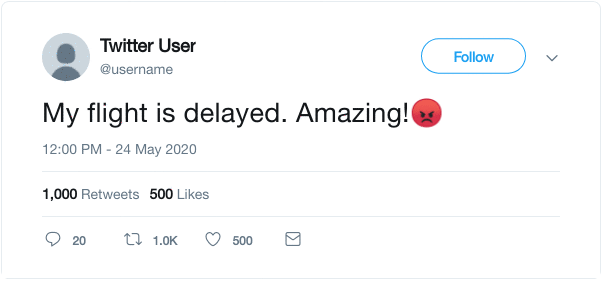

Now a model can be trained on this data to predict emojis for any given text. This trained model can be directly used for emoji prediction as well as be used for transfer learning to tasks such as sentiment, emotion and sarcasm detection from the people tweeting on climate change

In [474]:
# # Instantiate DeepMoji model
# emoji_model = DeepMoji()

## Generating the emoji cloud

In [475]:
# # Wrapper class to generate EmojiCloud

# class EmojiCloud:
#     """
#     This class creates an emoji cloud from the tweet data.
#     """
#     def __init__(self,
#                  font_path='Symbola.ttf',
#                  color='blue'):
#         self.font_path = font_path
#         self.color = color
#         self.word_cloud = self.initialize_wordcloud()
#         self.emoji_probability = None

#     def initialize_wordcloud(self):
#         word_cloud = WordCloud(font_path=self.font_path,
#                                width=2000,
#                                height=1000,
#                                background_color='black',
#                                random_state=42,
#                                collocations=False)
#         return word_cloud

#     def color_func(self, word, font_size, position, orientation, random_state=None,
#                    **kwargs):
#         hue_saturation = {
#             'yellow': '42, 88%',
#             'blue': '194, 49%',
#             'green': '159, 42%',
#             'grey': '45, 2%'
#         }.get(self.color)

#         current_emoji_probability = self.emoji_probability[word]
#         # Use 50% opacity for emojis with 20% or more coverage
#         if current_emoji_probability >= 0.20:
#             opacity = 50
#         else:
#             # Use an opacity between 70 to 75 for other emojis
#             opacity = 75 - current_emoji_probability/0.2 * 5
#         return f"hsl({hue_saturation},{opacity}%)"

#     def generate(self, emojis):
#         emoji_frequencies = Counter(emojis)
#         total_count = len(emojis)
#         # Calculate probabilities of emojis from frequency counts
#         self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
#         # Use wordcloud library to generate a wordcloud of emojis
#         wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
#         # Recolor emojis according to their frequency
#         plt.imshow(wc.recolor(color_func=self.color_func, random_state=42),
#                    interpolation="bilinear")
#         plt.axis("off")

In [476]:
# # Set figure size for EmojiCloud
# plt.rcParams["figure.figsize"] = (17, 6)

In [477]:
#view trained data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# Predict emojis for the responses on Train Dataset

In [478]:
# # Predict the emojis for the open-ended text
# emojis = emoji_model.predict(train['message'])

# Generate the emojicloud on Train Data

In [479]:
# #Display Emoji cloud on Train data
# emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
# emoji_cloud.generate(emojis)

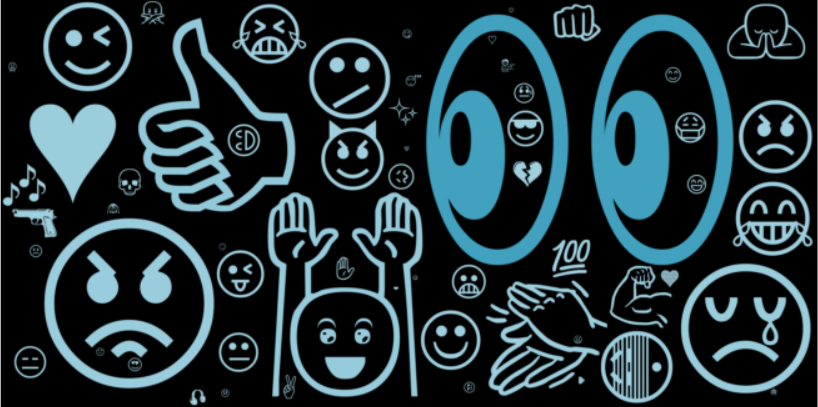

# Emoji Cloud Sentiment wise

In [480]:
def sentiment(df):

  """
  This function converts the classes from 
  numbers into words

  Input:
  dataframe: original tweets
  datatype: Dataframe

  output:Dataframe
  datatype: dataframe

  """
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 1 :
          sentiment_class.append('Pro')
      elif i == 0 :
          sentiment_class.append('Neutral')
      elif i == -1 :
          sentiment_class.append('Anti')
      else :
          sentiment_class.append('News')

  df['sentiment'] = sentiment_class
    
  return df
df_cloud = sentiment(train)
df_cloud.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# Emoji cloud on Pro tweets

In [481]:
filt_Pro =(df_cloud['sentiment']=='Pro')
df_1=df_cloud[filt_Pro]


## Filter Pro tweets into a new dataframe

In [482]:
 df_1.head(3)

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736


## Predict Emojis for response

In [483]:
# emojis_Pro = emoji_model.predict(df_1['message'])

# generate emoji

In [484]:
# emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
# emoji_cloud.generate(emojis_Pro)

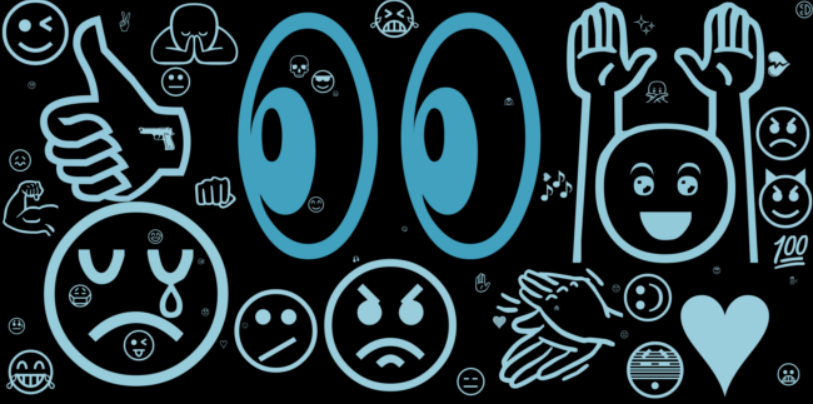

In [485]:
filt_Neutral =(df_cloud['sentiment']=='Neutral')
df_2=df_cloud[filt_Neutral]


# Emoji cloud on Neutral


In [486]:
df_2.head(3)

,sentiment,message,tweetid
19,Neutral,Calum: *tweets abt reunitingish w the cast*\n-...,547924
22,Neutral,"we also met this guy, he let us in on some tru...",67545
30,Neutral,@Jnp_Ftw are these the same scientists that de...,365051


In [487]:
# emojis_Neutral = emoji_model.predict(df_2['message'])

In [488]:
# emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
# emoji_cloud.generate(emojis_Neutral)

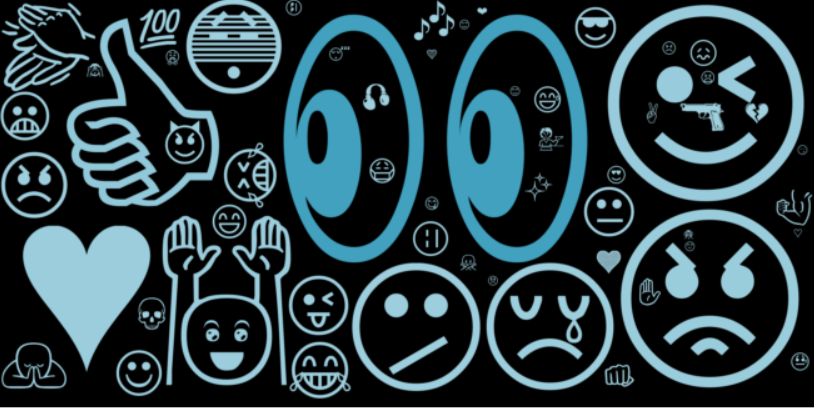

In [489]:
filt_Anti =(df_cloud['sentiment']=='Anti')
df_3=df_cloud[filt_Anti]

In [490]:
df_3.head(3)

,sentiment,message,tweetid
28,Anti,Sally Kohn’s latest evidence of climate change...,355491
46,Anti,@realDonaldTrump Carbon Tax is a Globalist ide...,61141
48,Anti,RT @SteveSGoddard: We had winds close to 100 M...,719523


In [491]:
# emojis_Anti = emoji_model.predict(df_3['message'])

In [492]:
# emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
# emoji_cloud.generate(emojis_Anti)

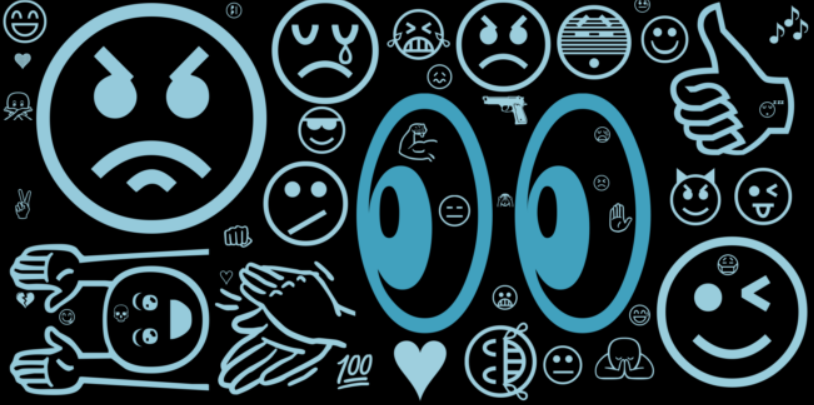

In [493]:
filt_News =(df_cloud['sentiment']=='News')
df_4=df_cloud[filt_News]

In [494]:
df_4.head(3)

,sentiment,message,tweetid
2,News,RT @RawStory: Researchers say we have three ye...,698562
12,News,RT @tveitdal: We only have a 5 percent chance ...,454673
14,News,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092


In [495]:
# emojis_News = emoji_model.predict(df_4['message'])

In [496]:
# emoji_cloud = EmojiCloud(font_path='./Symbola.ttf')
# emoji_cloud.generate(emojis_News)

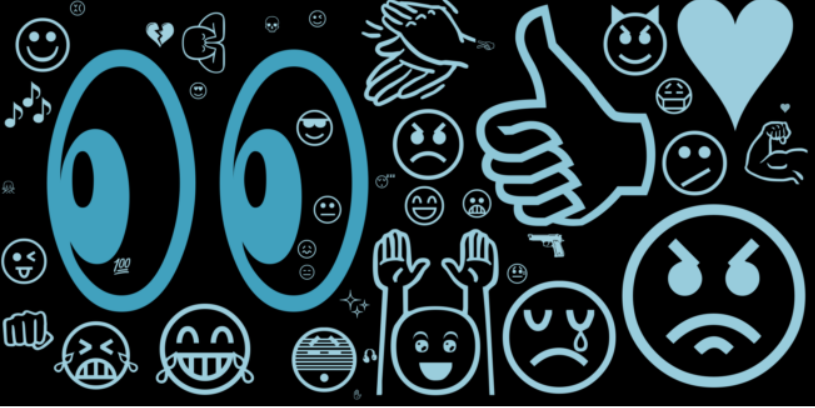

### Word Frequency

We want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [500]:
#most common words Sentiment wise
Pro = df[df['sentiment']=='Pro']
News = df[df['sentiment']=='News']
Neutral = df[df['sentiment']=='Neutral']
Anti =df[df['sentiment']=='Anti']

In [501]:
#most common words in target selected column

df['temp_list'] = df['message'].apply(lambda x:str(x).split())
top = collections.Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
# temp.columns = ['Common_words','count']
# temp.style.background_gradient(cmap='Blues')

# Common Words in Pro Tweets

These are the most commonly used words in tweets, by people that believe in man-made climate change.

In [502]:
#MosT common positive words based on sentiment
top = Counter([item for sublist in Pro['temp_list'] for item in sublist])
pro_tweet = pd.DataFrame(top.most_common(20))
pro_tweet.columns = ['Common_words','count']
pro_tweet.style.background_gradient(cmap='Blues')

,Common_words,count
0,climate,7417
1,change,7259
2,global,1605
3,warming,1466
4,about,1154
5,trump,1108
6,that,1089
7,believe,1005
8,doesn,769
9,this,762


# Common Words in News Tweets

These are the most commonly used words in tweets that link to factual news about climate change.

In [503]:
#MosT common News tweets based on sentiment
top = collections.Counter([item for sublist in News['temp_list'] for item in sublist])
News_tweet = pd.DataFrame(top.most_common(20))
News_tweet.columns = ['Common_words','count']
News_tweet.style.background_gradient(cmap='Greens')

,Common_words,count
0,climate,3358
1,change,3272
2,trump,1068
3,global,511
4,warming,443
5,from,252
6,says,241
7,with,189
8,scientists,180
9,over,171


# Common Words in Anti Tweets

These are the most commonly used words in tweets that do not believe in man-made climate change

In [504]:
#MosT common Anti tweets based on sentiment
top = collections.Counter([item for sublist in Anti['temp_list'] for item in sublist])
Anti_tweet = pd.DataFrame(top.most_common(20))
Anti_tweet.columns = ['Common_words','count']
Anti_tweet.style.background_gradient(cmap='Blues')

,Common_words,count
0,climate,811
1,change,765
2,global,641
3,warming,621
4,that,180
5,about,167
6,this,109
7,with,91
8,made,91
9,they,87


# Common Words in Neutral Tweets

These are the most commonly used words in tweets, by people who neither support nor refute the believe of man-made climate change.

In [505]:
#MosT common Anti tweets based on sentiment
top = collections.Counter([item for sublist in Neutral['temp_list'] for item in sublist])
Neutral_tweet = pd.DataFrame(top.most_common(20))
Neutral_tweet.columns = ['Common_words','count']
Neutral_tweet.style.background_gradient(cmap='Greens')

,Common_words,count
0,climate,1453
1,change,1420
2,global,1040
3,warming,1013
4,about,326
5,that,307
6,this,221
7,with,209
8,trump,175
9,what,171


# Common words sentiment wise

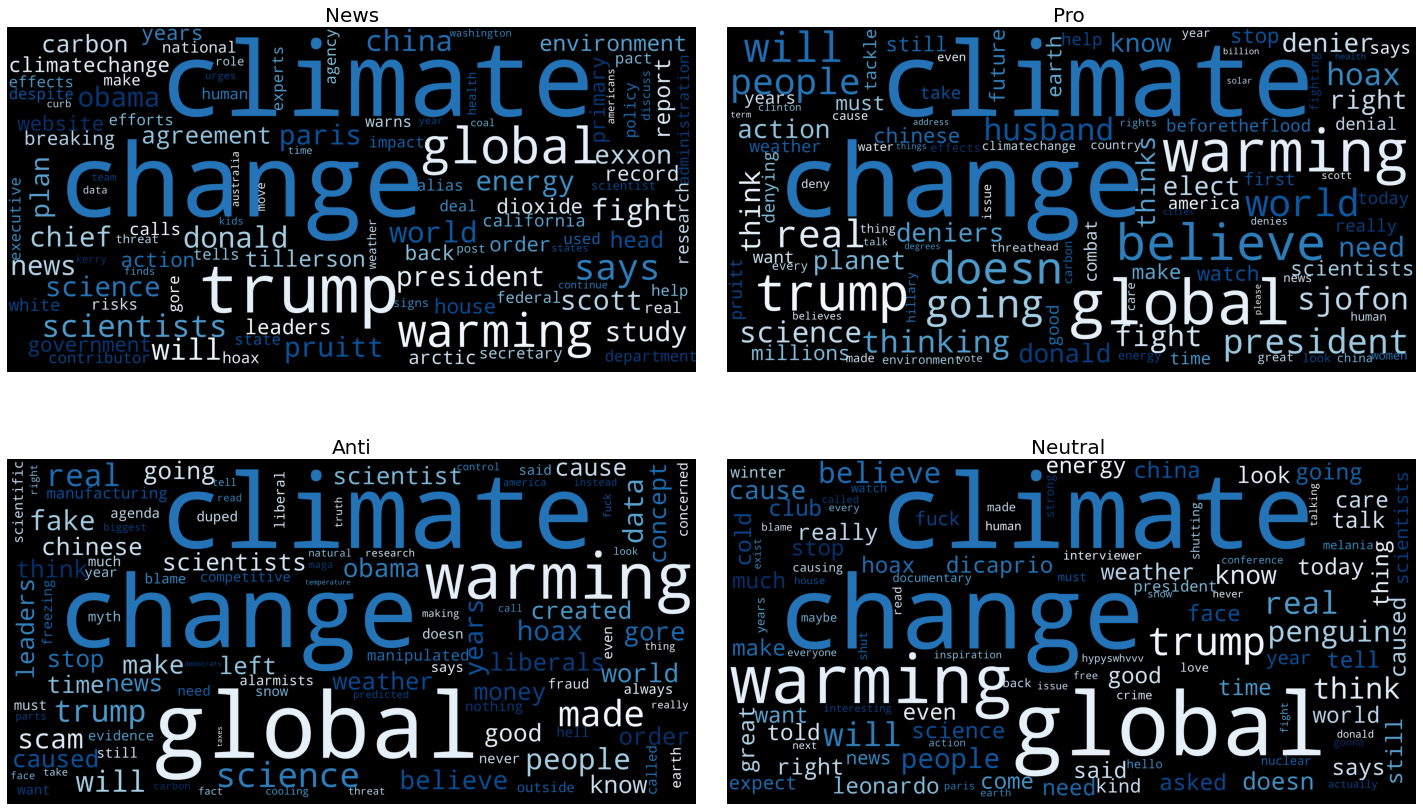

In [506]:
# Extracing rows per sentiment
news = df[df['sentiment'] == 'News']['message']
pos = df[df['sentiment'] == 'Pro']['message']
neutral = df[df['sentiment'] == 'Neutral']['message']
neg = df[df['sentiment'] =='Anti']['message']

# Splitting strings into lists
news = [word for line in news for word in line.split()]
pos = [word for line in pos for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
neg = [word for line in neg for word in line.split()]

news = WordCloud(
    colormap='Blues',
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pos = WordCloud(
    colormap='Blues',
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pos))

neutral = WordCloud(
    colormap='Blues',
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))

neg = WordCloud(
    colormap='Blues',
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neg))

##Creating individual wordclouds per sentiment
fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('News', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pos)
axs[0, 1].set_title('Pro ', fontsize = 20)
axs[0, 1].axis('off')

axs[1, 0].imshow(neg)
axs[1, 0].set_title('Anti', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Neutral ', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

* From the word cloud above for all the classes, we can observe that the words "climate" ,"change" , "global", "warming" and "Trump " are the most frequent. It is evident that the word Climate Change is the most commonly used amongst the frequently used words. This is expected because regardless of whether people are for or against the belief that climate change is man-made, they are going to use the word climate change. 


* Looking at the News class, it is no surprise that the words that apear frequently are there given the fact news articles are ablout politics and breaking news. Donald Trump being mentioned is not surprising given the fact that he has been very vocal about his climate change beilefs. It is also expected that Words like "carborn dioxide" and "study" are found in the word cloud for news as news articles sometimes entail studies performed by scientists.   


* Looking at the Anti class, it is no surprise that the words "scam", "fake" and "hoax" are frequently used given that these are adjectives that are mostly used against something. Therefore this further implies these people are against the belief of climate change being man-made. 


* Looking at the Neutral class, we observe words like "think", "told", "still" and "said" which are words that are often used when one is uncertain about something. Therefore this further implies these people are on the fence regarding the belief of climate change being man-made. 


* Looking at the Pro class , words like "future", " real", "right" and "science" further prove that people believe that climate change is man-made and it is going be a huge problem in the near future, as "proved" by scientists.


### Number of characters present in each sentence
This look at the number of characters available in each tweet provided about climate change.

Text(0, 0.5, 'Number of tweets')

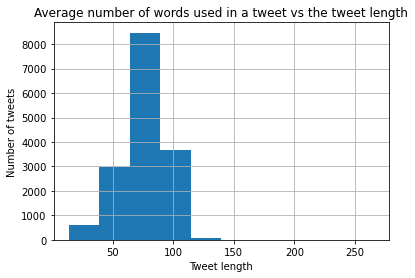

In [507]:
#Plot a histogram to display number of characters that are in each tweet.
df['message'].str.len().hist()
plt.title('Average number of words used in a tweet vs the tweet length')
plt.xlabel('Tweet length')
plt.ylabel('Number of tweets')

The histogram shows that the number of the characters in these tweets range from 25 to 160 characters. Mostly, we notice that these tweets has more tweets that are between 75 to 150. 

### Number of Words showing in each Tweet is: 

Text(0, 0.5, 'Number of tweets')

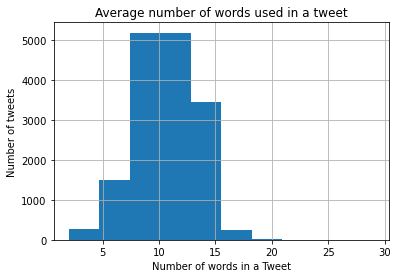

In [508]:
# Counting the number of words that are in each tweet and plot the number using a histogram.
df['message'].str.split().map(lambda x: len(x)).hist()
plt.title('Average number of words used in a tweet')
plt.xlabel('Number of words in a Tweet')
plt.ylabel('Number of tweets')

# WordCloud for the classes

We can see clearly that the number of words that appear in most of the tweets ranges from 2 to 31. Mostly, these words in these tweets are between 18 and 21. 

### Tweet Length Distribution

Text(0, 0.5, 'Number of tweets')

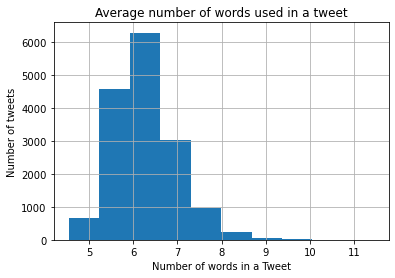

In [510]:
# From the raw data: check the word lengths.
df['message'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Average number of words used in a tweet')
plt.xlabel('Number of words in a Tweet')
plt.ylabel('Number of tweets')

The average word length ranges from 3 to 15 with 4-6 being the most common lengths available in this dataset. It is important to note these words as they are very short words. English has many words considered as stop words that are mostly used into the language. These stopwords can include words such as 'there', 'this', 'the', 'a', 'an', 'are' etc. These words are very short in length from the plot thet might be the words that are contributing vastly to the graph being left-skewed.

Analysing the amount of stops words can provide us with some insights into the data we are dealing with.

From nltk library which consists of stopwords from different languages we can use corpus containing stops words.

### Stops words from the Tweets

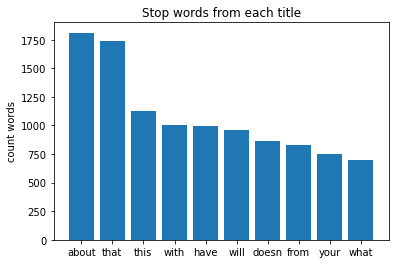

In [511]:
# This code creates a function that look of the most occuring stop words in the tweets from the dataset
def plot_top_stopwords_barchart(text):
    # Find the stop words that are english from the corpus obtain from the nltk library. 
    stop=set(stopwords.words('english'))
    # Split the words from the tweets.
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    # Sort the stop words from the dictionary created and select the top 10 most occuring stop words.        
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    plt.title("Stop words from each title")
    plt.ylabel("count words")
# plot the stop words from the dataset
plot_top_stopwords_barchart(df['message'])

We can definitely see that stopwords such as "to", "the", "of" and “is” dominate the climate change tweets. These stop words on the data preprocessing were removed from the tweets and below we can see the data with removed stop words:

In [512]:
# View the cleaned data
df.head(10)

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags,wordnet_pos,tweet length,temp_list
0,Pro,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),...","[(polyscimajor, a), (chief, a), (think, n), (c...",93,"[polyscimajor, chief, doesn, think, carbon, di..."
1,Pro,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth...","[(like, n), (lack, n), (evidence, n), (anthrop...",47,"[like, lack, evidence, anthropogenic, global, ..."
2,News,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)...","[(researchers, n), (three, n), (years, n), (cl...",67,"[researchers, have, three, years, climate, cha..."
3,Pro,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J...","[(todayinmaker, n), (wired, v), (pivotal, a), ...",56,"[todayinmaker, wired, pivotal, year, climate, ..."
4,Pro,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c...","[(racist, n), (sexist, n), (climate, n), (chan...",70,"[racist, sexist, climate, change, denying, big..."
5,Pro,worth read whether believe climate change ggl...,425577,NaN,False,"[worth, read, whether, believe, climate, chang...","[worth, read, whether, believe, climate, chang...","[(worth, JJ), (read, VBD), (whether, IN), (bel...","[(worth, a), (read, v), (whether, n), (believe...",54,"[worth, read, whether, believe, climate, chang..."
6,Pro,mike pence doesn believe global warming that s...,294933,NaN,False,"[mike, pence, doesn, believe, global, warming,...","[mike, pence, believe, global, warming, smokin...","[(mike, NN), (pence, NN), (believe, VBP), (glo...","[(mike, n), (pence, n), (believe, v), (global,...",81,"[mike, pence, doesn, believe, global, warming,..."
7,Pro,things today fight climate change climate acti...,992717,NaN,False,"[things, today, fight, climate, change, climat...","[things, today, fight, climate, change, climat...","[(things, NNS), (today, NN), (fight, VBP), (cl...","[(things, n), (today, n), (fight, v), (climate...",62,"[things, today, fight, climate, change, climat..."
8,Pro,nephew inconsolable wants like will perish fie...,664510,NaN,False,"[nephew, inconsolable, wants, like, will, peri...","[nephew, inconsolable, wants, like, perish, fi...","[(nephew, RB), (inconsolable, JJ), (wants, VBZ...","[(nephew, r), (inconsolable, a), (wants, v), (...",73,"[nephew, inconsolable, wants, like, will, peri..."
9,Pro,offense like just believe global warming,260471,NaN,False,"[offense, like, just, believe, global, warming]","[offense, like, believe, global, warming]","[(offense, NN), (like, IN), (believe, VBP), (g...","[(offense, n), (like, n), (believe, v), (globa...",40,"[offense, like, just, believe, global, warming]"


In [513]:
# A view of the first 10 tweets after all the all the stop words have been removed. 
df.message.head(10)

0    polyscimajor chief doesn think carbon dioxide ...
1      like lack evidence anthropogenic global warming
2    researchers have three years climate change be...
3    todayinmaker wired pivotal year climate change...
4    racist sexist climate change denying bigot lea...
5    worth read whether believe climate change  ggl...
6    mike pence doesn believe global warming that s...
7    things today fight climate change climate acti...
8    nephew inconsolable wants like will perish fie...
9             offense like just believe global warming
Name: message, dtype: object

# **Model Building: Sentimental Analysis**

Before we build these model, earlier we changed the sentiments into Pro, Neutral, Anti and News and now we need to change the code again to get the dataframe with sentiments that are numerical. Therefore:

In [514]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 'Pro' :
          sentiment_class.append(1)
      elif i == 'Neutral' :
          sentiment_class.append(0)
      elif i == 'Anti' :
          sentiment_class.append(-1)
      else :
          sentiment_class.append(2)

  df['sentiment'] = sentiment_class
    
  return df
df = sentiment(df_train1)
df.head()

,sentiment,message,tweetid,hashtags,emoji,Tokenized_tweet,stopwords_removed,pos_tags
0,1,polyscimajor chief doesn think carbon dioxide ...,625221,NaN,False,"[polyscimajor, chief, doesn, think, carbon, di...","[polyscimajor, chief, think, carbon, dioxide, ...","[(polyscimajor, JJ), (chief, JJ), (think, NN),..."
1,1,like lack evidence anthropogenic global warming,126103,NaN,False,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ...","[(like, IN), (lack, NN), (evidence, NN), (anth..."
2,2,researchers have three years climate change be...,698562,NaN,False,"[researchers, have, three, years, climate, cha...","[researchers, three, years, climate, change, l...","[(researchers, NNS), (three, CD), (years, NNS)..."
3,1,todayinmaker wired pivotal year climate change...,573736,[#todayinmaker#],False,"[todayinmaker, wired, pivotal, year, climate, ...","[todayinmaker, wired, pivotal, year, climate, ...","[(todayinmaker, NN), (wired, VBD), (pivotal, J..."
4,1,racist sexist climate change denying bigot lea...,466954,[#electionnight],False,"[racist, sexist, climate, change, denying, big...","[racist, sexist, climate, change, denying, big...","[(racist, NN), (sexist, NN), (climate, NN), (c..."


### Train-validation split

Splitting out the X variable from the target

In [515]:
# Seperate features and tagret variables
y = train['sentiment']
X = train['message']

Turning text into something your model can read

In [516]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

### Training the base model

Splitting the training data into a training and validation set

In [517]:
# Split the train data to create validation dataset
X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.1,shuffle=True, stratify=y, random_state=11)#changed test size to 0.1 from 0.3

# **Model Evaluation : Classifiers**

---



### Logistic regression classification

In statistics, the logistic model is used to model the probability of a certain class or event existing a binary. It is worth noting that it is not limited to that only because it is capable of being extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Hence it can be implemented to complex tasks, and in machine learning the logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. The logistic regression is used to predict the categorical data.

![1*a5QwiyaSyvRa6n3VKYVEnQ.png](https://cdn-media-1.freecodecamp.org/images/1*a5QwiyaSyvRa6n3VKYVEnQ.png)

The figure above is the sigmoid function logistic regression models use to make predictions.

In [518]:
modelstart = time.time()
logreg = LogisticRegression(C=1000, multi_class='ovr', solver='saga', random_state=42, max_iter=10)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
logreg_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy 0.7635903919089759
Model Runtime: 0.39 seconds


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,precision,recall,f1-score,support
Anti,0.712500,0.438462,0.542857,130.00000
Neutral,0.596774,0.472340,0.527316,235.00000
News,0.805405,0.818681,0.811989,364.00000
Pro,0.784355,0.869871,0.824903,853.00000
accuracy,0.763590,0.763590,0.763590,0.76359
macro avg,0.724759,0.649839,0.676766,1582.00000
weighted avg,0.755430,0.763590,0.754549,1582.00000


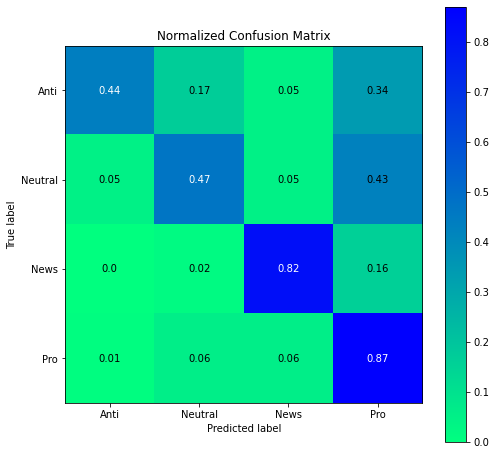

In [519]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.  Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications. It is not a single algorithm but a family of algorithms where all of them share a common principle, which is the assumption that independent variables are statistically independent from each other.

Bayes's theorem is stated mathematically as the following equation:

$$ P(A \mid B) = \frac{P(B \mid A) * P(A)}{P(B)}$$

* P(A|B) is the conditional probability: the likelihood that of event A occuring given that B is true.

* P(A) is the prior probability of class.

* P(B|A) is the conditional probability: the likelihood that of event B occuring given that A is true.

* P(B) is the prior probability of the predictor (B).
* A and B must be different events.

Naive Bayes has 3 Classification which are:
1. Gaussian
2. Bernoulli
3. `Multinomial`

We will be using the Multinomial method below:

In [520]:
modelstart = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_val)
nb_model_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.6978508217446271
Model Runtime: 0.10 seconds


,precision,recall,f1-score,support
Anti,0.937500,0.115385,0.205479,130.000000
Neutral,0.805556,0.123404,0.214022,235.000000
News,0.900000,0.618132,0.732899,364.000000
Pro,0.652344,0.978898,0.782935,853.000000
accuracy,0.697851,0.697851,0.697851,0.697851
macro avg,0.823850,0.458955,0.483834,1582.000000
weighted avg,0.755518,0.697851,0.639460,1582.000000


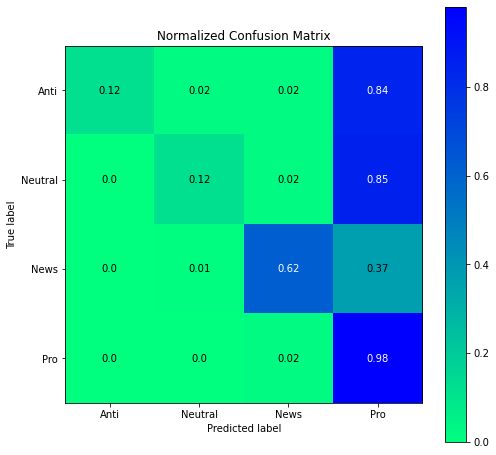

In [521]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Gradient Boosting Classifier

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/02/Gradient-Boosting-Algorithm-01.jpg"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>


In [522]:
modelstart = time.time()
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_val)
gb_model_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Accuracy 0.679519595448799
Model Runtime: 28.52 seconds


,precision,recall,f1-score,support
Anti,0.591549,0.323077,0.417910,130.00000
Neutral,0.554286,0.412766,0.473171,235.00000
News,0.719745,0.620879,0.666667,364.00000
Pro,0.694716,0.832356,0.757333,853.00000
accuracy,0.679520,0.679520,0.679520,0.67952
macro avg,0.640074,0.547270,0.578770,1582.00000
weighted avg,0.671137,0.679520,0.666369,1582.00000


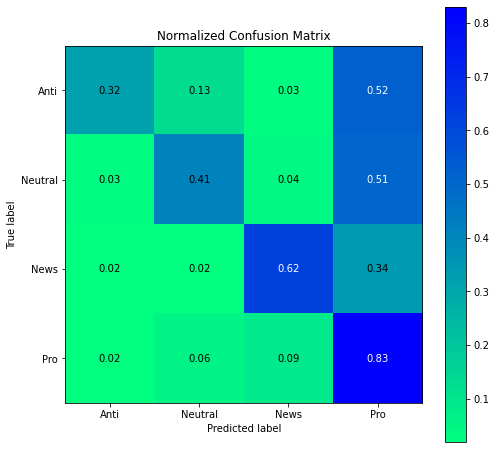

In [523]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Random forest

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

How does the algorithm work?
- Selects random samples from a given dataset.
- Constructs a decision tree for each sample and gets a prediction result from each decision tree.
- Performs a vote for each predicted result.
- Selects the prediction result with the most votes as the final prediction.

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/5752/1*5dq_1hnqkboZTcKFfwbO9A.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>


In [524]:
modelstart = time.time()
rf = RandomForestClassifier(max_features=4, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Accuracy 0.7275600505689002
Model Runtime: 32.59 seconds


,precision,recall,f1-score,support
Anti,0.900000,0.207692,0.337500,130.00000
Neutral,0.628571,0.374468,0.469333,235.00000
News,0.849462,0.651099,0.737170,364.00000
Pro,0.705207,0.936694,0.804632,853.00000
accuracy,0.727560,0.727560,0.727560,0.72756
macro avg,0.770810,0.542488,0.587159,1582.00000
weighted avg,0.743022,0.727560,0.700916,1582.00000


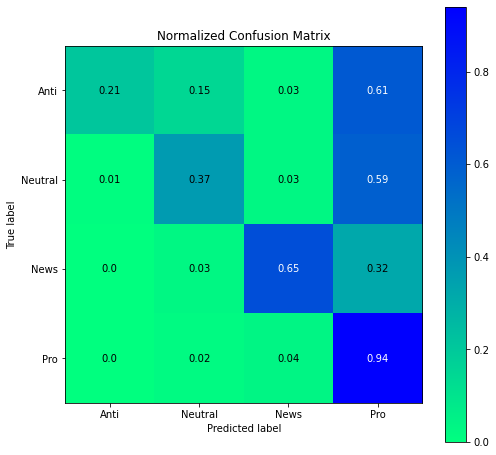

In [525]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### K nearest neighbors

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

How does the algorithm work?

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://i1.wp.com/www.jacobsoft.com.mx/wp-content/uploads/2018/11/knn.png?fit=546%2C300&ssl=1"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>


In [526]:
modelstart = time.time()
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_val)
kn_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()

results

accuracy 0.622629582806574
Model Runtime: 1.11 seconds


,precision,recall,f1-score,support
Anti,0.338710,0.323077,0.330709,130.00000
Neutral,0.390977,0.442553,0.415170,235.00000
News,0.613861,0.681319,0.645833,364.00000
Pro,0.750000,0.692849,0.720293,853.00000
accuracy,0.622630,0.622630,0.622630,0.62263
macro avg,0.523387,0.534949,0.528001,1582.00000
weighted avg,0.631547,0.622630,0.625822,1582.00000


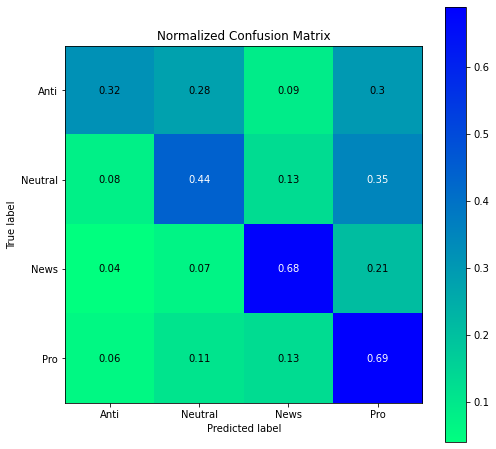

In [527]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Linear SVC
The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function. The kernel method can not be changed in linear SVC, because it is based on the kernel linear method.

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linearsvc_support_vectors_thumb.png"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>


In [528]:
modelstart = time.time() 
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_pred = linsvc.predict(X_val)
linsvc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()

results

Accuracy 0.7579013906447535
Model Runtime: 0.39 seconds


,precision,recall,f1-score,support
Anti,0.702703,0.400000,0.509804,130.000000
Neutral,0.594444,0.455319,0.515663,235.000000
News,0.802198,0.802198,0.802198,364.000000
Pro,0.775934,0.876905,0.823335,853.000000
accuracy,0.757901,0.757901,0.757901,0.757901
macro avg,0.718820,0.633605,0.662750,1582.000000
weighted avg,0.748999,0.757901,0.747004,1582.000000


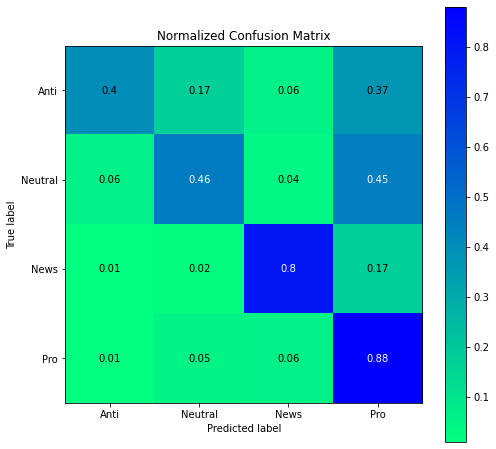

In [529]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### SGDClassifier
Applying the Stochastic Gradient Descent (SGD) to the regularized linear methods can help building an estimator for classification and regression problems.

 Scikit-learn API provides the SGDClassifier class to implement SGD method for classification problems. The SGDClassifier applies regularized linear model with SGD learning to build an estimator. The SGD classifier works well with large-scale datasets and it is an efficient and easy to implement method. 
 
 
 <br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ1swqct-qR7C-rrQqZJAqKLbS4yOypcjCFzA&usqp=CAU"
     style="float: center; padding-bottom=0.5em"
     width=600px/>

</div>




In [530]:
from sklearn.linear_model import SGDClassifier
modelstart = time.time() 
sgdc = SGDClassifier(max_iter=5000, tol=0.01)
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_val)
sgdc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.7515802781289507
Model Runtime: 0.10 seconds


,precision,recall,f1-score,support
Anti,0.791667,0.292308,0.426966,130.00000
Neutral,0.681481,0.391489,0.497297,235.00000
News,0.791549,0.771978,0.781641,364.00000
Pro,0.745211,0.912075,0.820242,853.00000
accuracy,0.751580,0.751580,0.751580,0.75158
macro avg,0.752477,0.591963,0.631537,1582.00000
weighted avg,0.750223,0.751580,0.731071,1582.00000


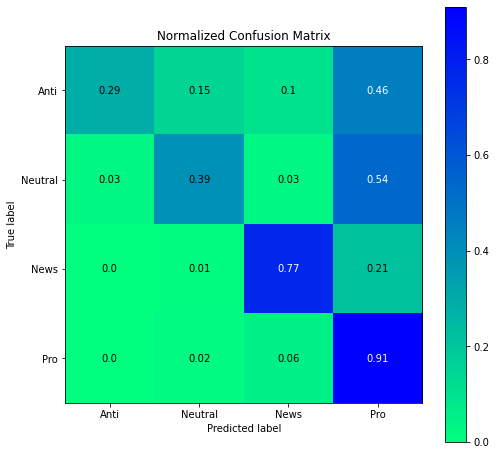

In [531]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

### Support Vector Machines
A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems and as such, this is what we will focus on in this post.

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes.
SVM is used for text classification tasks such as category assignment, detecting spam and sentiment analysis. It is also commonly used for image recognition challenges, performing particularly well in aspect-based recognition and color-based classification. SVM also plays a vital role in many areas of handwritten digit recognition, such as postal automation services.

 
 <br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
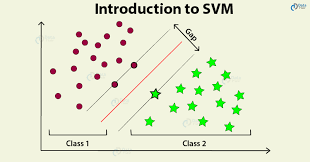

</div>



In [532]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
modelstart = time.time() 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
svm_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.7528445006321113
Model Runtime: 31.76 seconds


,precision,recall,f1-score,support
Anti,0.730159,0.353846,0.476684,130.000000
Neutral,0.654930,0.395745,0.493369,235.000000
News,0.818182,0.766484,0.791489,364.000000
Pro,0.746139,0.906213,0.818422,853.000000
accuracy,0.752845,0.752845,0.752845,0.752845
macro avg,0.737352,0.605572,0.644991,1582.000000
weighted avg,0.747853,0.752845,0.735858,1582.000000


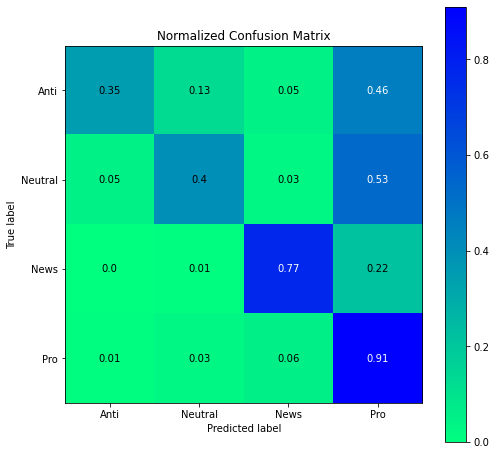

In [533]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

# **Performance Evaluation**
- F1 - score metric


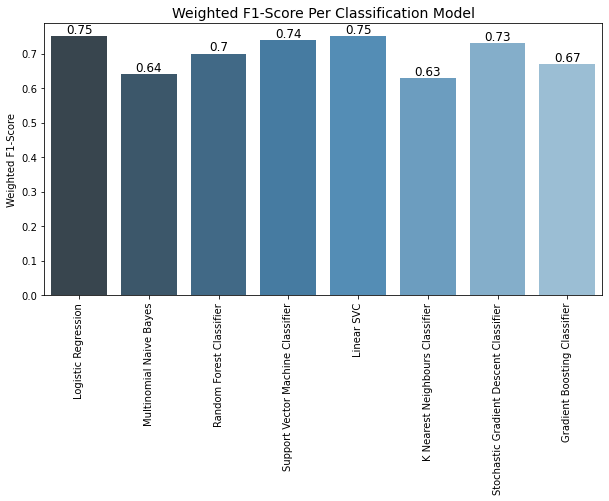

In [534]:
# Compare Weighted F1-Scores Between Models
fig,axis = plt.subplots(figsize=(10, 5))
rmse_x = ['Logistic Regression','Multinomial Naive Bayes','Random Forest Classifier','Support Vector Machine Classifier','Linear SVC','K Nearest Neighbours Classifier','Stochastic Gradient Descent Classifier' ,'Gradient Boosting Classifier']
rmse_y = [logreg_f1,nb_model_f1,rf_f1,svm_f1,linsvc_f1,kn_f1,sgdc_f1,gb_model_f1]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette=("Blues_d"))
plt.title('Weighted F1-Score Per Classification Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1-Score')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

#**Dealing with imbalanced data**

## Upsampling

In [535]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 'Pro' :
          sentiment_class.append(1)
      elif i == 'Neutral' :
          sentiment_class.append(0)
      elif i == 'Anti' :
          sentiment_class.append(-1)
      else :
          sentiment_class.append(2)

  df['sentiment'] = sentiment_class
    
  return df
df_train = sentiment(train)


In [536]:
#view train data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [537]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [538]:
#creating variables for the various sentiments
pro = df_train[df_train['sentiment']==1]
news = df_train[df_train['sentiment']==2]
neutral = df_train[df_train['sentiment']==0]
anti = df_train[df_train['sentiment']==-1]

In [539]:
from sklearn.utils import resample
# upsampling the minority
upsampled_anti = resample(anti,
                    replace=True, 
                    n_samples=len(pro), 
                    random_state=42)

upsampled_news = resample(news,
                    replace=True, 
                    n_samples=len(pro),
                    random_state=42) 

upsampled_neutral = resample(neutral,
                    replace=True, 
                    n_samples=len(pro), 
                    random_state=42) 

# Combine upsampled minority class with majority class
upsampled = pd.concat([upsampled_anti,upsampled_news, upsampled_neutral, pro])

In [540]:
print('The distribution of samples before upsampling:')
print(df_train['sentiment'].value_counts())

The distribution of samples before upsampling:
 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64


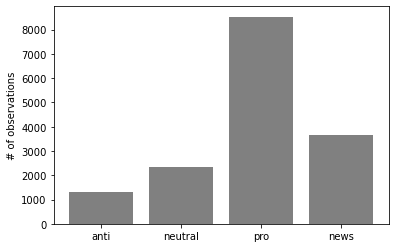

In [541]:
# Get all possible labels 
labels = df_train['sentiment'].unique() 
heights = [len(pro),len(news),len(neutral),len(anti)] 
plt.bar(labels,heights,color='grey') 
plt.xticks(labels,['pro','news', 'neutral', 'anti']) 
plt.ylabel("# of observations") 
plt.show()

In [542]:
# Check new class counts
print('The distribution of samples after upsampling:')
print(upsampled['sentiment'].value_counts())

The distribution of samples after upsampling:
-1    8530
 2    8530
 1    8530
 0    8530
Name: sentiment, dtype: int64


In [543]:
from sacred import Experiment

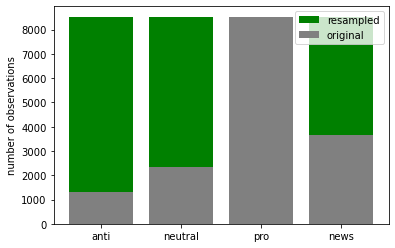

In [544]:
upsampled_heights = [len(upsampled[upsampled['sentiment']==1]),len(upsampled[upsampled['sentiment']==2]), 
                     len(upsampled[upsampled['sentiment']==0]),len(upsampled[upsampled['sentiment']==-1])] 
# Get all possible labels 
labels = df_train['sentiment'].unique() 
plt.bar(labels,upsampled_heights,color='green') 
plt.bar(labels,heights,color='grey') 
plt.xticks(labels,['pro','news', 'neutral', 'anti']) 
plt.ylabel("number of observations") 
plt.legend(['resampled','original']) 
experiment.log_figure(figure=plt,figure_name='Bar plot showing distribution of classes after upsampling') 
plt.show()

In [545]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_sample = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_upsampled_vectorized = vectorizer_sample.fit_transform(upsampled['message'])

In [546]:
upsampled.head()

,sentiment,message,tweetid
13780,-1,Lmao fools still think global warming is real....,603068
10438,-1,#IPCC https://t.co/a0F9709CTr Take a look at w...,90618
15806,-1,RT @HerberMp: @sness5561_ness Al Gore is a idi...,213863
13854,-1,@TuckerCarlson @realDonaldTrump wrestling meme...,748586
13434,-1,RT @realDonaldTrump: The concept of global war...,502164


# **Downsampling**

In [547]:
# Downsampling the majority
downsampled_anti = resample(pro,
                    replace=True, 
                    n_samples=len(anti), 
                    random_state=42) 

downsampled_news = resample(news,
                    replace=True, 
                    n_samples=len(anti), 
                    random_state=42) 

downsampled_neutral = resample(neutral,
                    replace=True, 
                    n_samples=len(anti),
                    random_state=42) 

# Combine downsampled majority class with minority class
downsampled = pd.concat([downsampled_anti,downsampled_news, downsampled_neutral, anti])

In [548]:
print('The distribution of samples before upsampling:')
print(df_train['sentiment'].value_counts())

The distribution of samples before upsampling:
 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64


In [549]:
# Check new class counts
print('The distribution of samples after upsampling:')
print(downsampled['sentiment'].value_counts())

The distribution of samples after upsampling:
-1    1296
 2    1296
 1    1296
 0    1296
Name: sentiment, dtype: int64


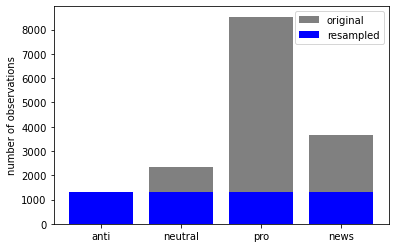

In [550]:
downsampled_heights = [len(downsampled[downsampled['sentiment']==1]),len(downsampled[downsampled['sentiment']==2]), 
                       len(downsampled[downsampled['sentiment']==0]),len(downsampled[downsampled['sentiment']==-1])] 
# Get all possible labels 
labels = df_train['sentiment'].unique() 
plt.bar(labels,heights,color='grey') 
plt.bar(labels,downsampled_heights,color='blue') 
plt.xticks(labels,['pro','news', 'neutral', 'anti']) 
plt.ylabel("number of observations") 
plt.legend(['original','resampled']) 
experiment.log_figure(figure=plt,figure_name='Bar plot showing distribution of classes after downsampling') 
plt.show()

In [551]:

vectorizer_sample = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_downsampled_vectorized = vectorizer_sample.fit_transform(downsampled['message'])

In [552]:
# Splitting the labels and features into training and testing sets
downsampled_X_train, downsampled_X_test, downsampled_y_train, downsampled_y_test = train_test_split(X_downsampled_vectorized
                                                                                        , downsampled['sentiment']
                                                                                        , test_size=0.3,random_state=11)

# **Hyperparameter tuning**
## Logistic Regression


In [553]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [554]:
param_grid = {'C': [1000], #[100,1000]
              'max_iter': [100], #[10,100]
              'multi_class': ['multinomial'], #['ovr', 'multinomial']
              'random_state': [42],
              'solver': ['lbfgs']} #['saga','lbfgs']
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_val)
print("Best parameters:")
print(grid_LR.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

Best parameters:
{'C': 1000, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 42, 'solver': 'lbfgs'}
accuracy 0.7585335018963337
              precision    recall  f1-score   support

        Anti       0.68      0.47      0.55       130
     Neutral       0.58      0.52      0.55       235
        News       0.80      0.79      0.80       364
         Pro       0.79      0.86      0.82       853

    accuracy                           0.76      1582
   macro avg       0.71      0.66      0.68      1582
weighted avg       0.75      0.76      0.75      1582



sklearn.linear_model._logistic:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [555]:
test_lr = test['message']
test_vect = vectorizer.transform(test_lr)
# Predict the sentiment using the test data
y_pred = logreg.predict(test_vect)
# Assign a new column on the test data by using the predicted sentiment from the tweets from test data
test['sentiment'] = y_pred
# Look into the data that will be submitted on Kaggle as csv
test[['tweetid','sentiment']].head()
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('test_lr4_submission.csv', index=False)


## Linear SVC

In [556]:
LinearSVC().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [557]:
param_grid = {'C': [1],#[0.1,1,10,100,1000]
              'max_iter': [100], #[10,100]
              'multi_class' : ['ovr'], #['crammer_singer', 'ovr']
              'random_state': [42]} 
grid_LSVC = GridSearchCV(LinearSVC(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LSVC.fit(X_train, y_train)
y_pred = grid_LSVC.predict(X_val)
print(grid_LSVC.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

{'C': 1, 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 42}
accuracy 0.7579013906447535
              precision    recall  f1-score   support

        Anti       0.70      0.40      0.51       130
     Neutral       0.59      0.46      0.52       235
        News       0.80      0.80      0.80       364
         Pro       0.78      0.88      0.82       853

    accuracy                           0.76      1582
   macro avg       0.72      0.63      0.66      1582
weighted avg       0.75      0.76      0.75      1582



In [558]:
test_lsvc = test['message']
test_vect = vectorizer.transform(test_lsvc)
# Predict the sentiment using the test data
y_pred = linsvc.predict(test_vect)
# Assign a new column on the test data by using the predicted sentiment from the tweets from test data
test['sentiment'] = y_pred
# Look into the data that will be submitted on Kaggle as csv
test[['tweetid','sentiment']].head()
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('test_lsvc3_submission.csv', index=False)


## SGDClassifier

In [559]:

sgdc.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 5000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.01,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [560]:
param_grid = {'alpha':[0.0001],
 'max_iter': [1000],
 'n_iter_no_change': [5],
 'tol':[0.01]}
grid_sgdc = GridSearchCV(SGDClassifier(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_sgdc.fit(X_train, y_train)
y_pred = grid_sgdc.predict(X_val)
print(grid_sgdc.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

{'alpha': 0.0001, 'max_iter': 1000, 'n_iter_no_change': 5, 'tol': 0.01}
accuracy 0.7553729456384324
              precision    recall  f1-score   support

        Anti       0.80      0.30      0.44       130
     Neutral       0.68      0.40      0.50       235
        News       0.80      0.77      0.79       364
         Pro       0.75      0.92      0.82       853

    accuracy                           0.76      1582
   macro avg       0.76      0.60      0.64      1582
weighted avg       0.75      0.76      0.74      1582



In [561]:
test_sgdc= test['message']
test_vect = vectorizer.transform(test_sgdc)
# Predict the sentiment using the test data
y_pred = sgdc.predict(test_vect)
# Assign a new column on the test data by using the predicted sentiment from the tweets from test data
test['sentiment'] = y_pred
# Look into the data that will be submitted on Kaggle as csv
test[['tweetid','sentiment']].head()
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('test_sgdc2_submission.csv', index=False)


# **Submission**

Creating an output csv for submission

In [562]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)

# **Conclusion**


To conclude, we have succeeded in building a supervised machine learning model that is capable of classifying whether or not a person believes in climate change based on their novel tweet data. Our top performing model was the SGD Classifier, which had a score of 0.7641 on Kaggle
Companies to focus on generating a positive social and environmental impact in addition to financial returns as a result of the rise of impact investments.
 Companies should try to ally their brand and products with the Pro climate change movement due to the fact that Pro climate change tweets tend to have a wider reach than other classes. Companies allying their brand and products with the Pro climate change movement would lead to a potential  increase in exposure of their brand on Twitter.

# **Collaborators**

1. Malibongwe 
2. Orline Sorel
3. Lazola
4. Kundani
5. Lesedi

In [ ]:
params = {"random_state": 7,          
          "model_type": "model_lr",          
          "scaler": "standard scaler",
          "stratify": True}

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)

In [ ]:
experiment.end()

In [ ]:
experiment.display()